In [1]:
import numpy as np
import scipy.special as spe
import pickle
from pathlib import Path
from matplotlib import cm

from robust_motifs.data import load_sparse_matrix_from_pkl
from robust_motifs.plot import (compare_graphs, compare_graphs_normalized, compare_graphs_percent, 
                                plot_biedge_cumulative, plot_simplex_counts, 
                                plot_bisimplex_counts, plot_bisimplex_ratio,
                                plot_biedge_counts, 
                                compare_graphs_diff, compare_graphs_diff_normalized, compare_graphs_diff_percent)

import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def draw_all_graphs(dictionary, n_instances):
    for elem in dictionary.values():
        fig = plt.figure()
        ax = fig.add_subplot()
        sns.heatmap(np.tril(elem)/ n_instances,ax = ax, annot = True, cmap = 'Reds')

In [4]:
a = pickle.load(open(Path("data/bcounts/column/seed_0/bcounts.pkl"),'rb'))
b0 = pickle.load(open(Path("data/bcounts/adjusted/seed_0/bcounts.pkl"),'rb'))
b1 = pickle.load(open(Path("data/bcounts/adjusted/seed_1/bcounts.pkl"),'rb'))
b2 = pickle.load(open(Path("data/bcounts/adjusted/seed_2/bcounts.pkl"),'rb'))
c0 = pickle.load(open(Path("data/bcounts/bshuffled/seed_0/bcounts.pkl"),'rb'))
c1 = pickle.load(open(Path("data/bcounts/bshuffled/seed_1/bcounts.pkl"), 'rb'))
c2 = pickle.load(open(Path("data/bcounts/bshuffled/seed_2/bcounts.pkl"), 'rb'))
d0 = pickle.load(open(Path("data/bcounts/underlying_1/seed_0/bcounts.pkl"),'rb'))
d1 = pickle.load(open(Path("data/bcounts/underlying_1/seed_1/bcounts.pkl"),'rb'))
d2 = pickle.load(open(Path("data/bcounts/underlying_1/seed_2/bcounts.pkl"),'rb'))

In [5]:
amax = pickle.load(open(Path("data/bcounts/column/seed_0/mbcounts.pkl"),'rb'))
bmax = pickle.load(open(Path("data/bcounts/adjusted/seed_0/mbcounts.pkl"),'rb'))
cmax = pickle.load(open(Path("data/bcounts/bshuffled/seed_0/mbcounts.pkl"),'rb'))
dmax = pickle.load(open(Path("data/bcounts/underlying/seed_0/mbcounts.pkl"),'rb'))
amax[6] = a[6]
bmax[4] = b0[4]
cmax[6] = c0[6]
dmax[7] = d0[7]

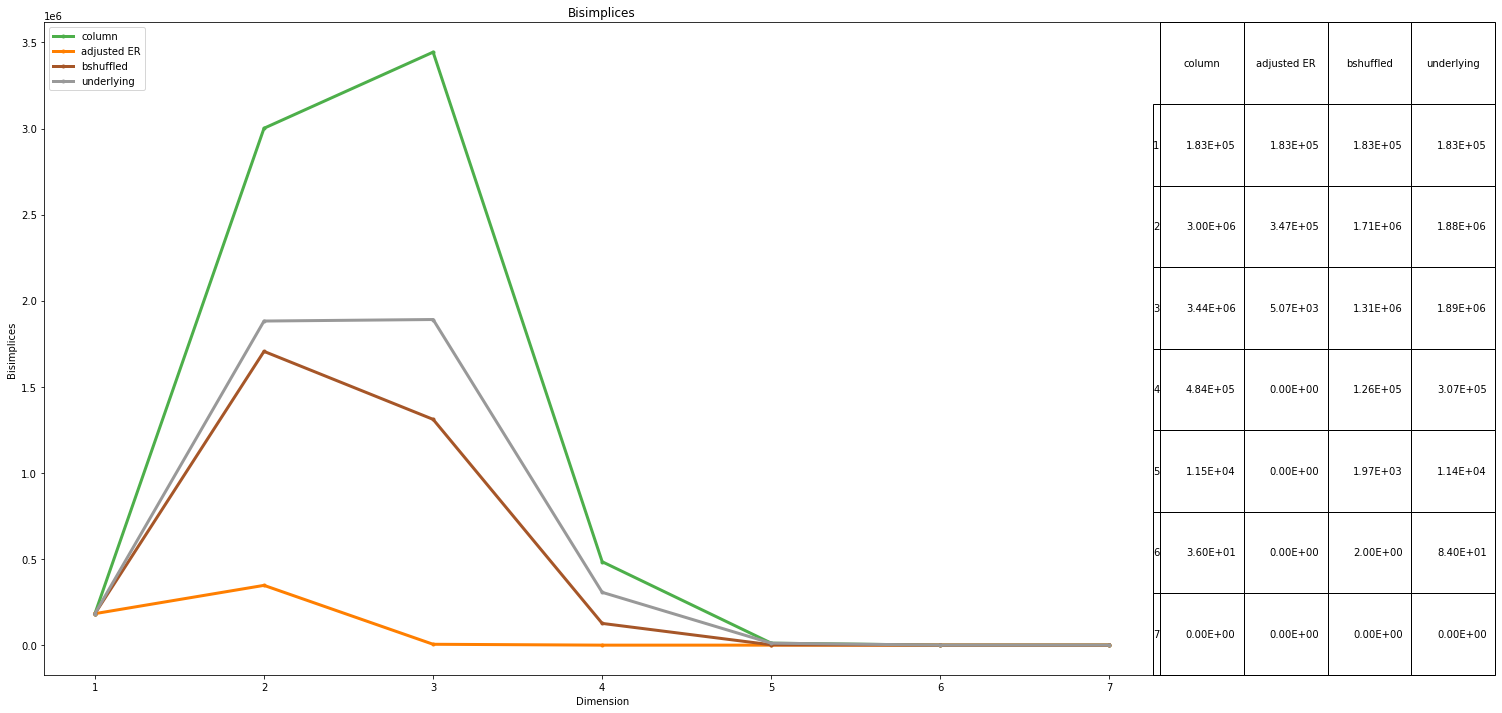

In [6]:
plot_bisimplex_counts([a,b0,c0,d0], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "bisimplices",
                  figtitle = "Bisimplices")

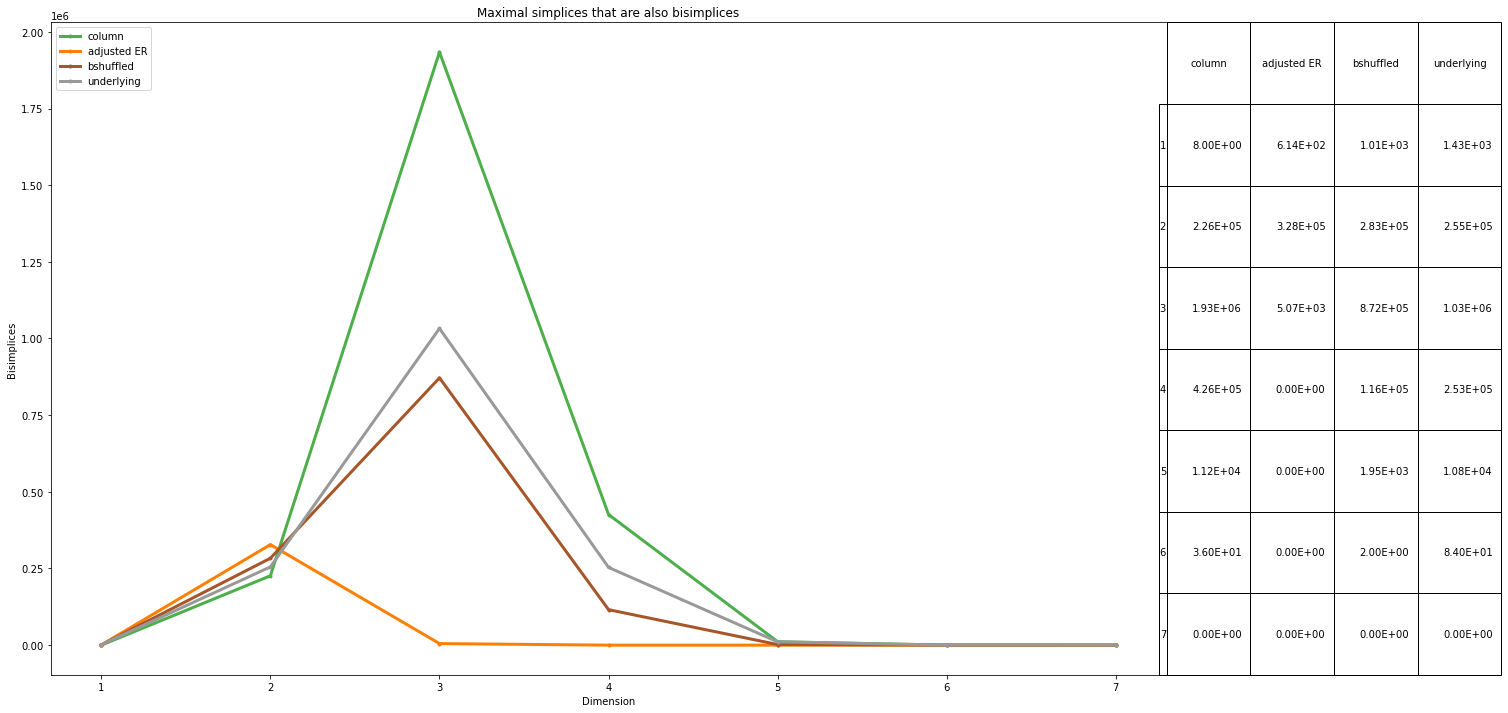

In [7]:
plot_bisimplex_counts([amax,bmax,cmax,dmax], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "mbisimplices",
                  figtitle = "Maximal simplices that are also bisimplices")

/home/paperspace/motifs/counting_motifs/robust_motifs/plot.py:163: RuntimeWarning: invalid value encountered in double_scalars
  counts = [value[-1, -2]/value[0, -1] for value in elem[:dim + 1]]


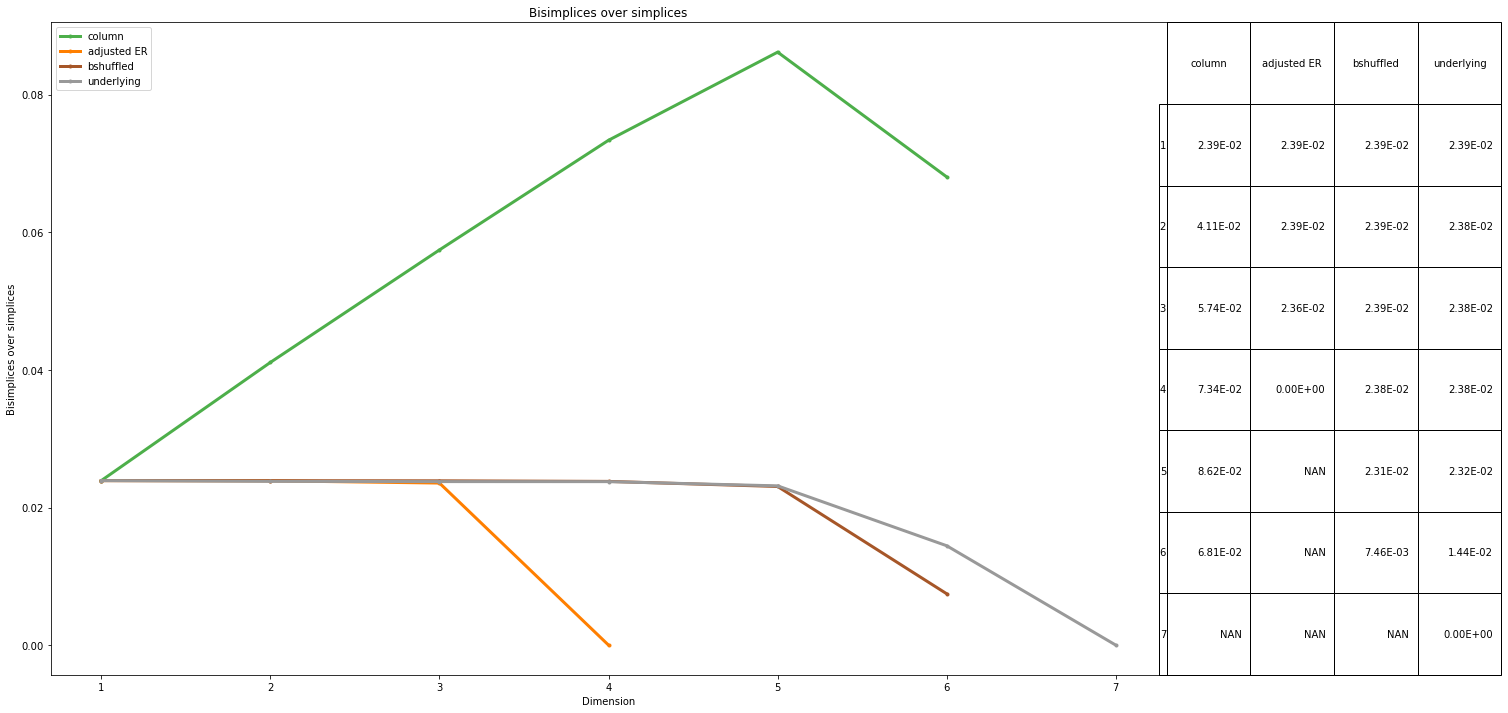

In [8]:
plot_bisimplex_ratio([a,b0,c0,d0], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "bcount_ratio",
                  figtitle = "Bisimplices over simplices")

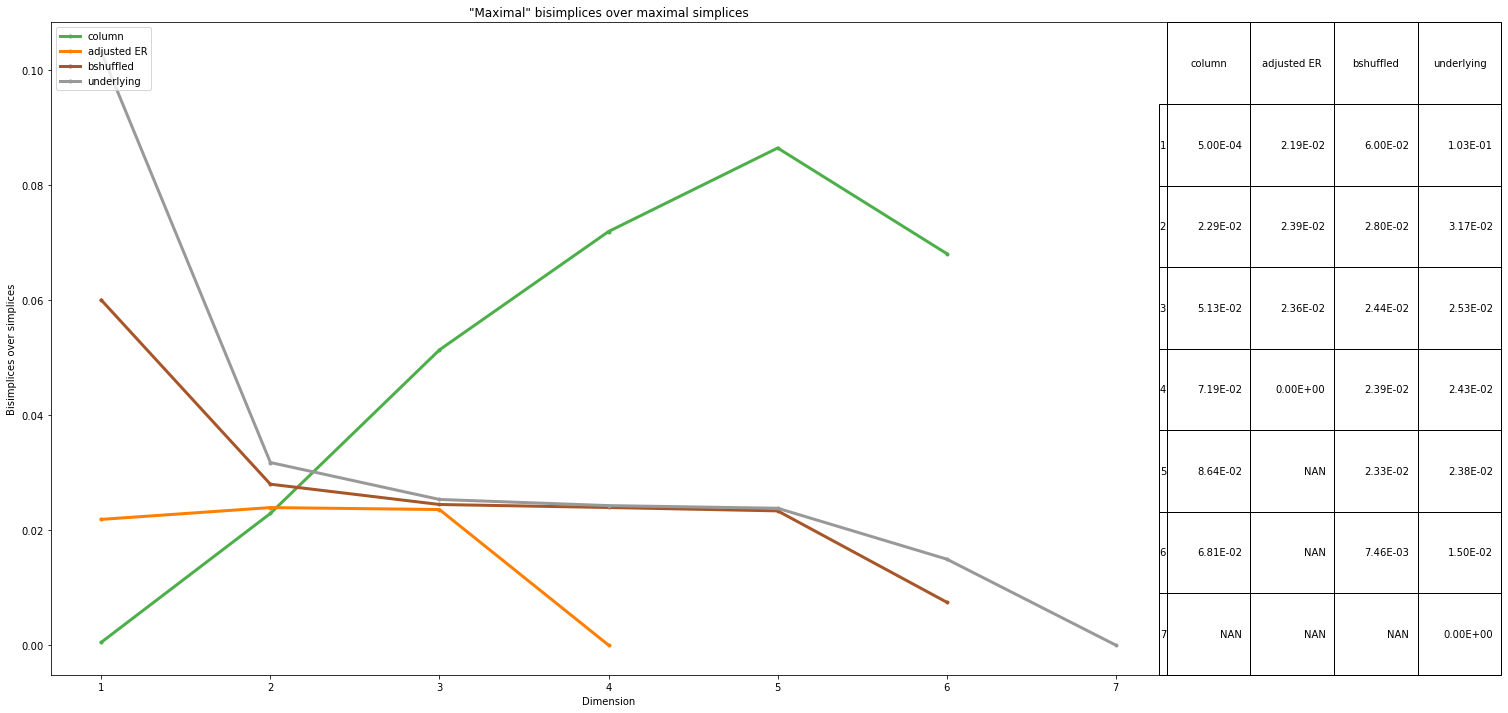

In [9]:
plot_bisimplex_ratio([amax,bmax,cmax,dmax], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "mbcount_ratio",
                  figtitle = "\"Maximal\" bisimplices over maximal simplices")

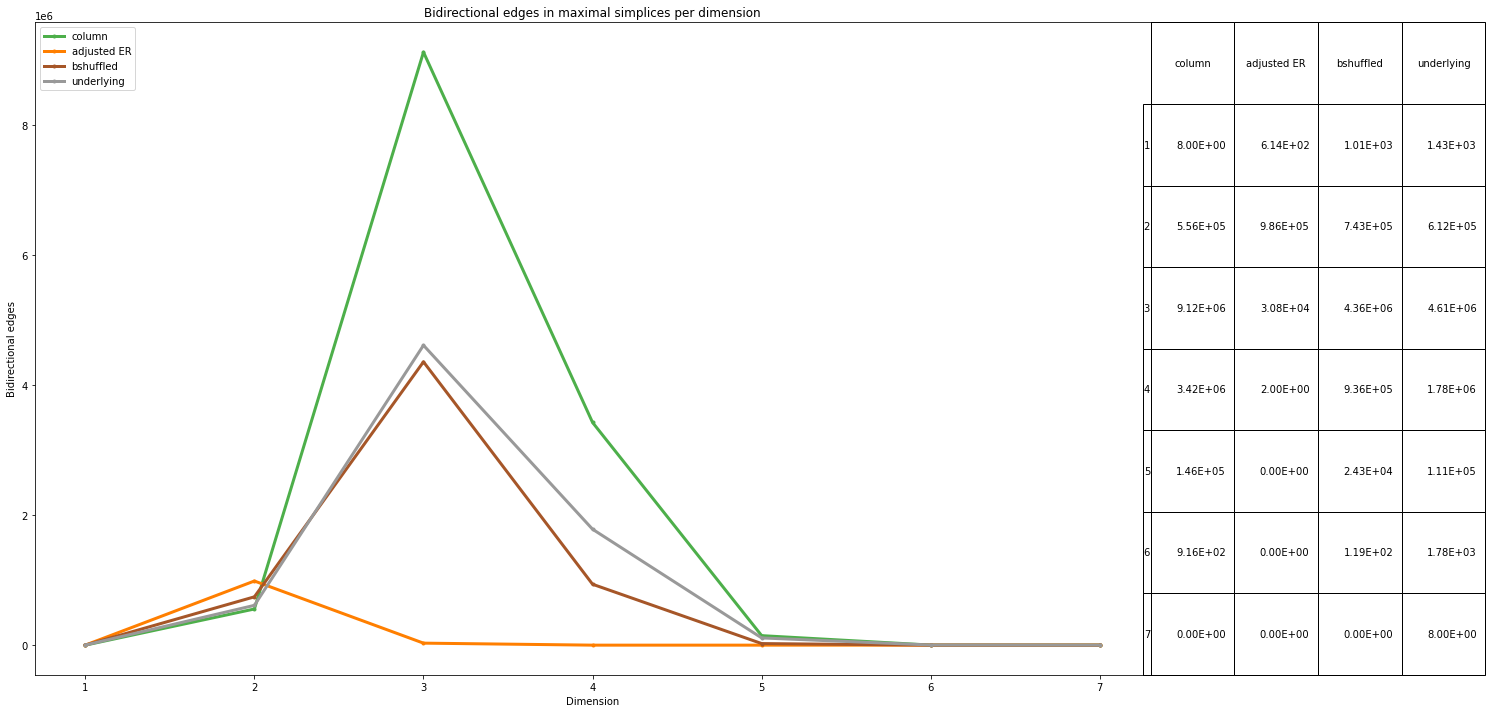

In [10]:
plot_biedge_counts([amax,bmax,cmax,dmax], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "bedge",
                  figtitle = "Bidirectional edges in maximal simplices per dimension")

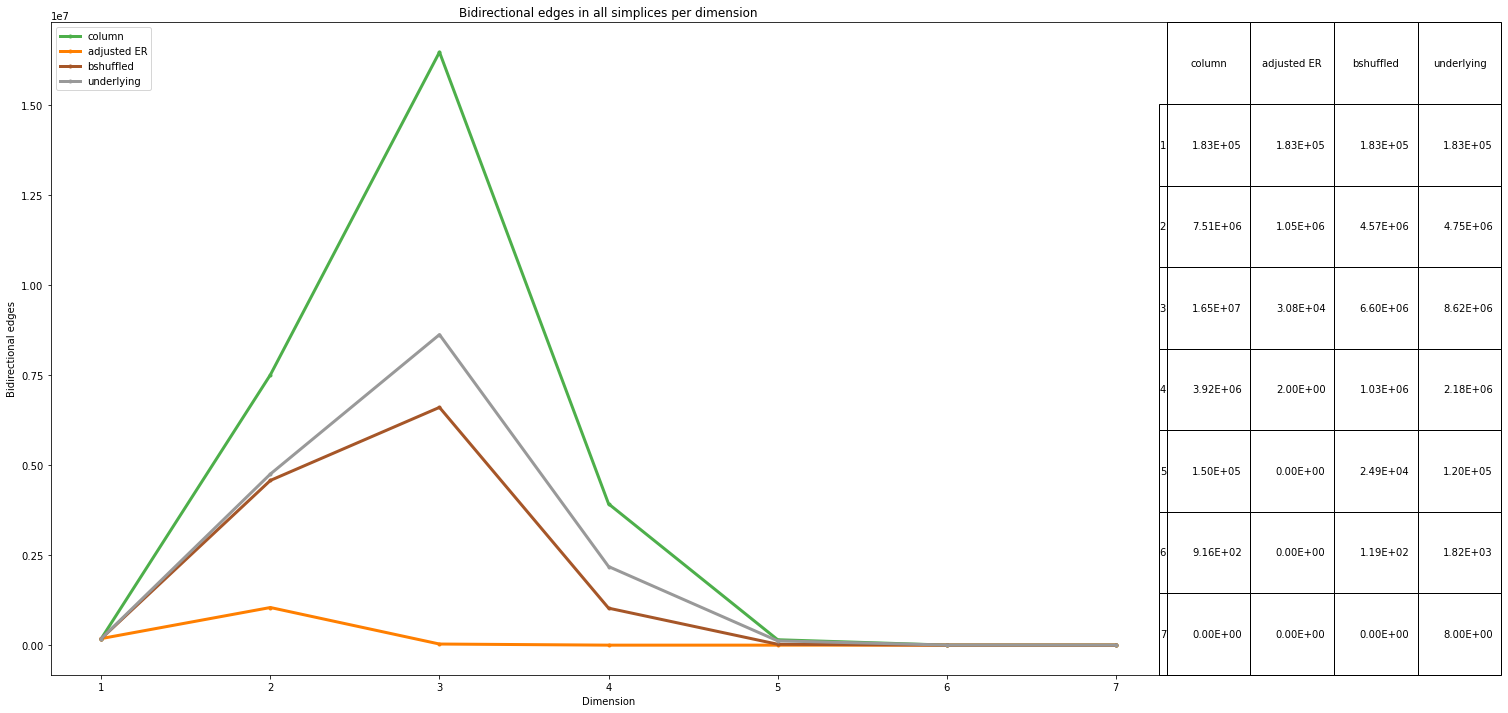

In [11]:
plot_biedge_counts([a,b0,c0,d0], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "mbedge",
                  figtitle = "Bidirectional edges in all simplices per dimension")

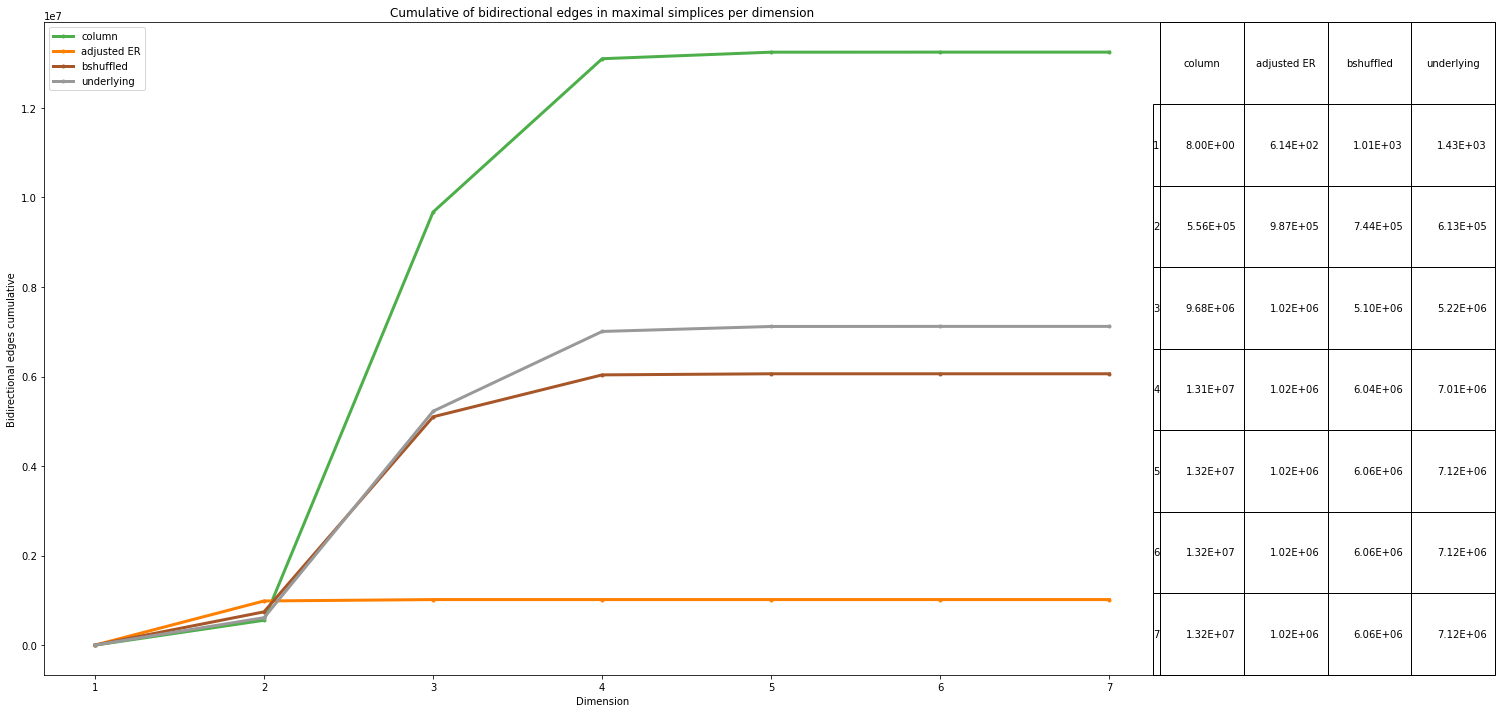

In [12]:
plot_biedge_cumulative([amax,bmax,cmax,dmax], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "mbcumul_few",
                      figtitle = "Cumulative of bidirectional edges in maximal simplices per dimension")

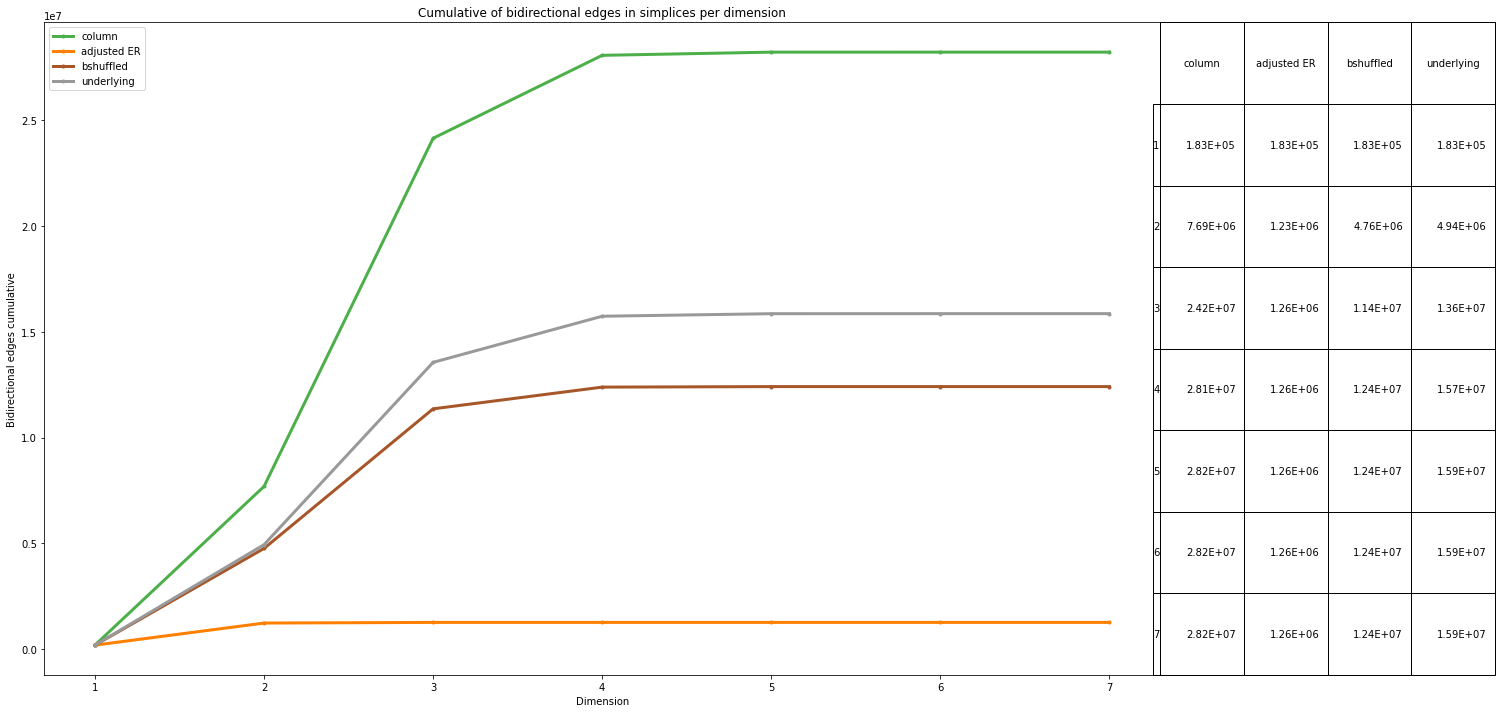

In [13]:
plot_biedge_cumulative([a,b0,c0,d0], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "bcumul_few",
                      figtitle = "Cumulative of bidirectional edges in simplices per dimension")

<ipython-input-14-43a5cf6623c2>:5: RuntimeWarning: invalid value encountered in true_divide
  dictionary[key] = x[key]/x[key][0][-1]


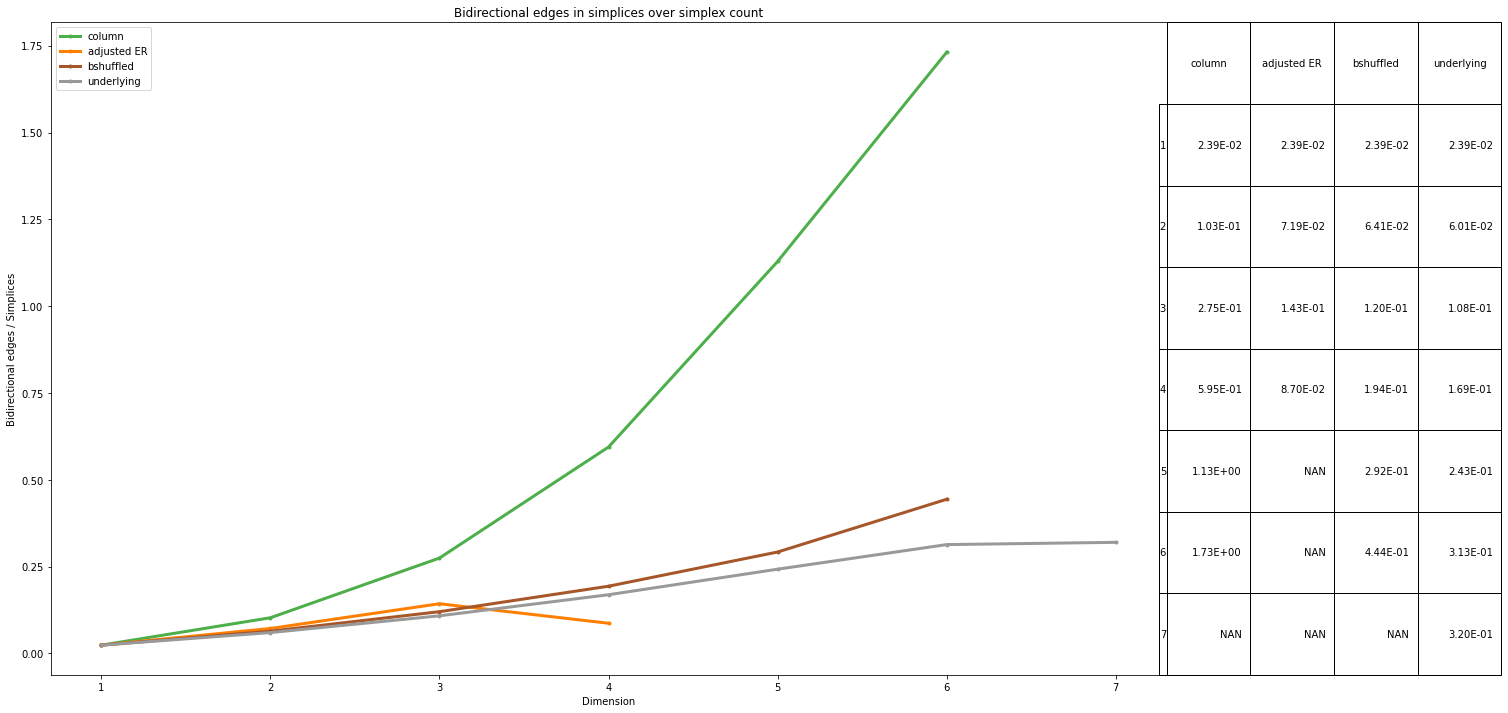

In [14]:
normalized_list = []
for x in [a, b0, c0, d0]:
    dictionary = {}
    for key in x.keys():
        dictionary[key] = x[key]/x[key][0][-1]
    normalized_list.append(dictionary)
plot_biedge_counts(normalized_list, 6, 2, ["column", "adjusted ER", "bshuffled", "underlying"], "bcount_few_normalized",
                  ylabel = "Bidirectional edges / Simplices", 
                  figtitle = "Bidirectional edges in simplices over simplex count")

<ipython-input-15-c459484934c3>:5: RuntimeWarning: invalid value encountered in true_divide
  dictionary[key] = x[key]/x[key][0][-1]


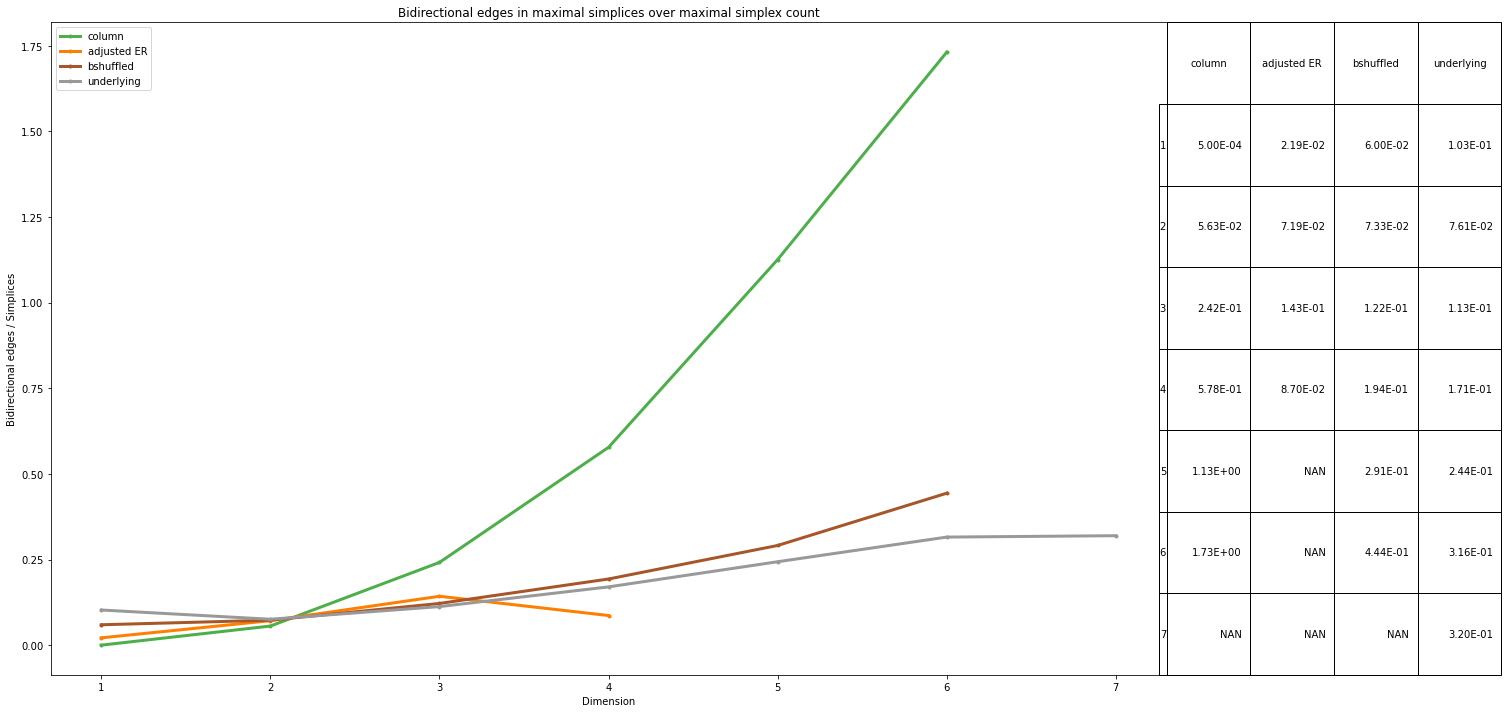

In [15]:
normalized_list = []
for x in [amax, bmax, cmax, dmax]:
    dictionary = {}
    for key in x.keys():
        dictionary[key] = x[key]/x[key][0][-1]
    normalized_list.append(dictionary)
plot_biedge_counts(normalized_list, 6, 2, ["column", "adjusted ER", "bshuffled", "underlying"], "mbcount_few_normalized",
                  ylabel = "Bidirectional edges / Simplices", 
                  figtitle = "Bidirectional edges in maximal simplices over maximal simplex count")

/home/paperspace/motifs/counting_motifs/robust_motifs/plot.py:226: RuntimeWarning: invalid value encountered in true_divide
  matrix_max = np.max(np.tril(matrix) / matrix[0,-1])


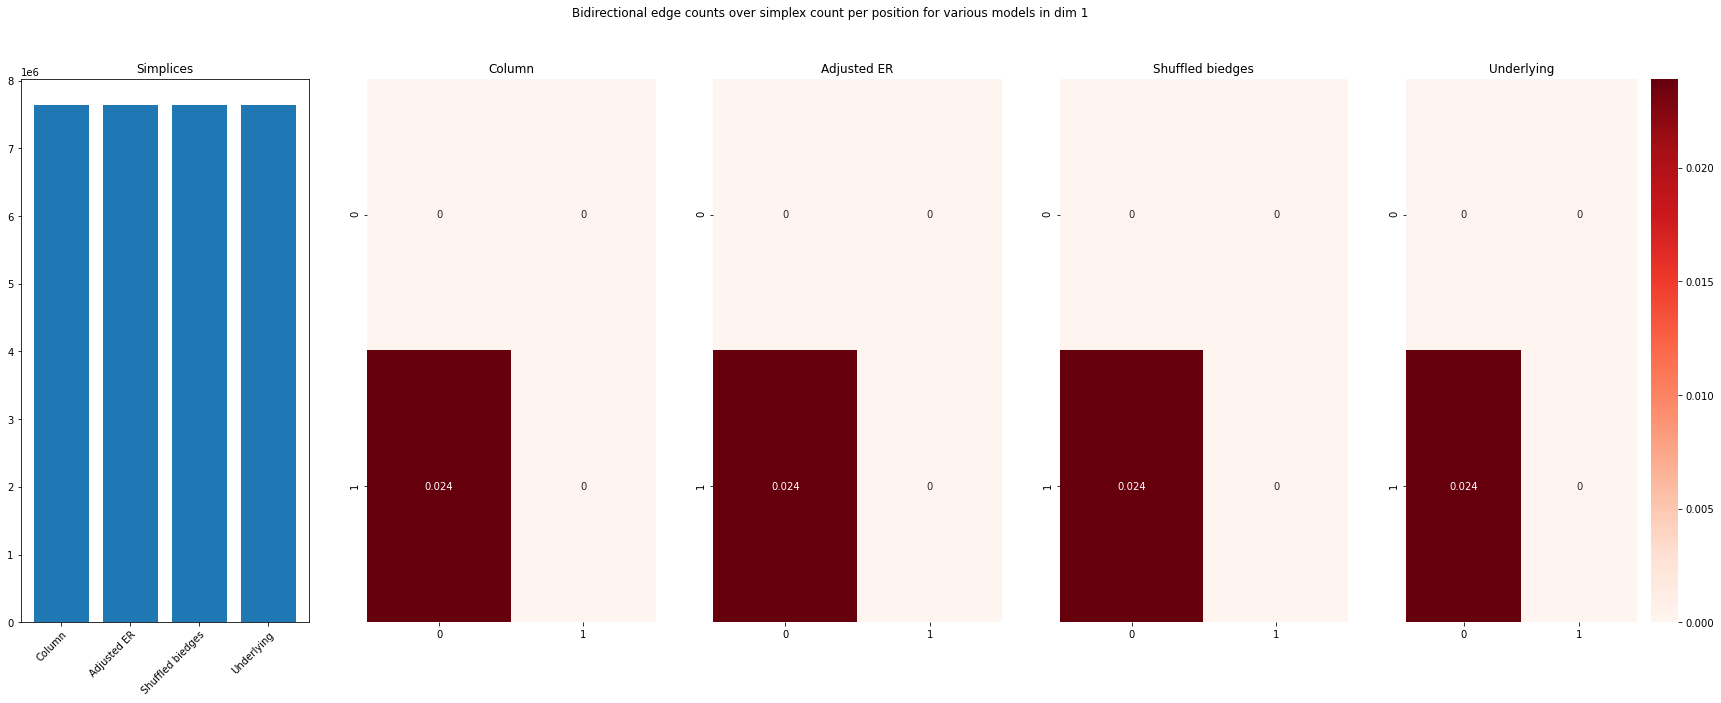

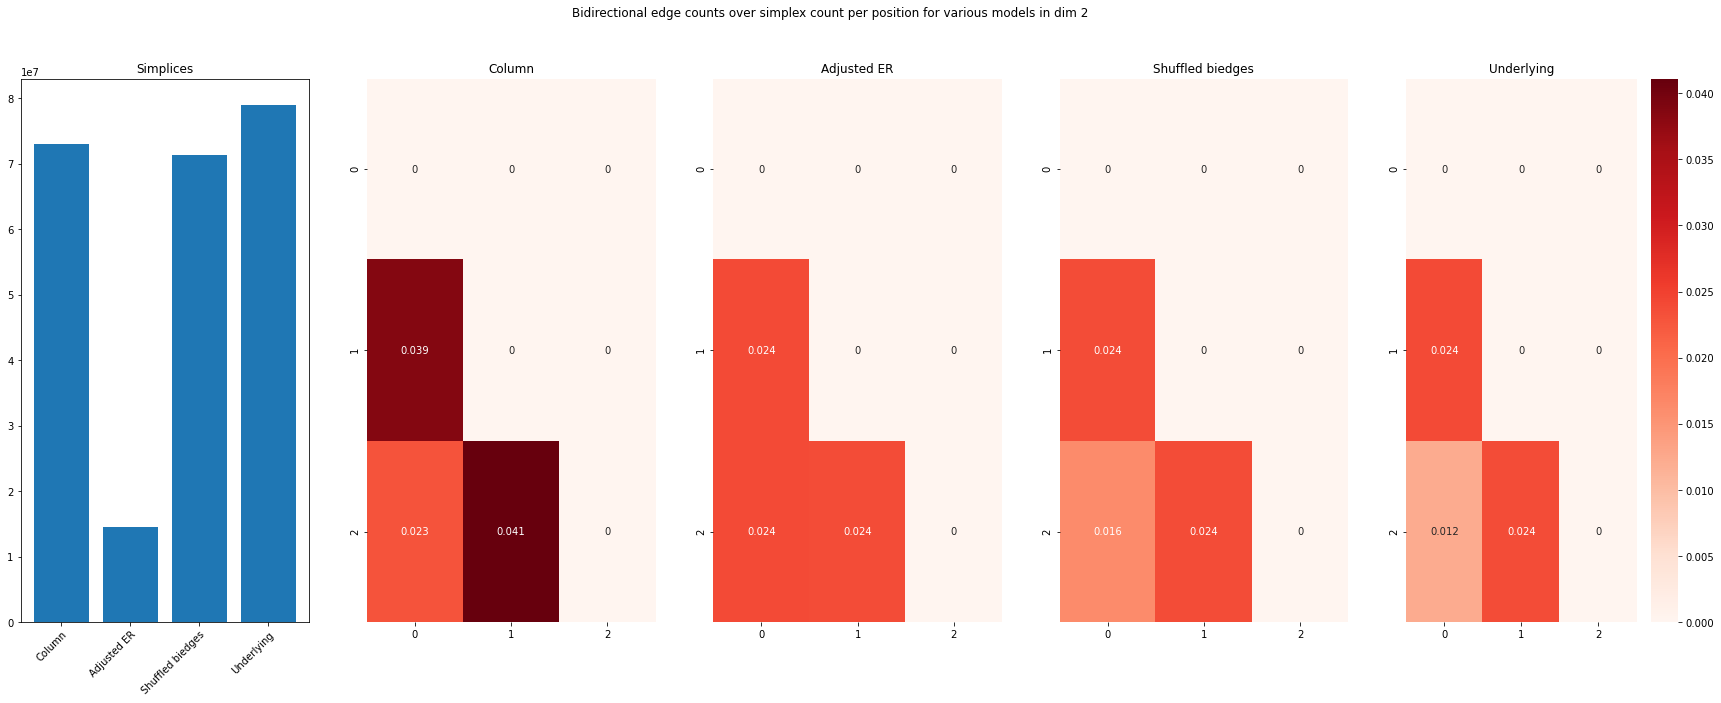

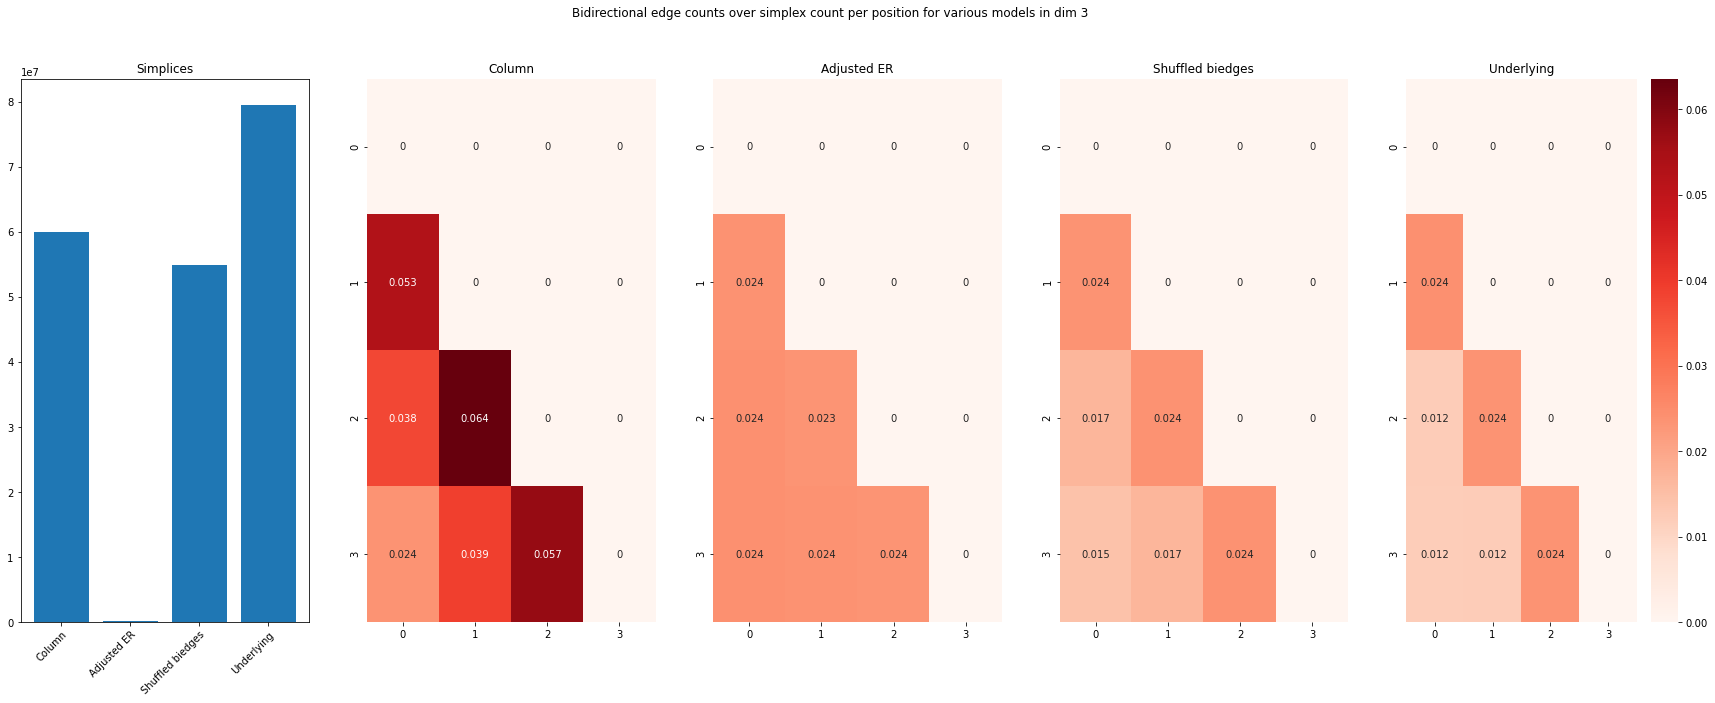

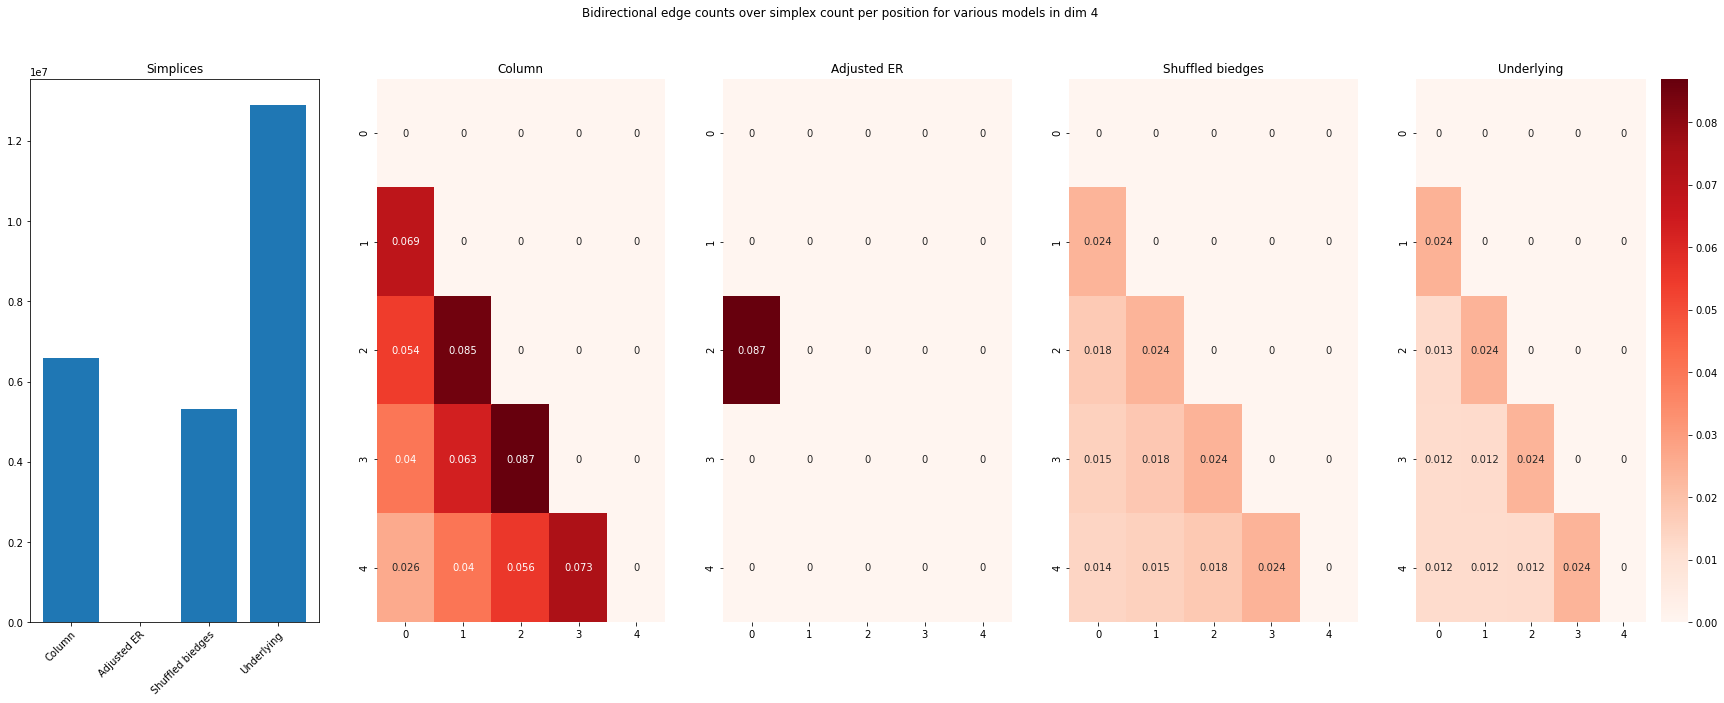

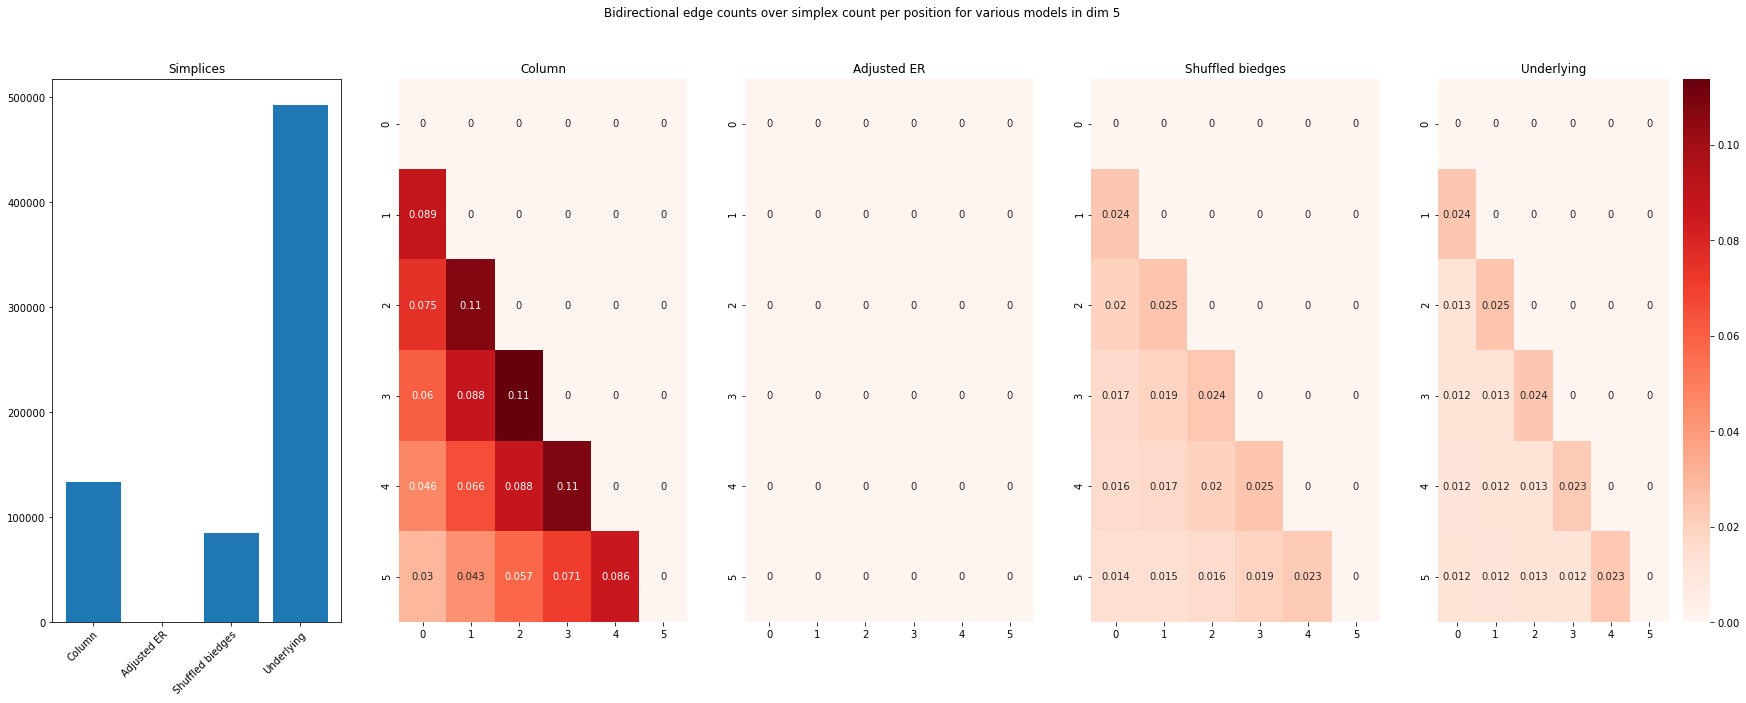

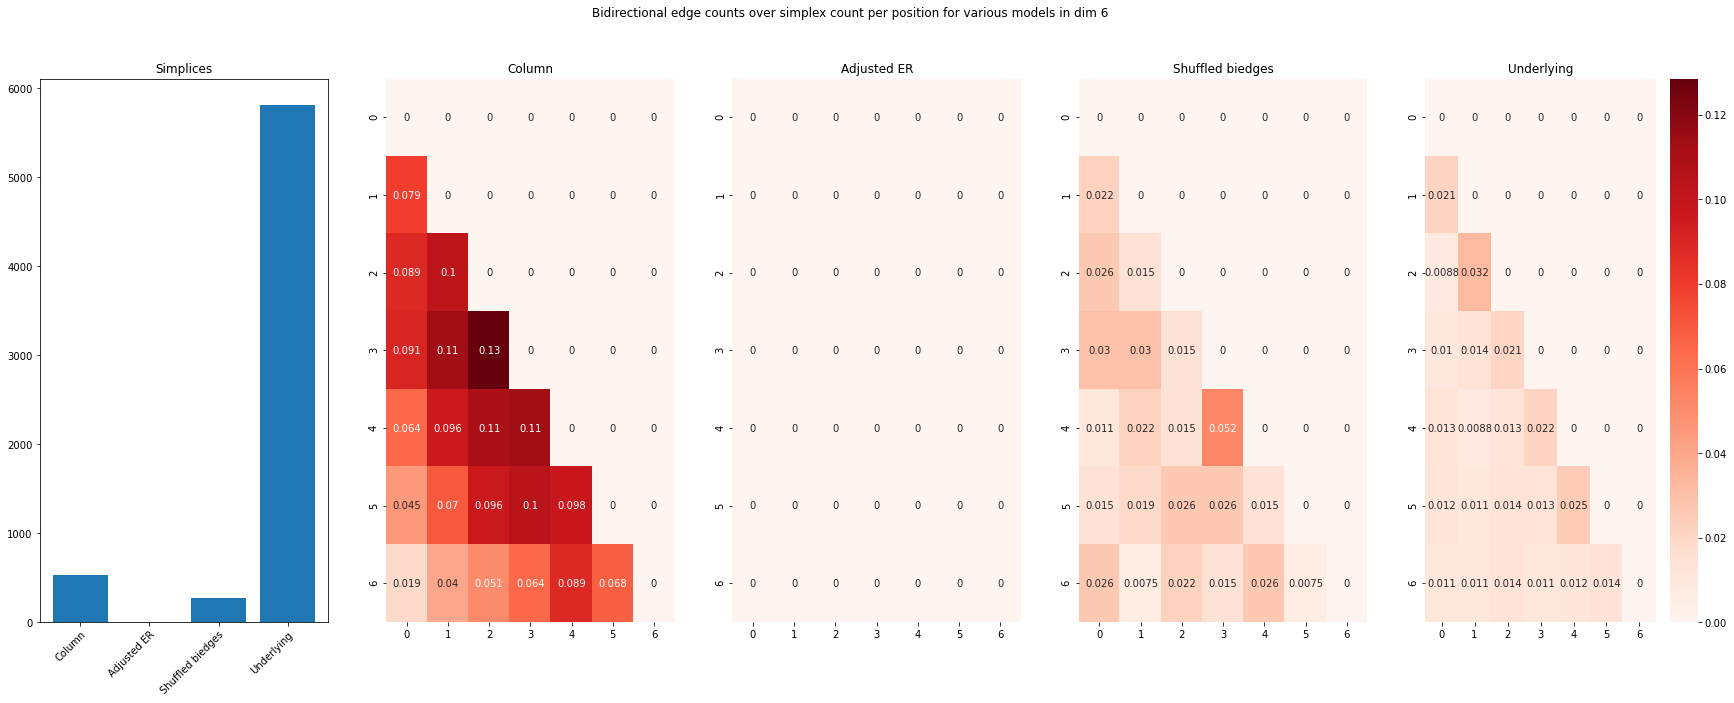

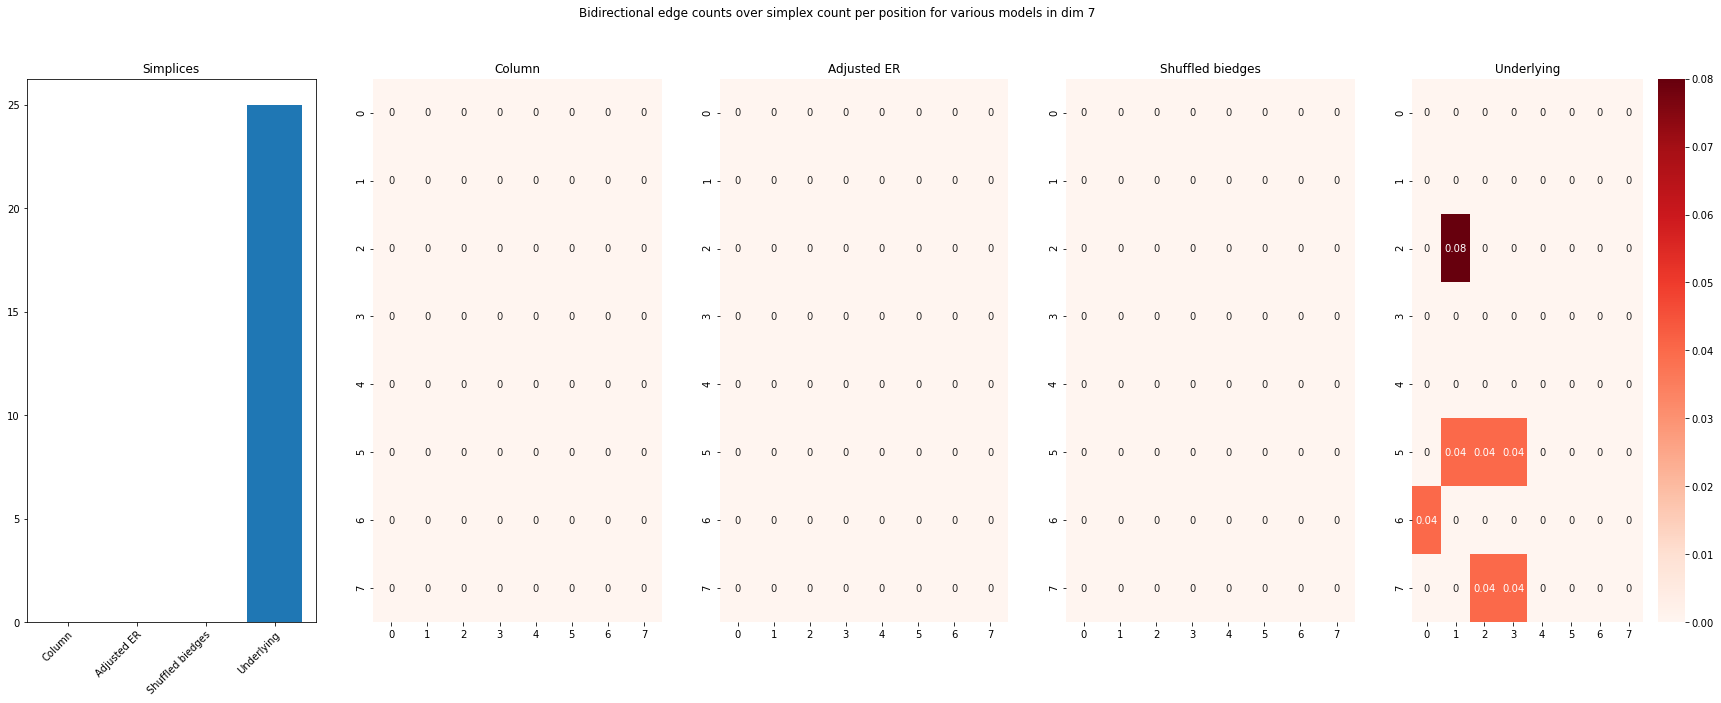

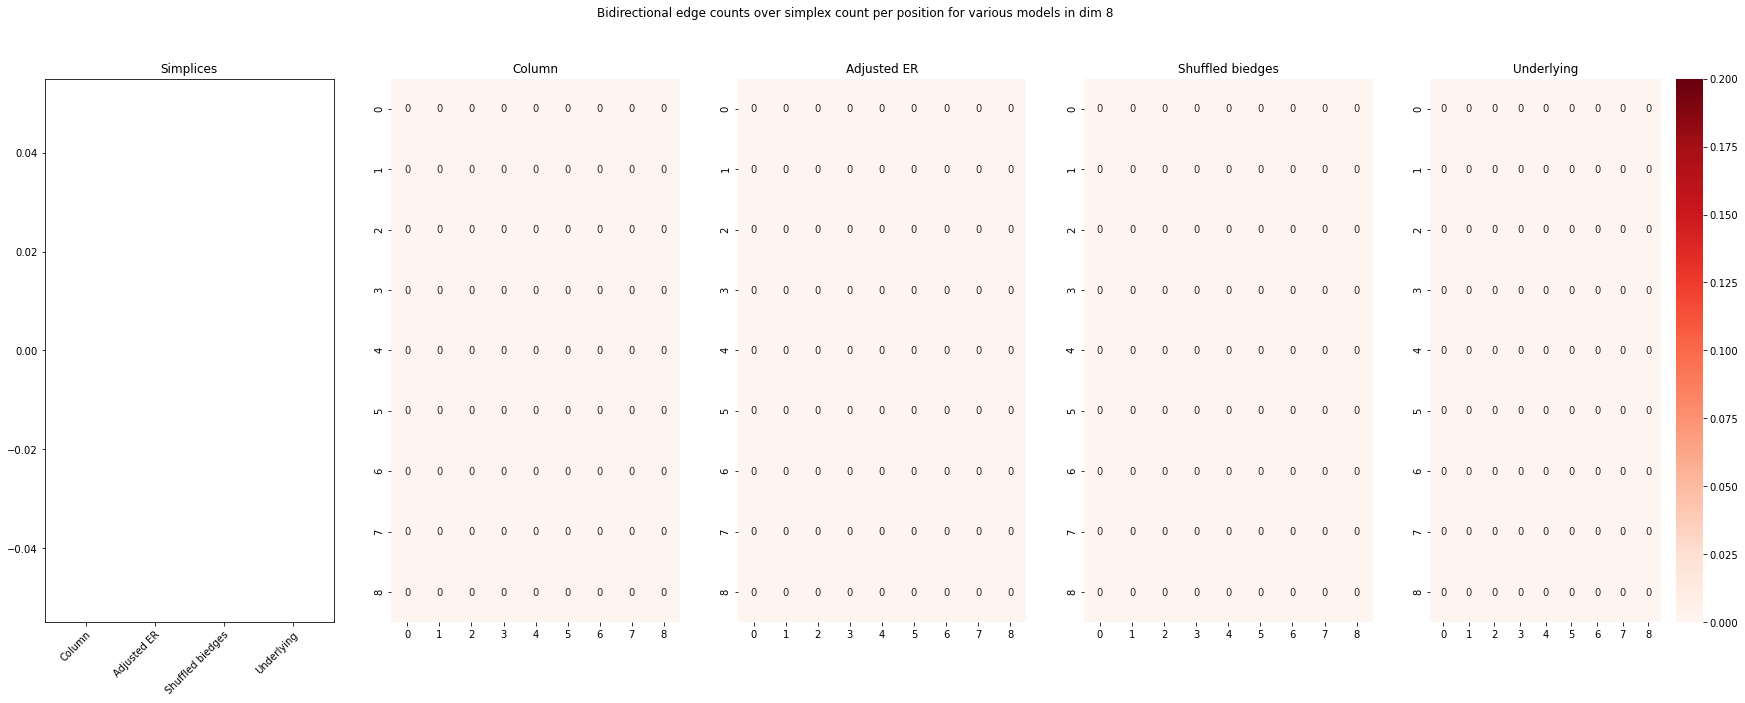

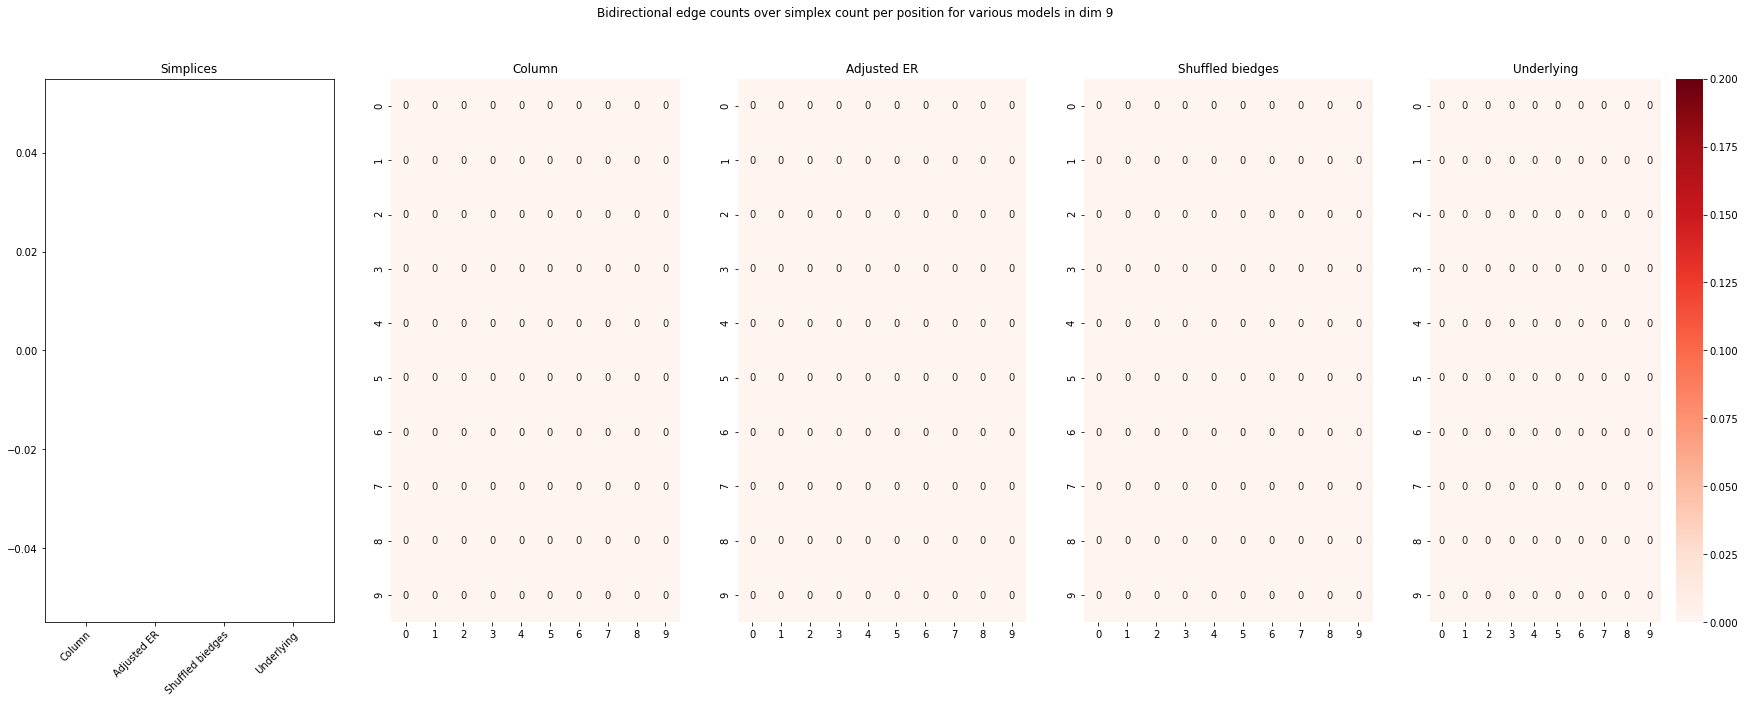

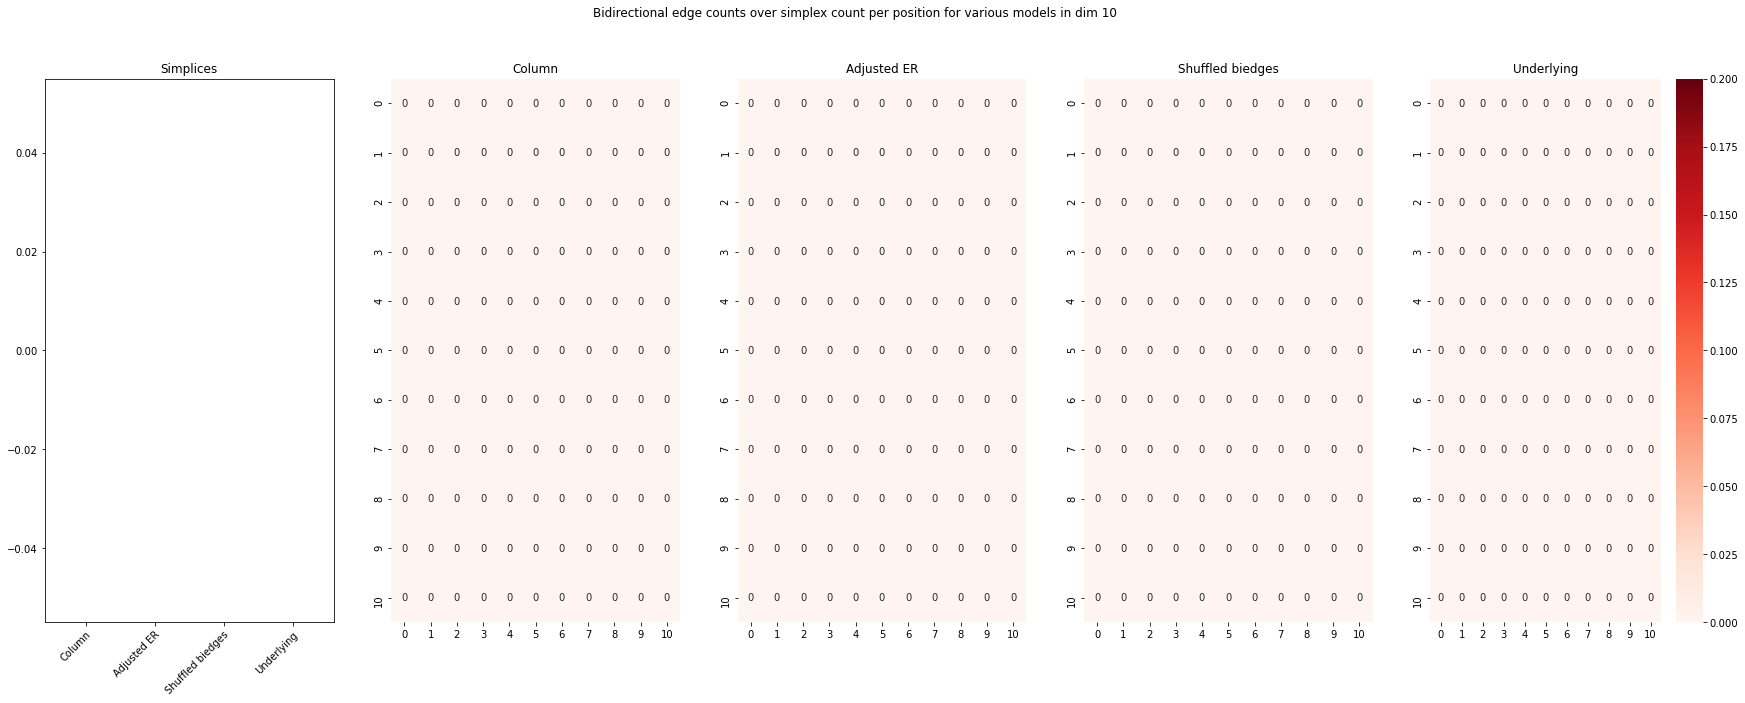

In [16]:
compare_graphs_normalized([a,b0,c0,d0], 1, "bcounts_norm")

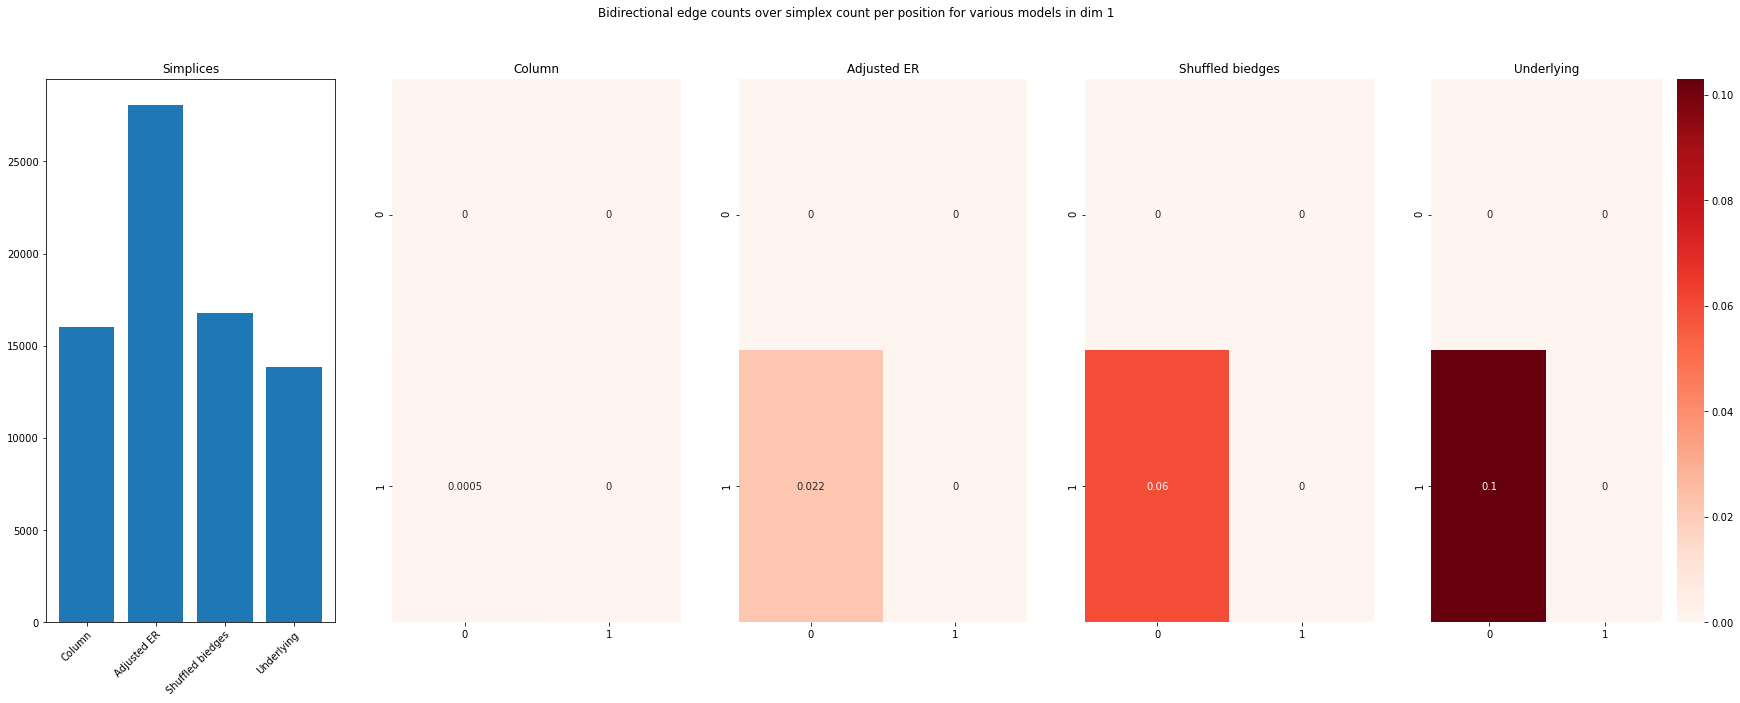

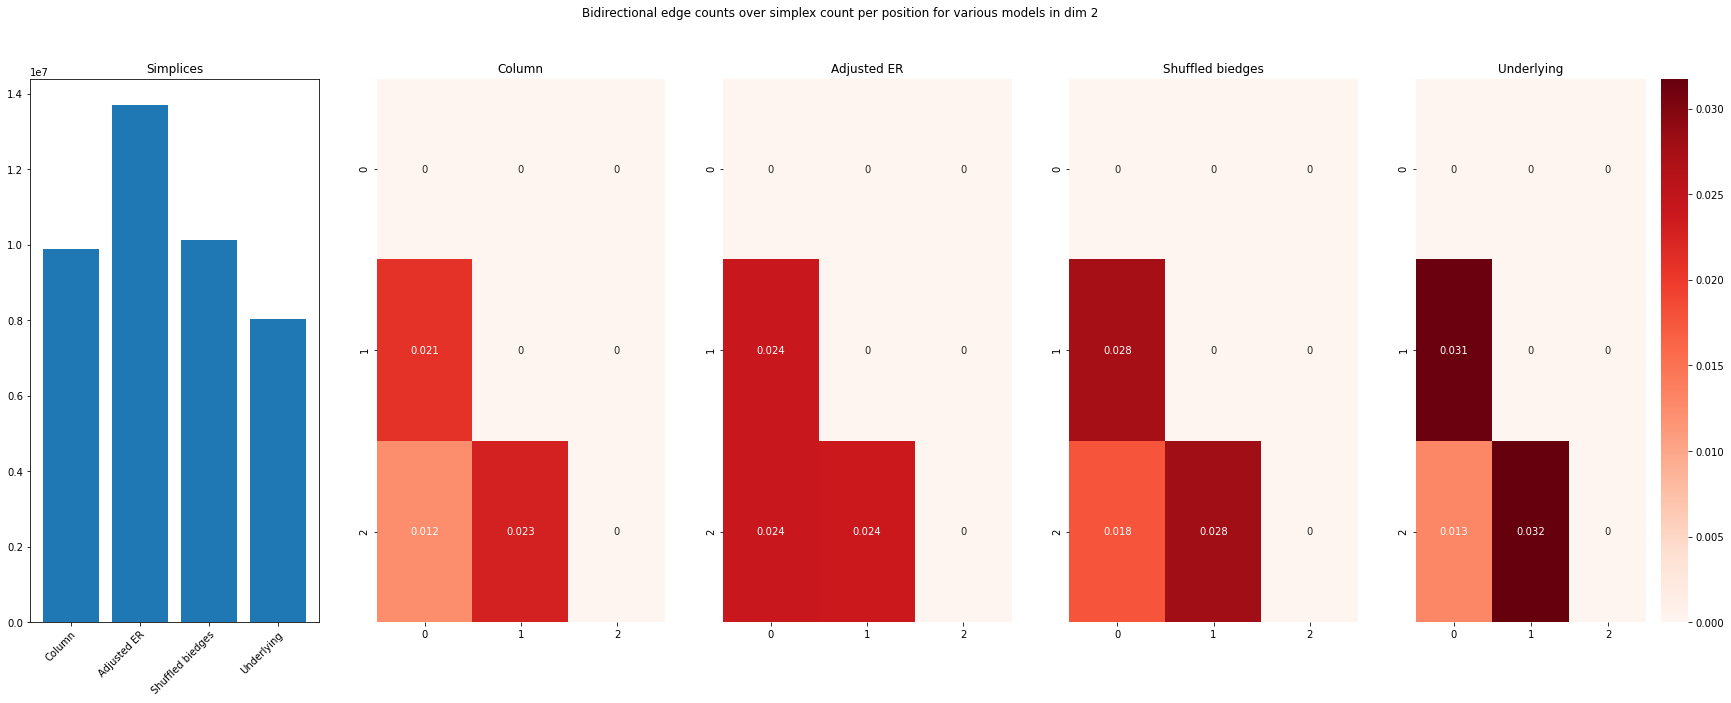

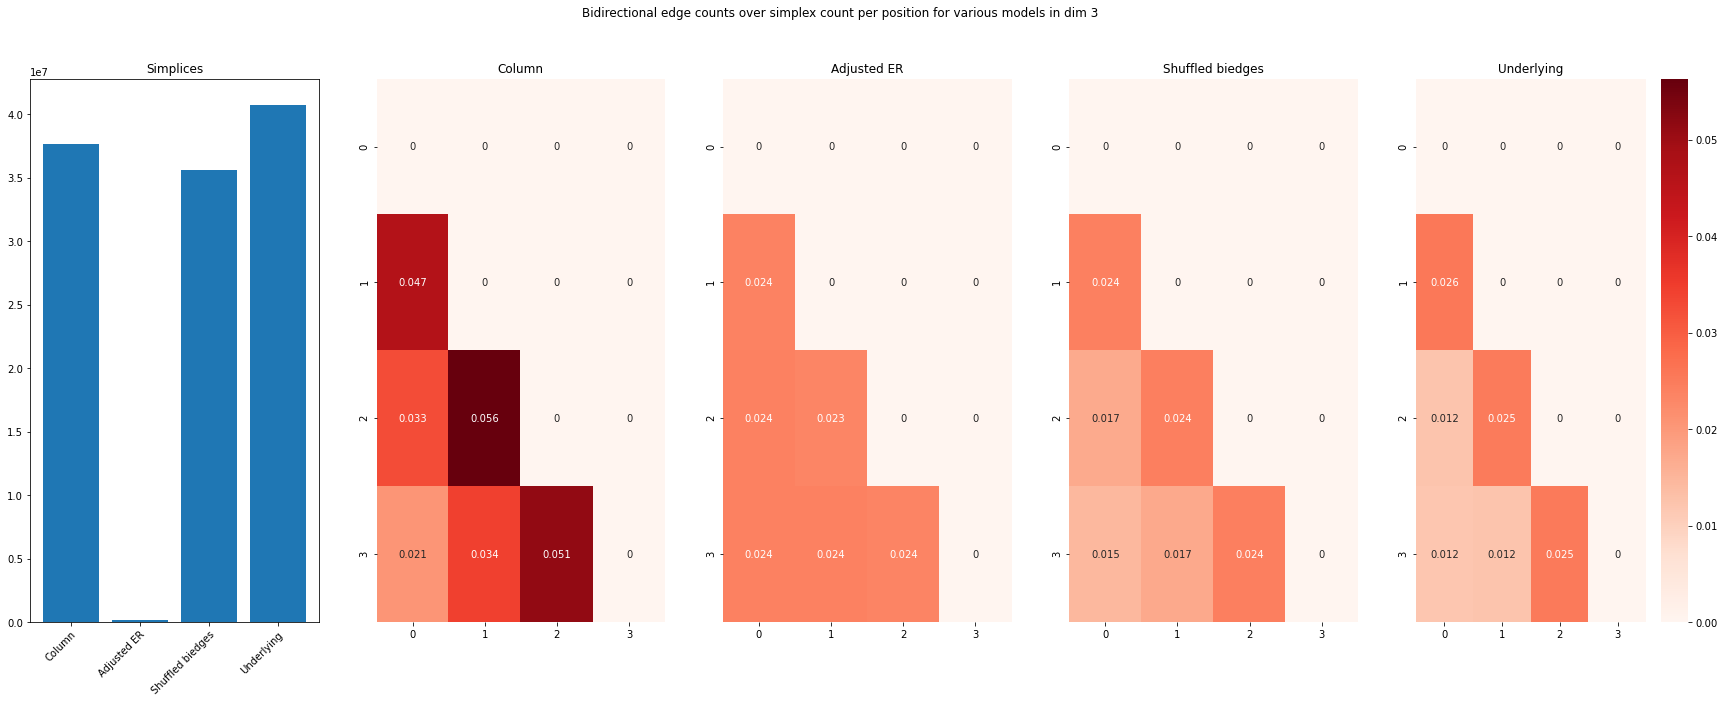

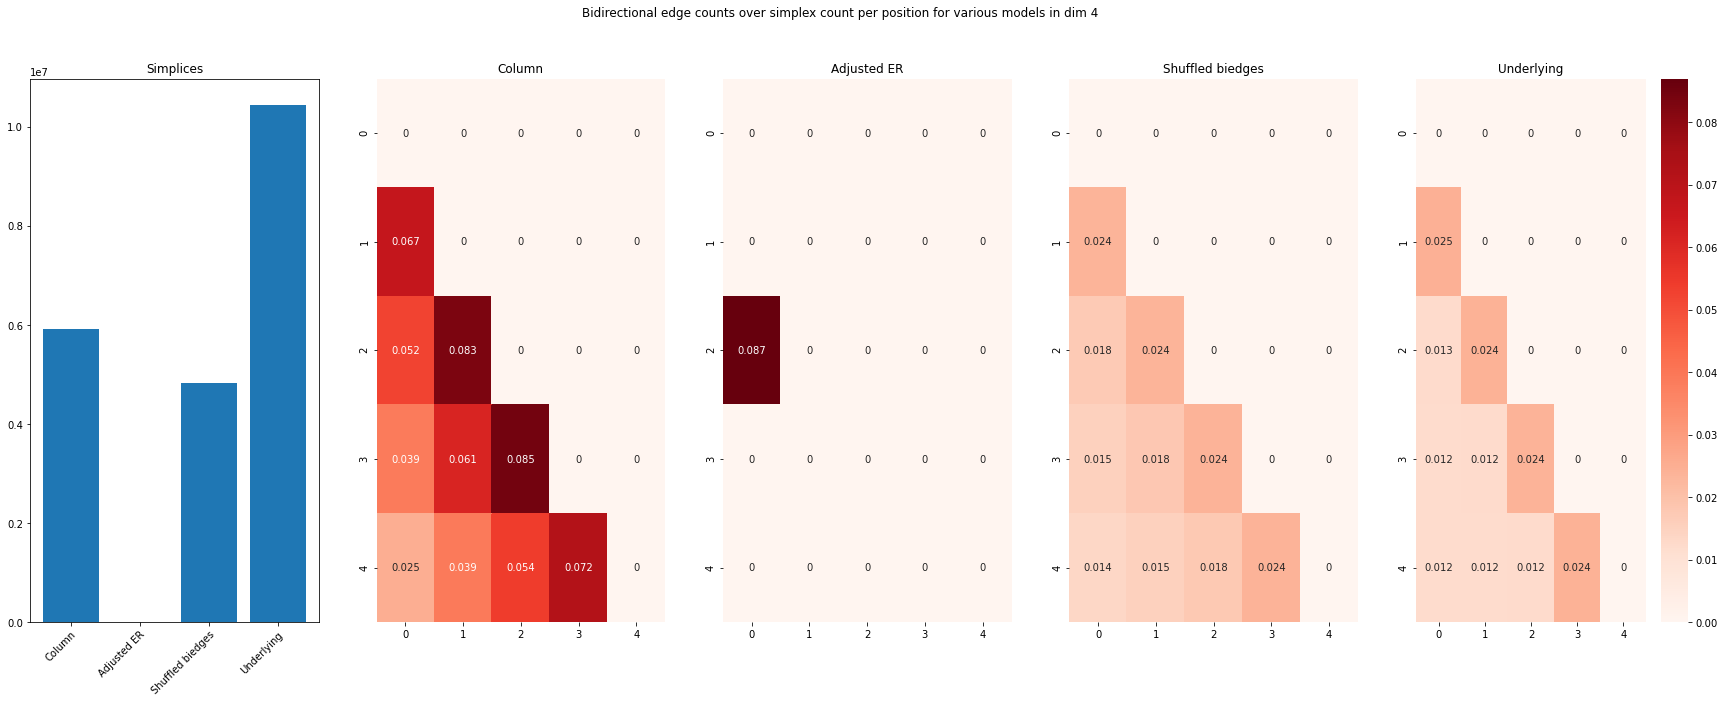

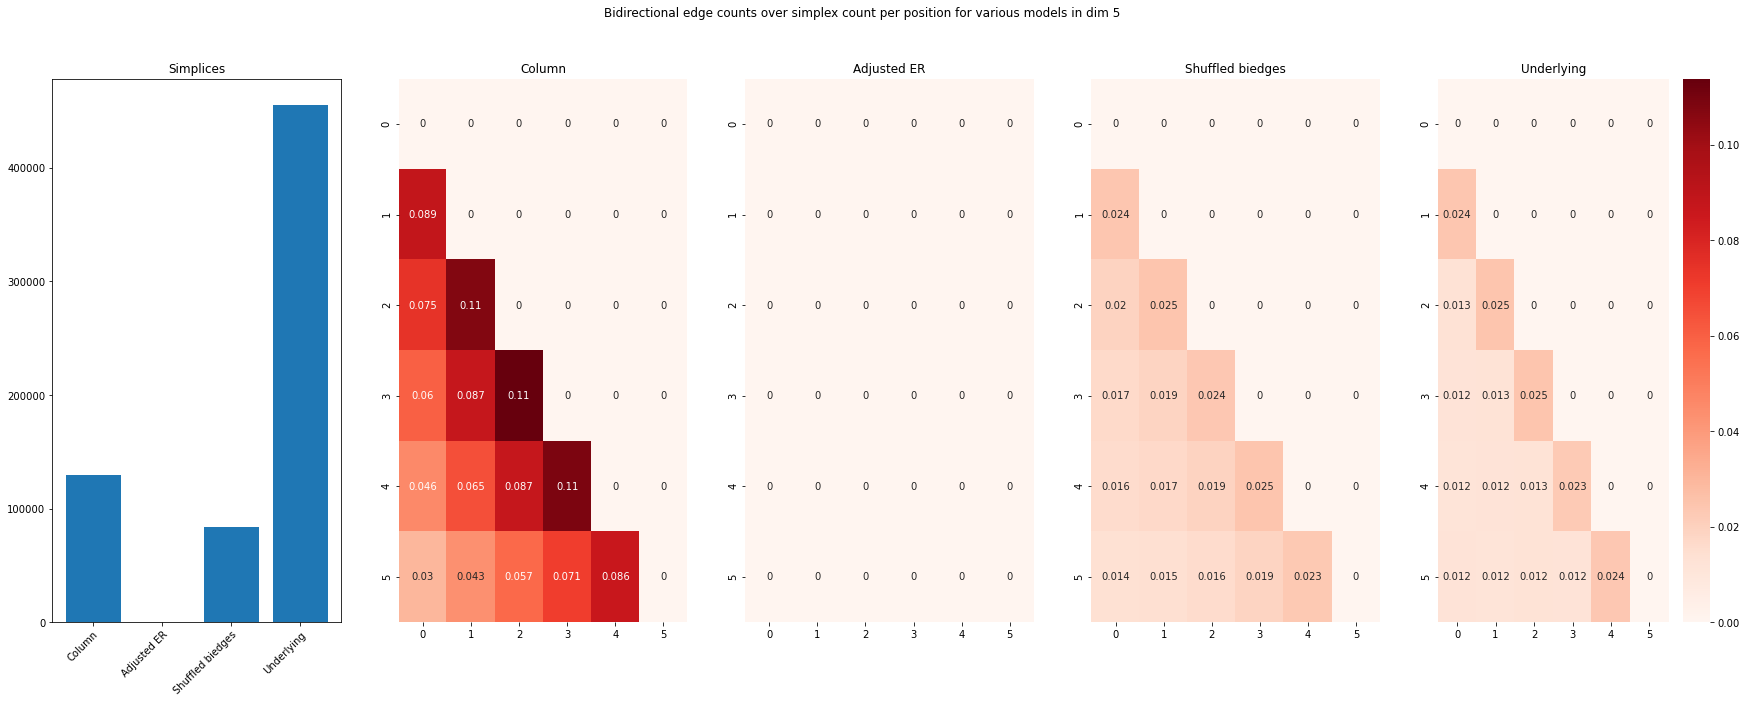

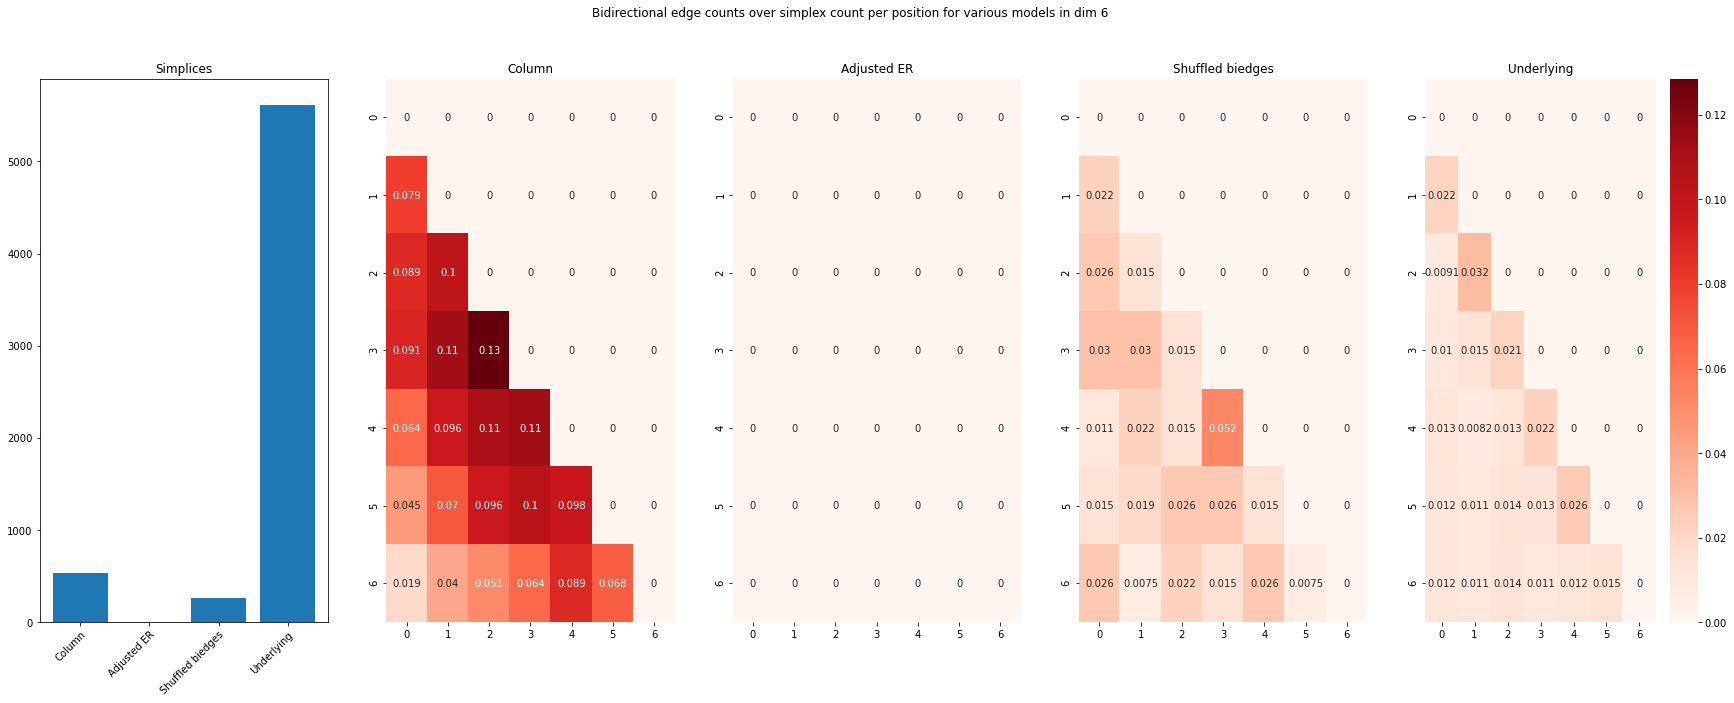

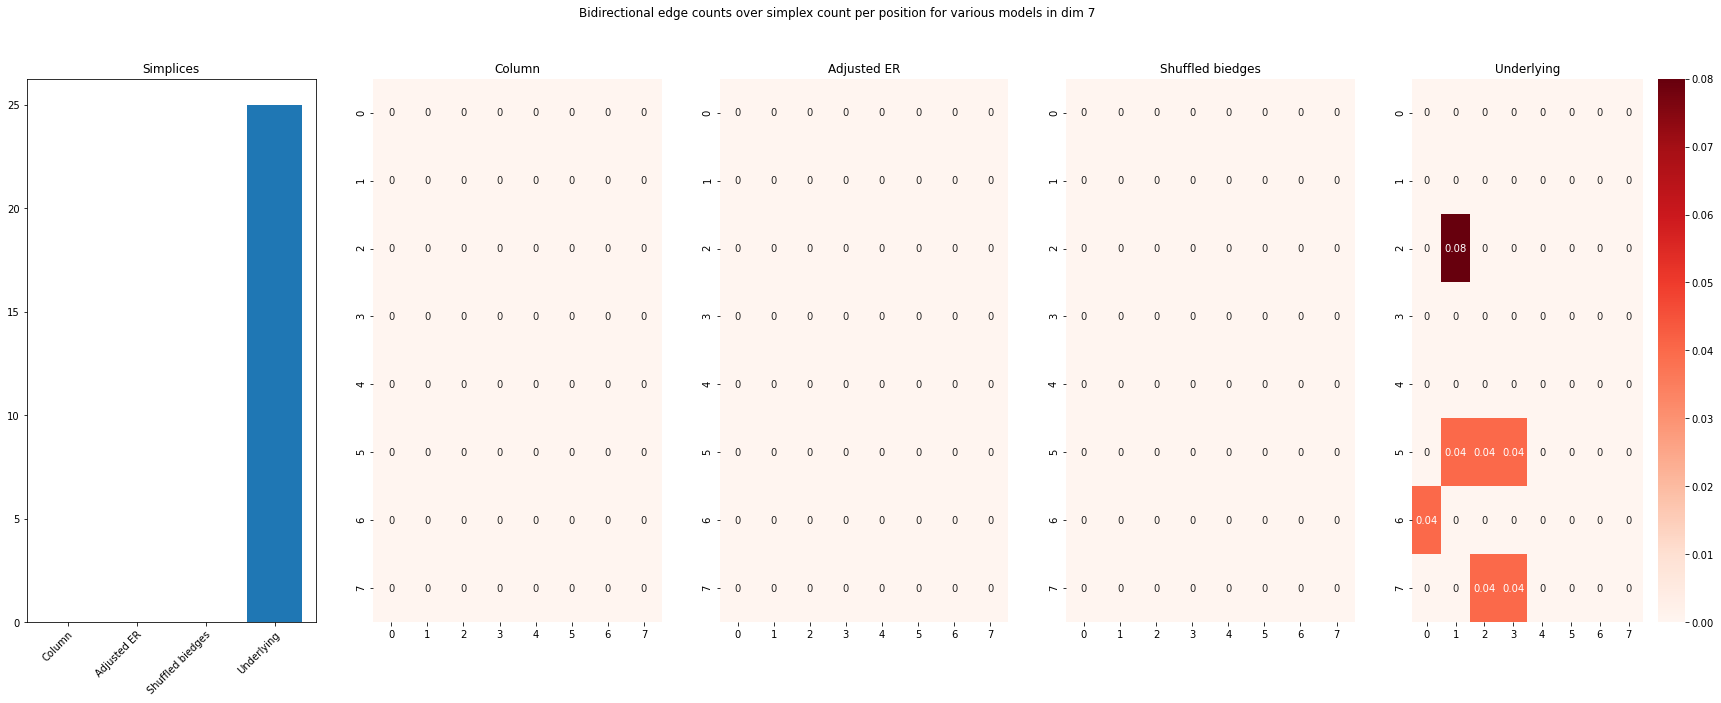

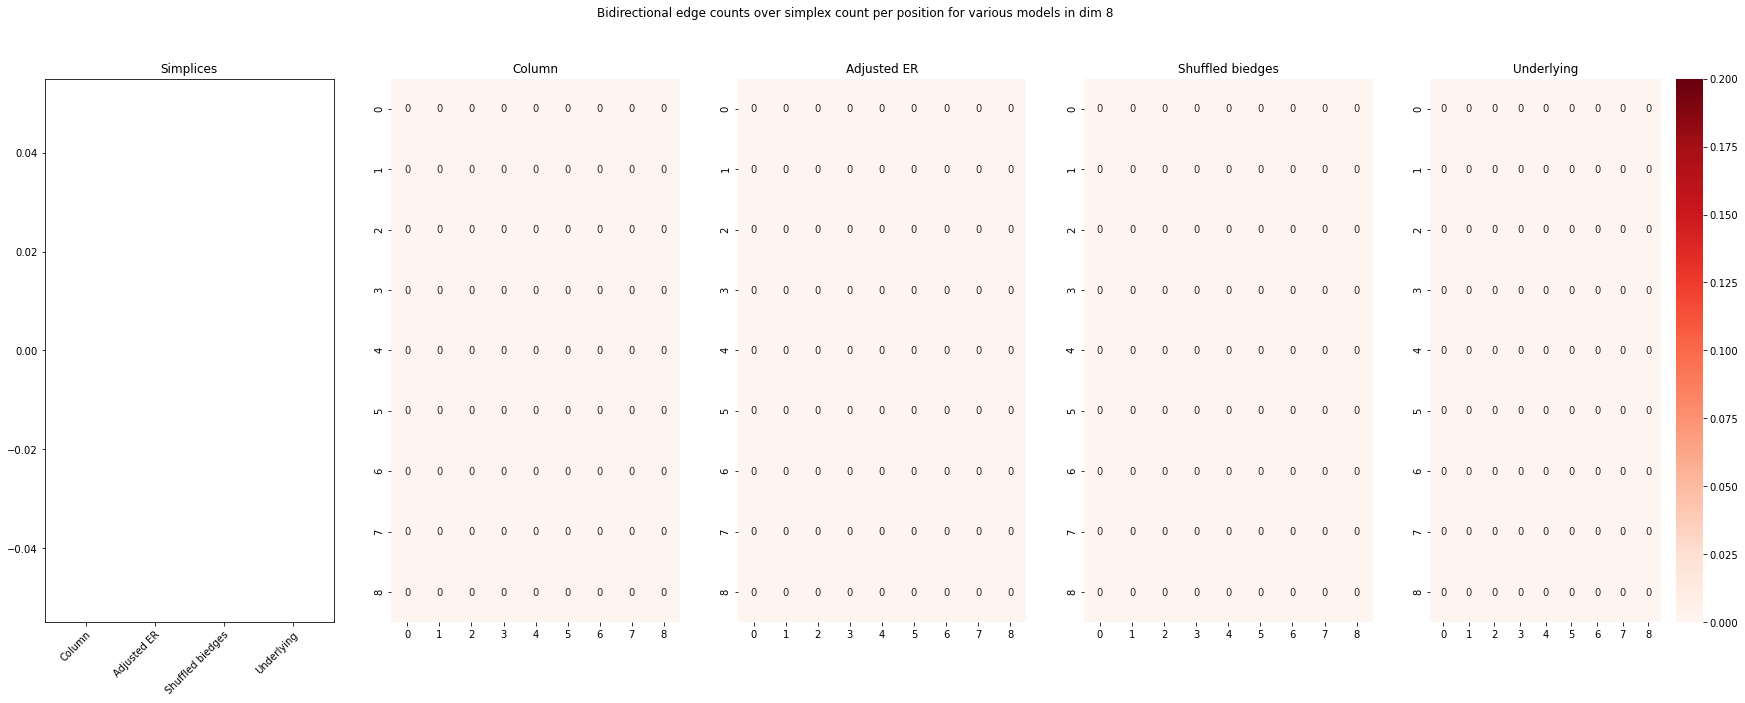

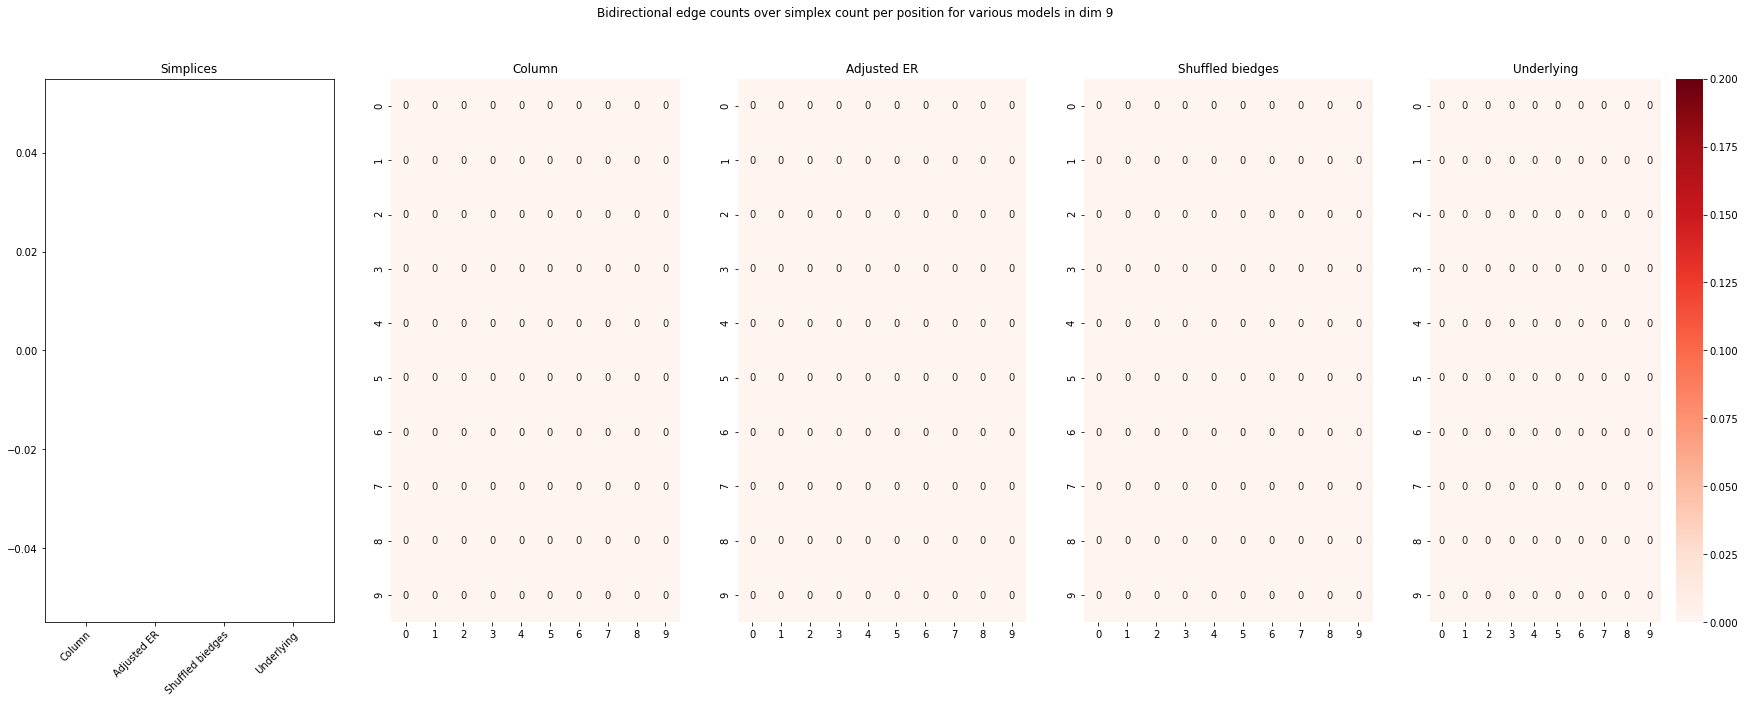

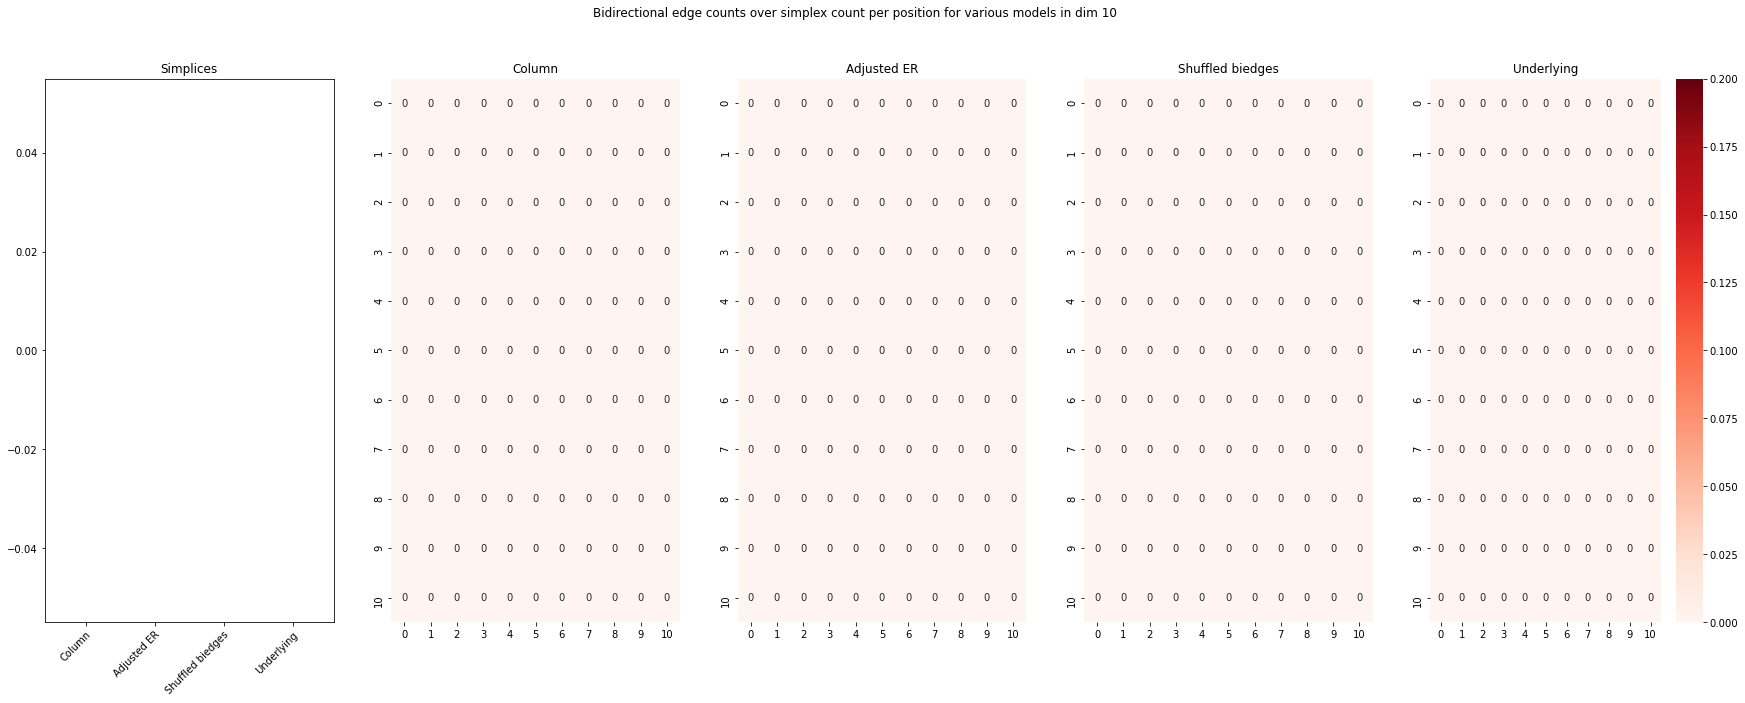

In [17]:
compare_graphs_normalized([amax,bmax,cmax,dmax], 1, "mbcounts_norm")

/home/paperspace/motifs/counting_motifs/robust_motifs/plot.py:192: RuntimeWarning: invalid value encountered in true_divide
  matrix_max = np.max(np.tril(matrix)/ np.sum(np.tril(matrix)))


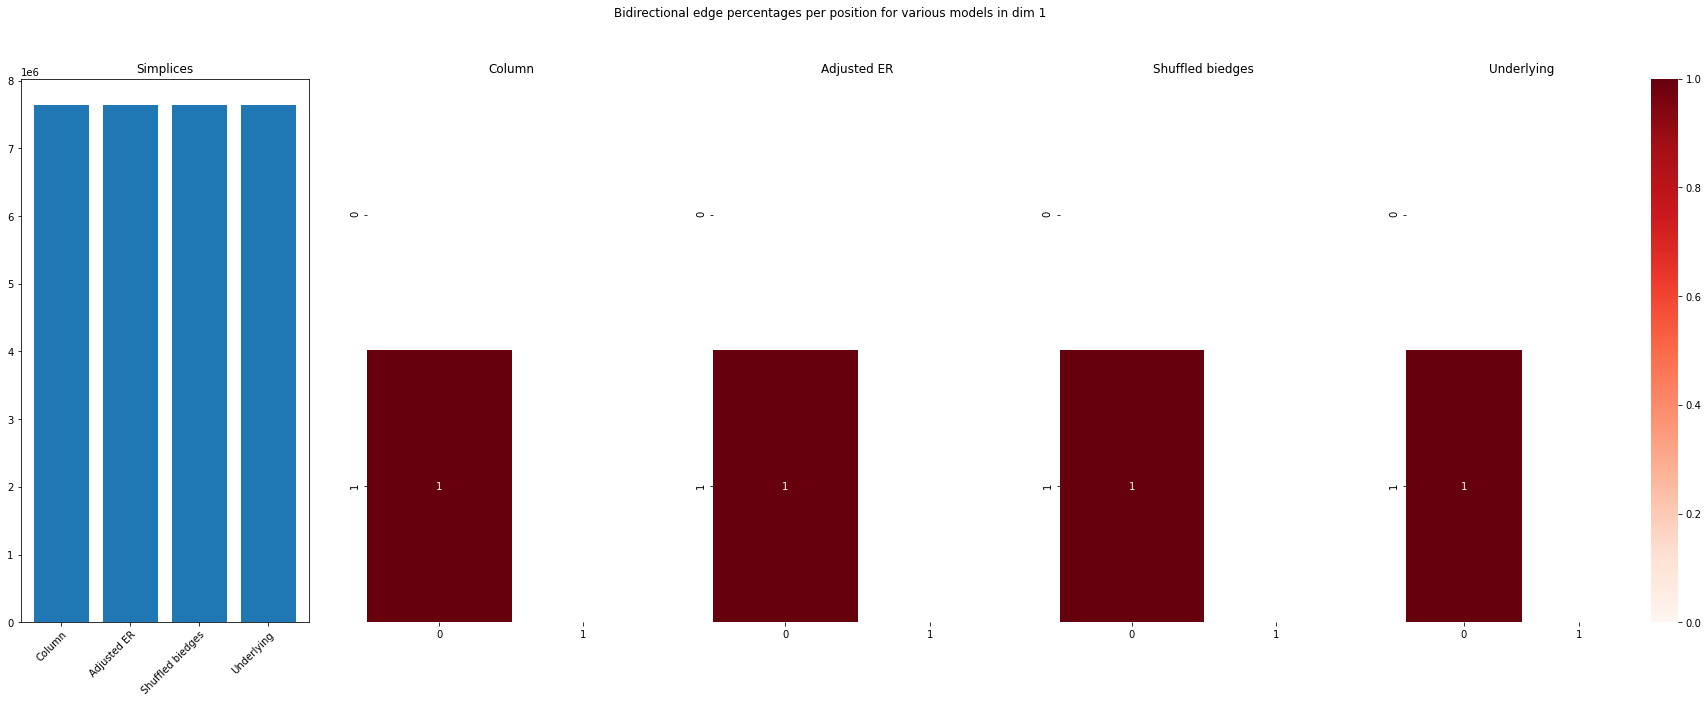

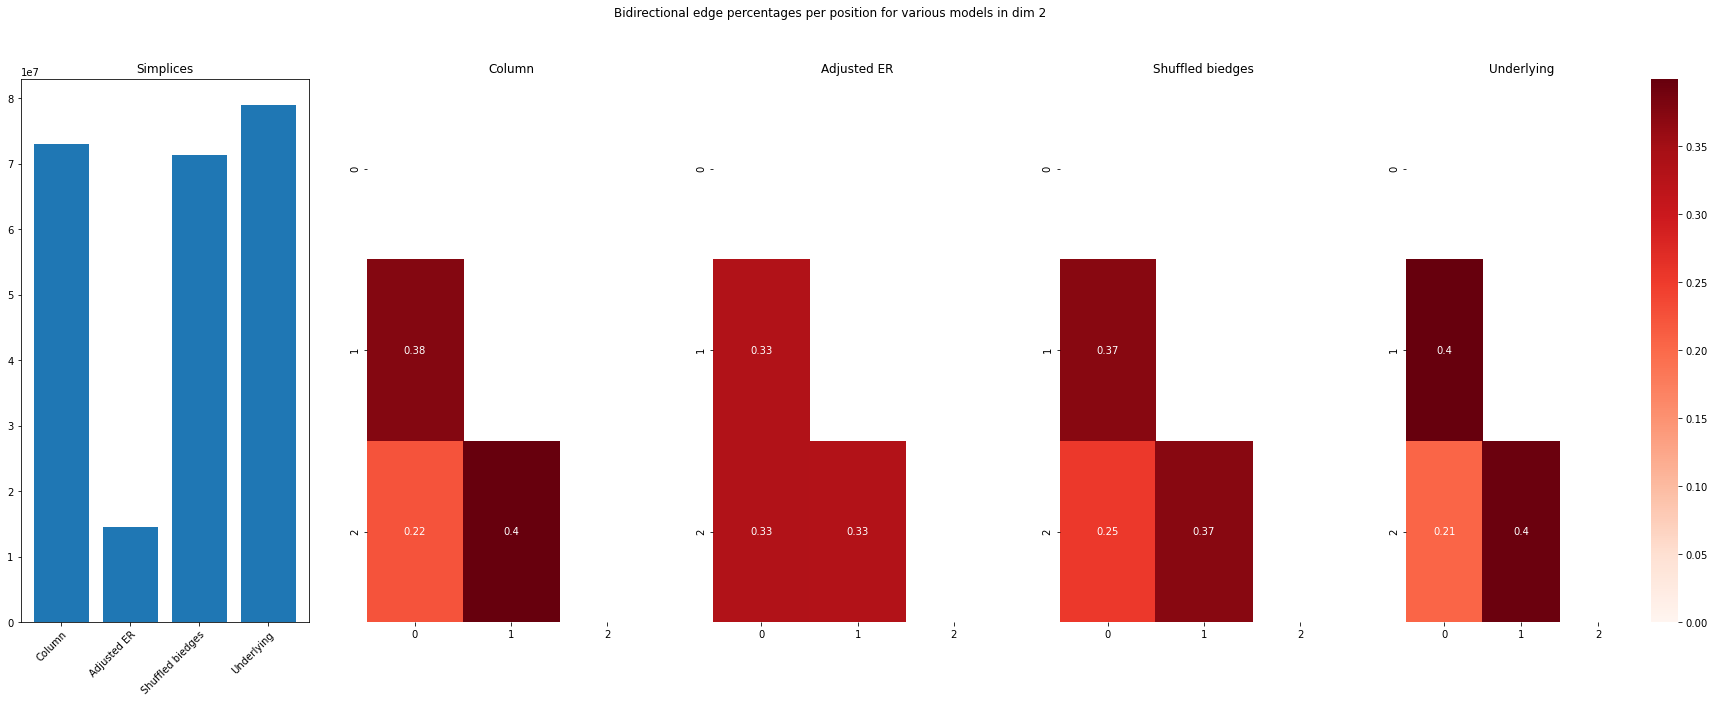

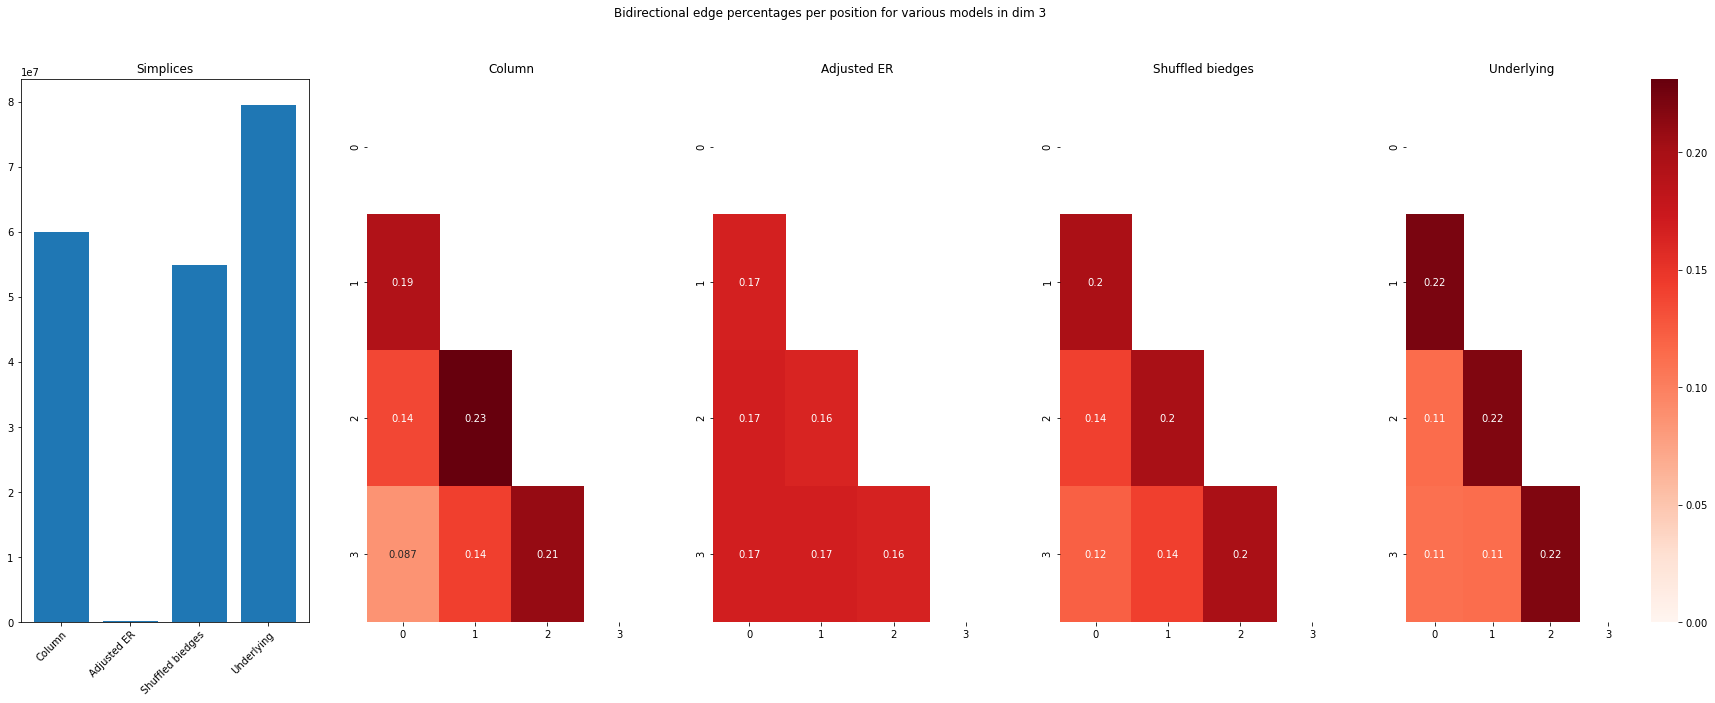

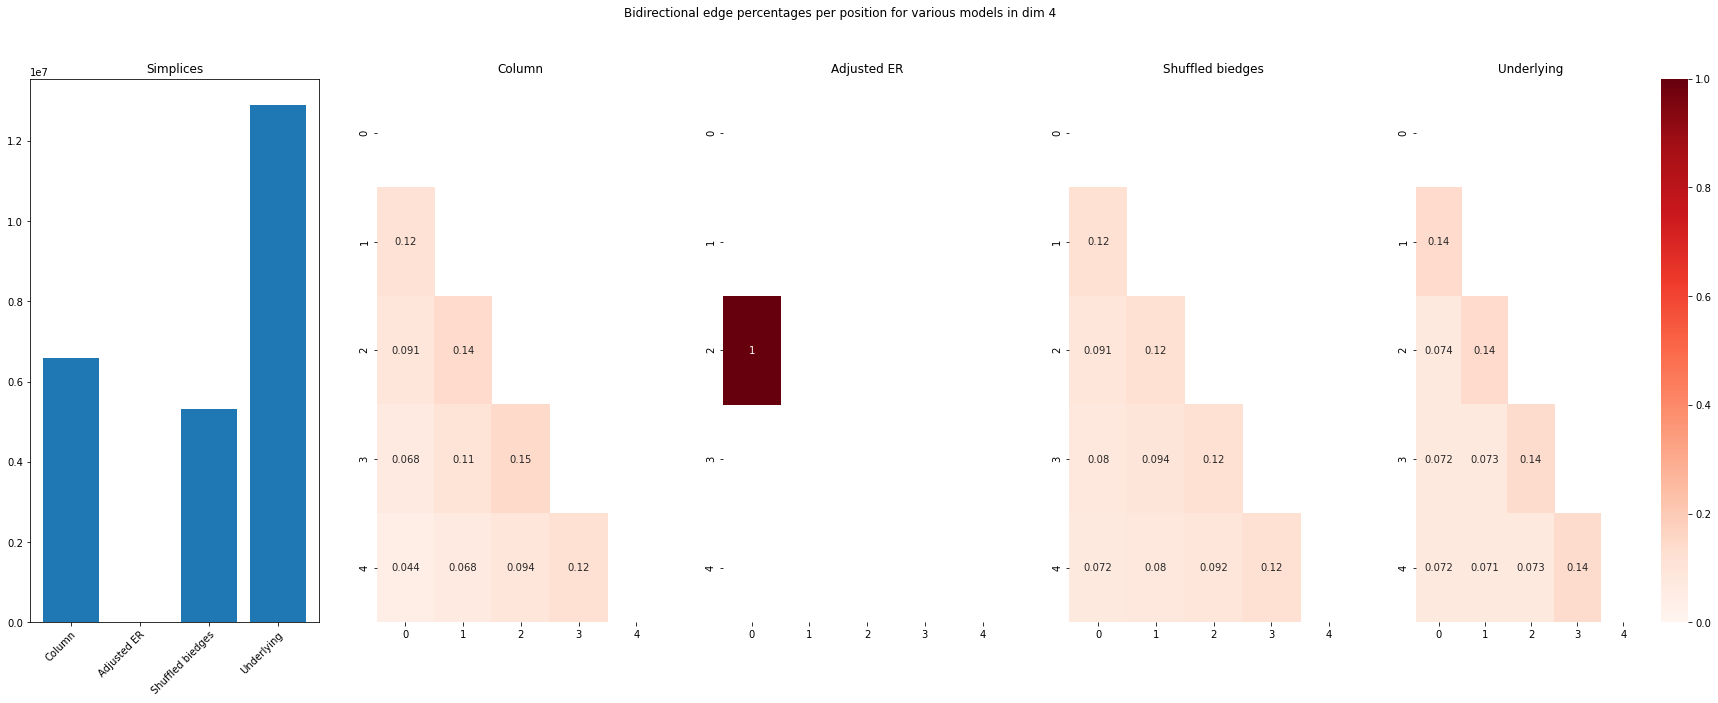

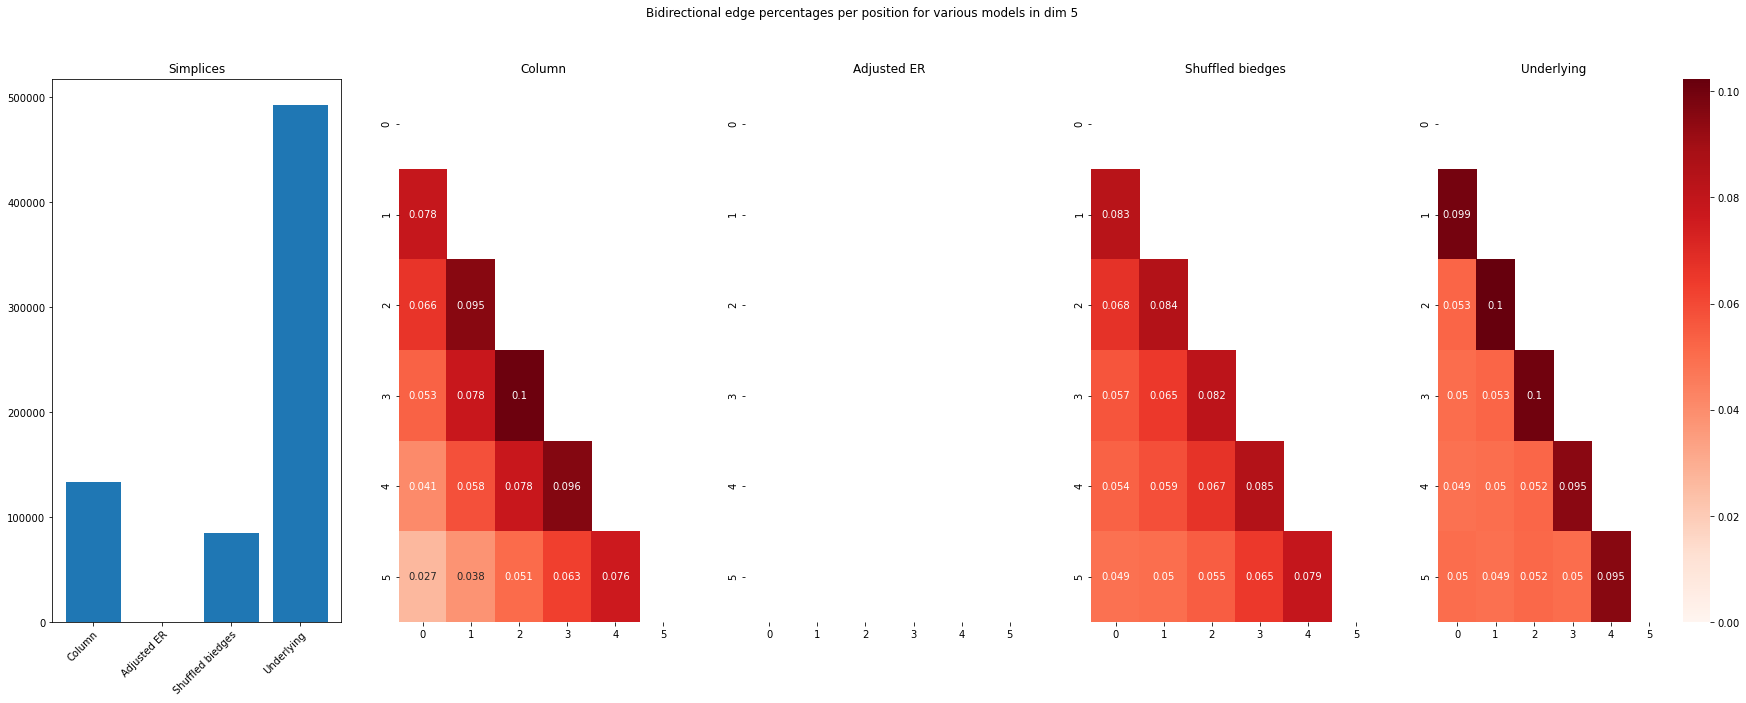

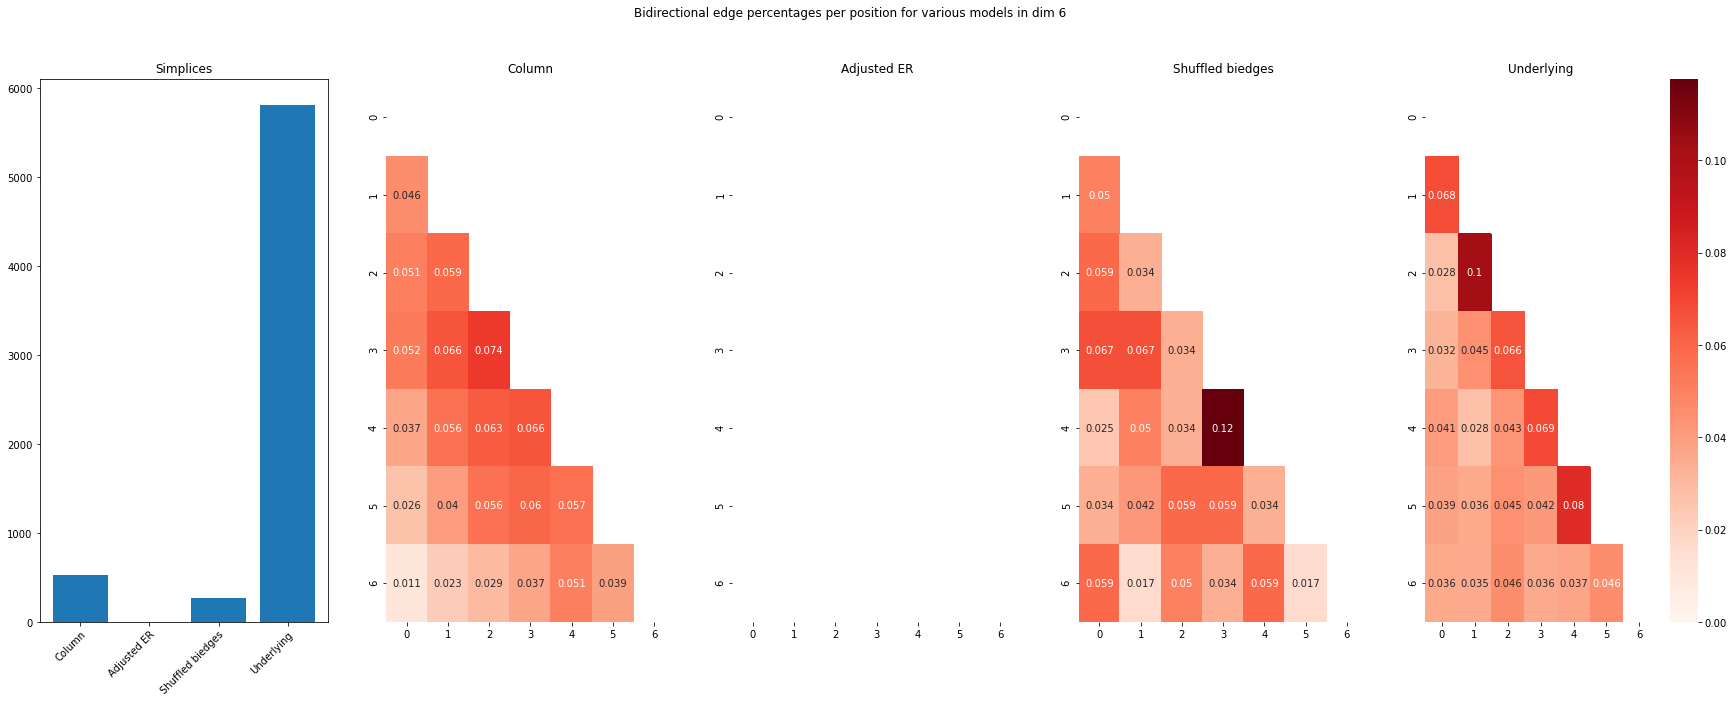

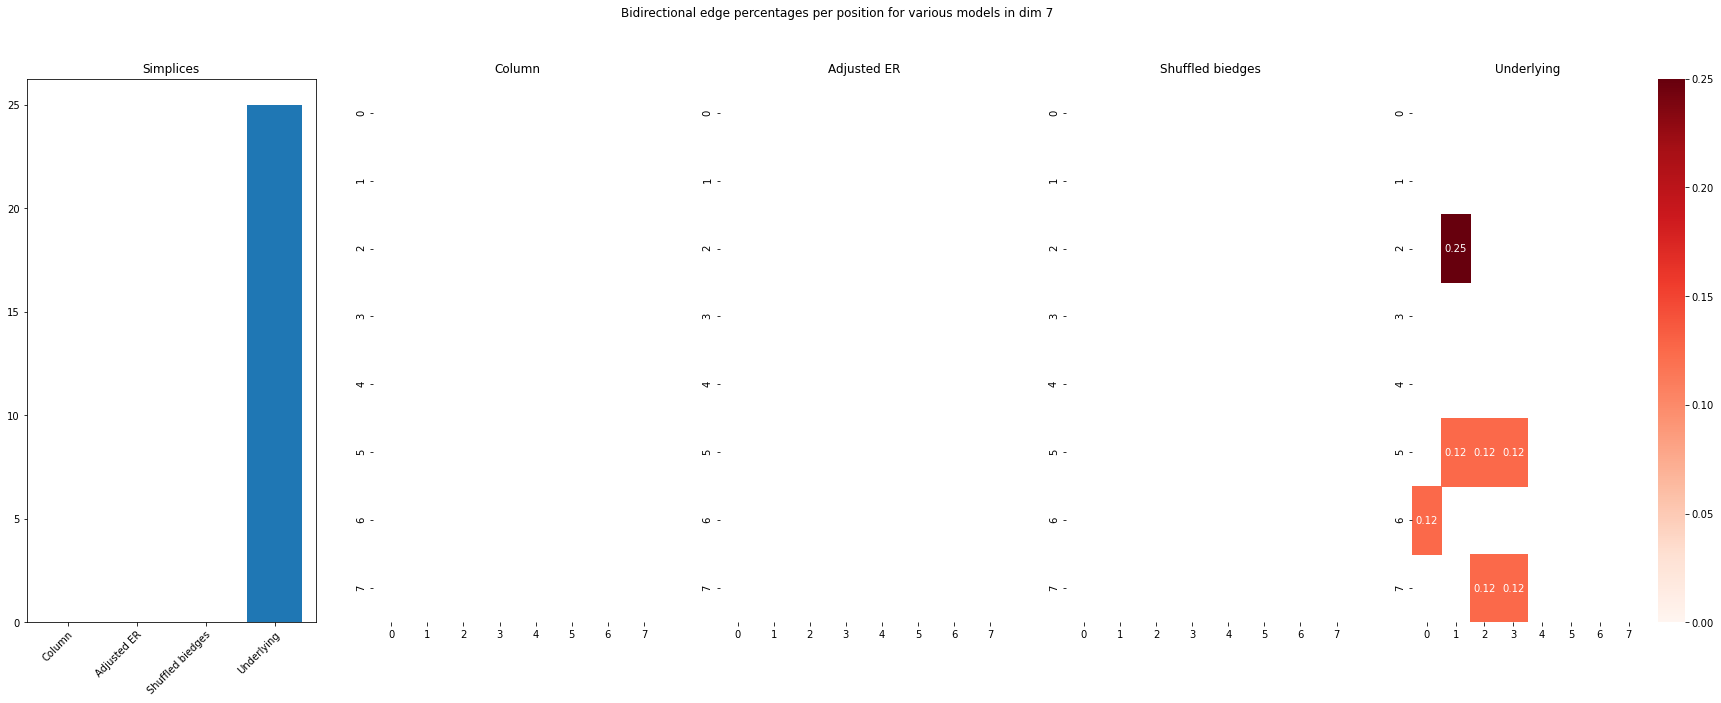

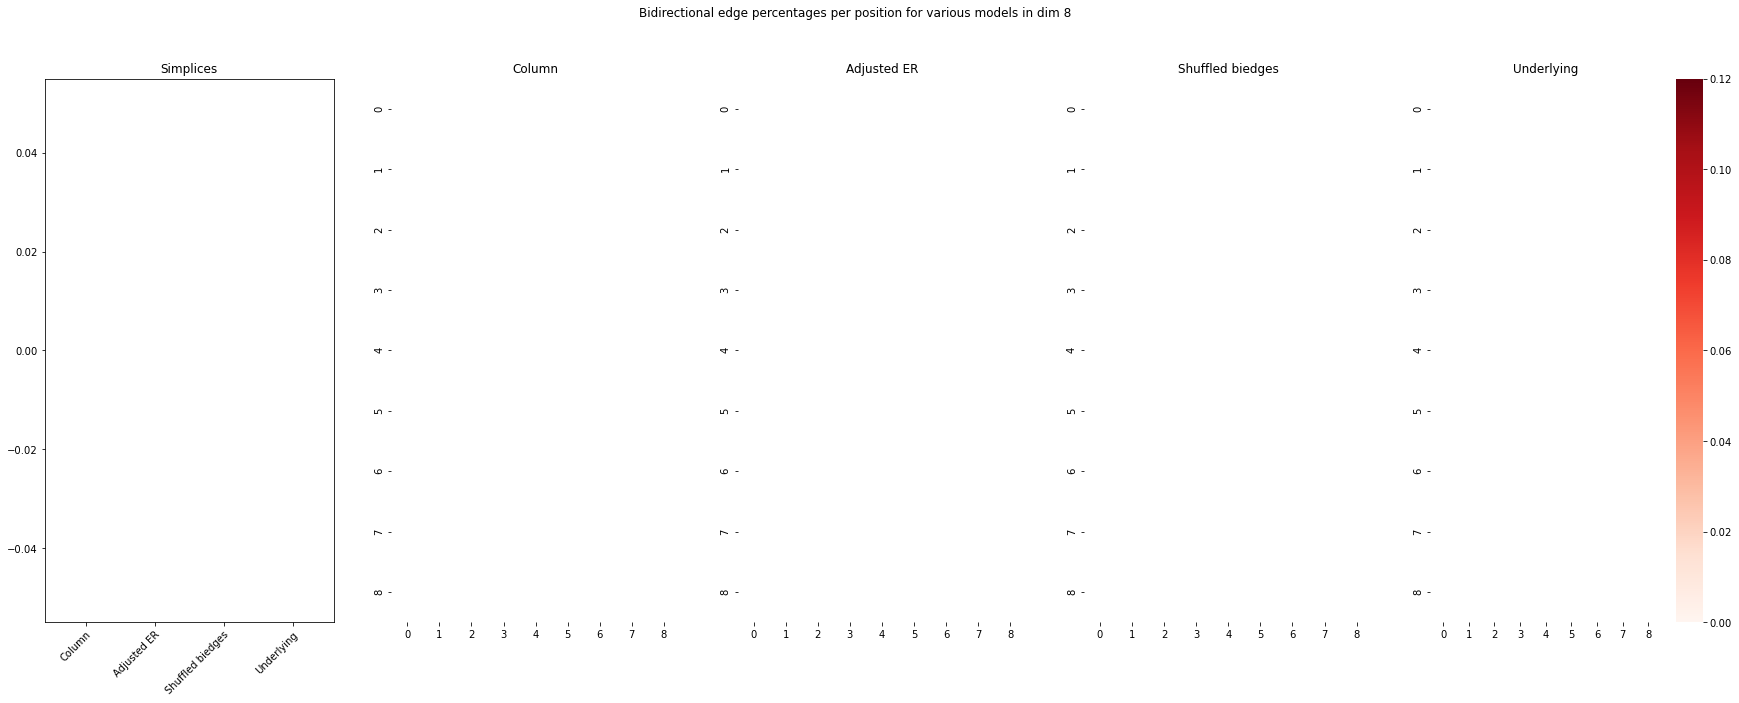

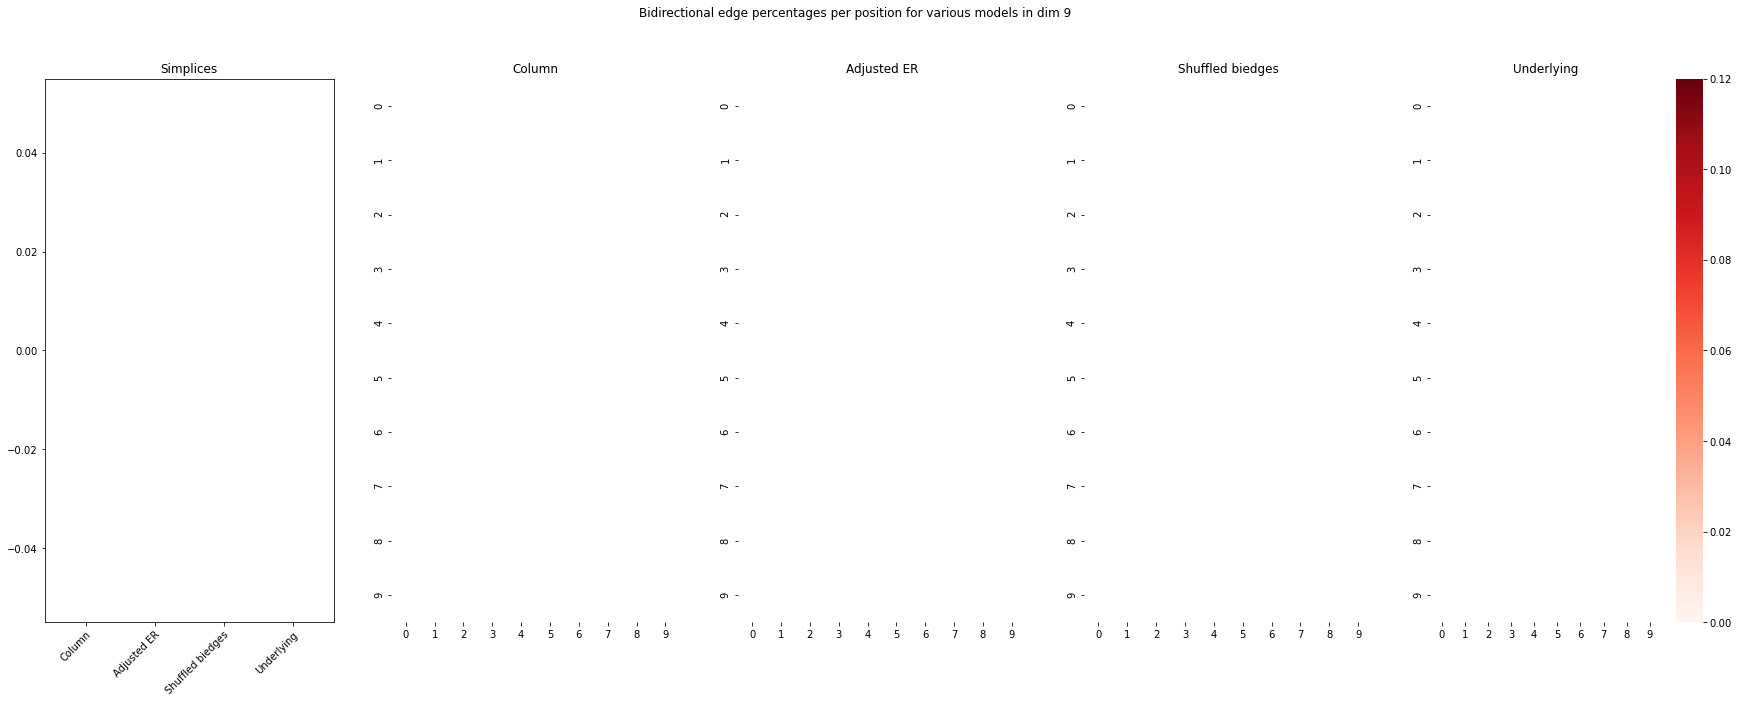

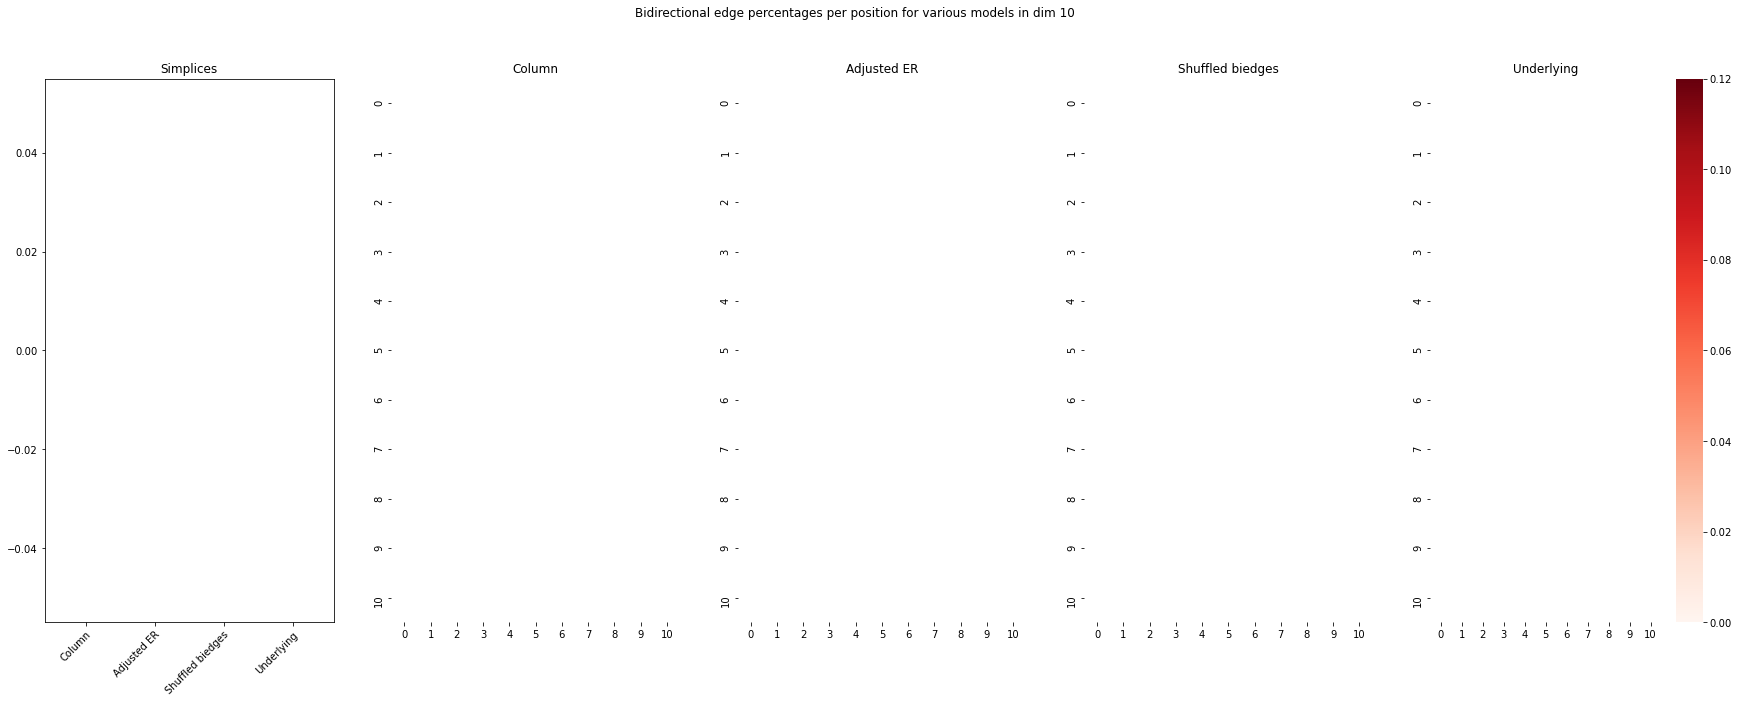

In [18]:
compare_graphs_percent([a,b0,c0,d0], 1, "bcounts_percent")

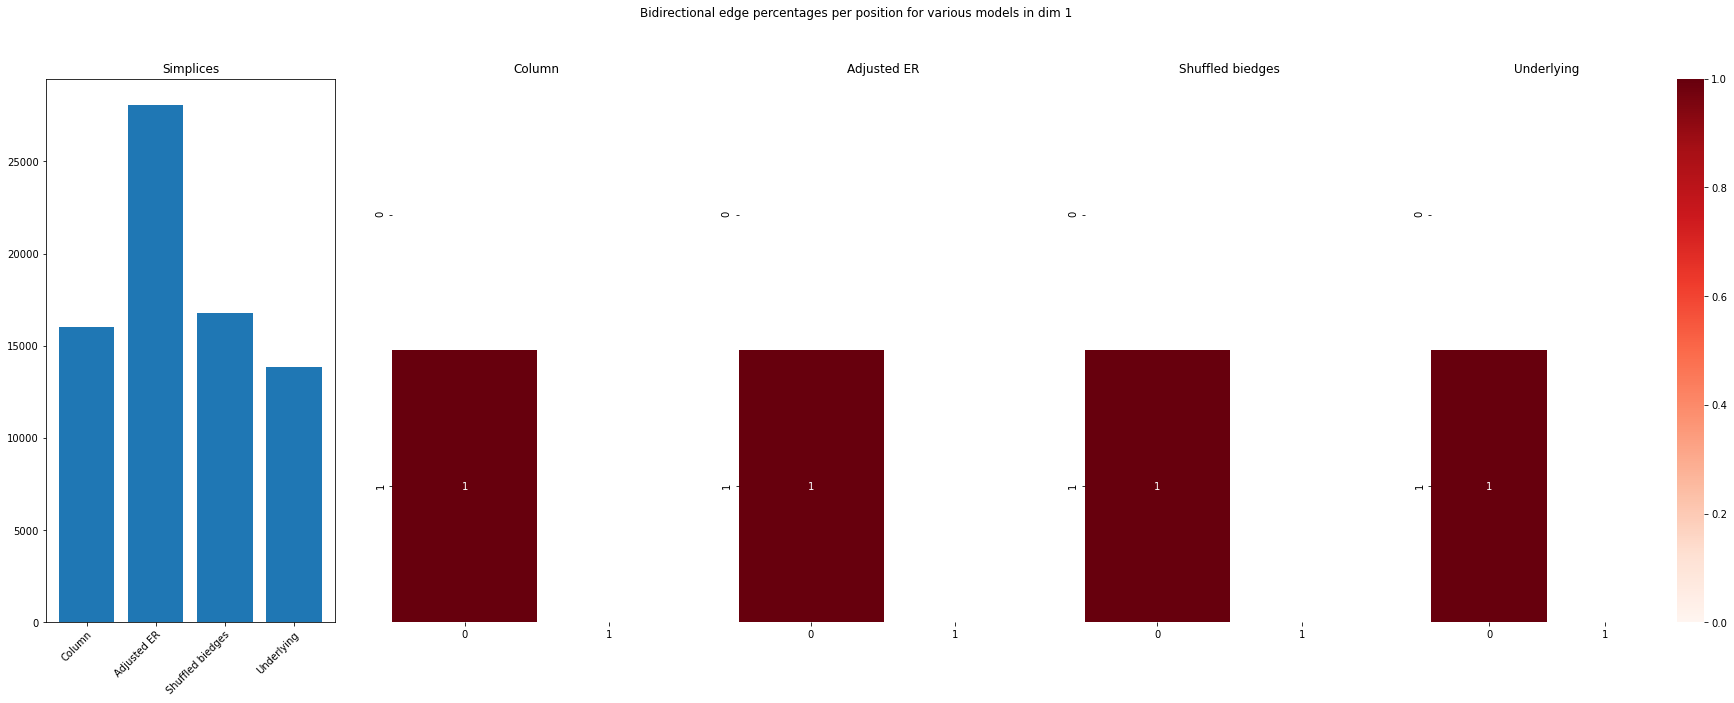

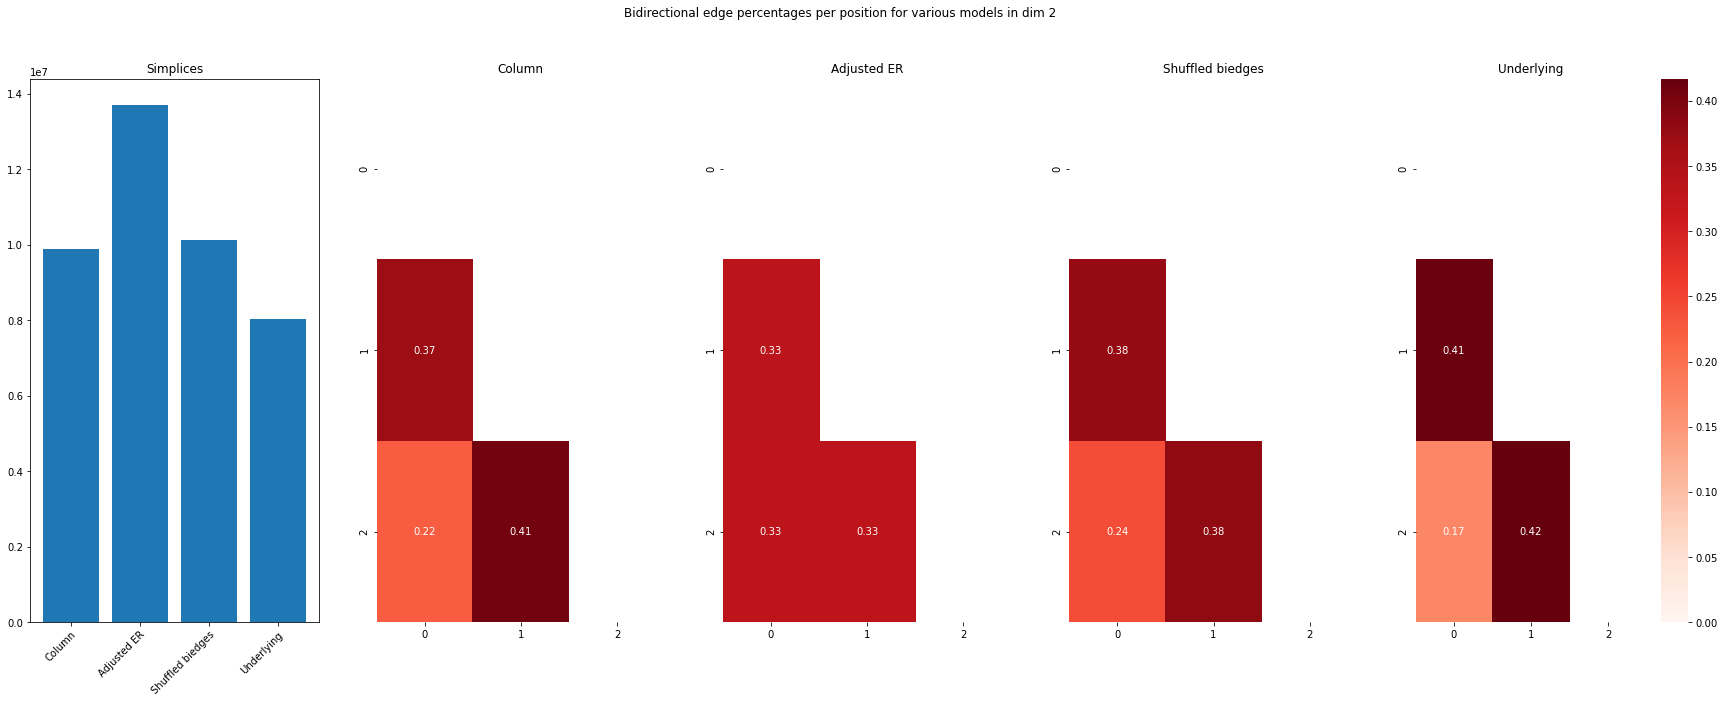

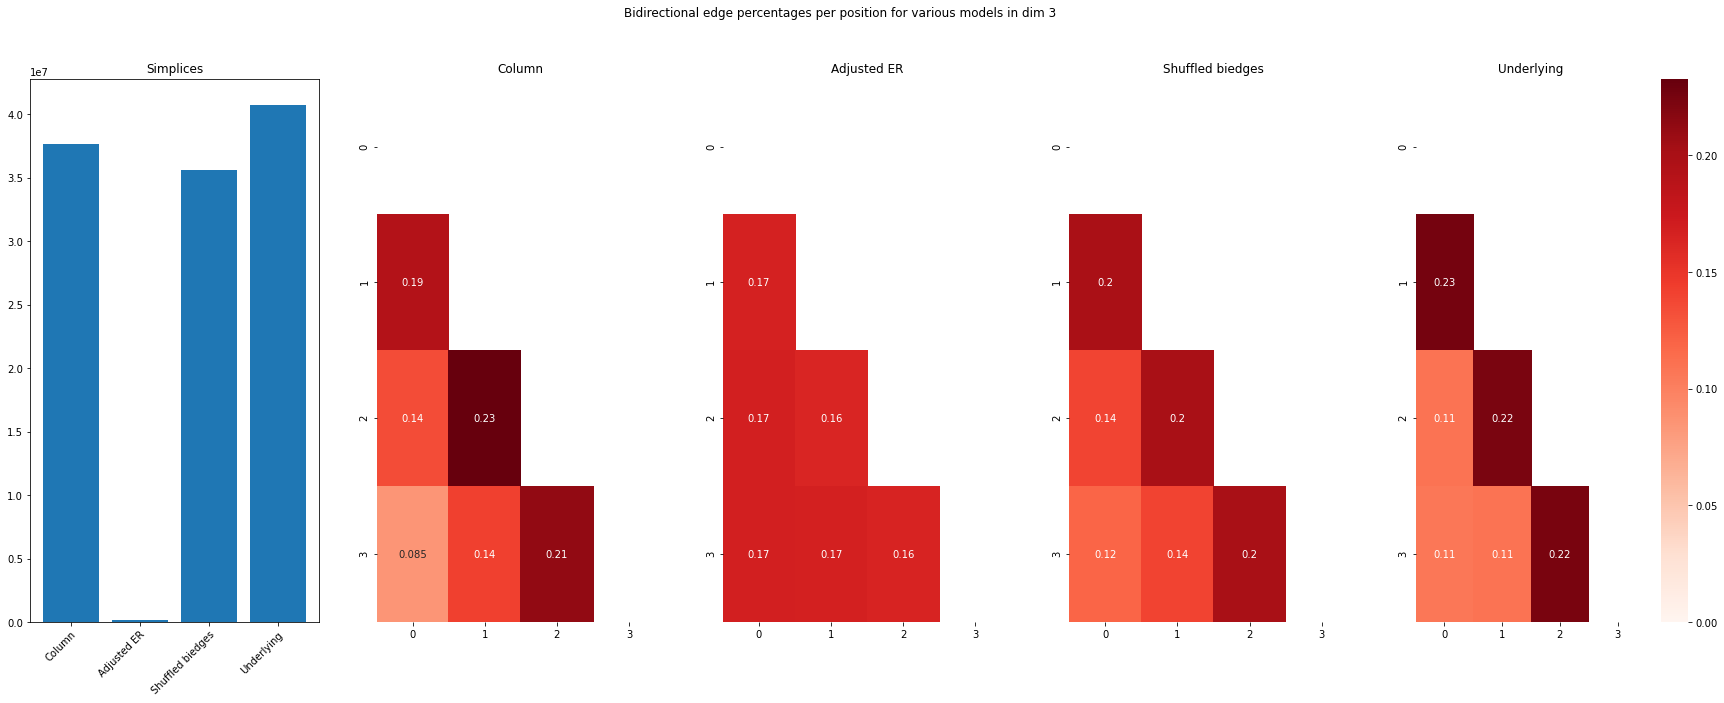

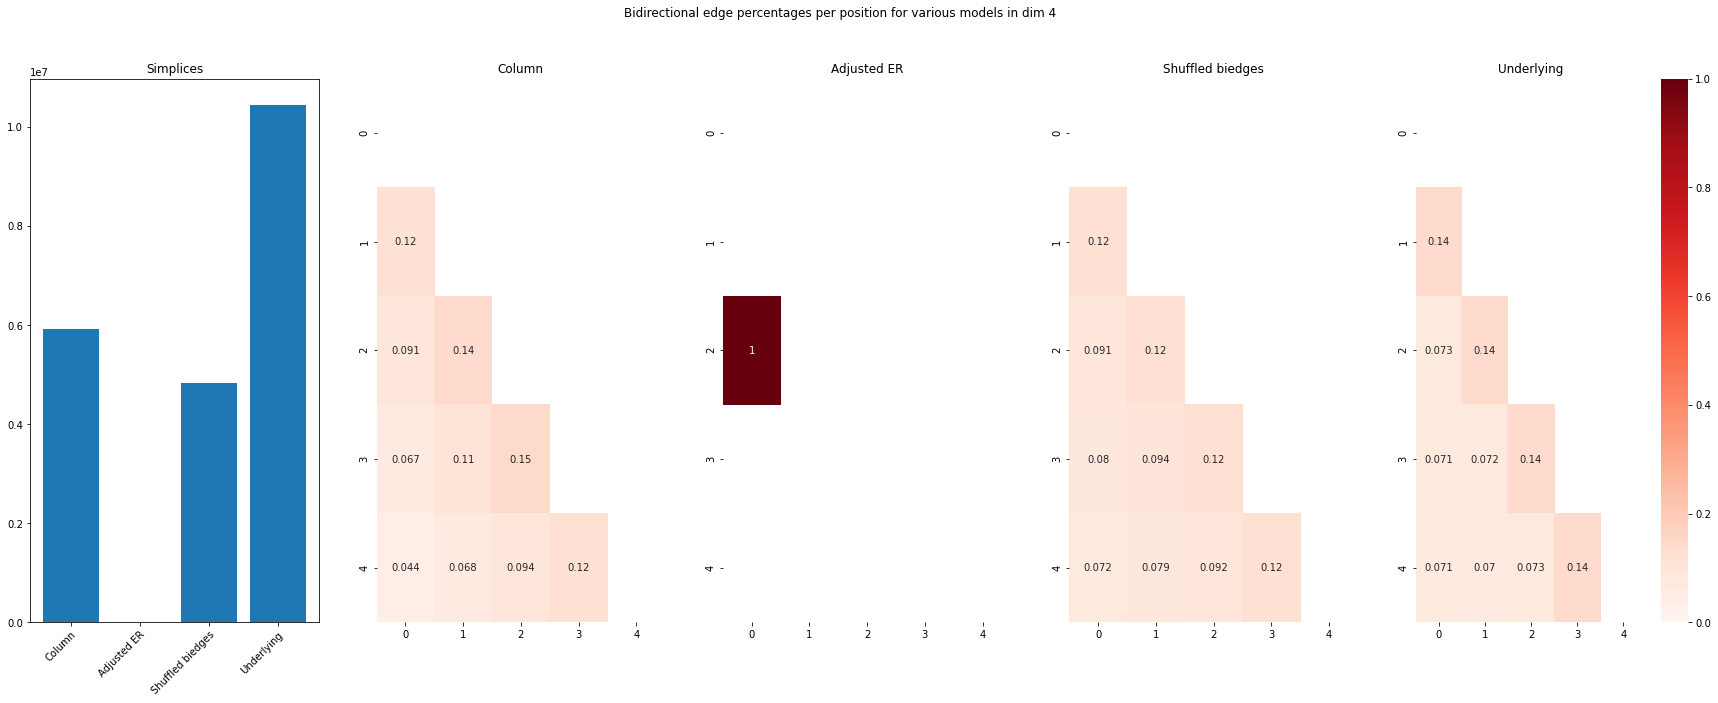

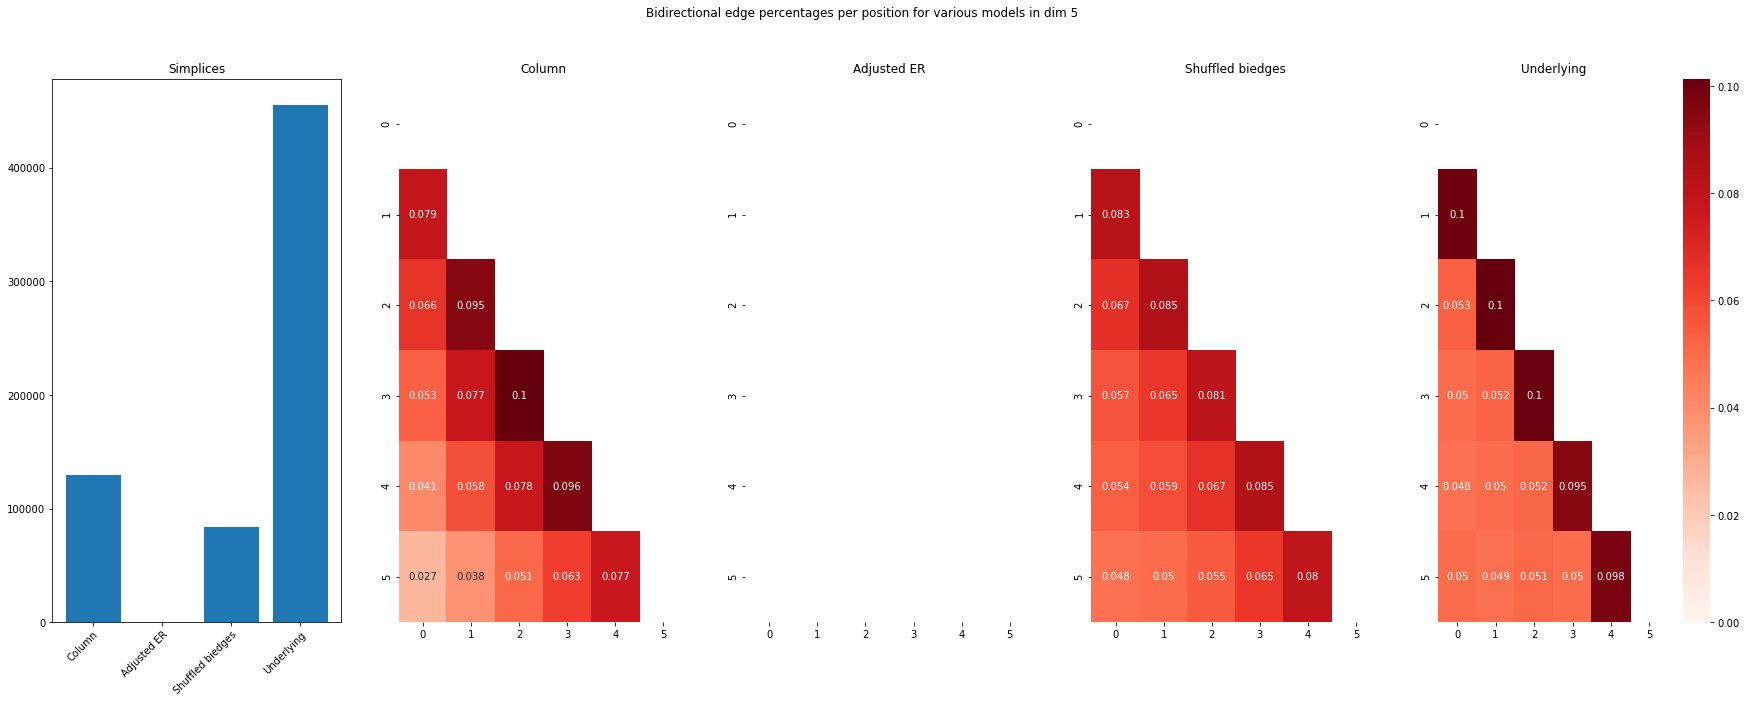

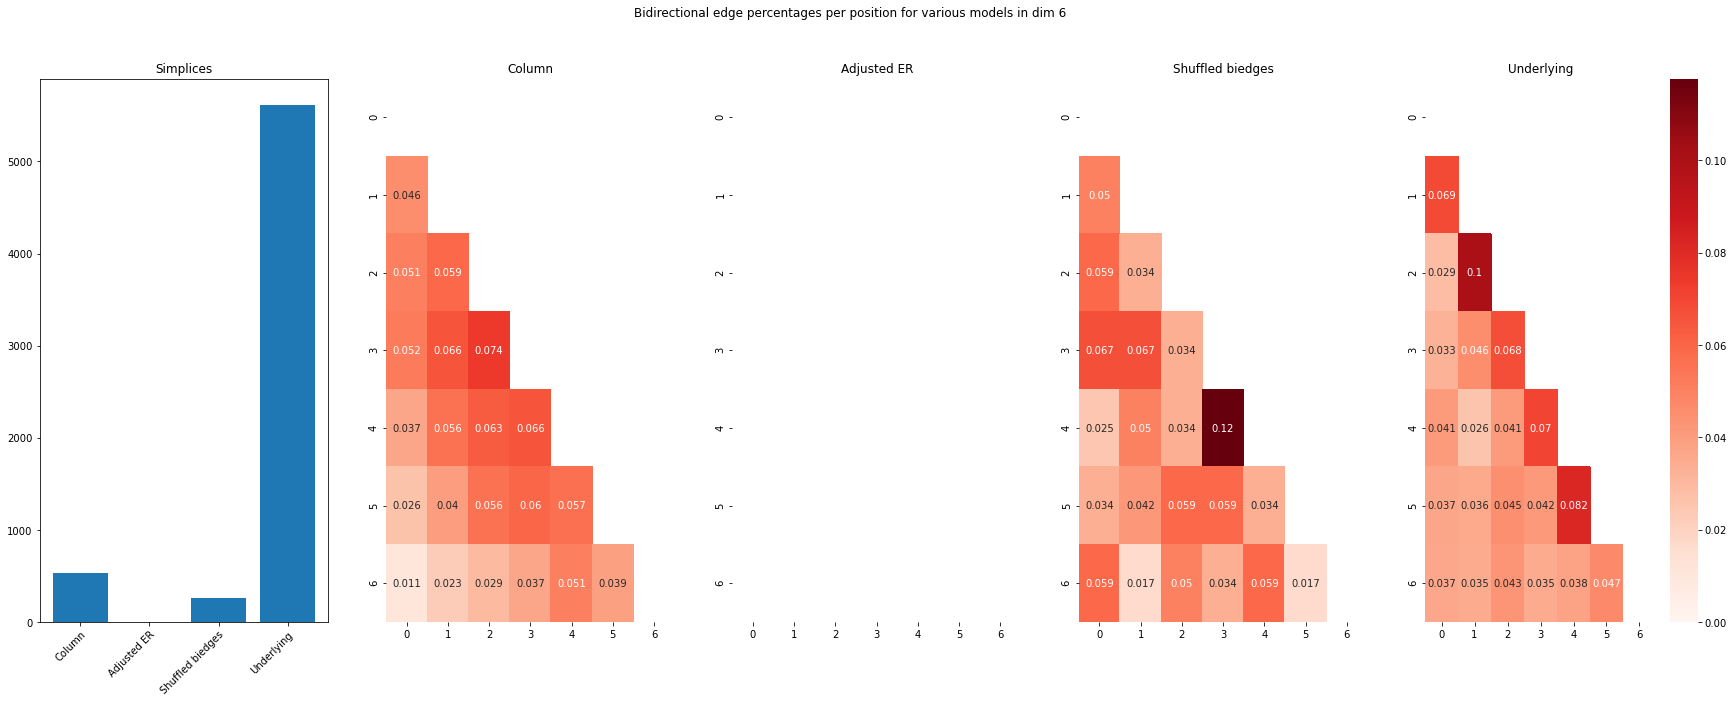

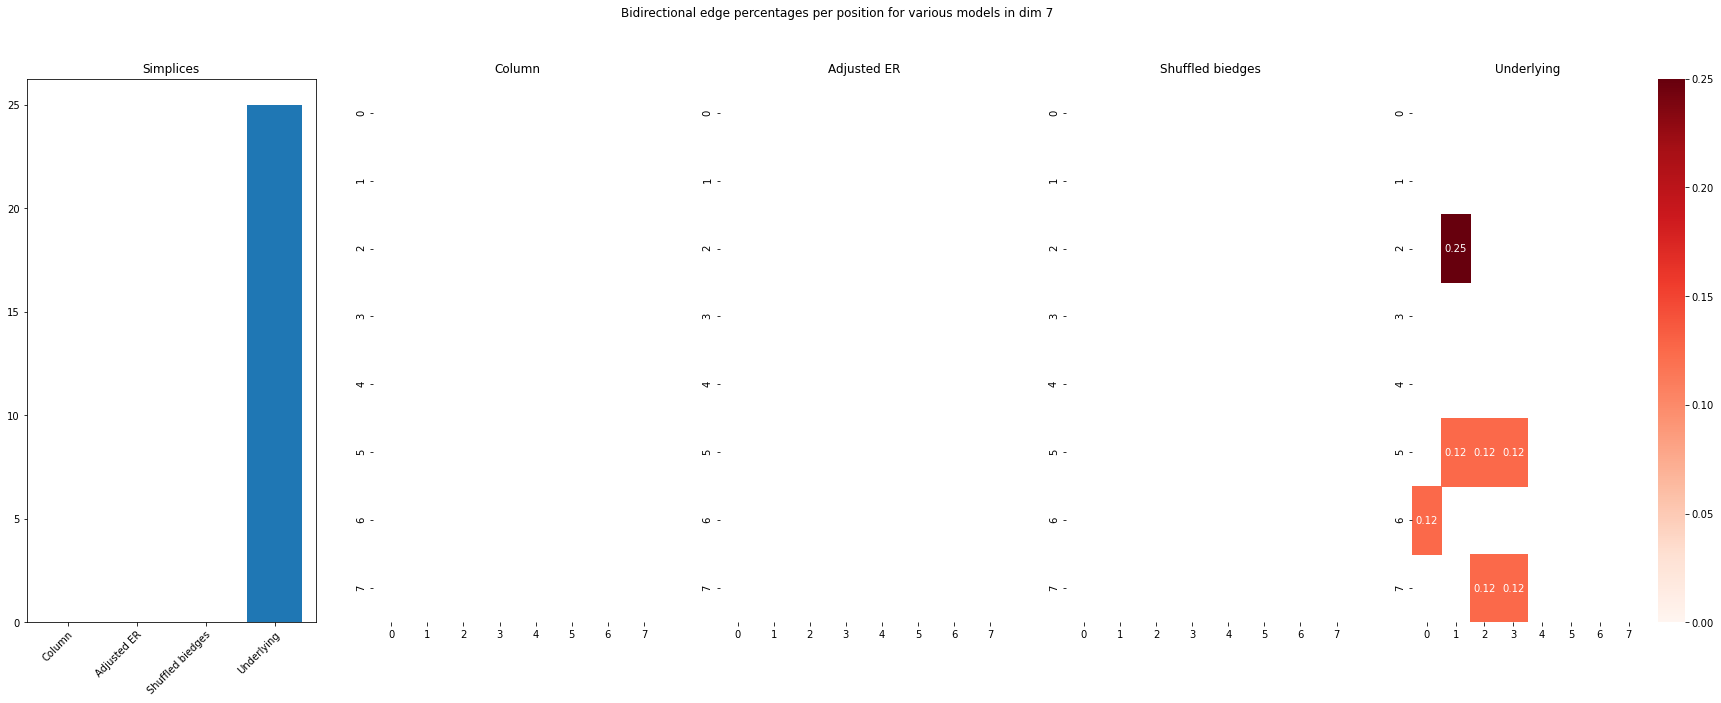

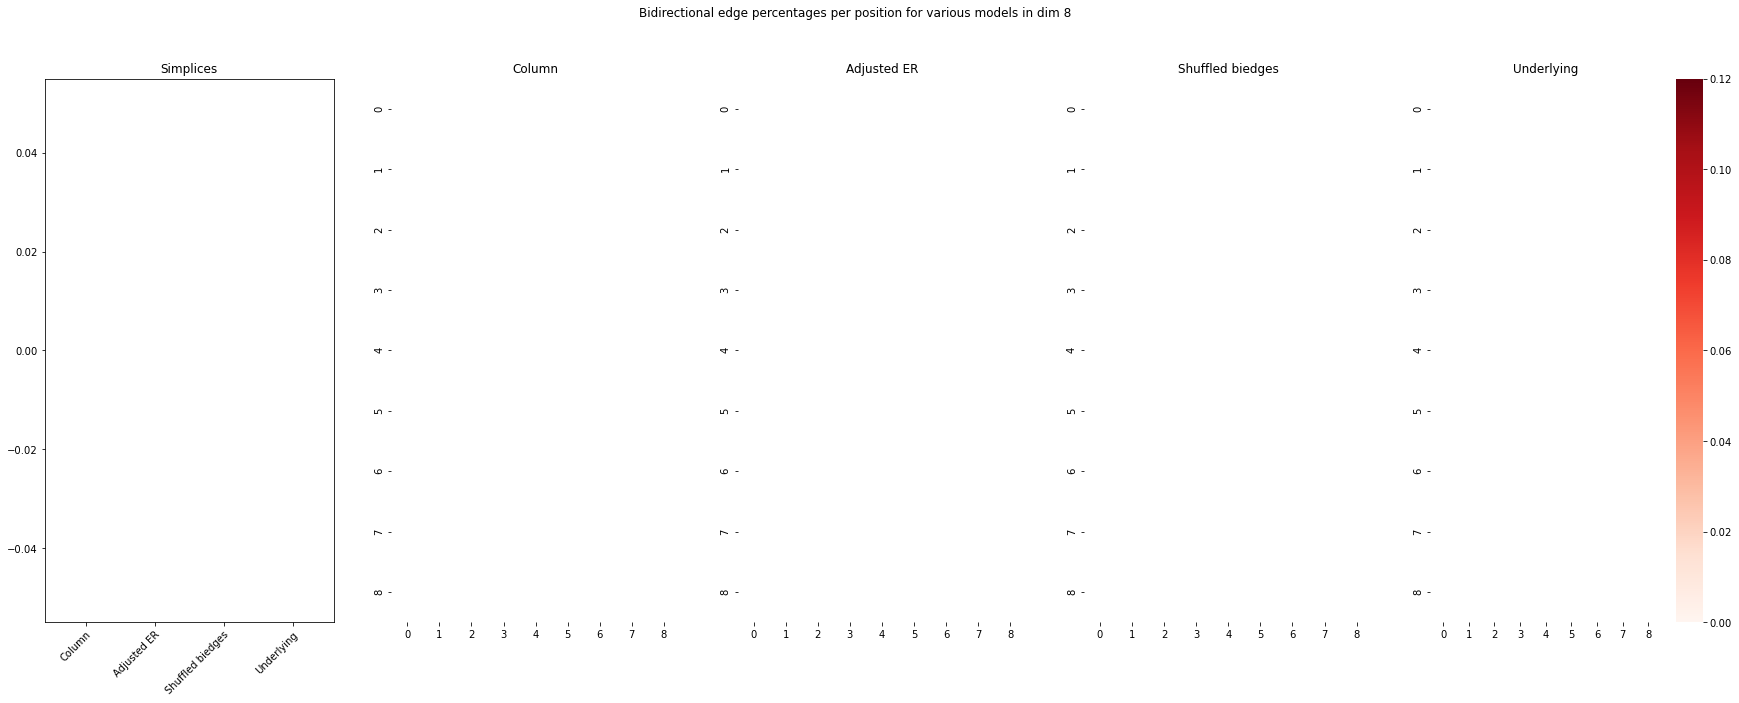

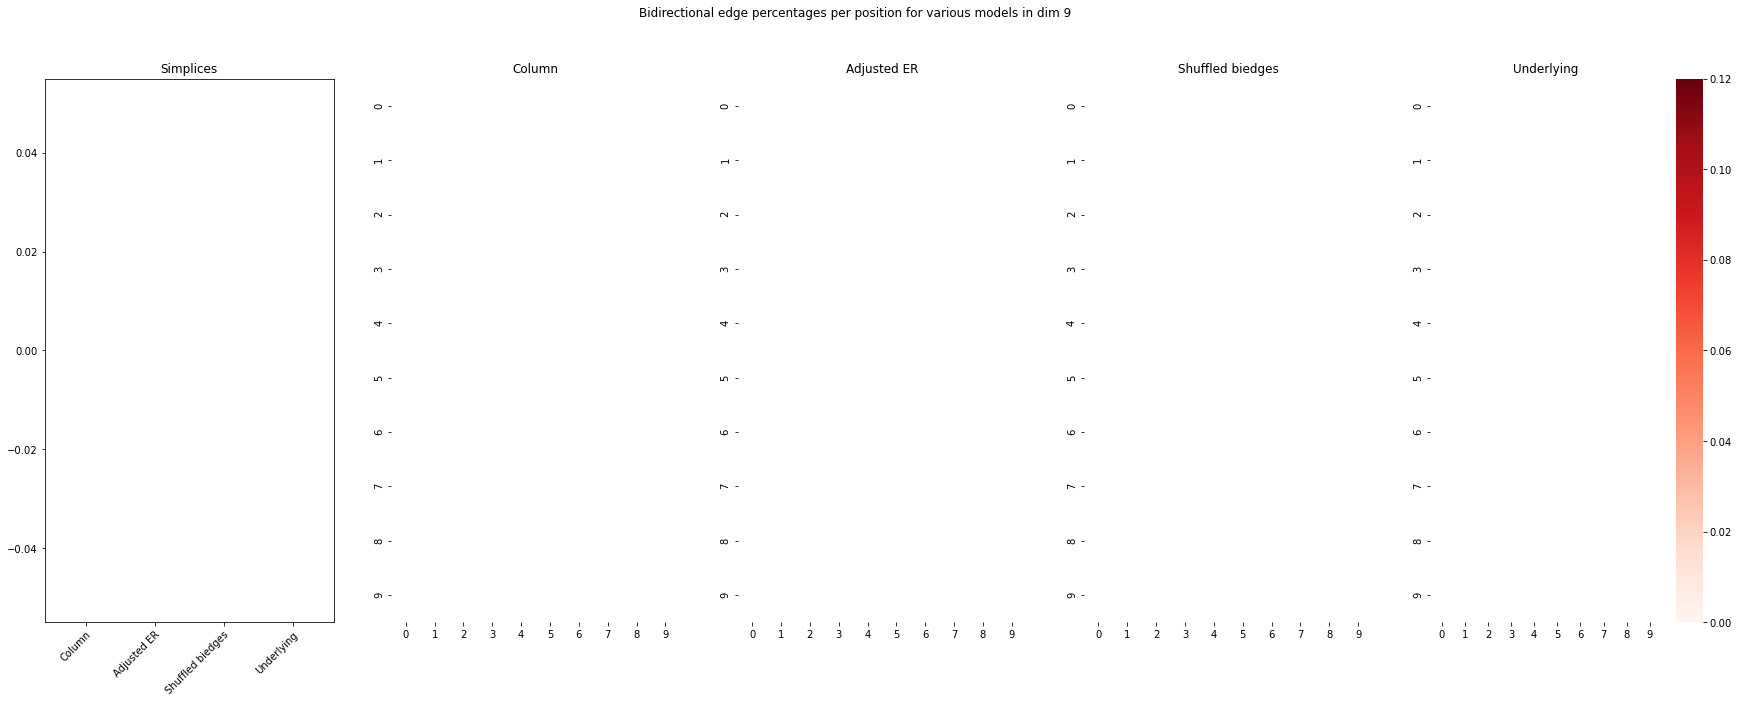

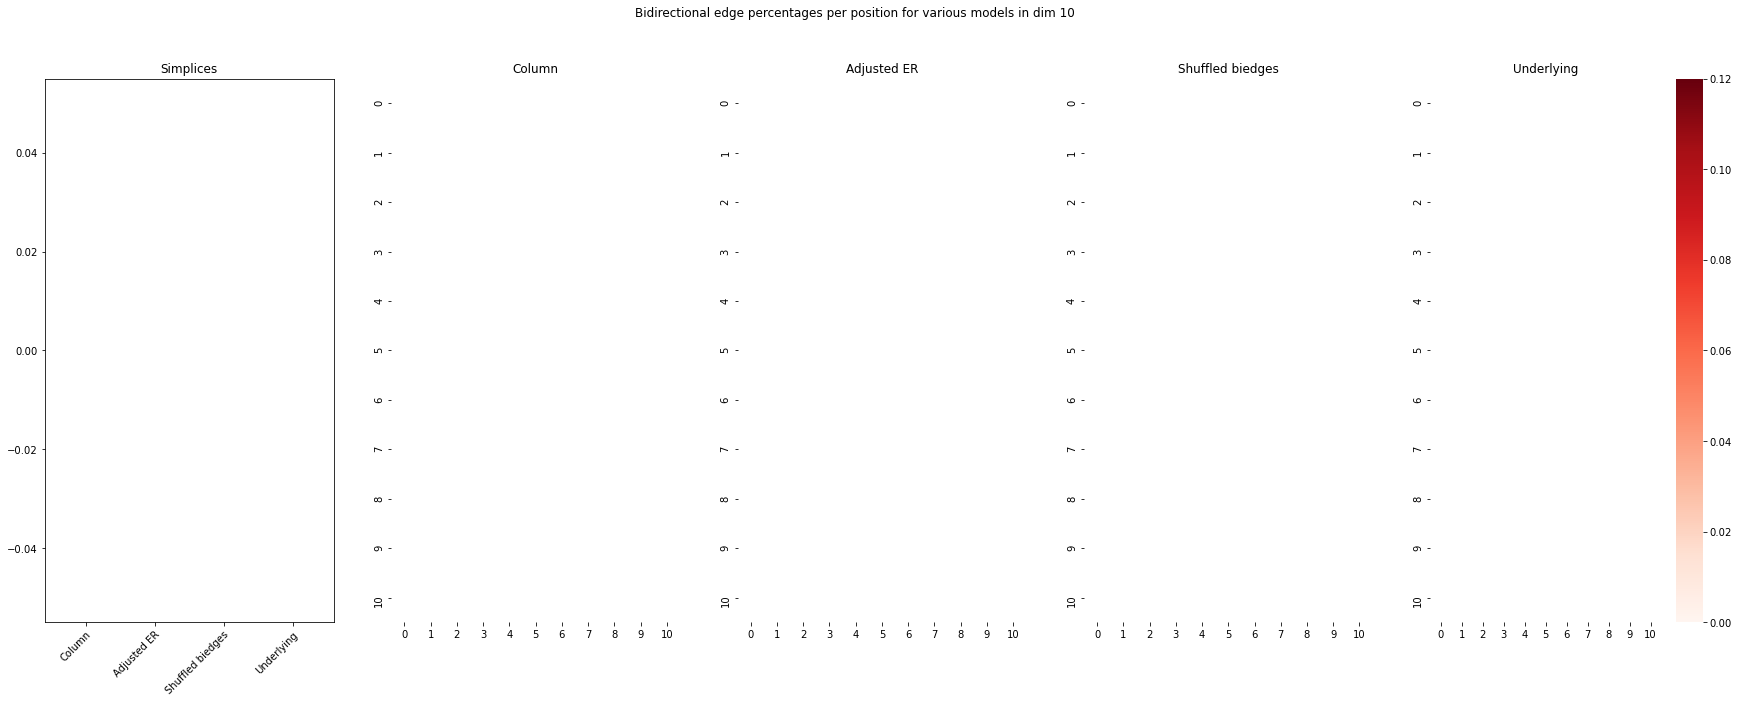

In [19]:
compare_graphs_percent([amax,bmax,cmax,dmax], 1, "mbcounts_percent")

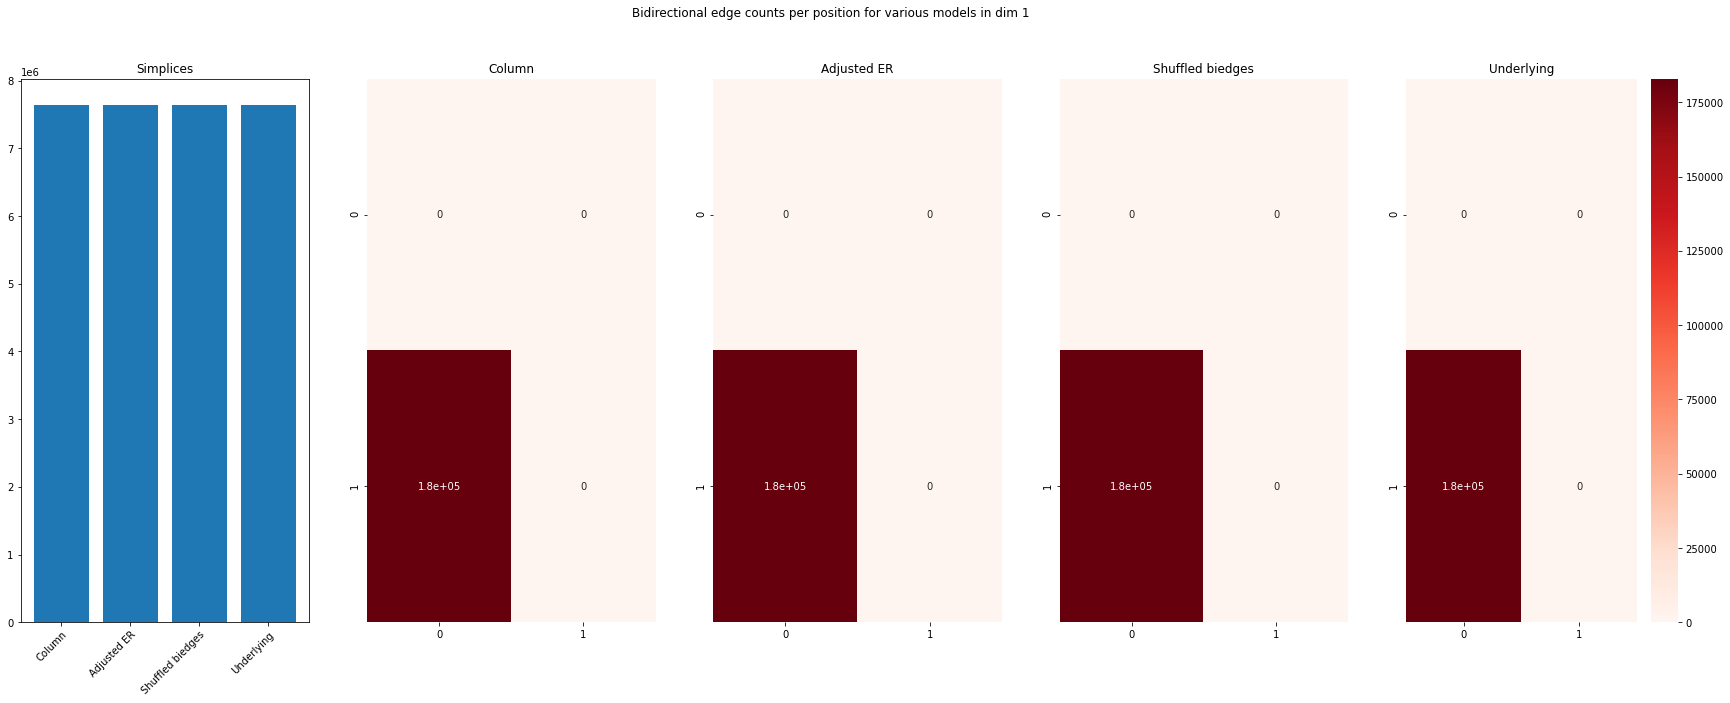

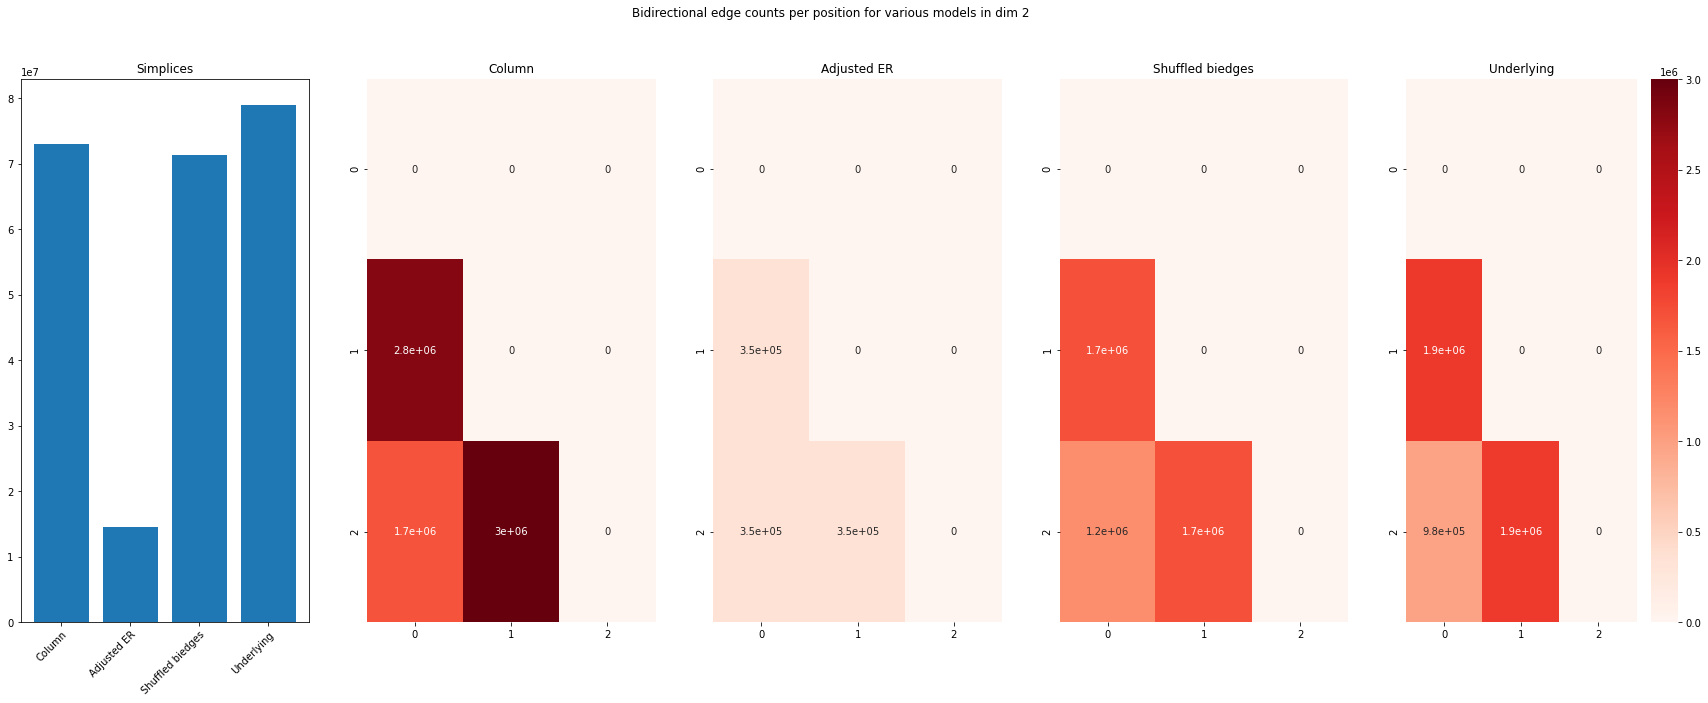

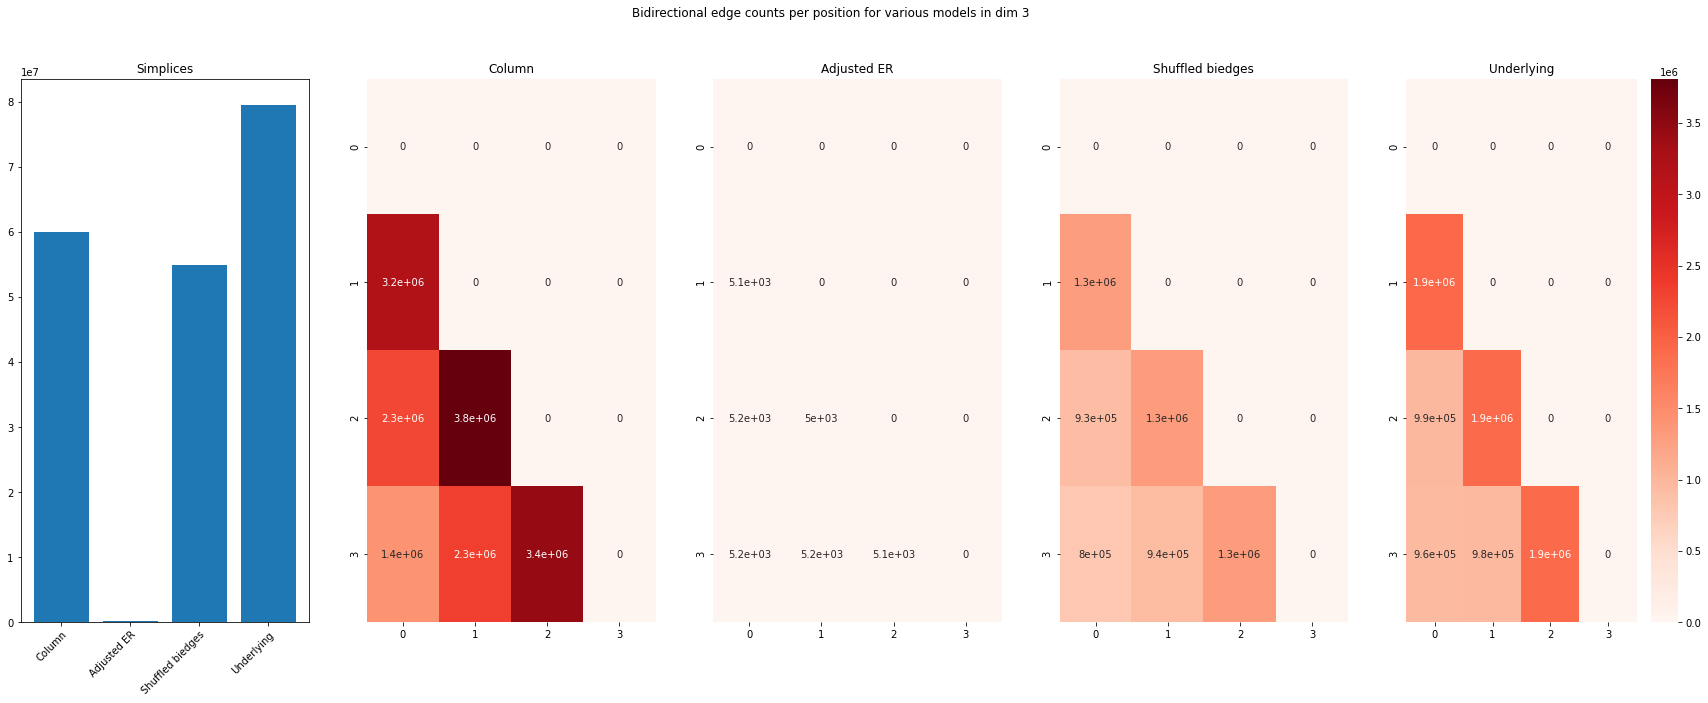

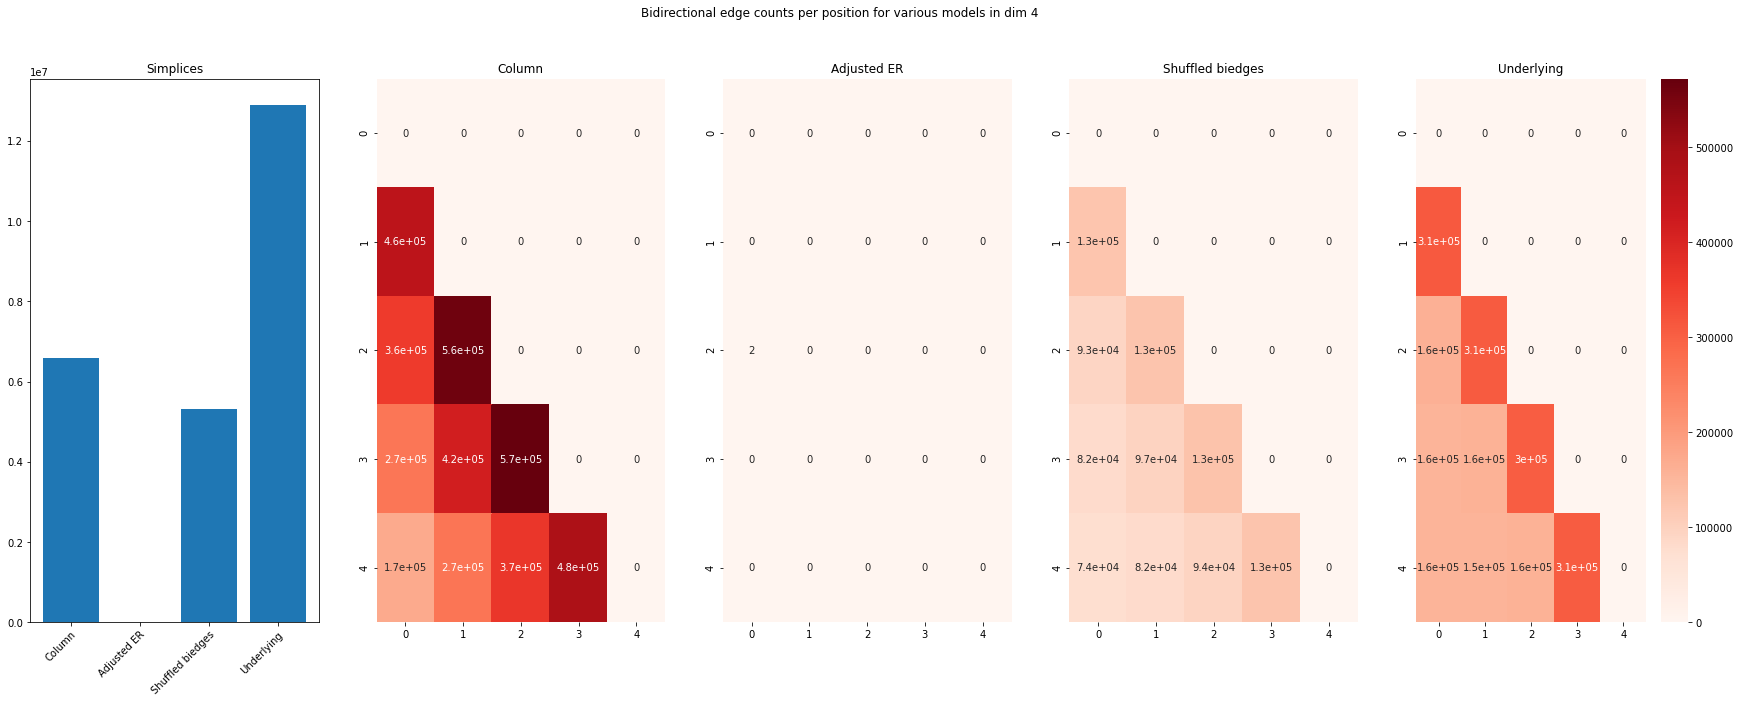

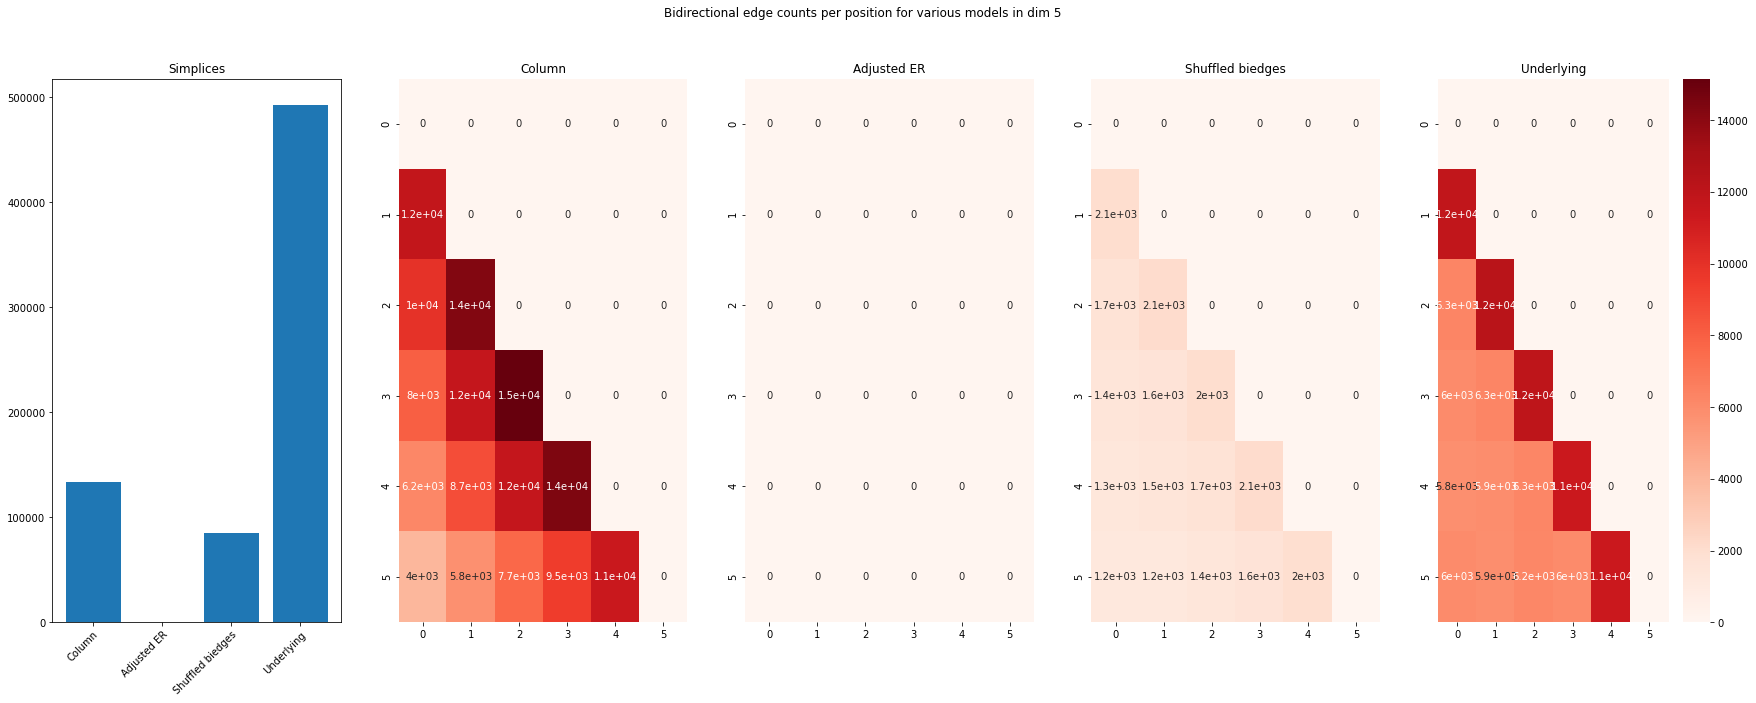

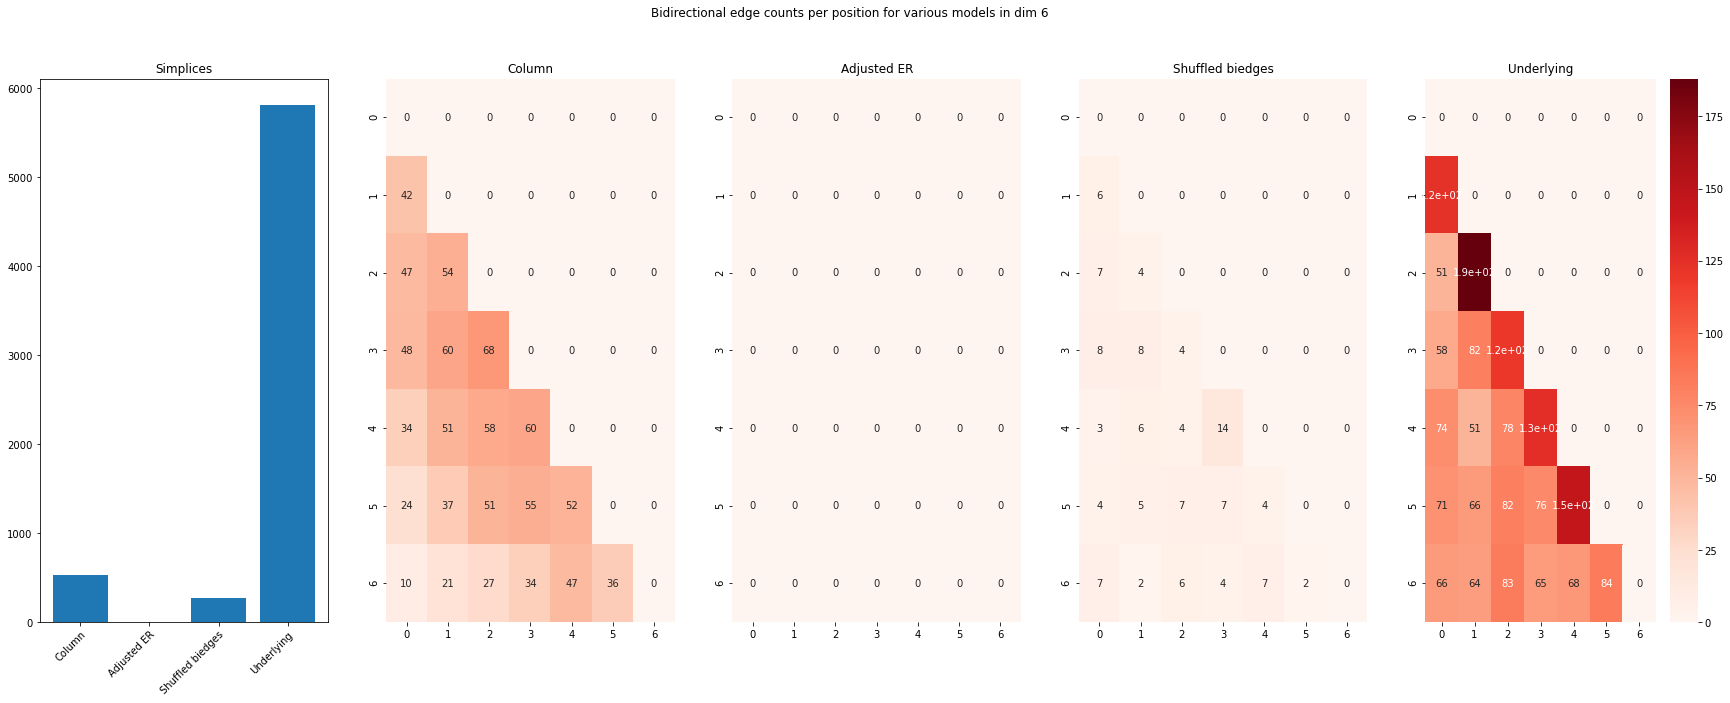

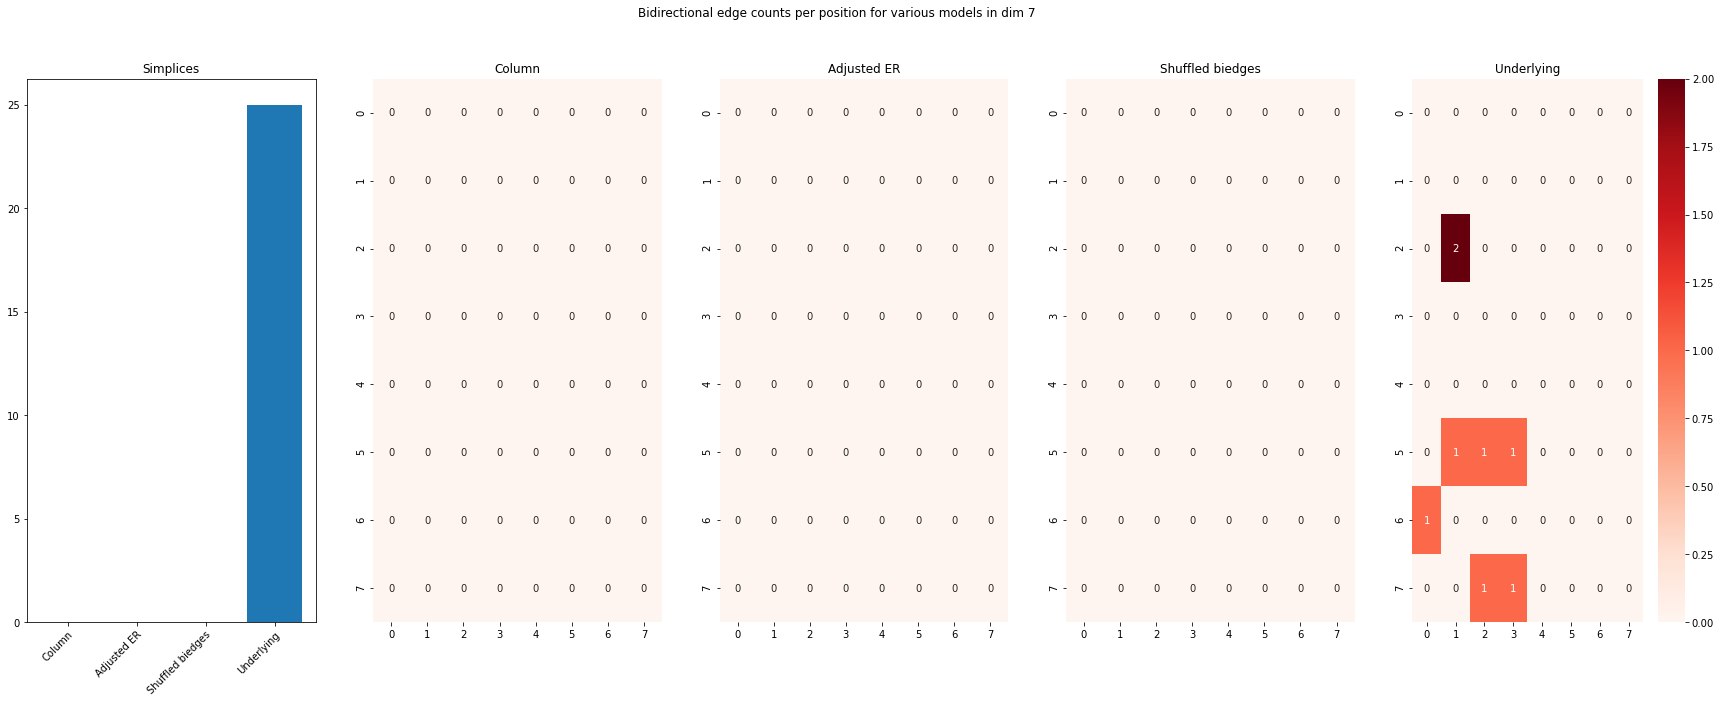

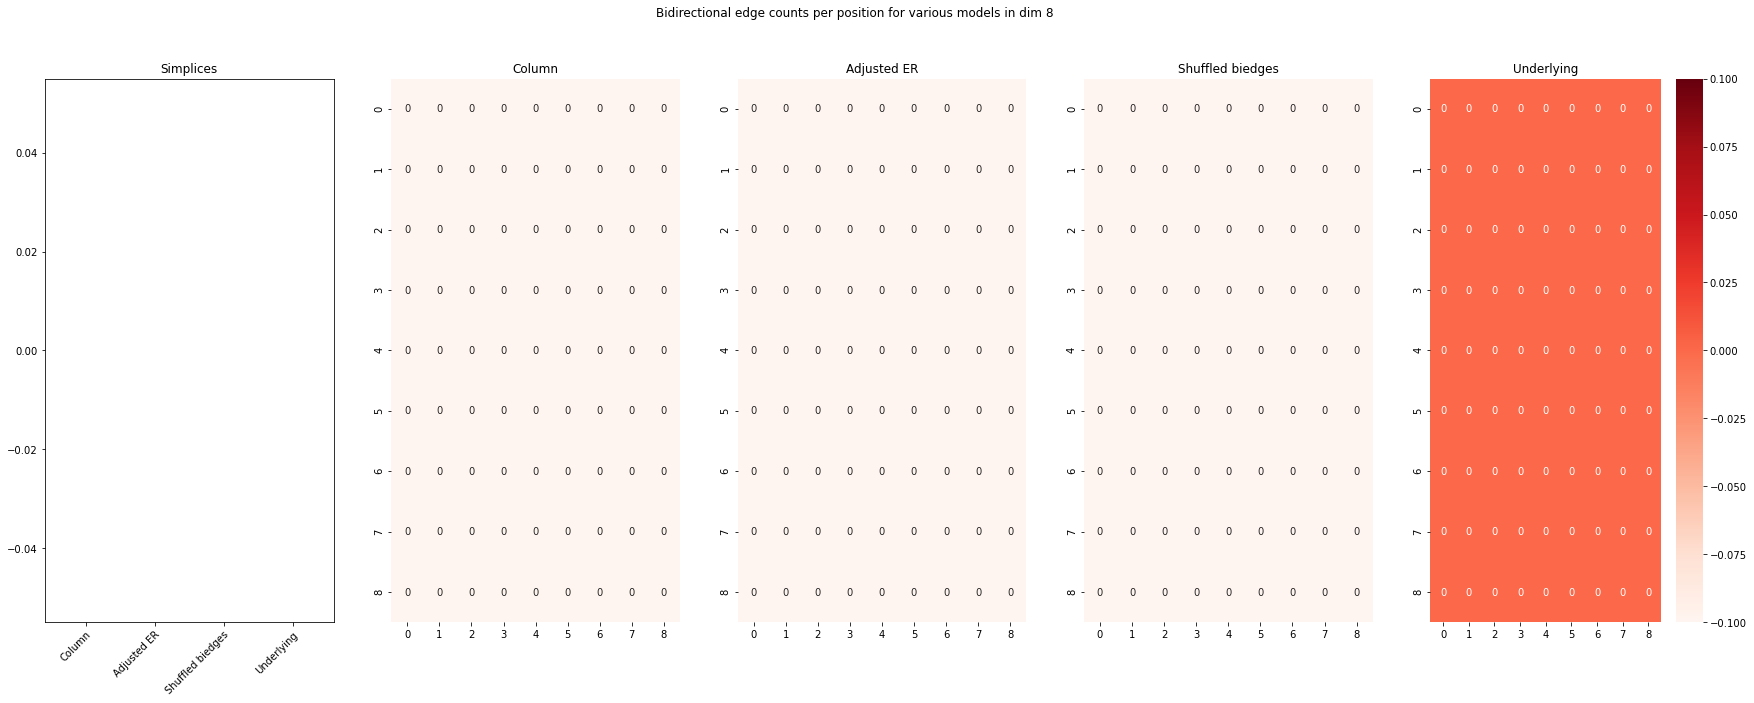

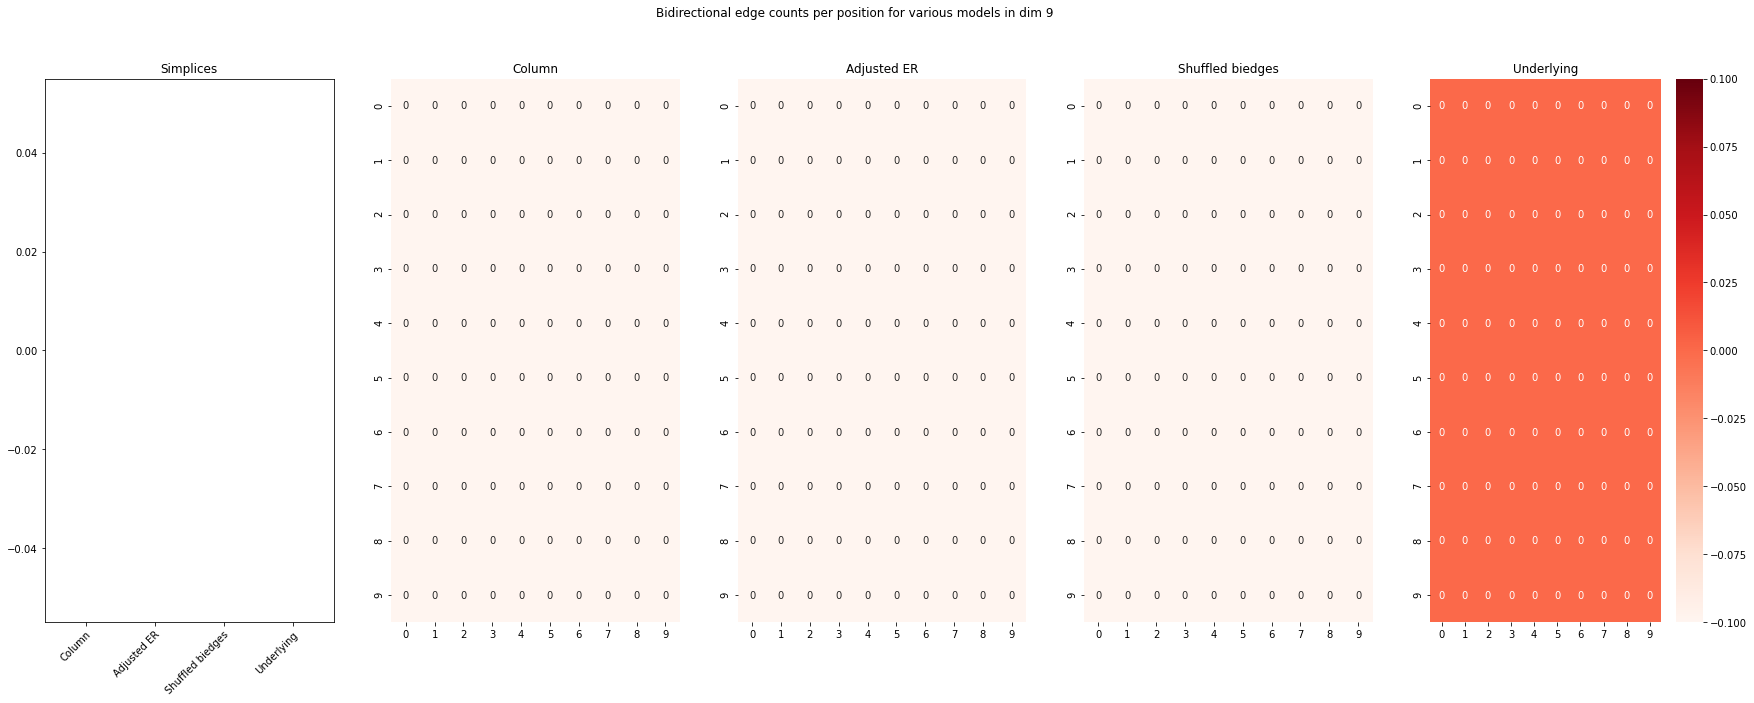

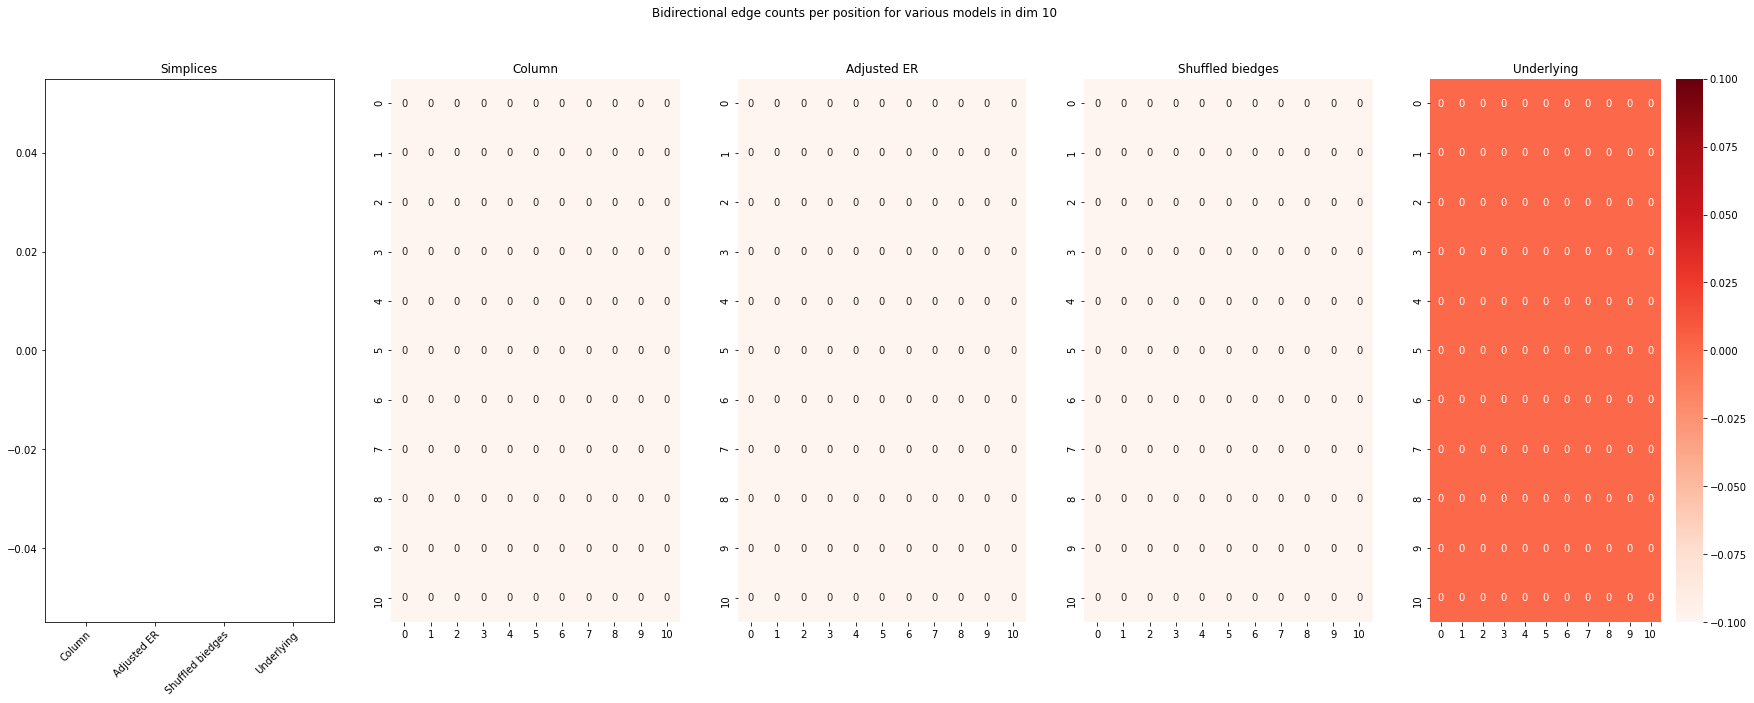

In [20]:
compare_graphs([a,b0,c0,d0], 1, "bcounts")

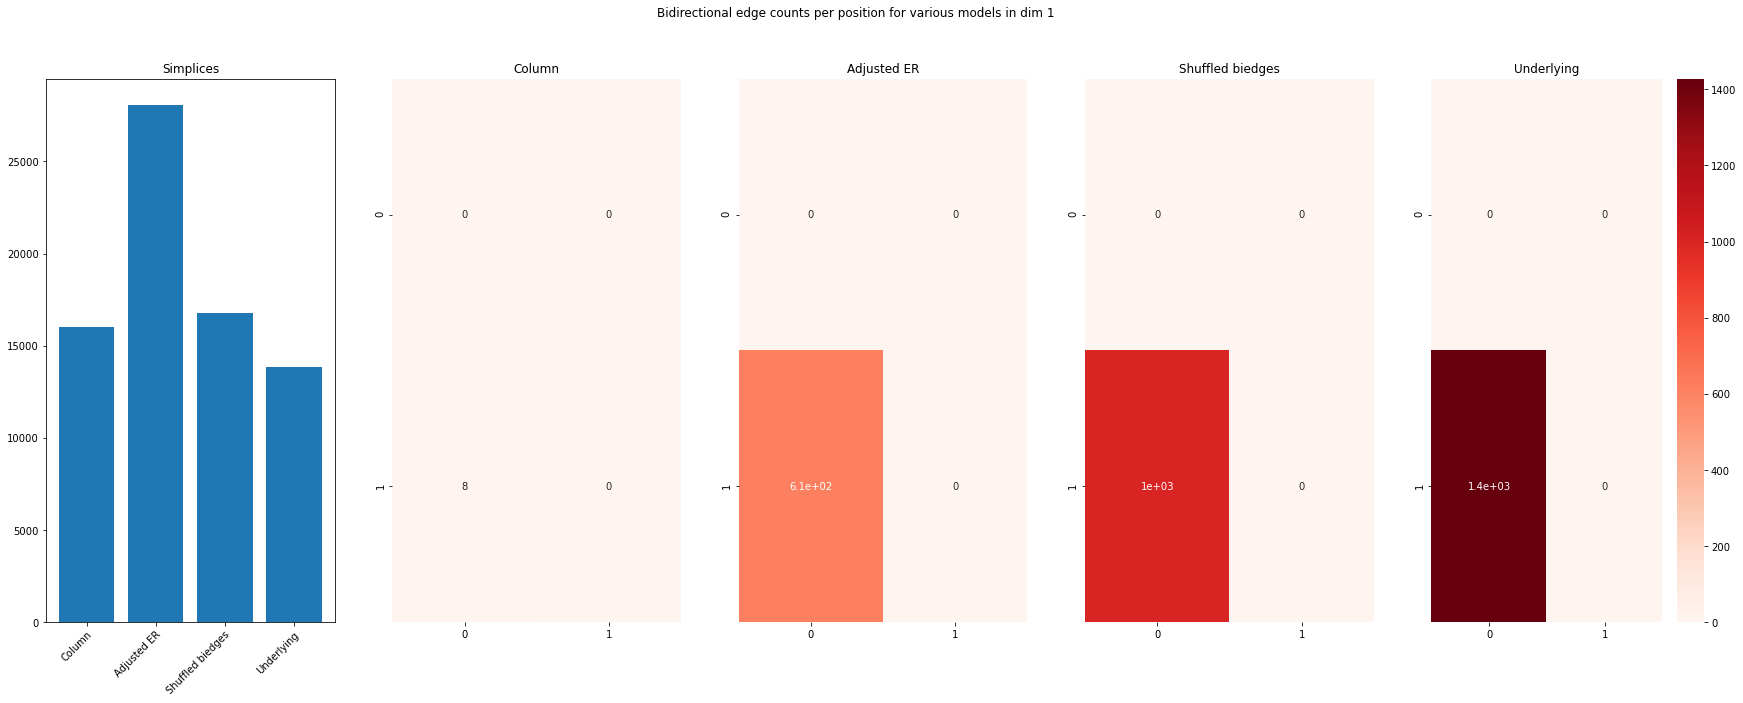

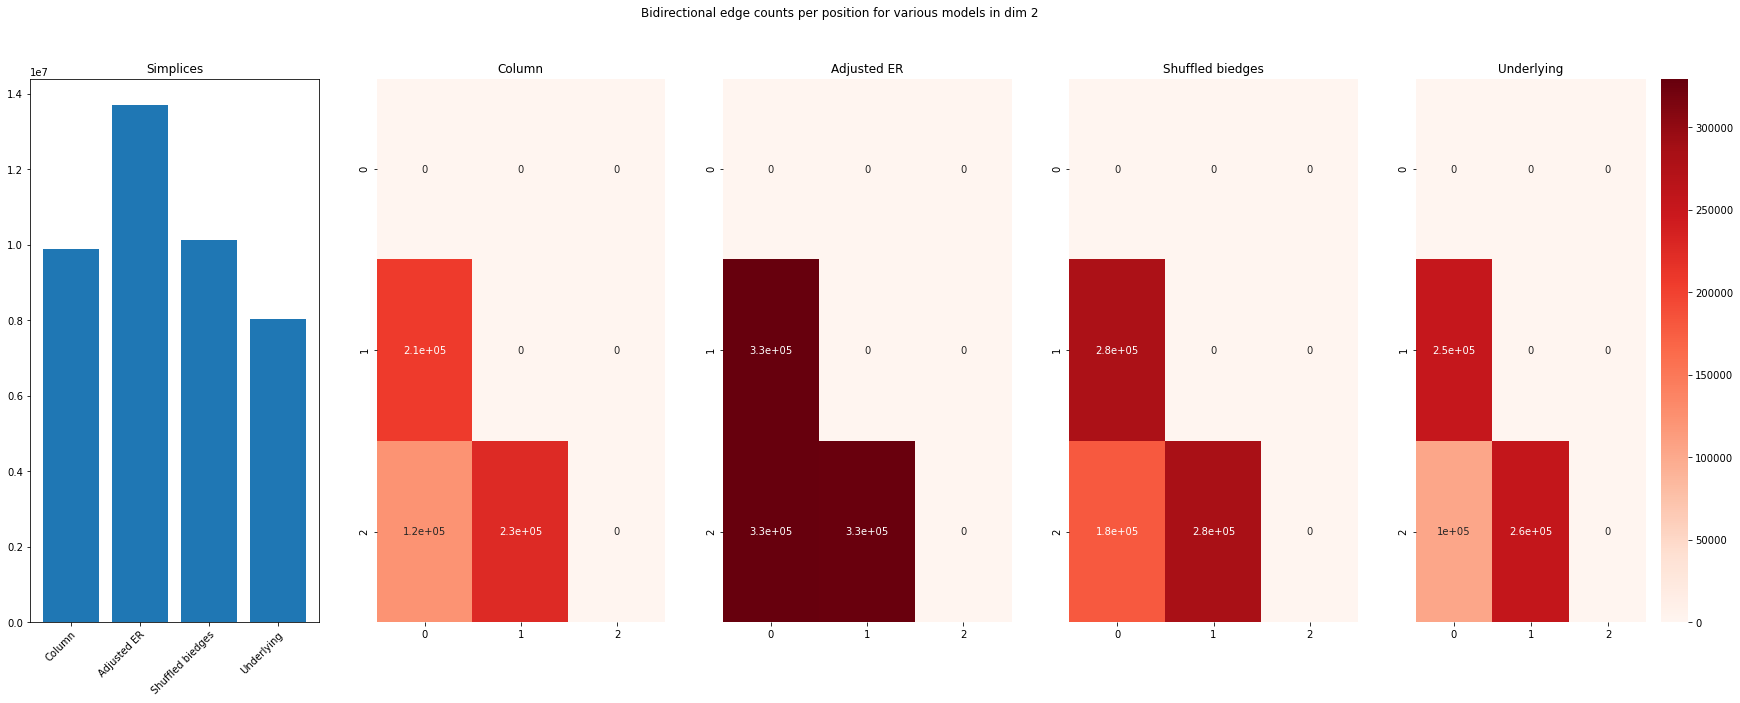

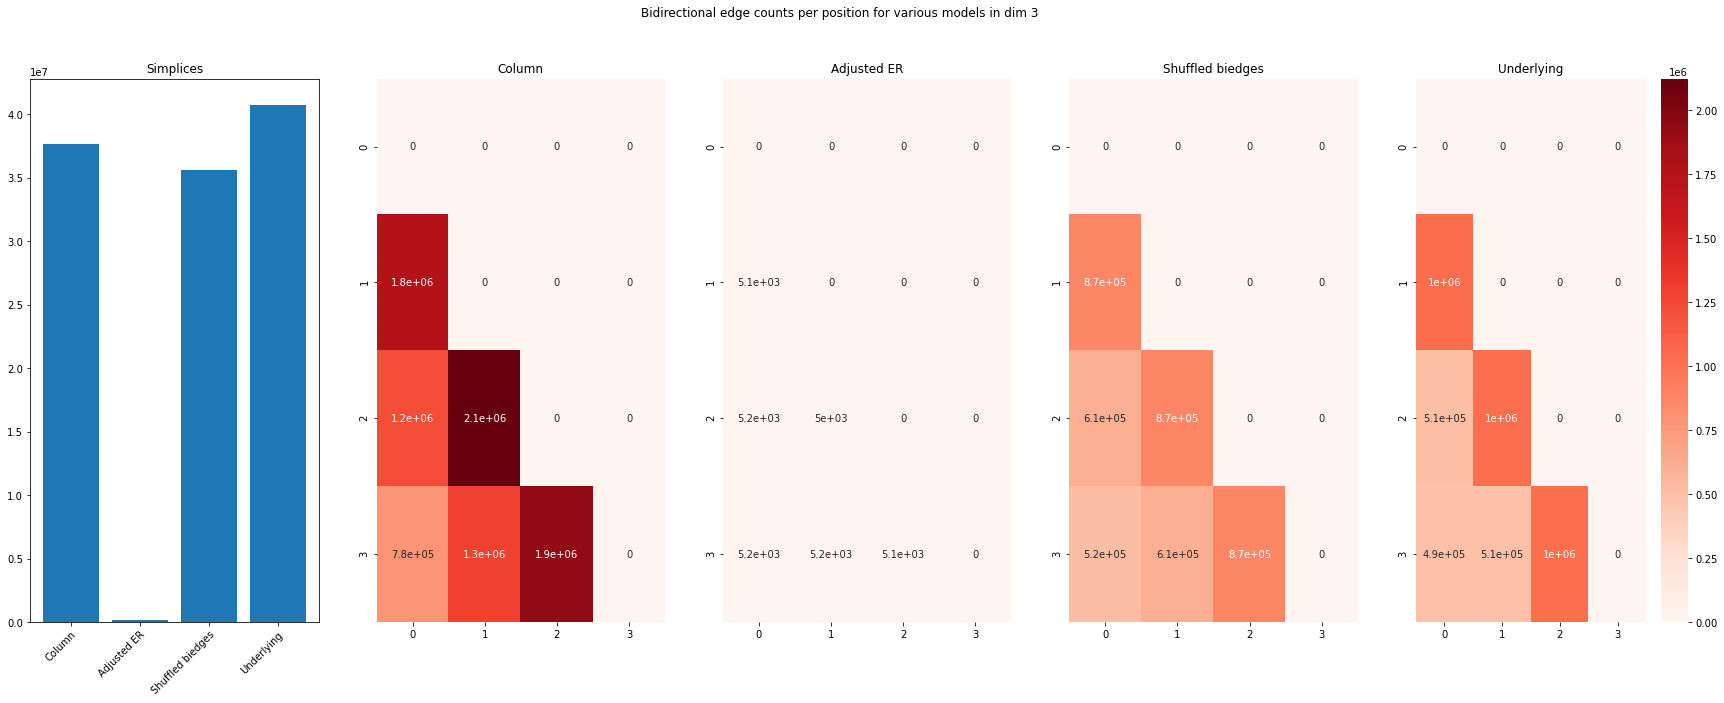

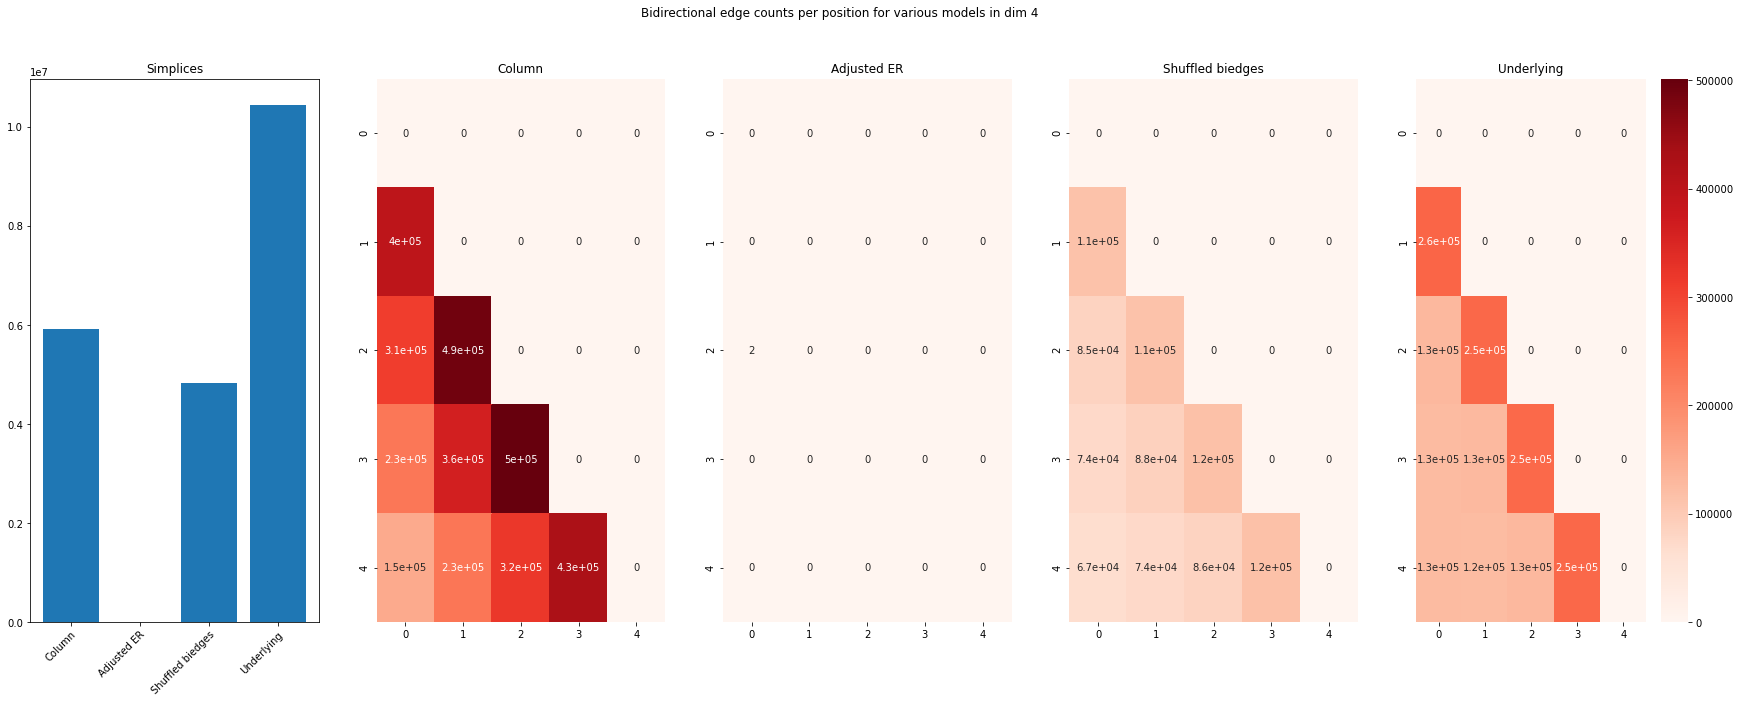

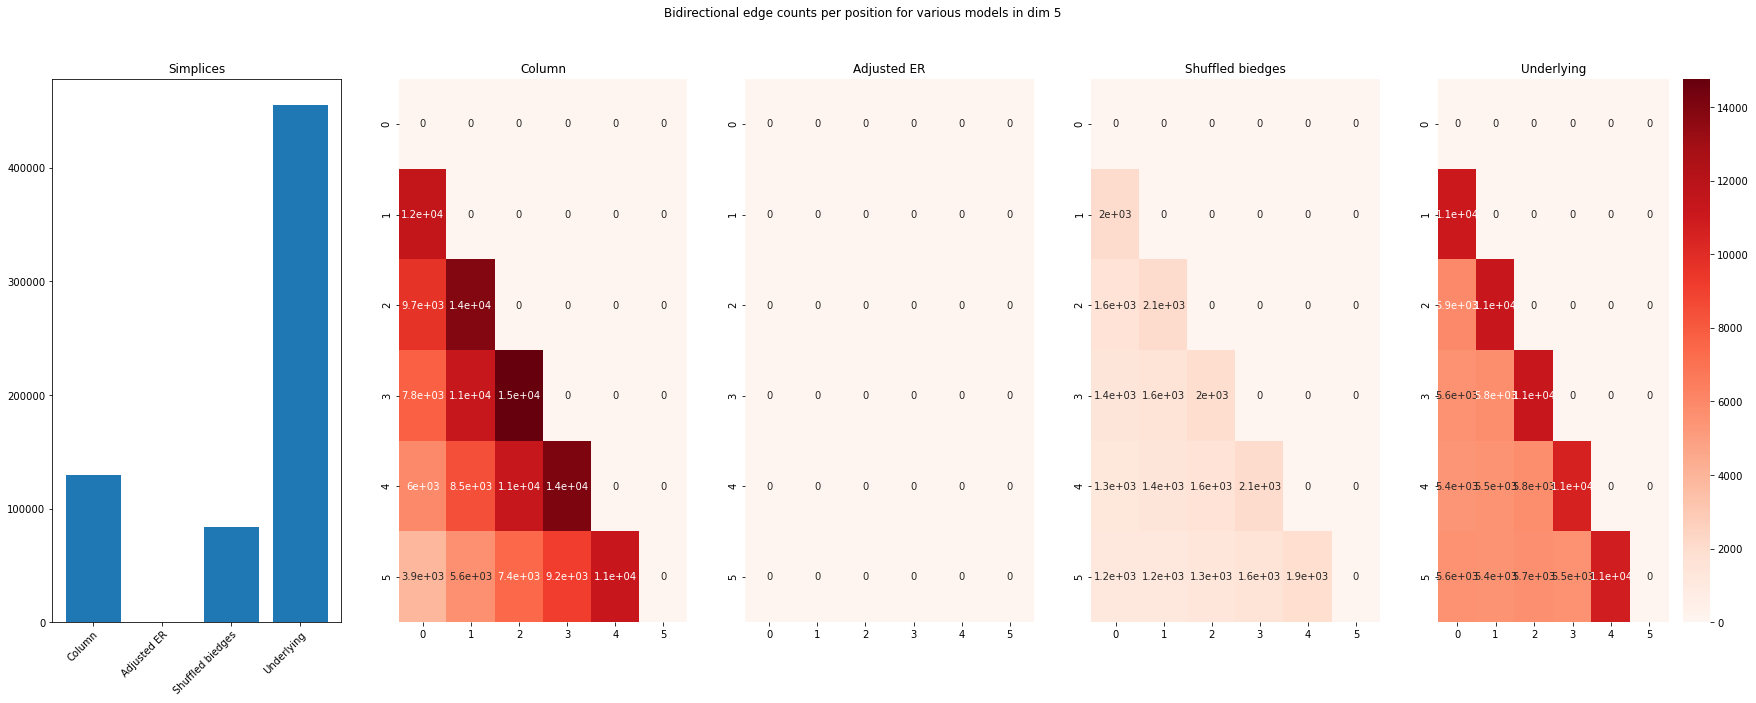

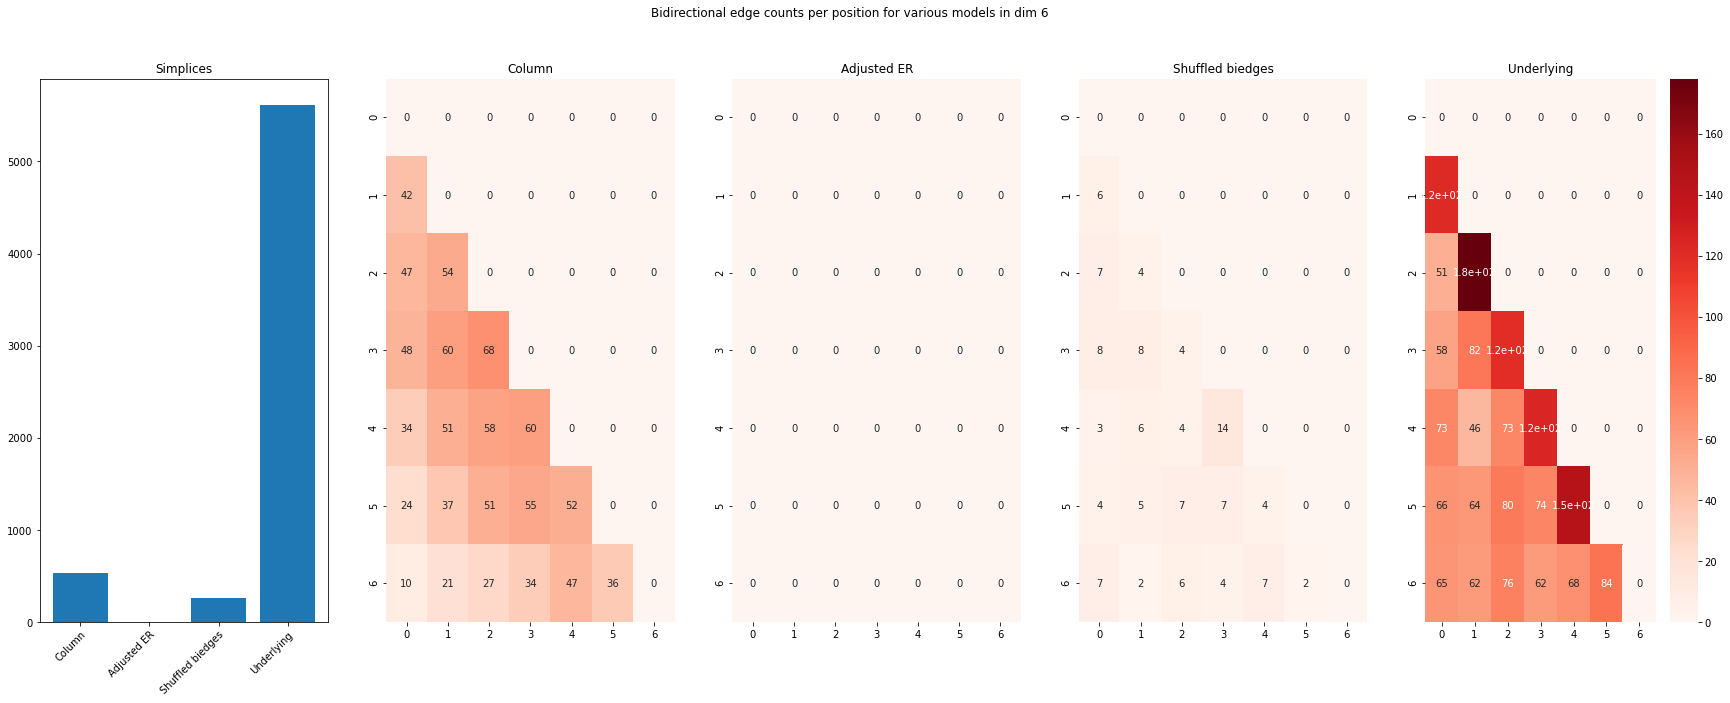

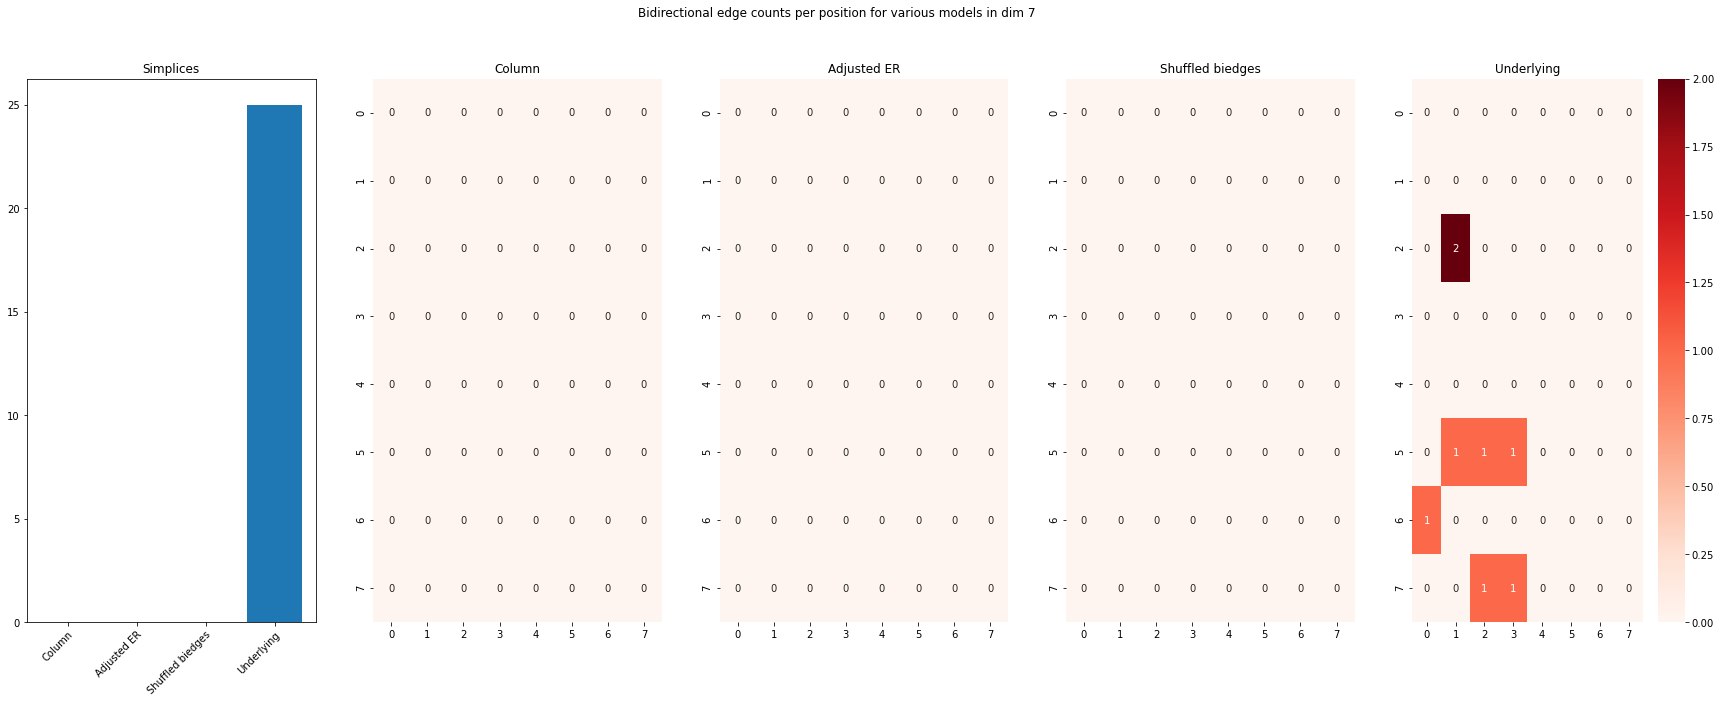

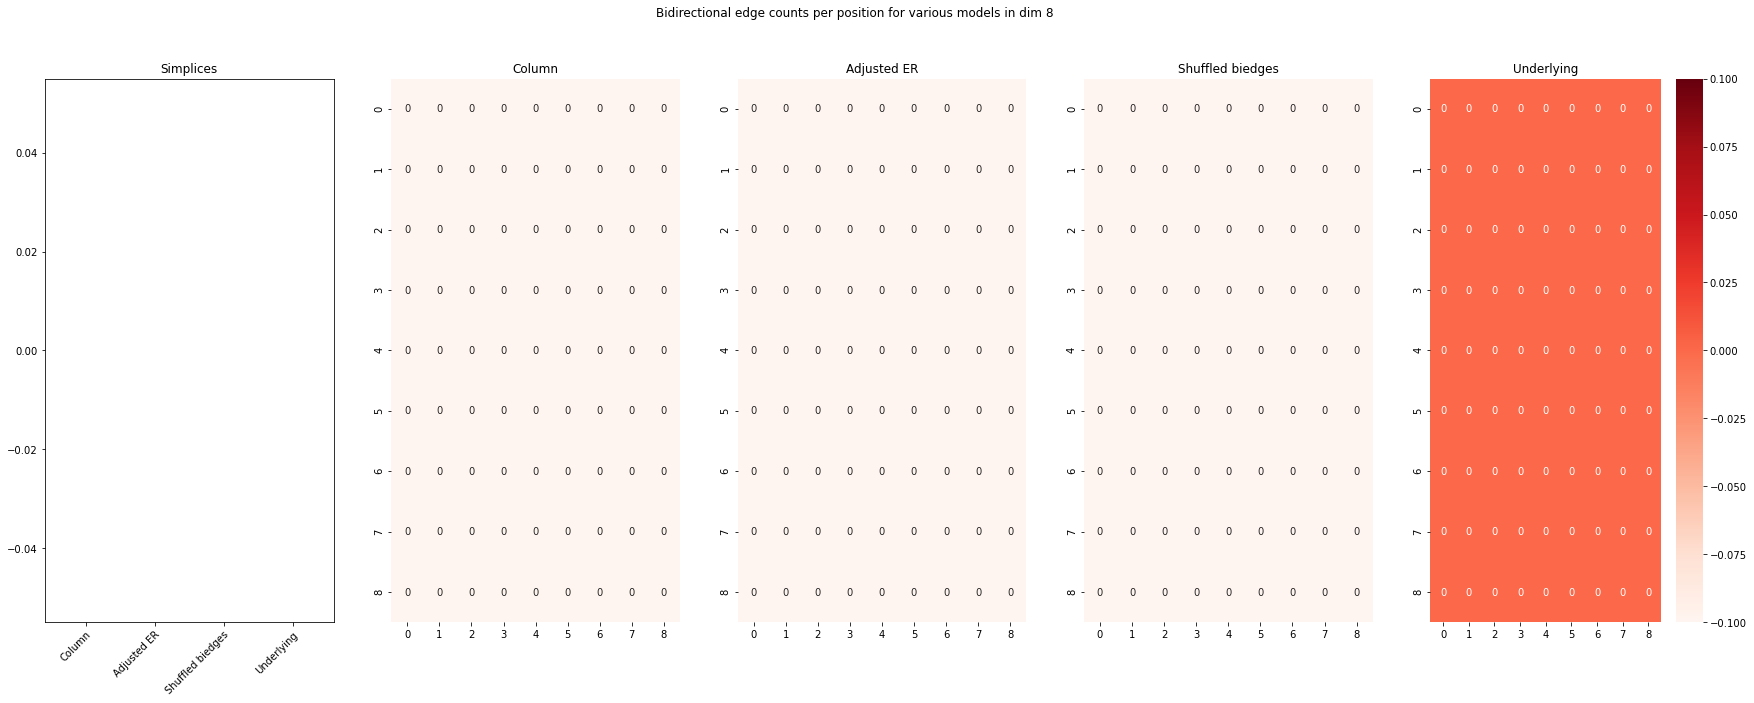

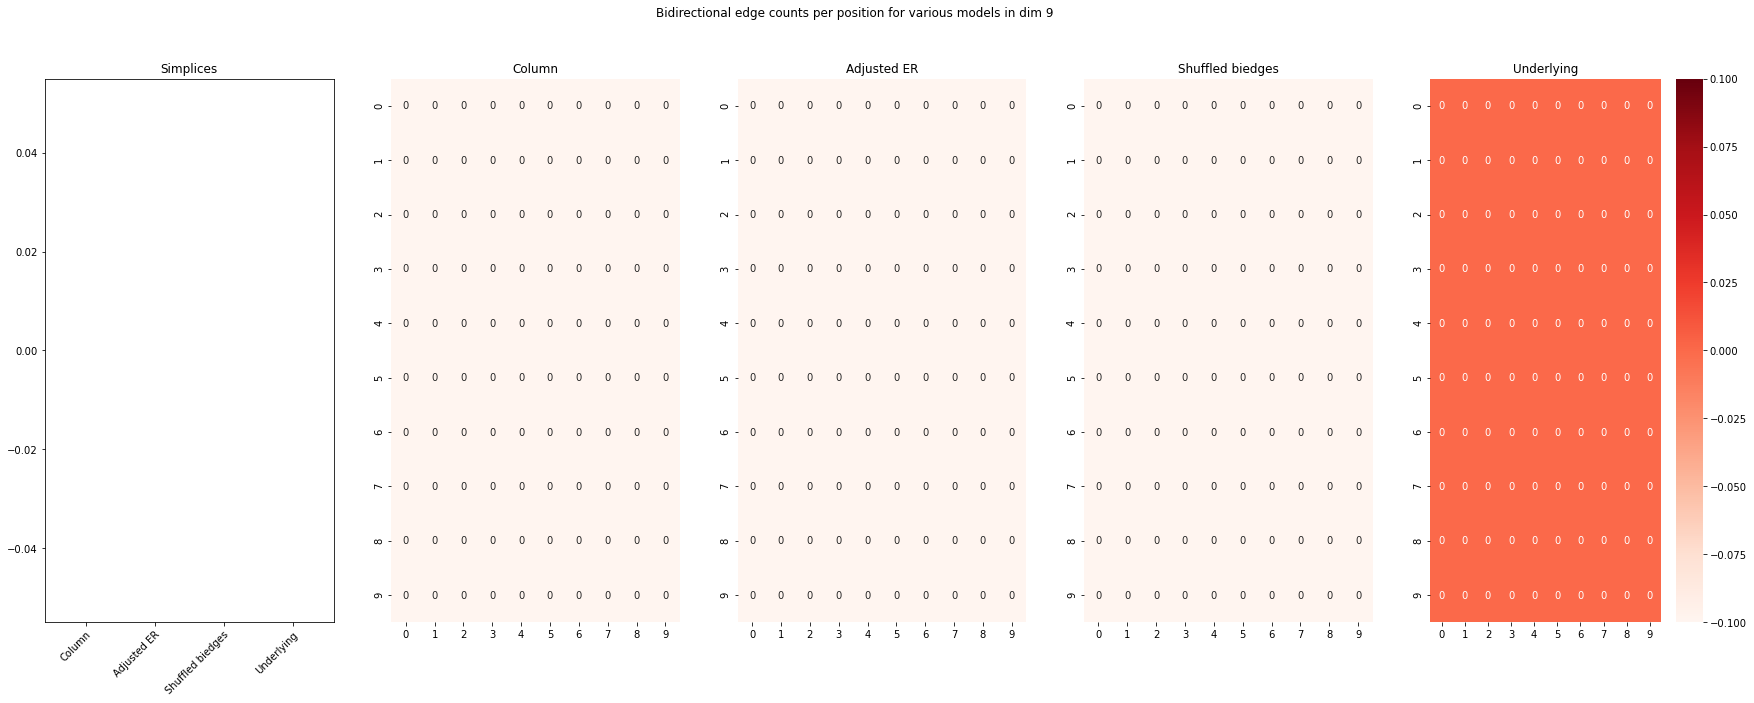

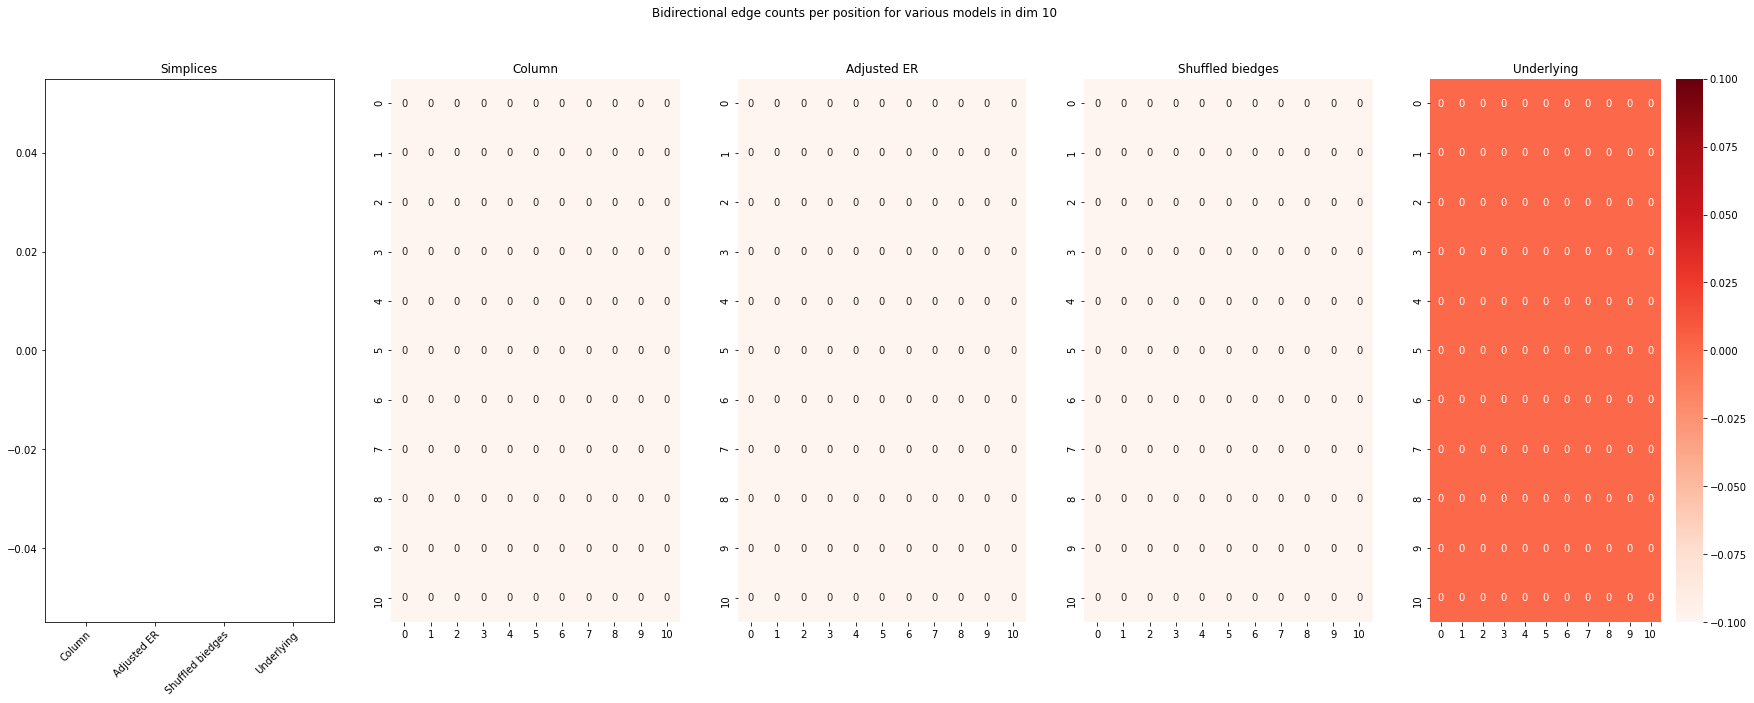

In [21]:
compare_graphs([amax,bmax,cmax,dmax], 1, "mbcounts")

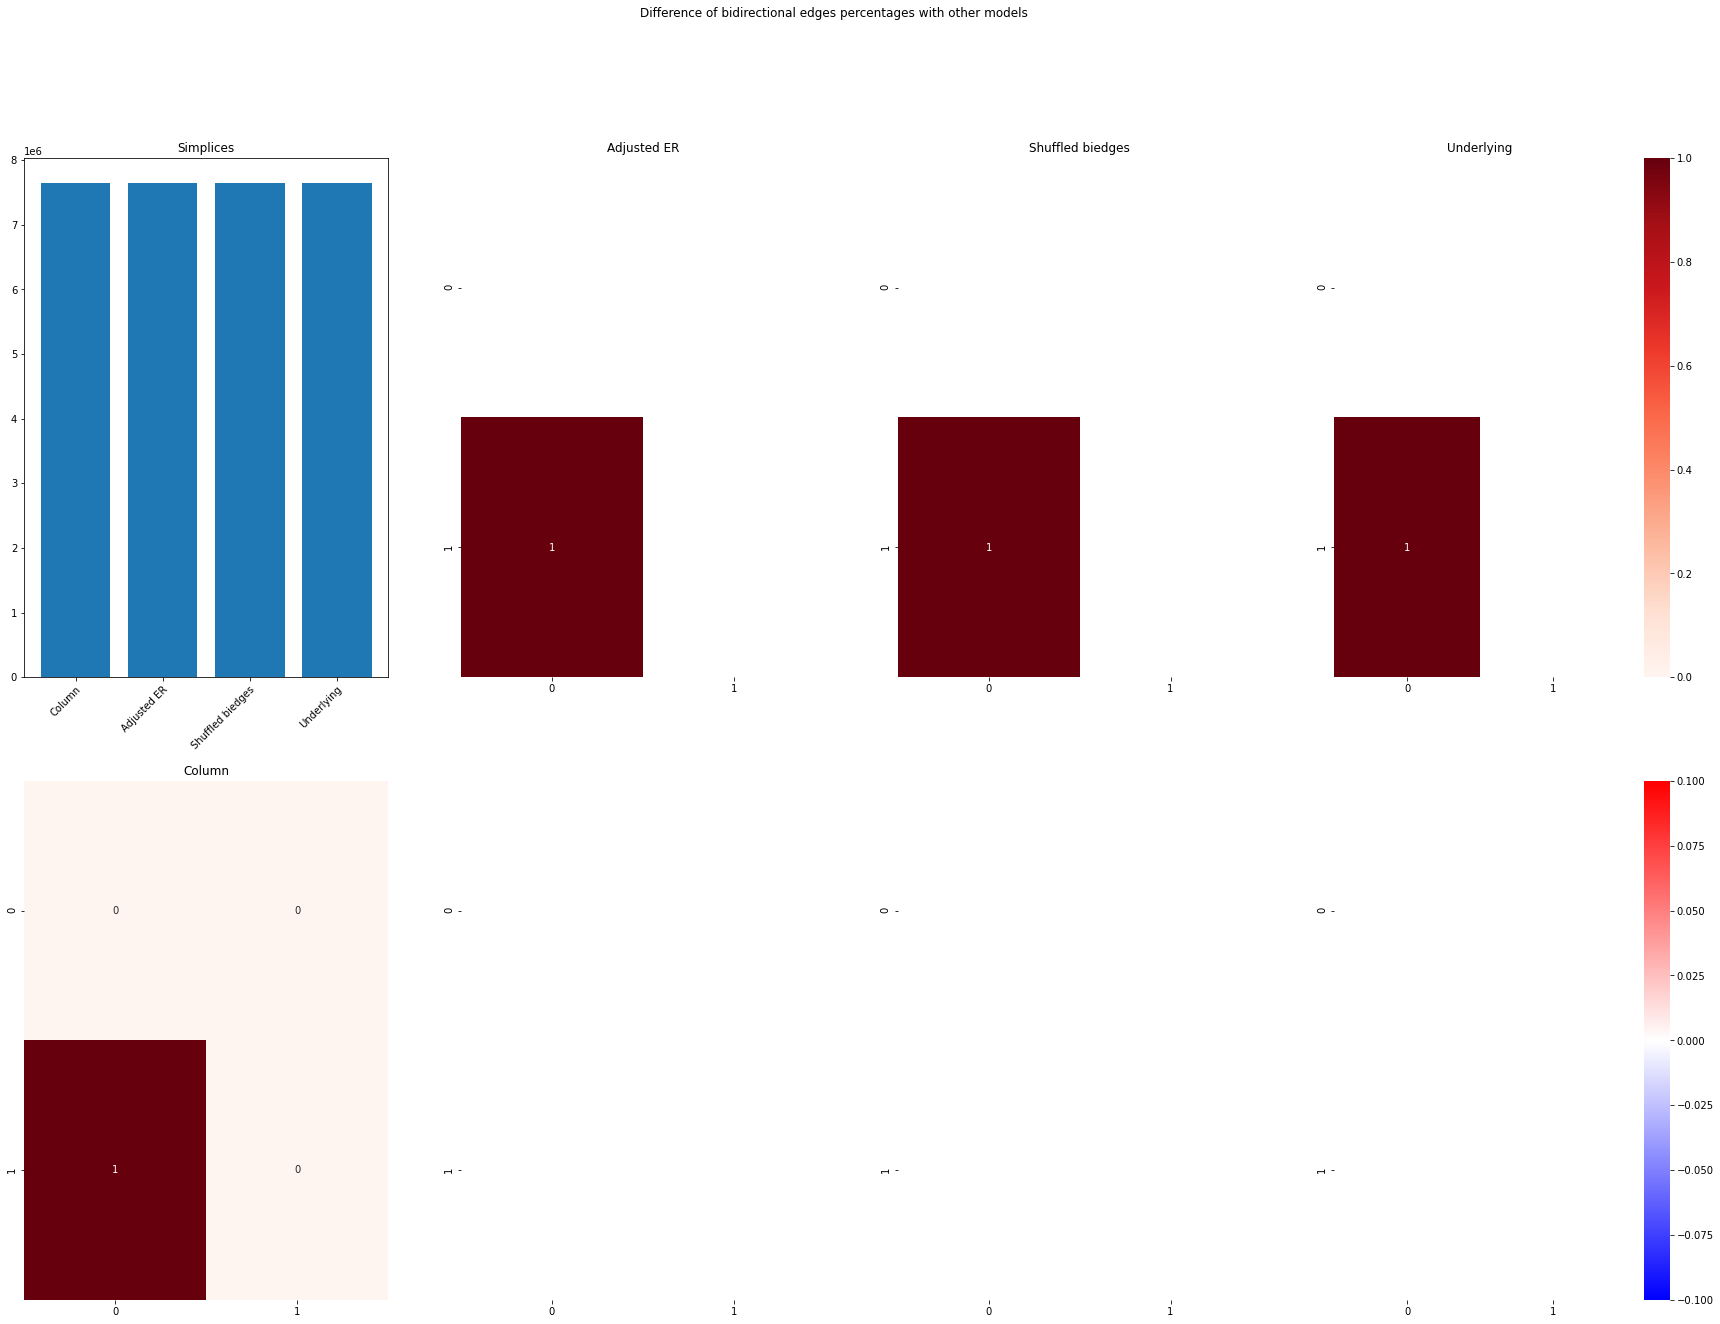

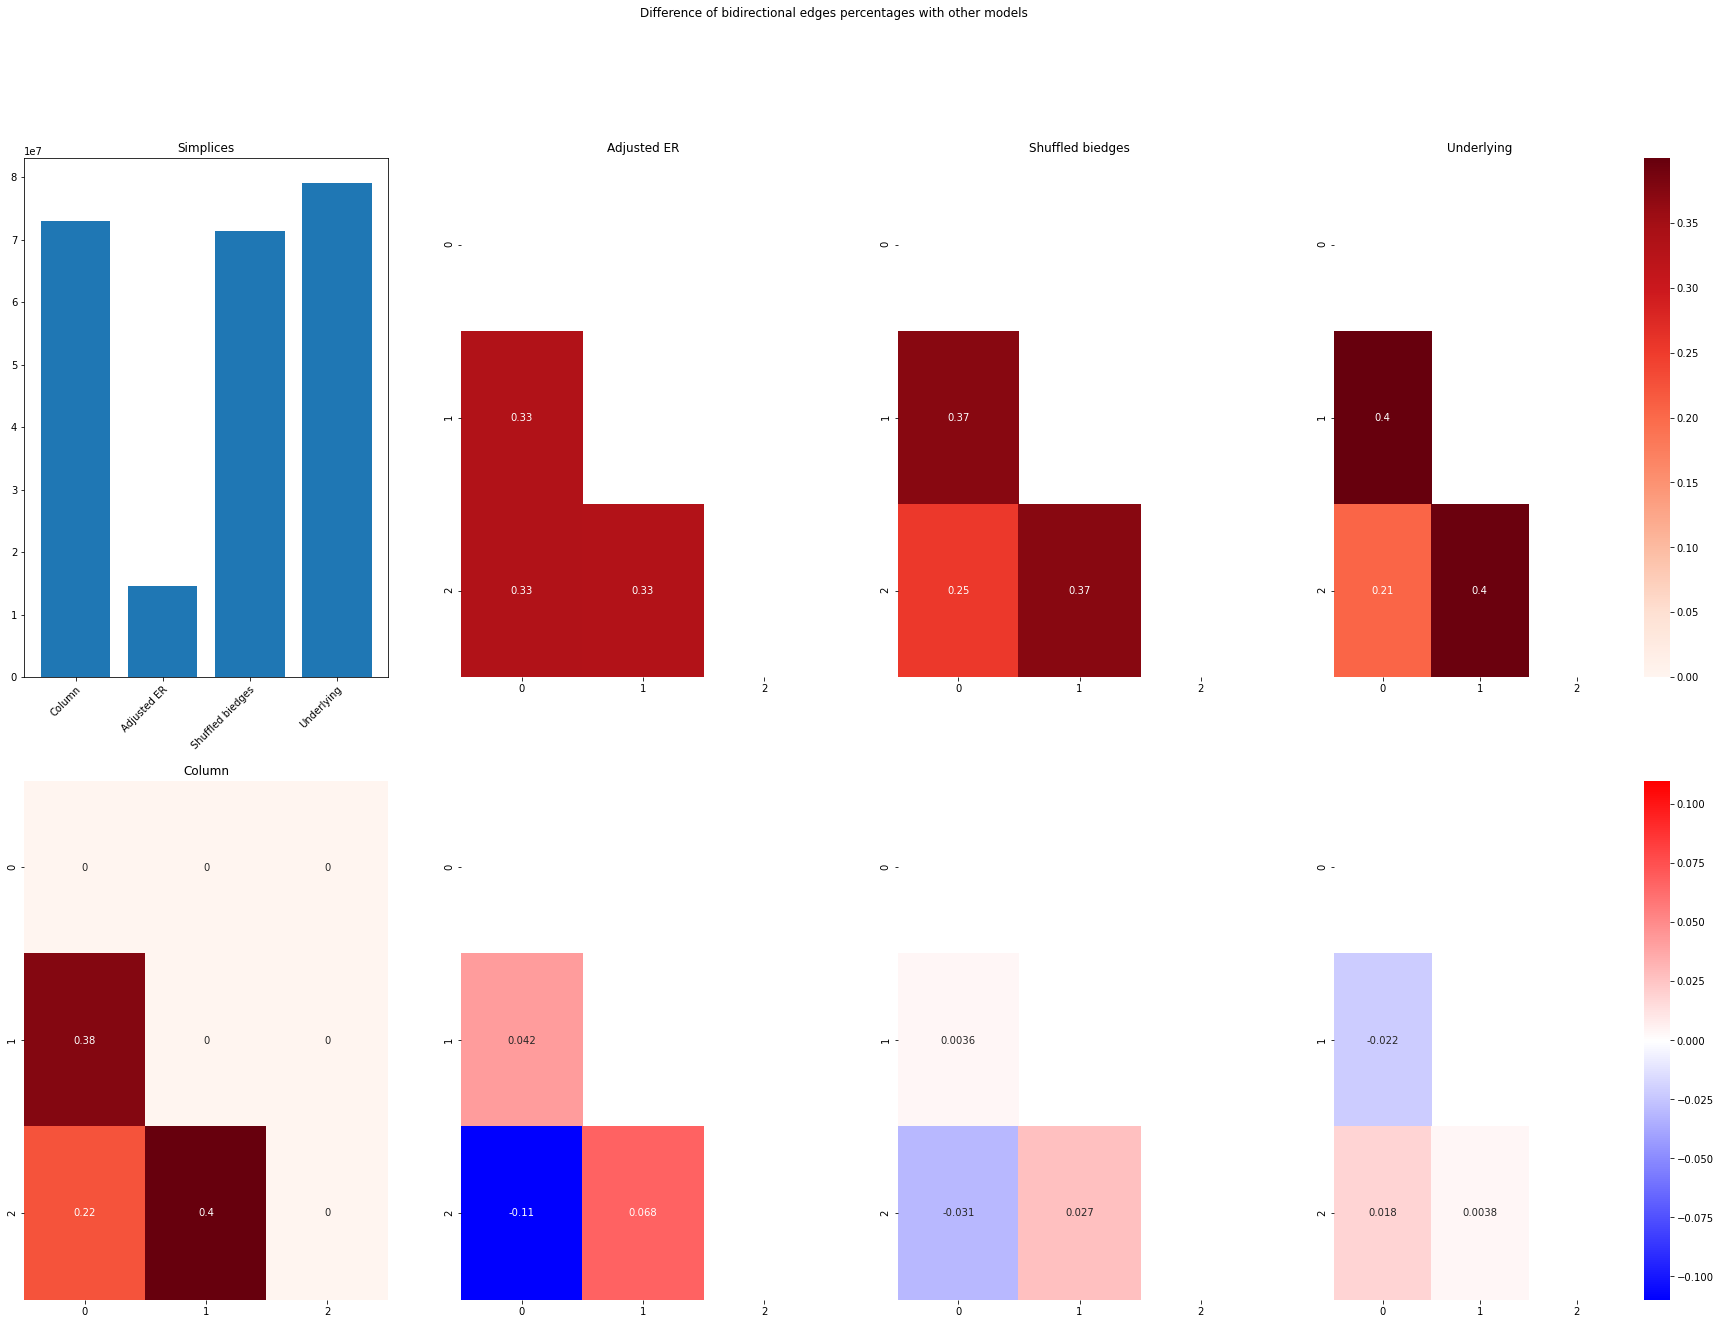

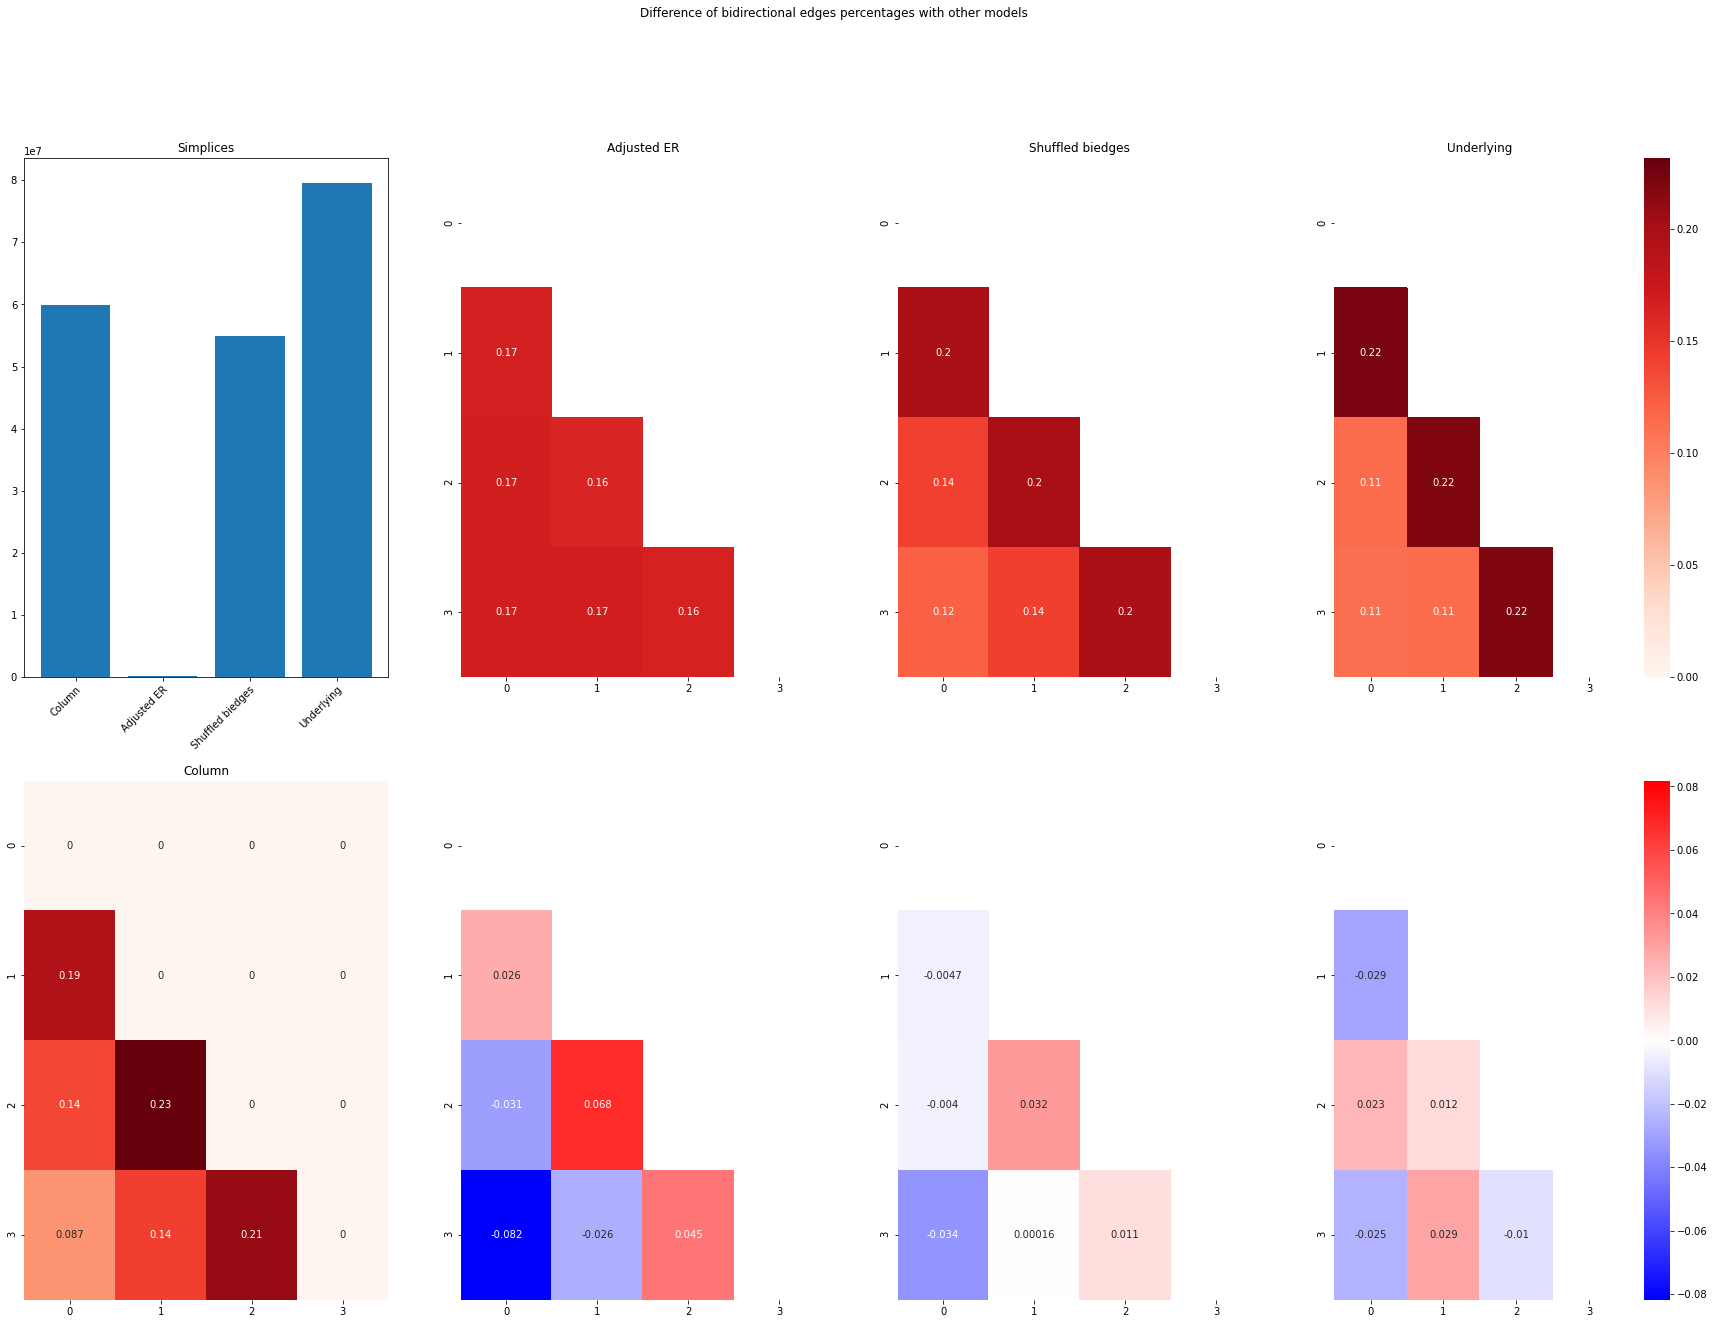

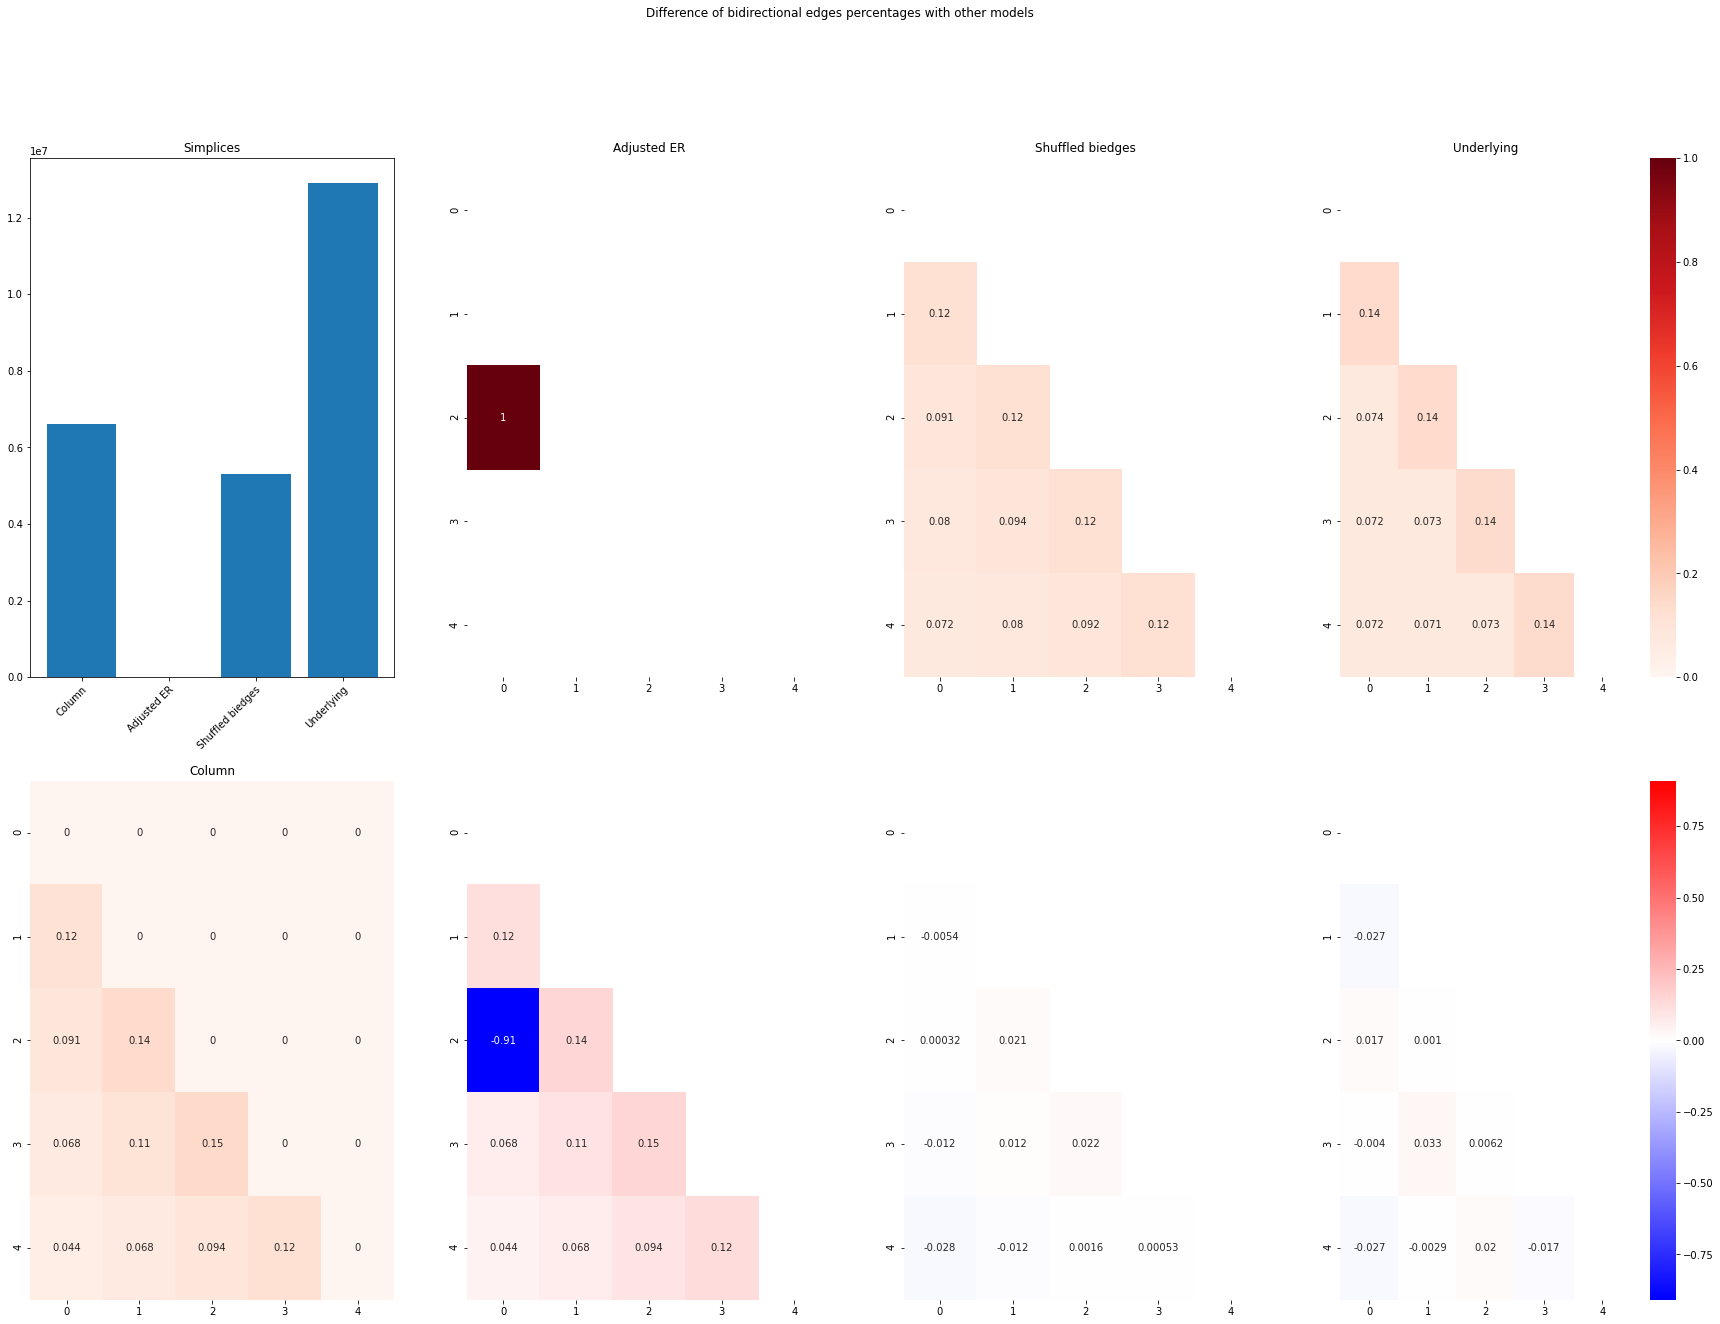

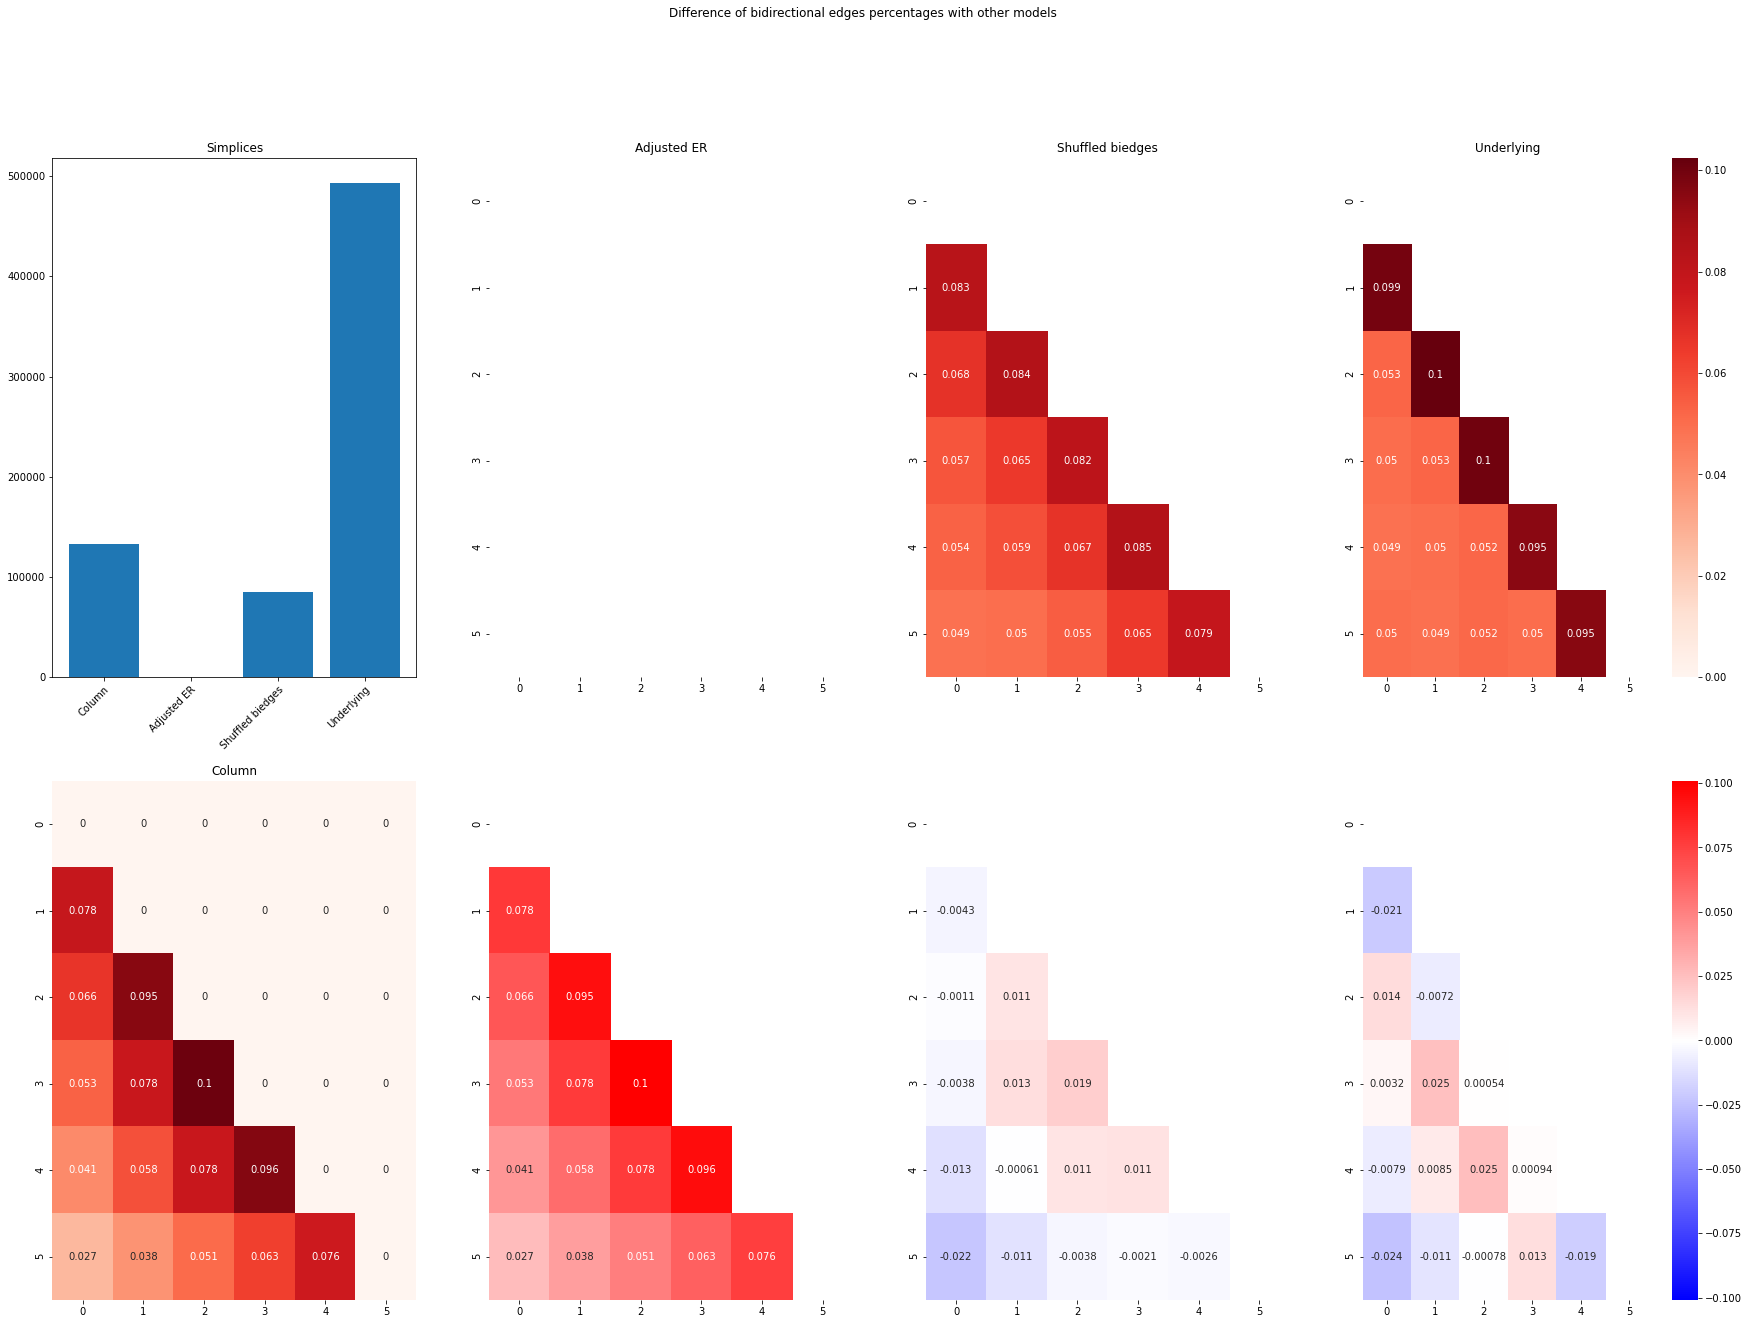

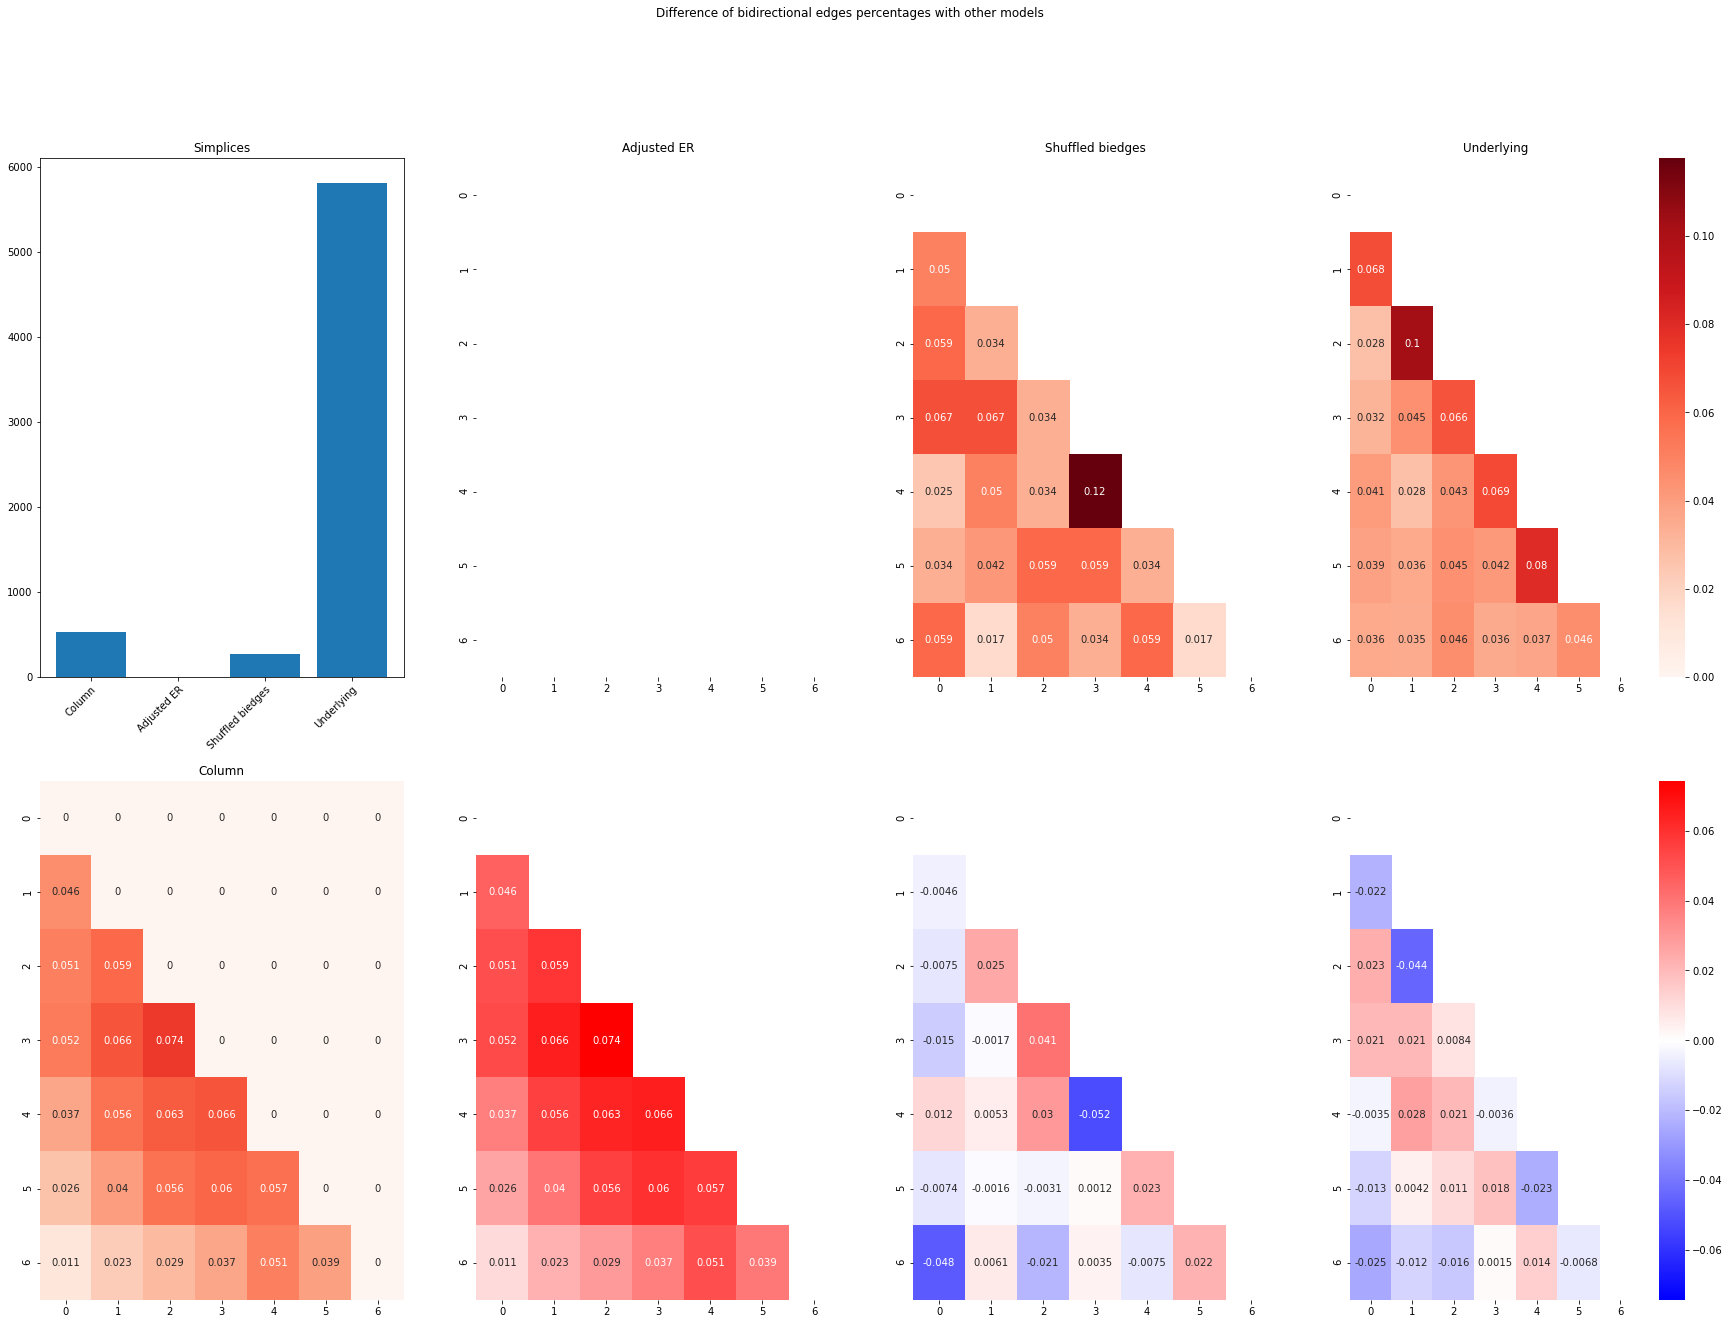

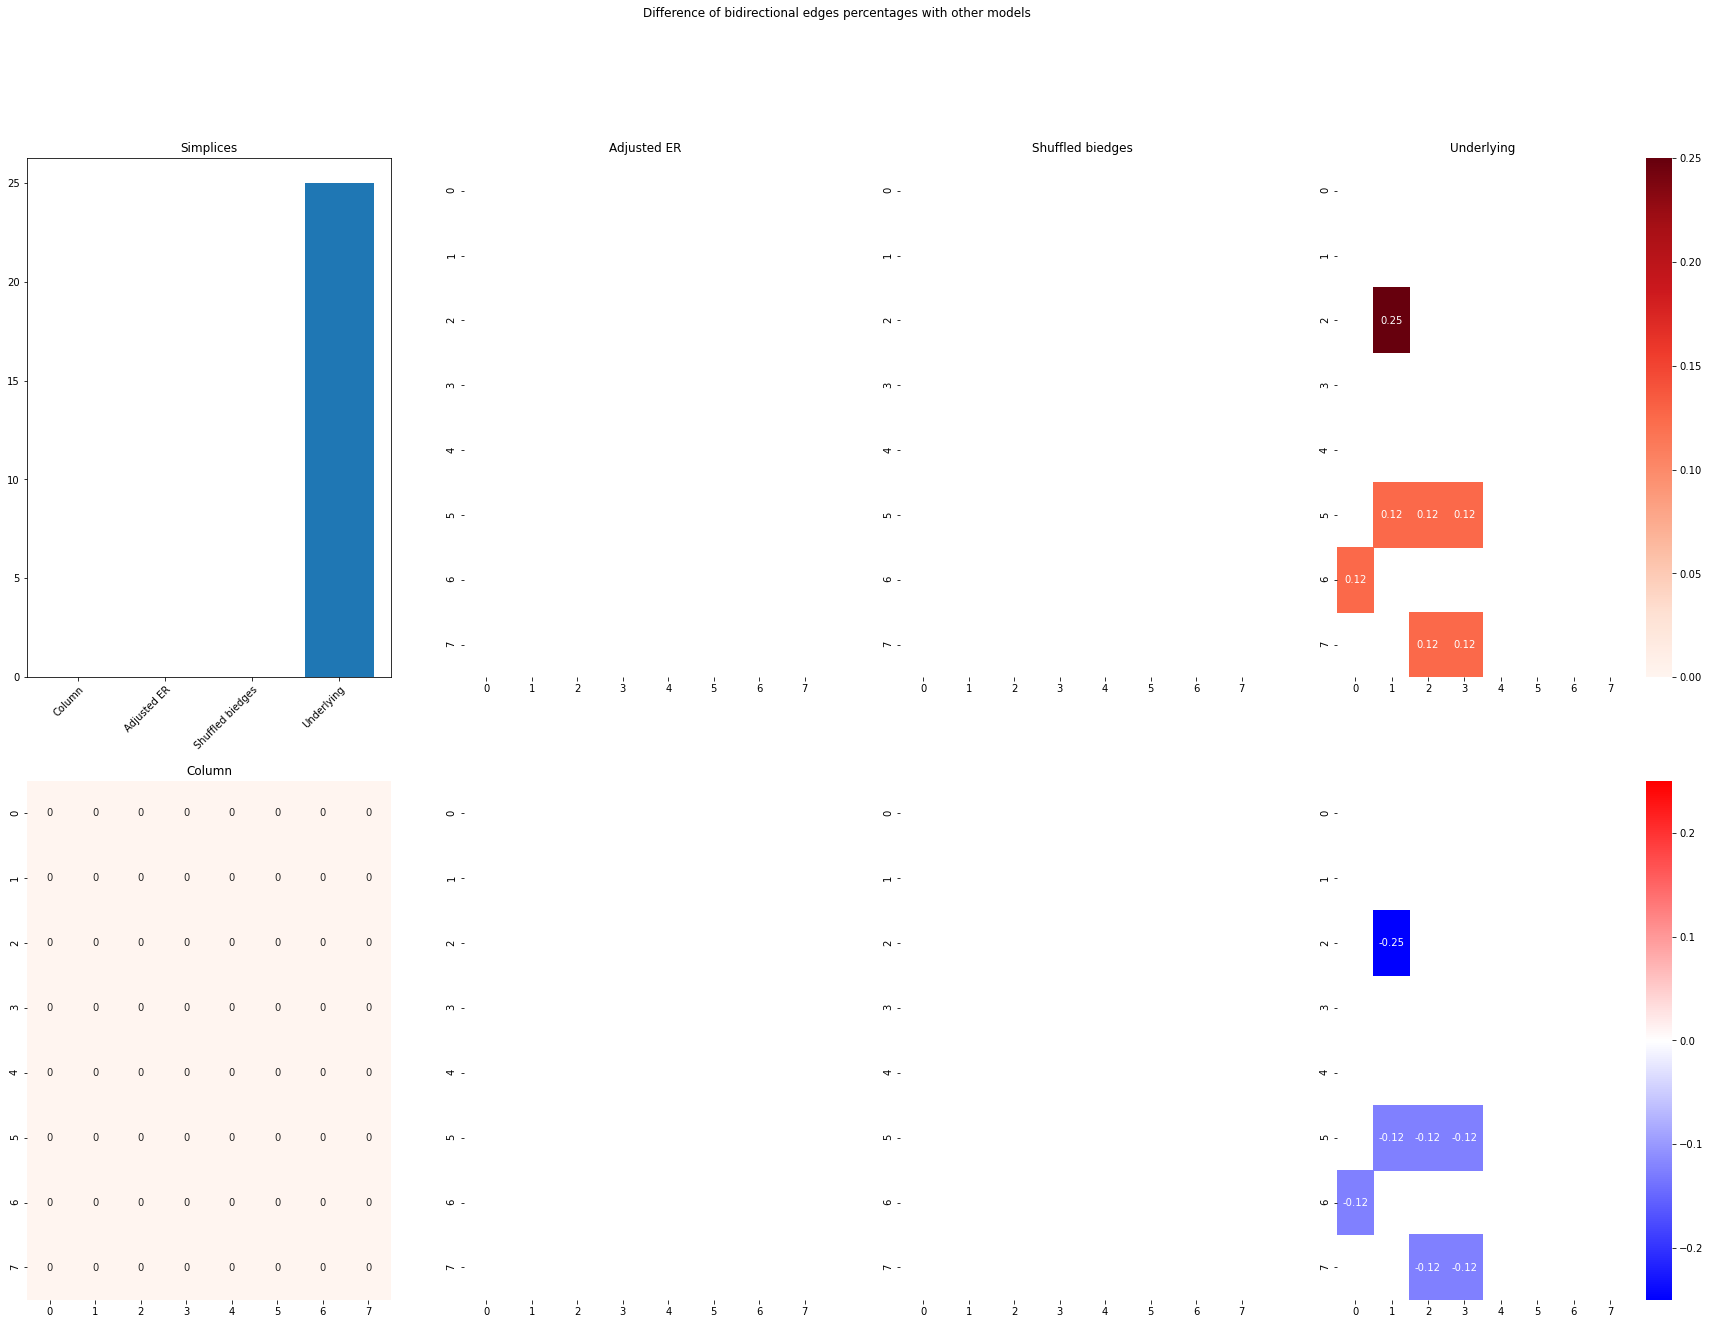

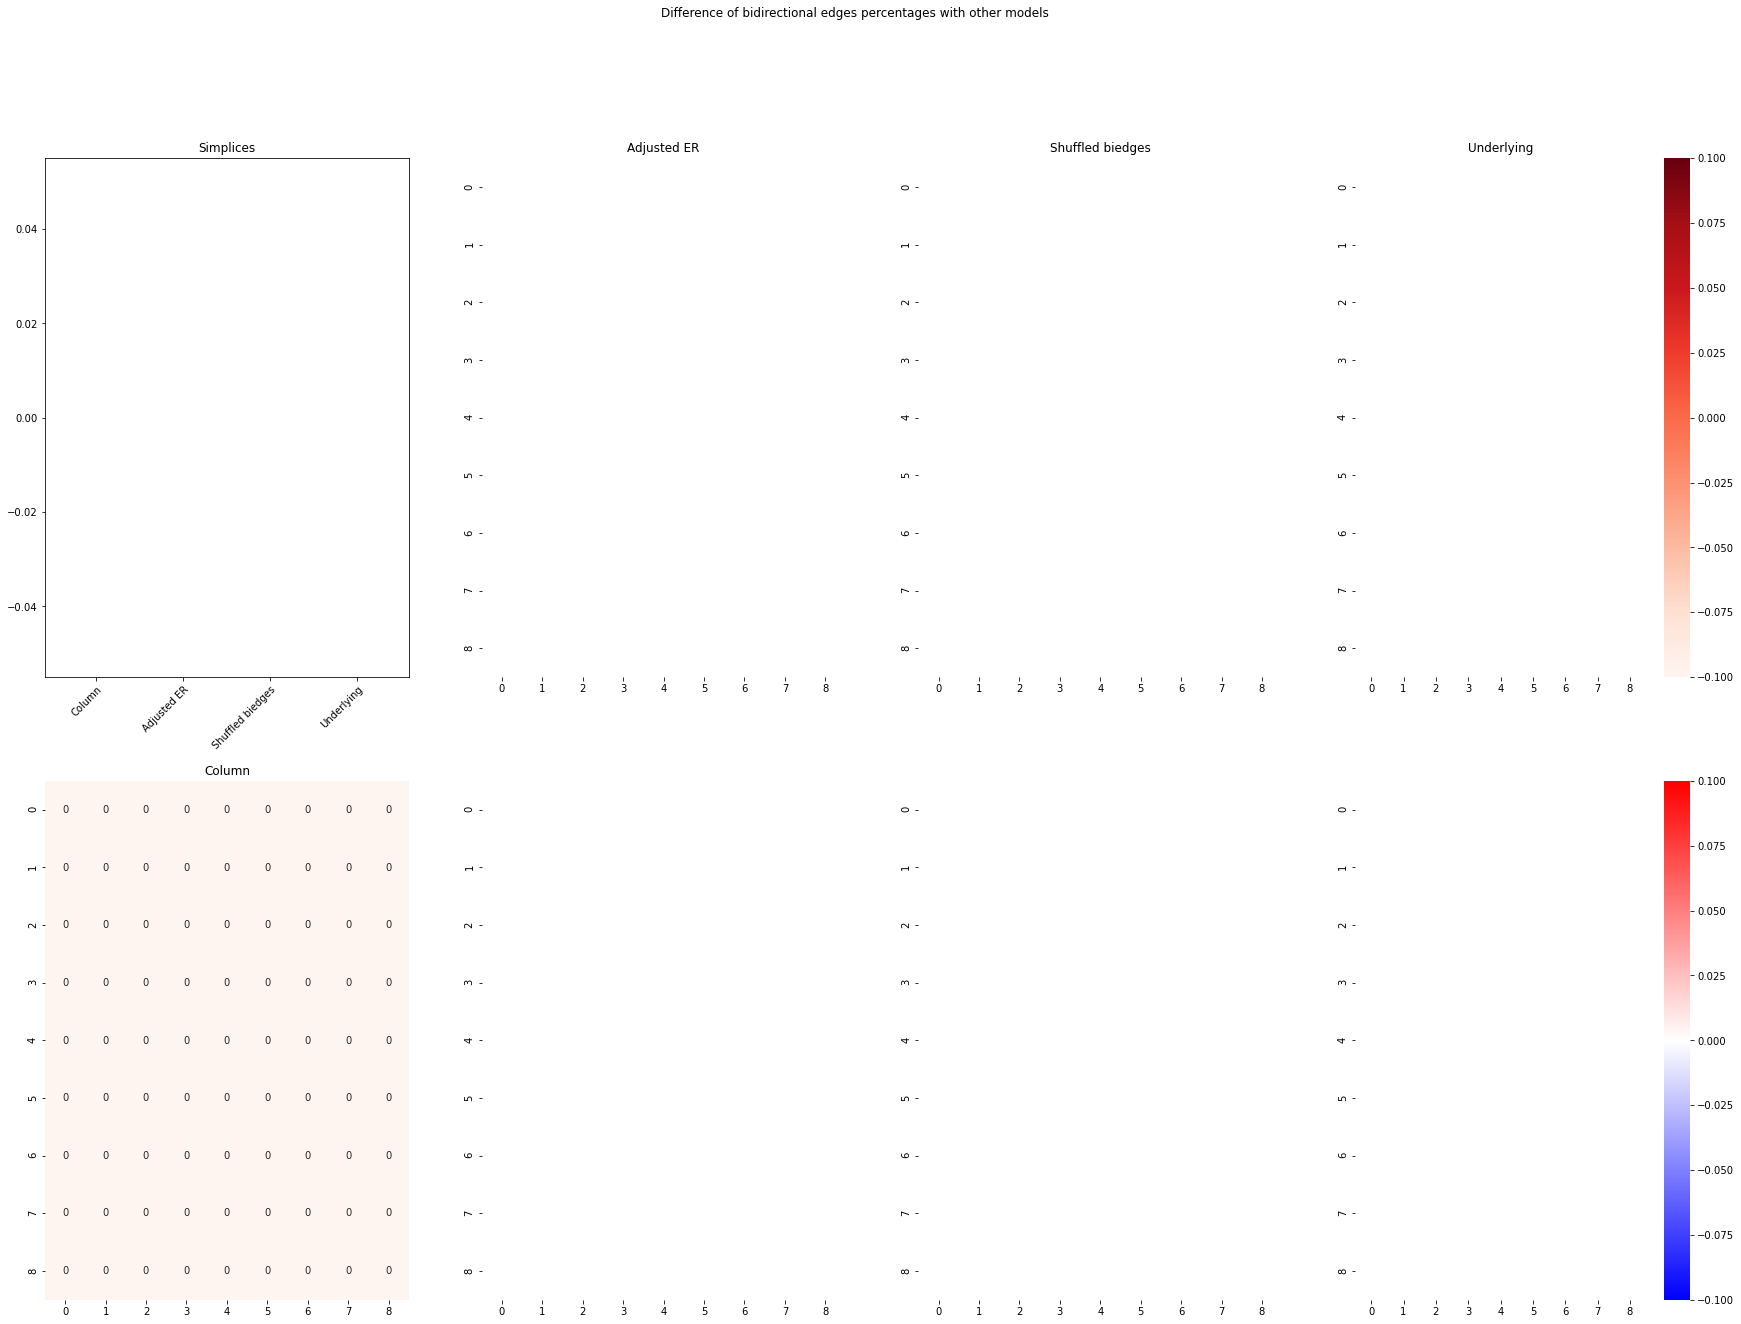

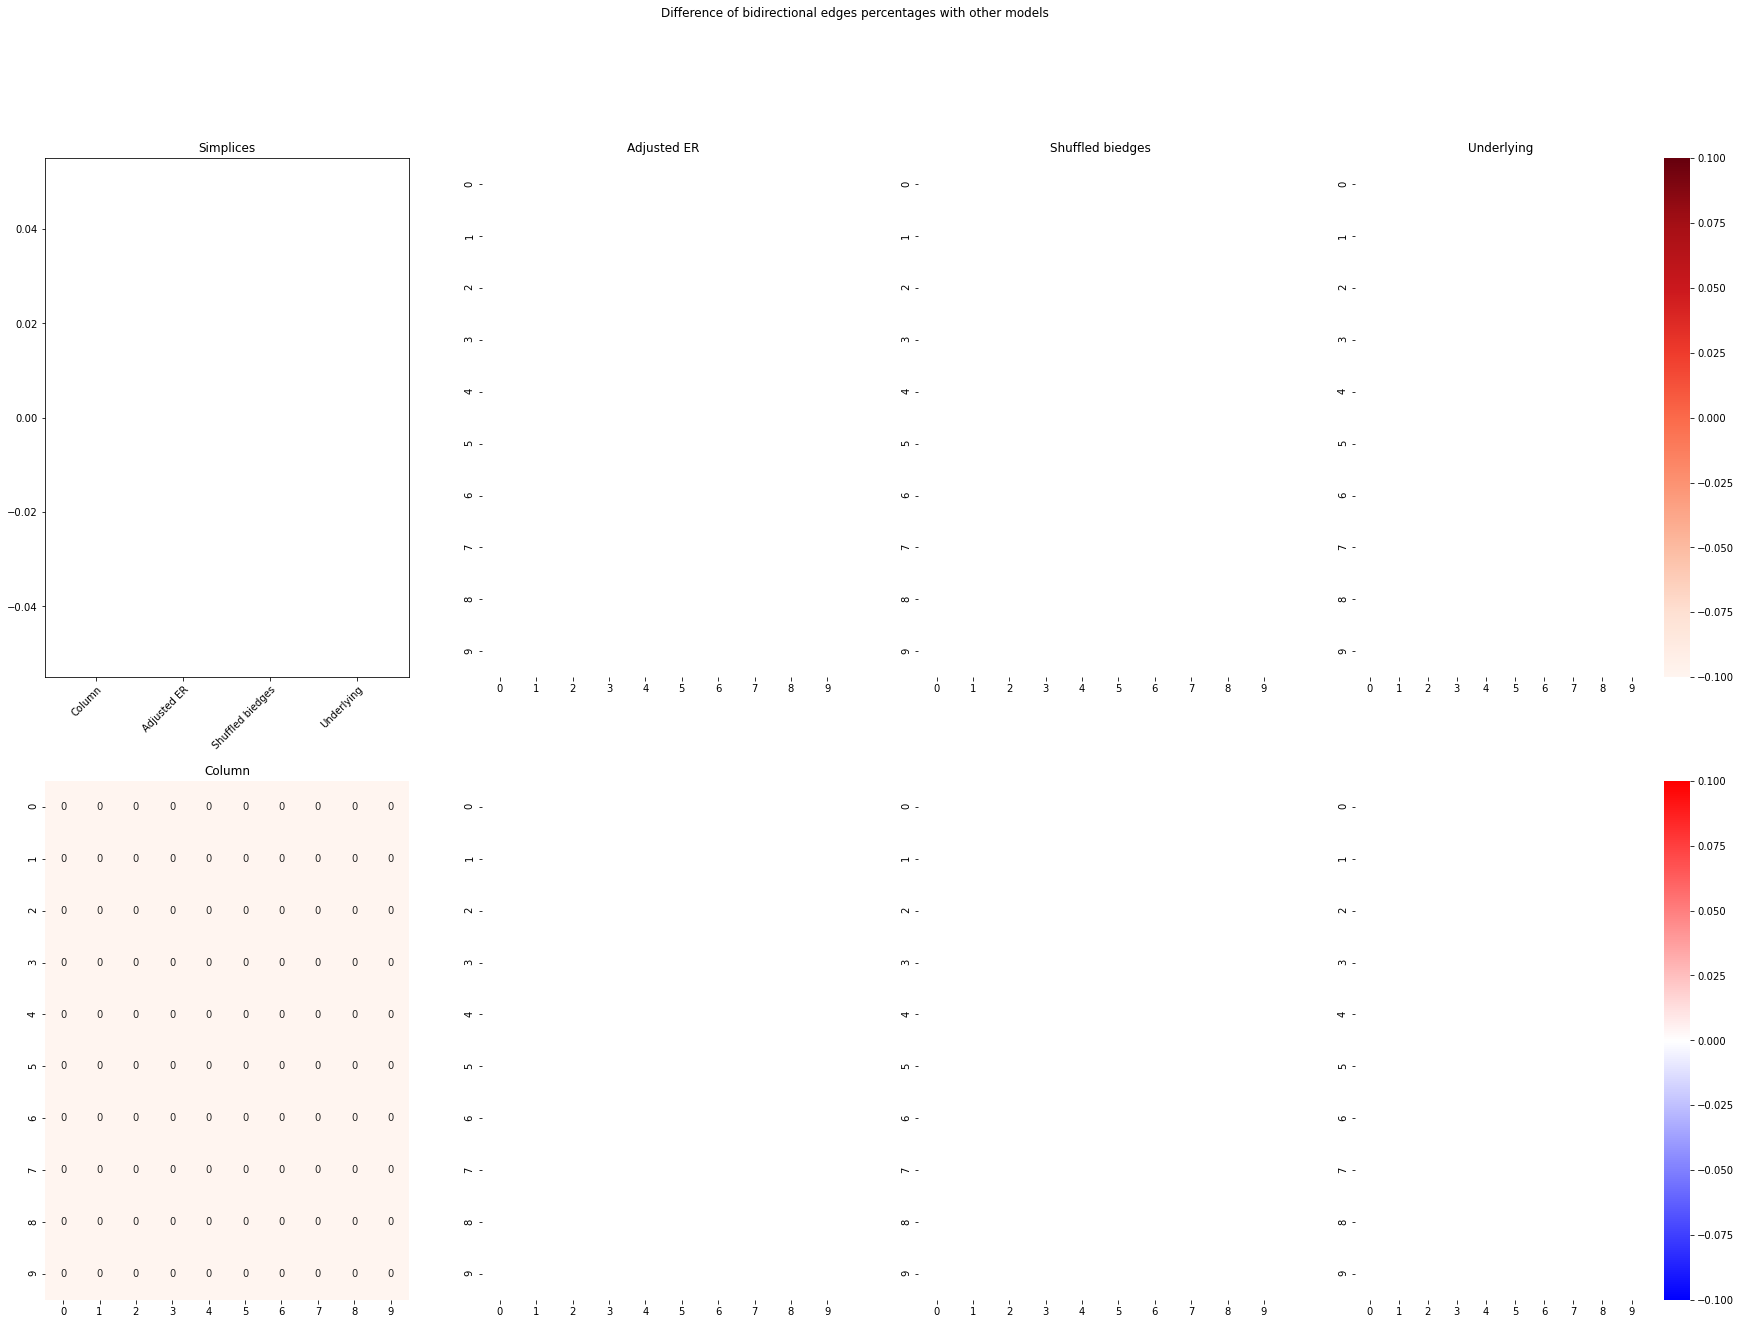

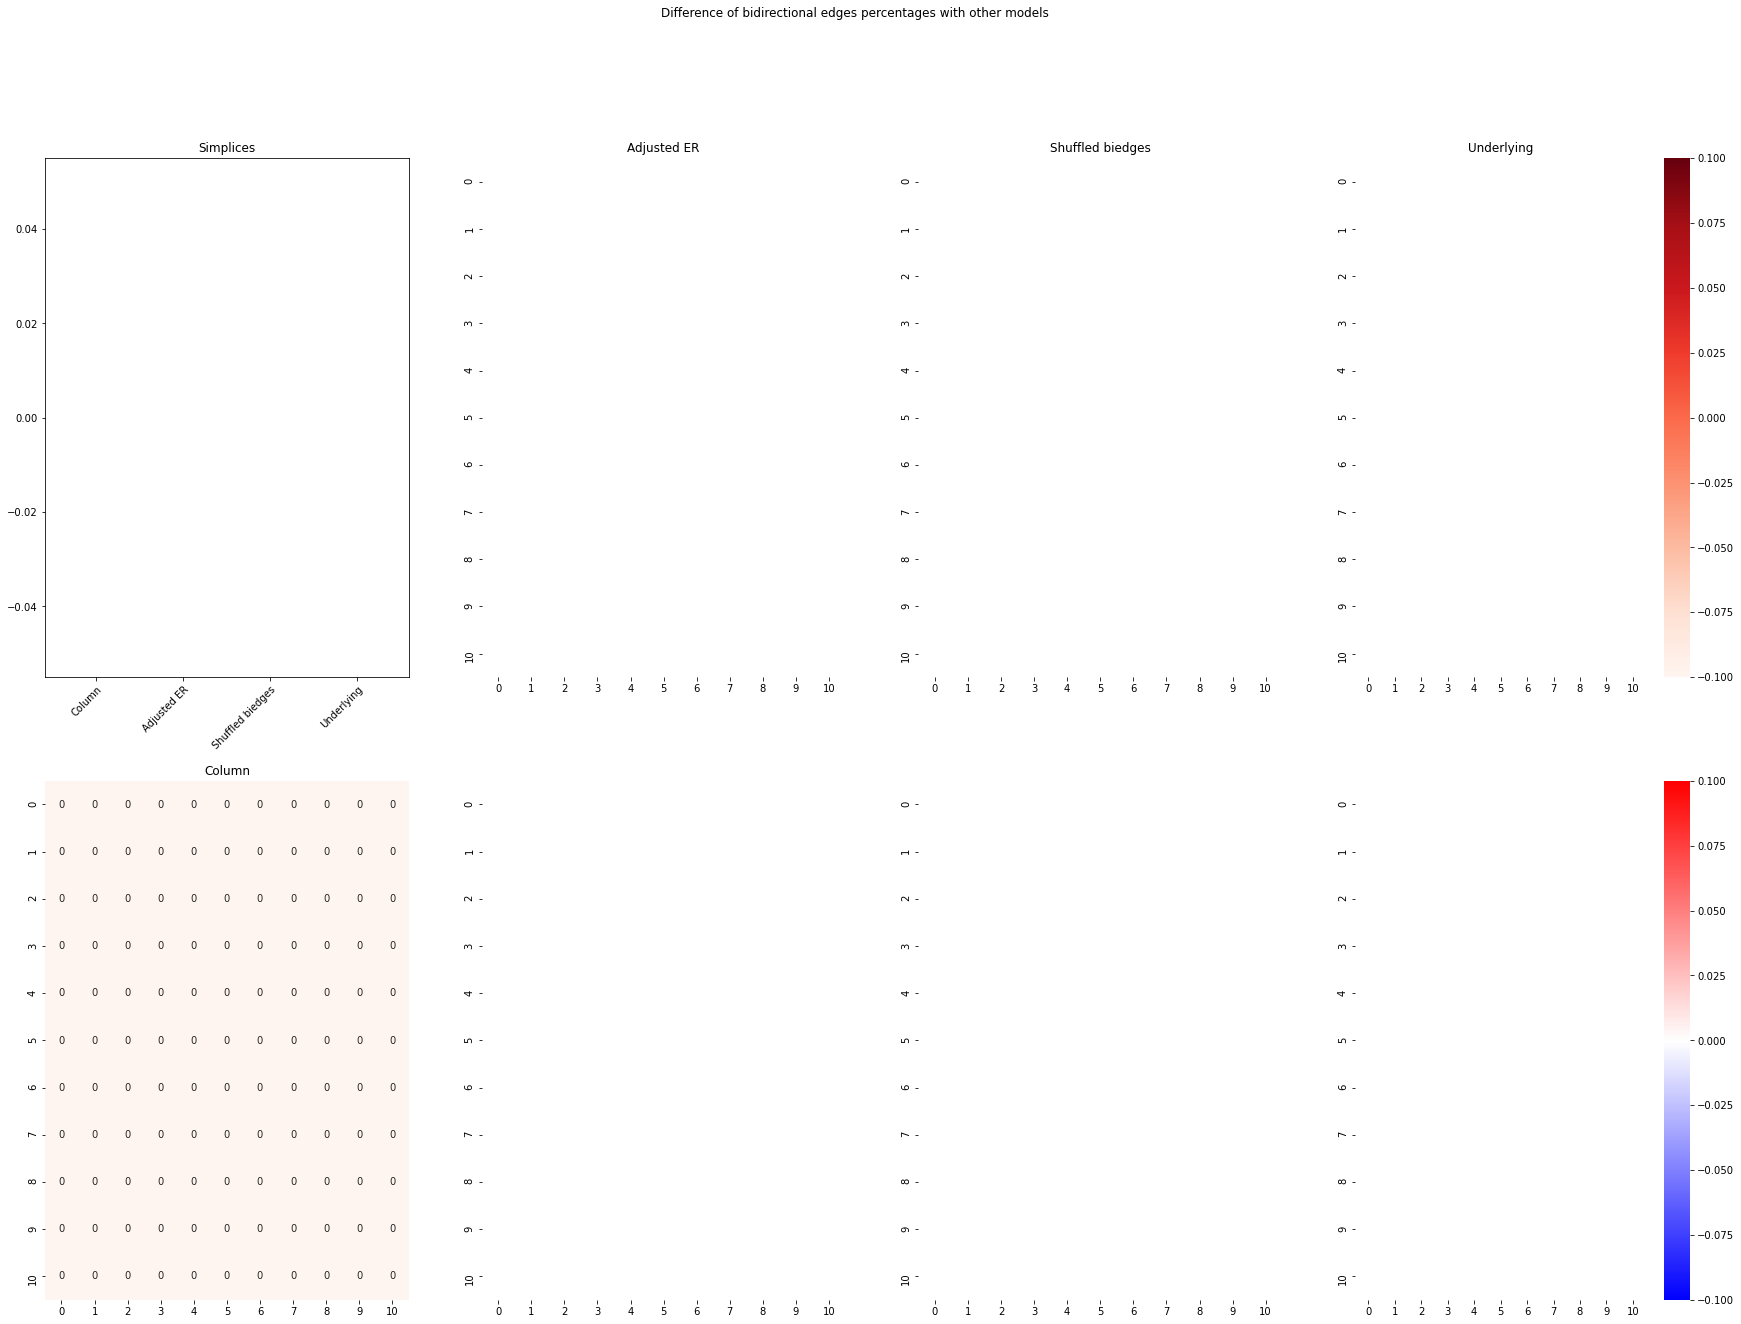

In [22]:
compare_graphs_diff_percent([a,b0,c0,d0], 1, "difference_percent")

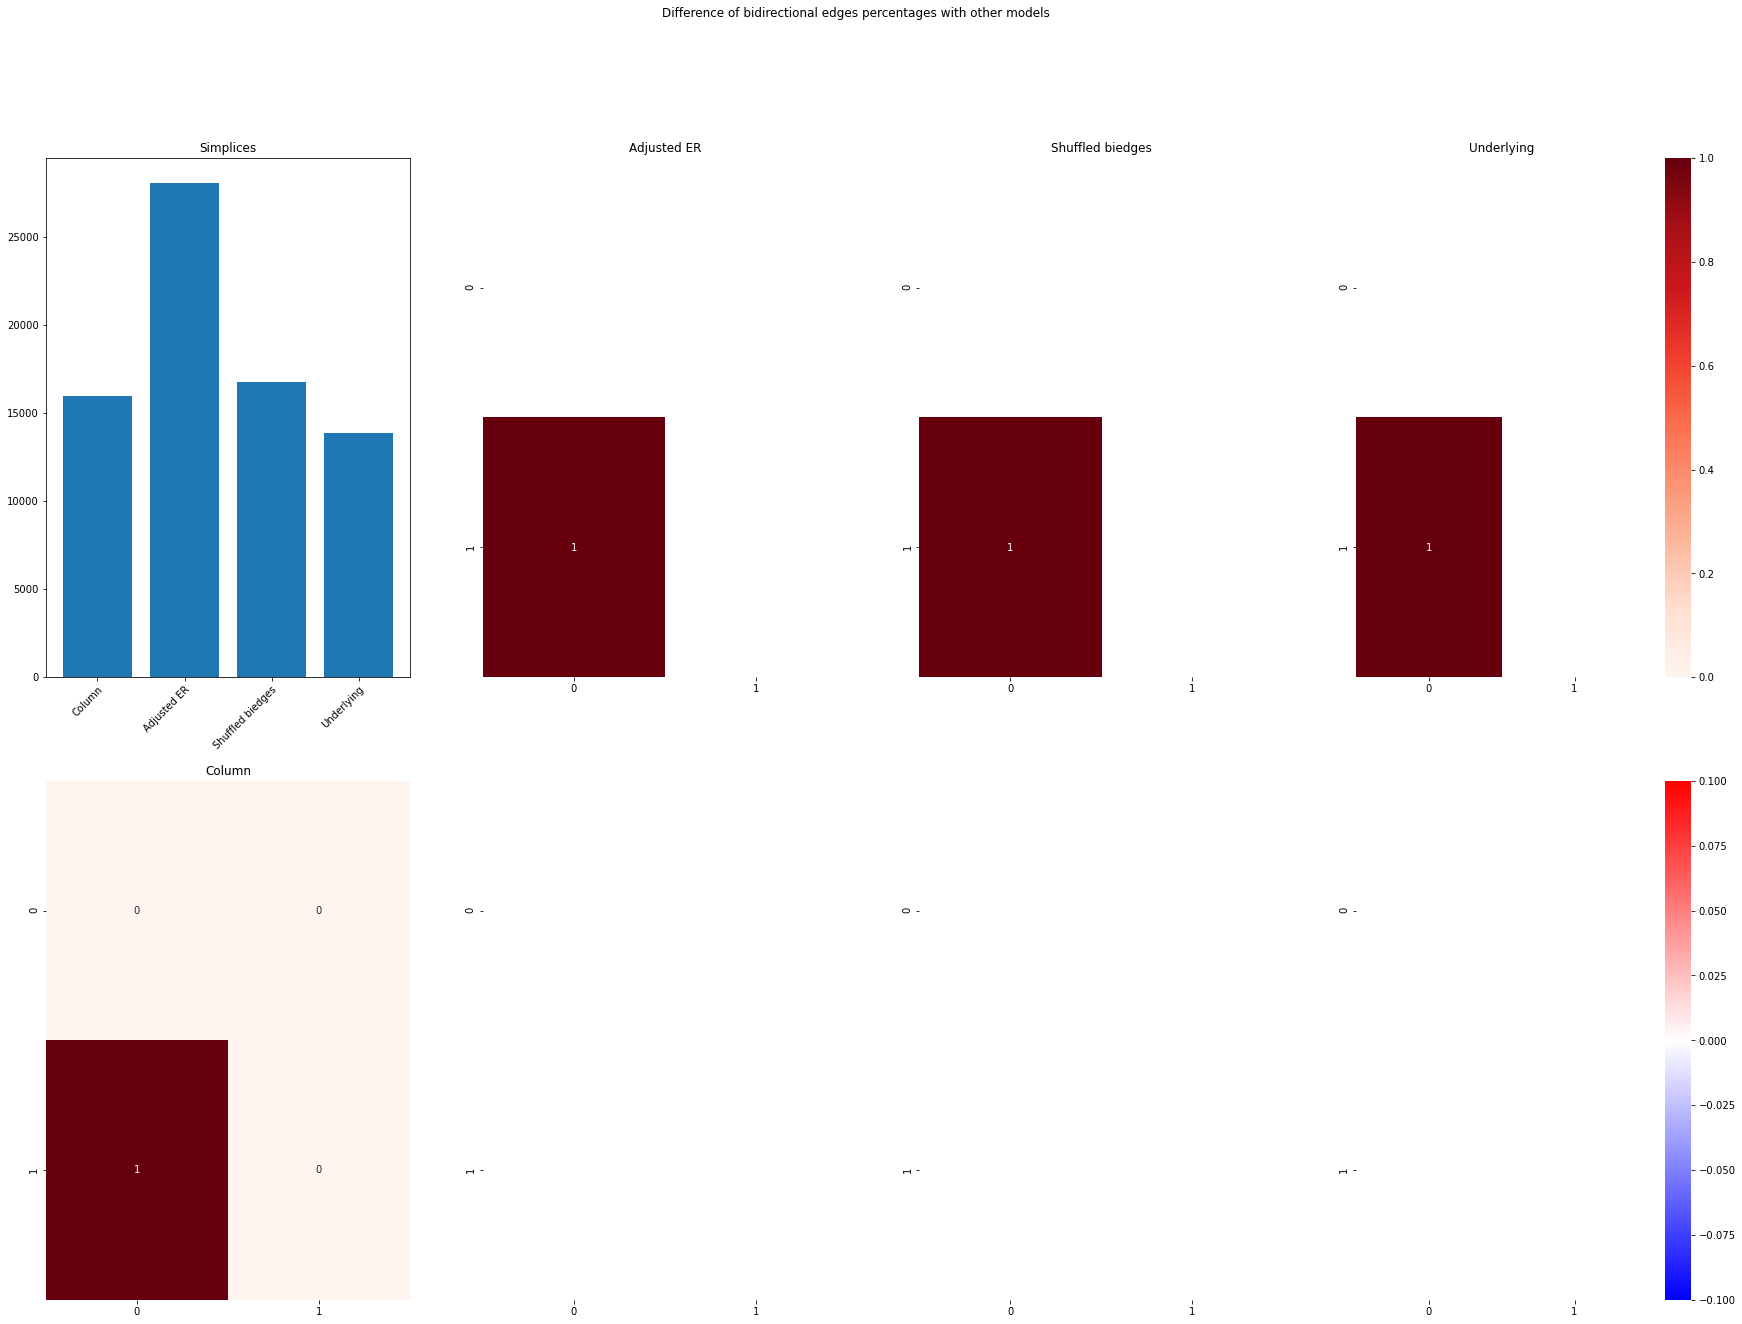

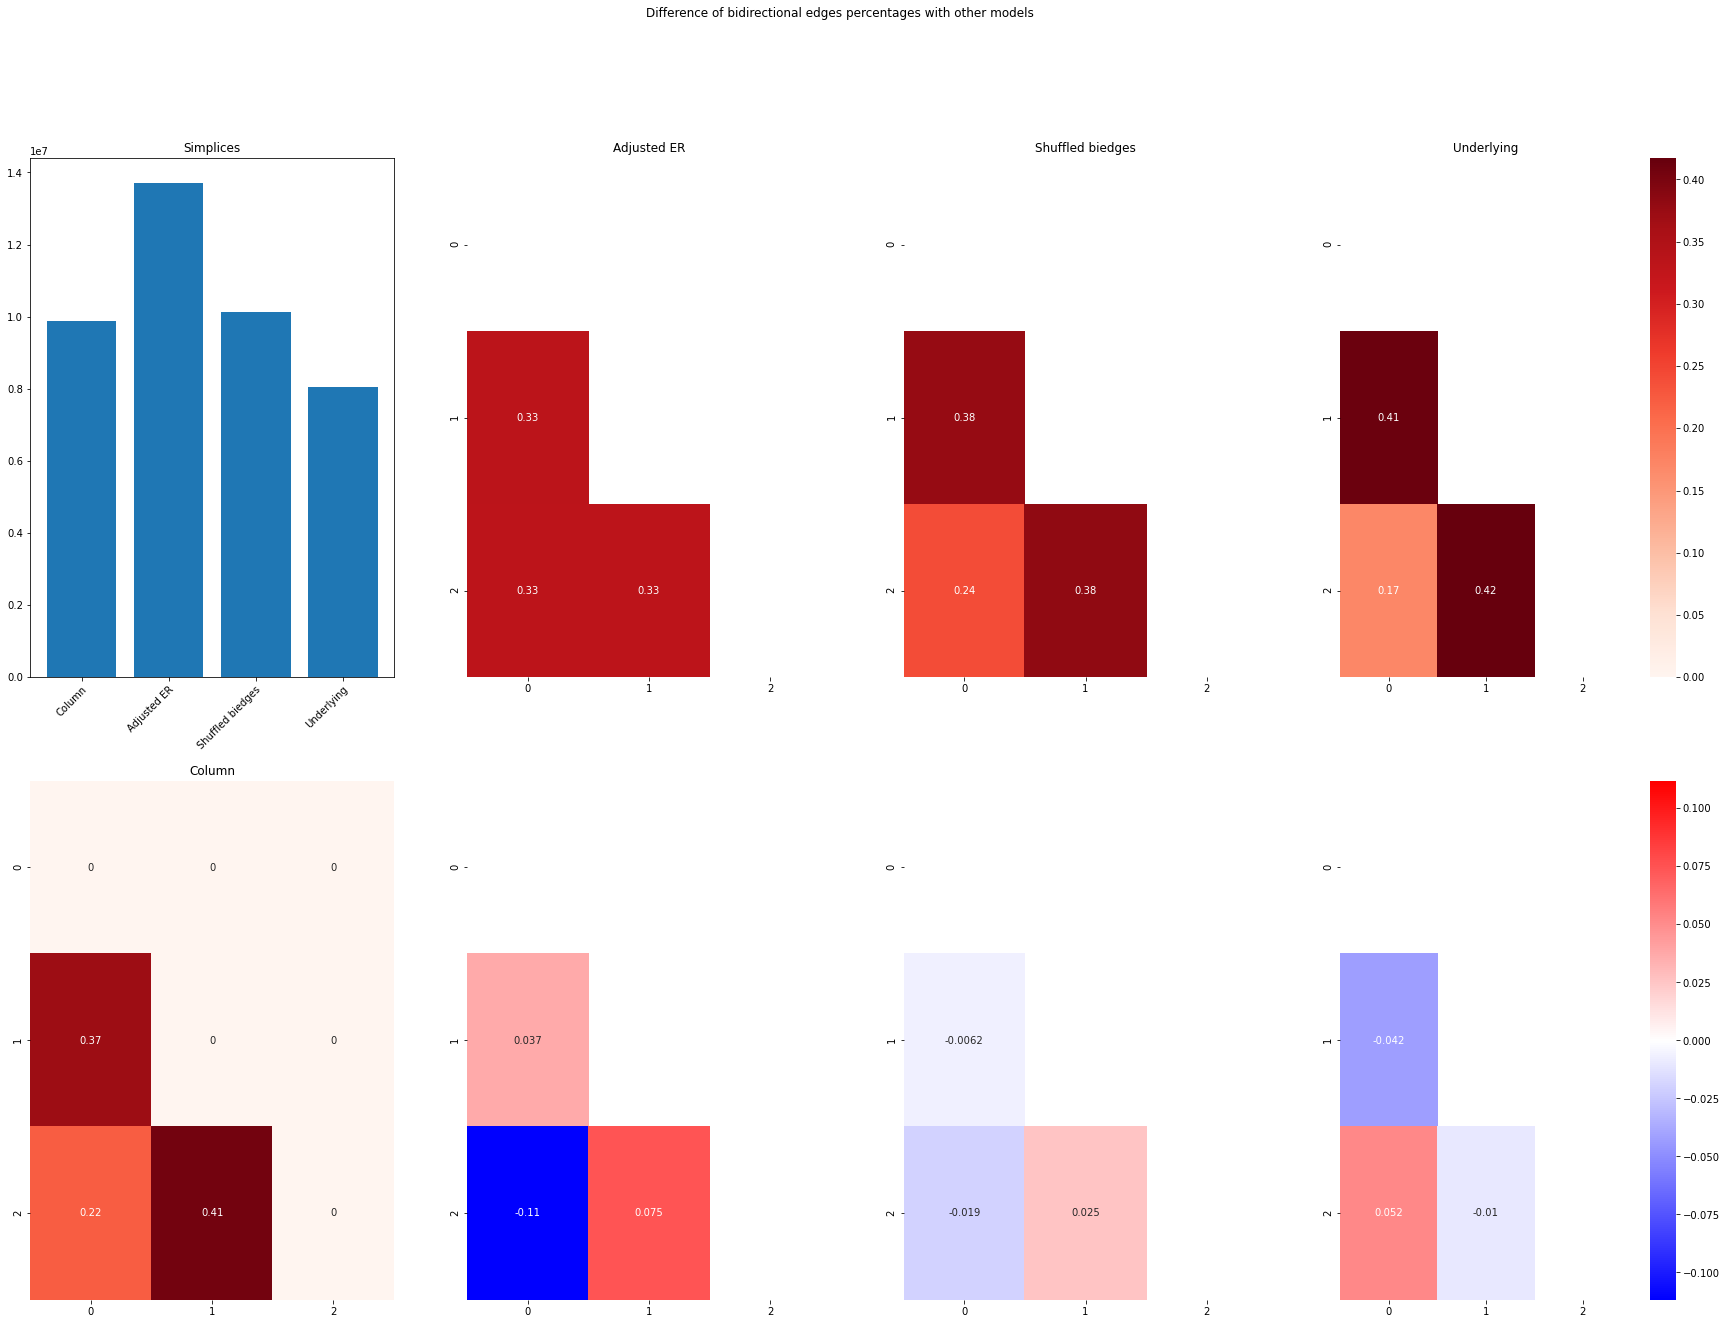

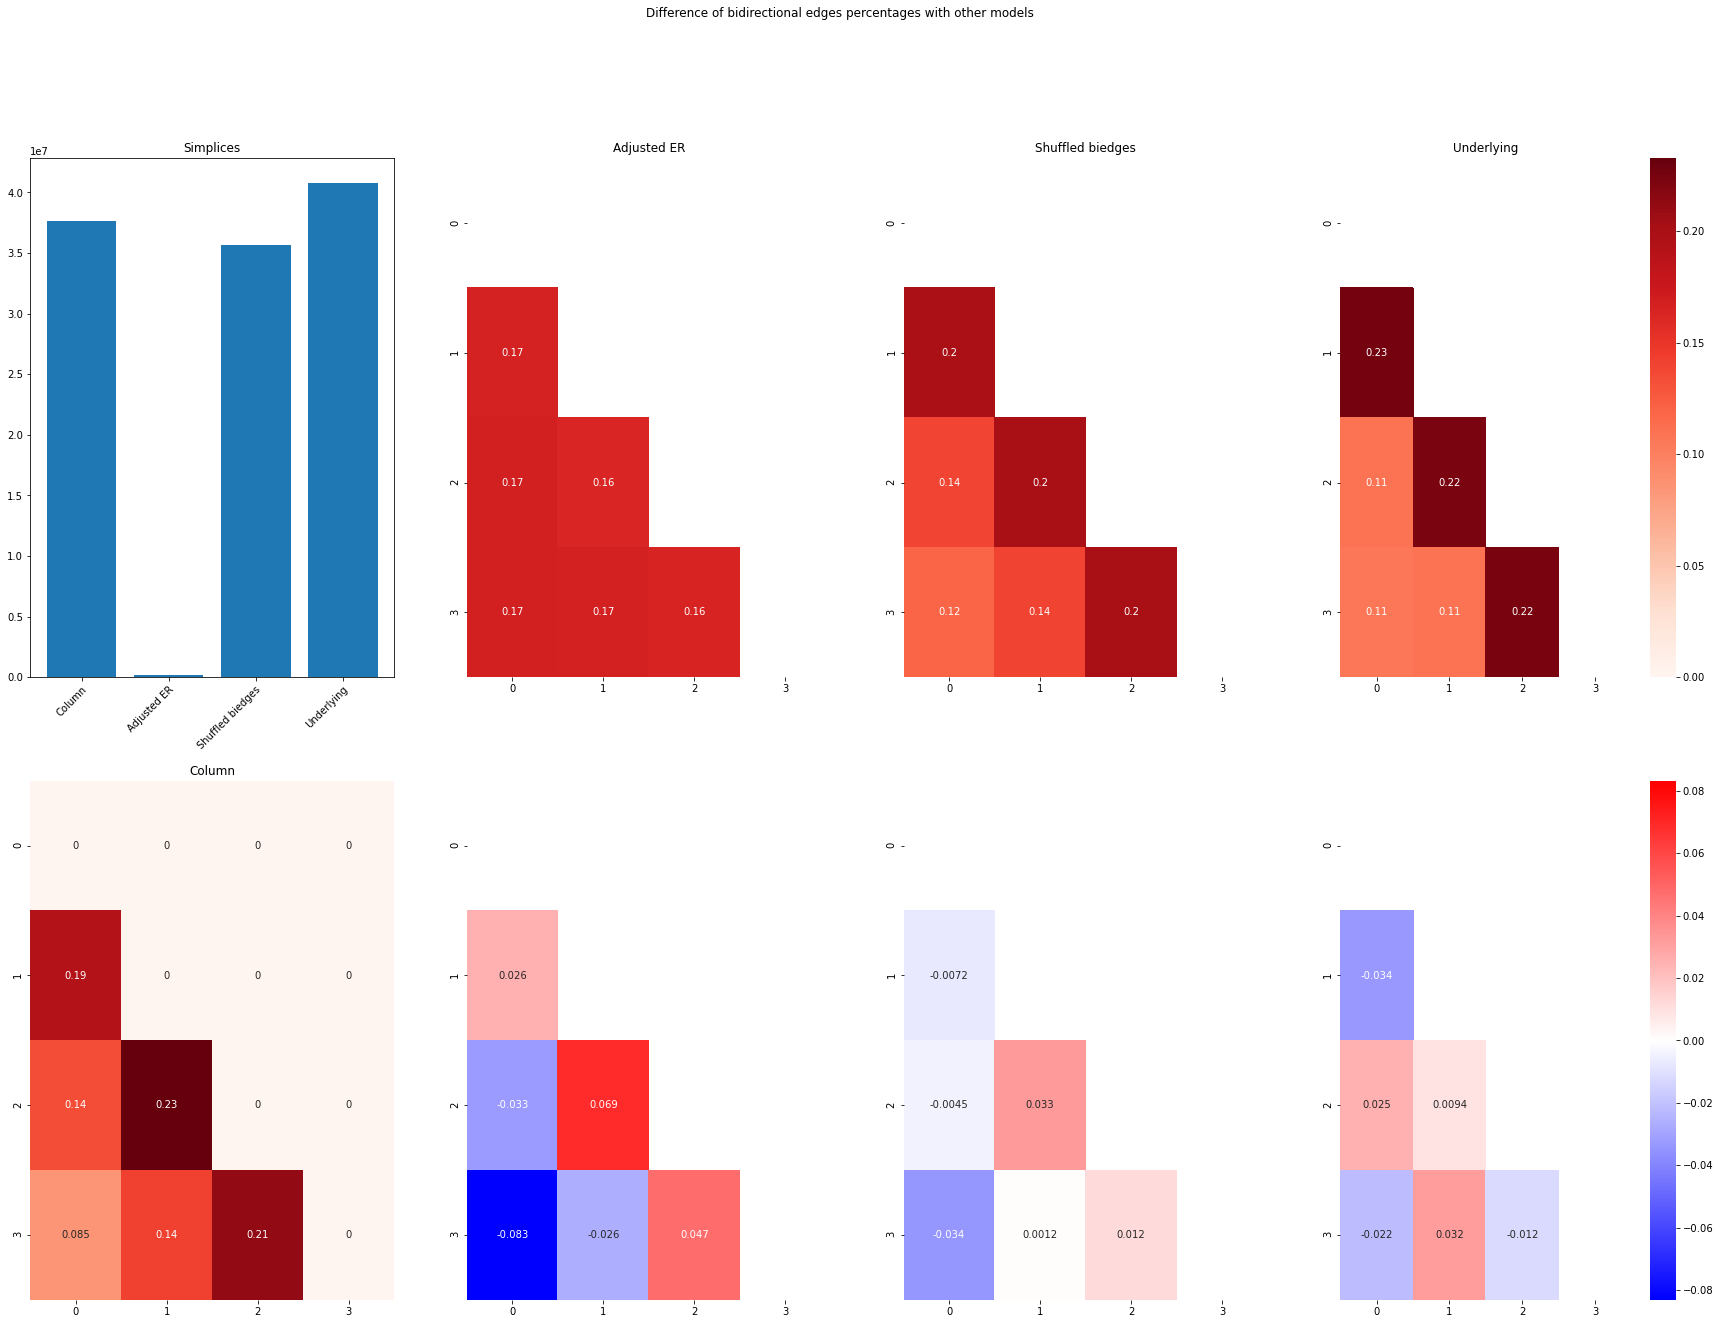

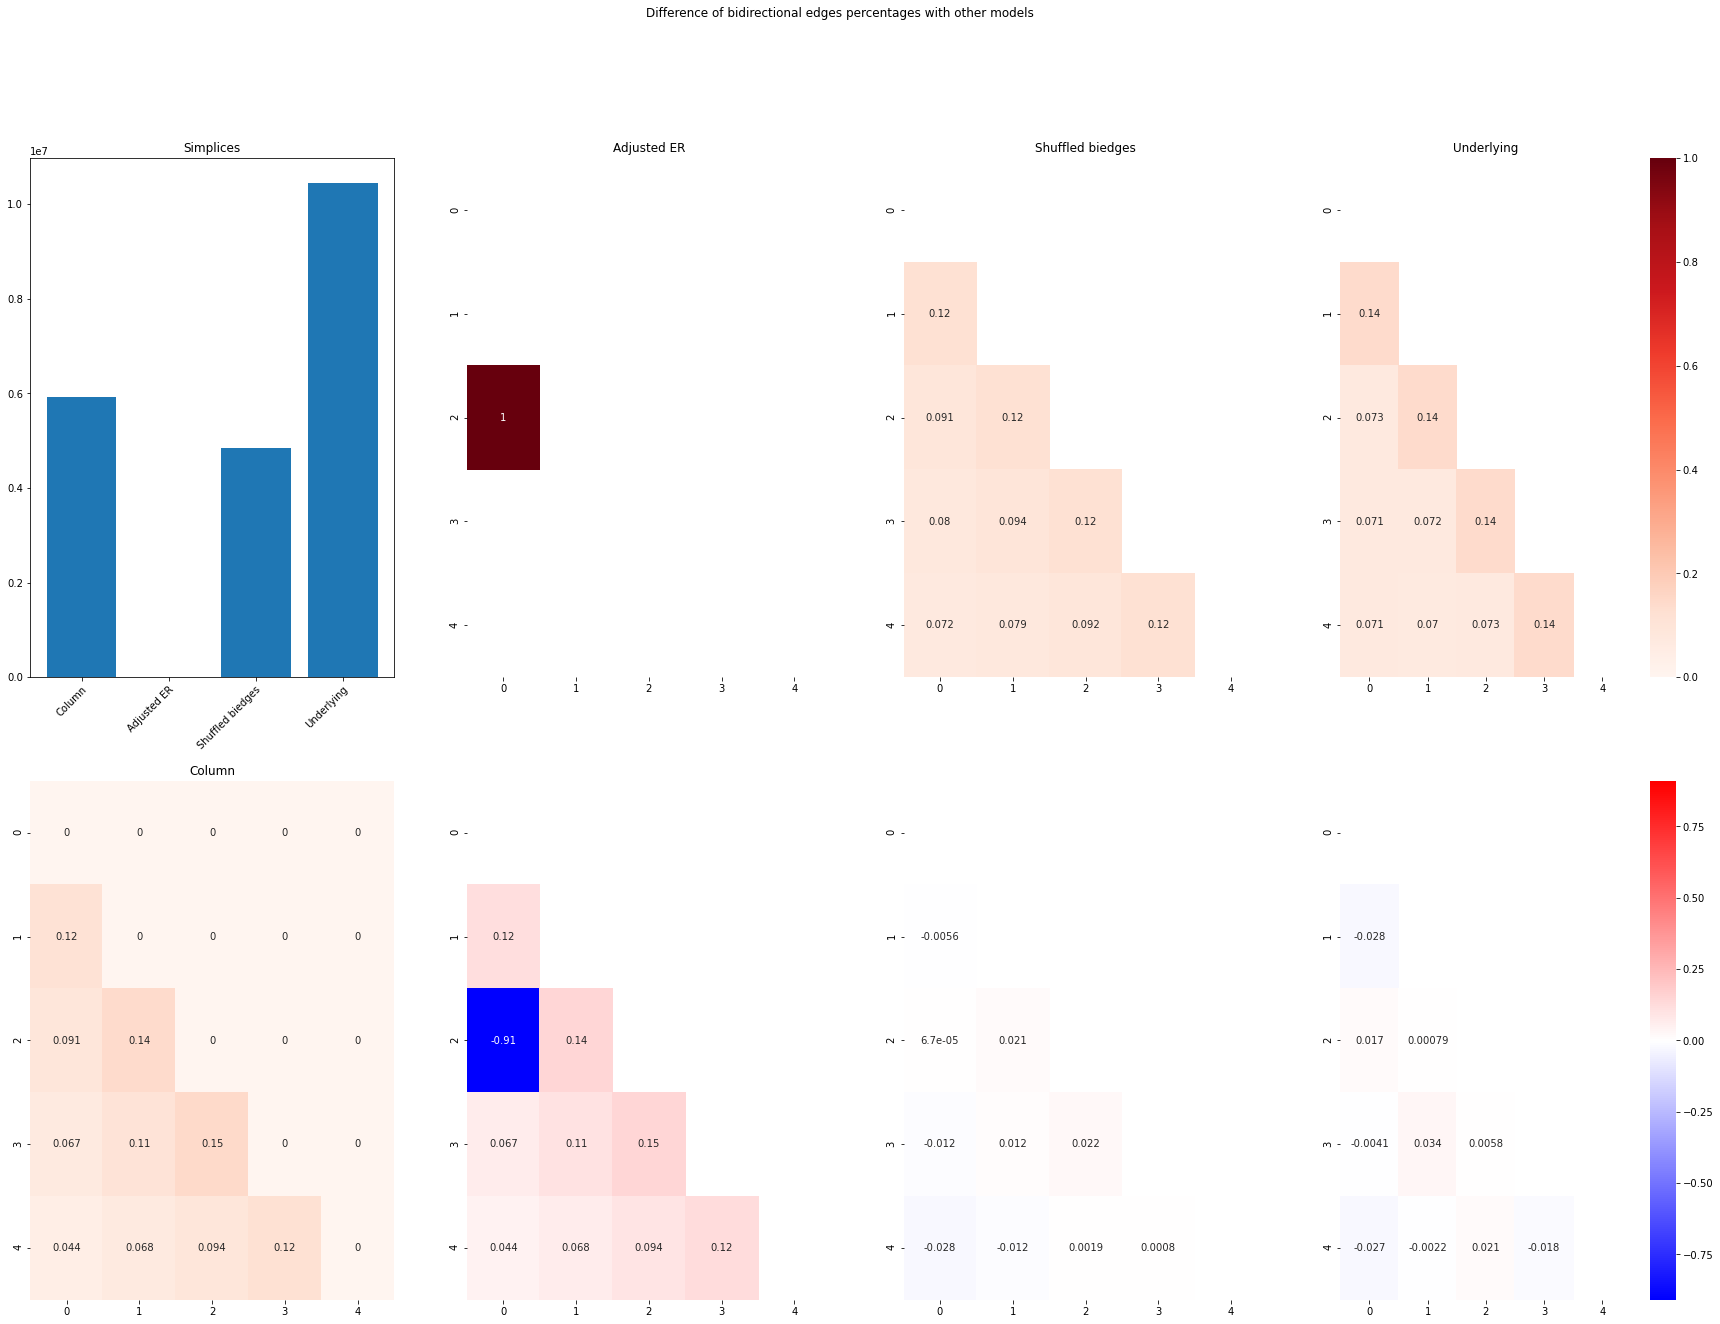

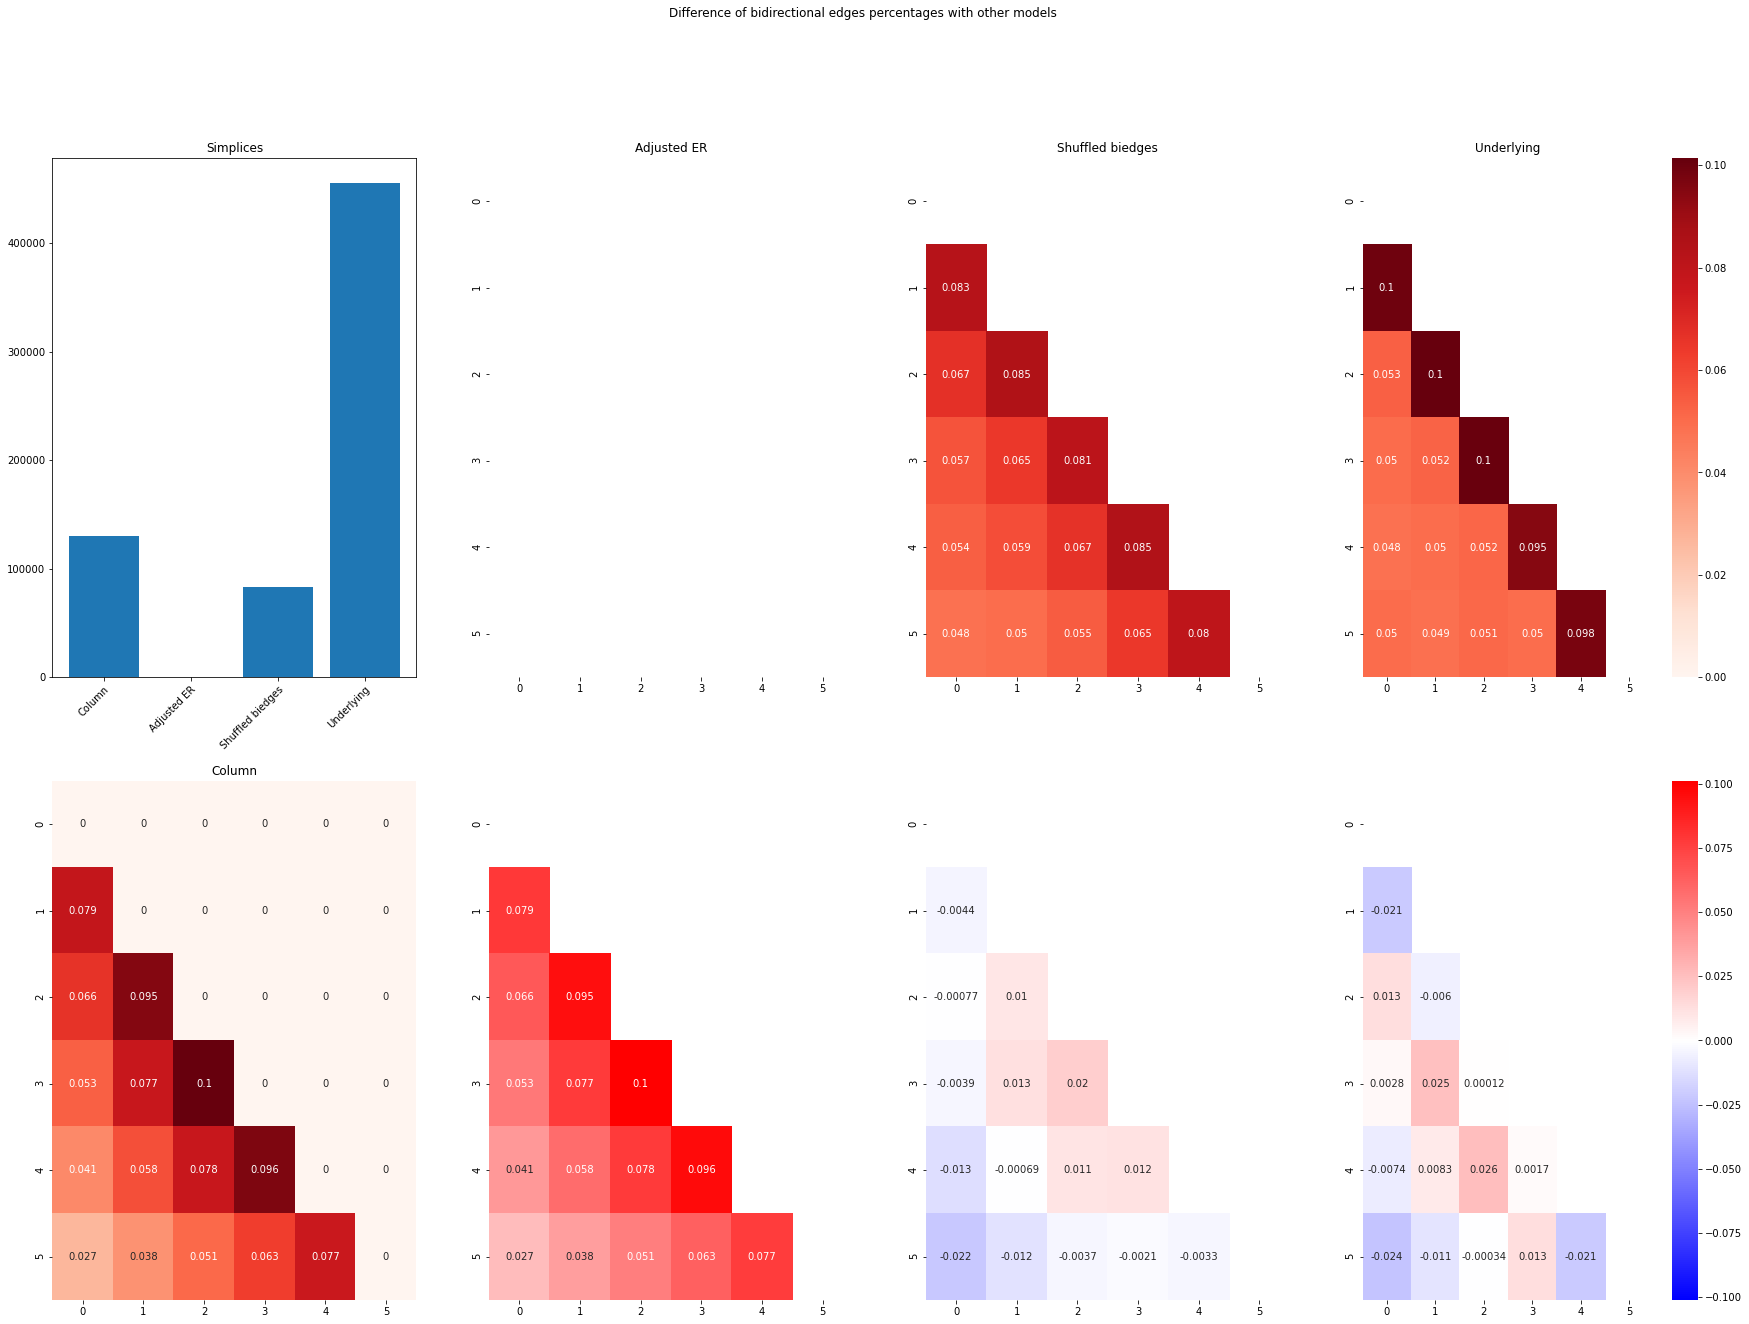

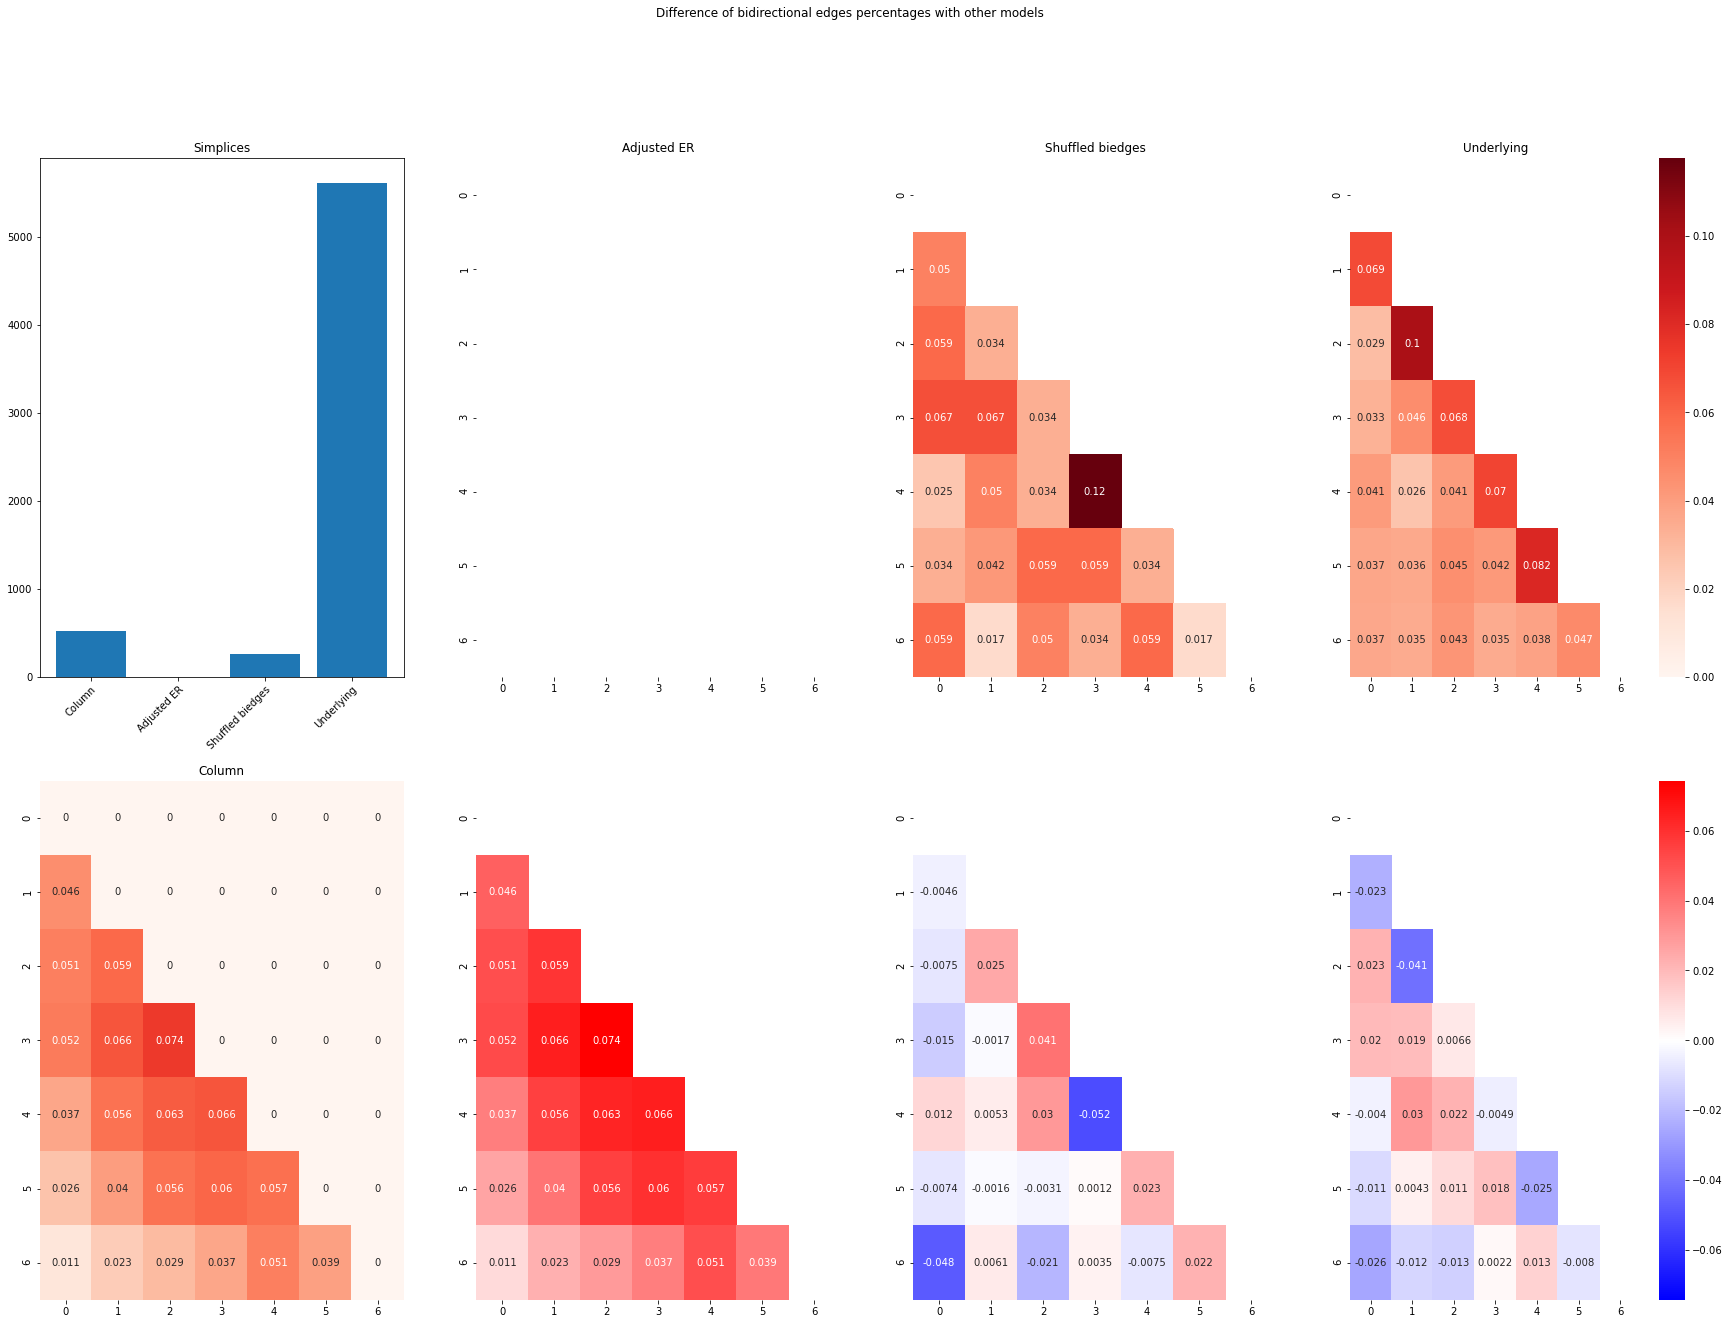

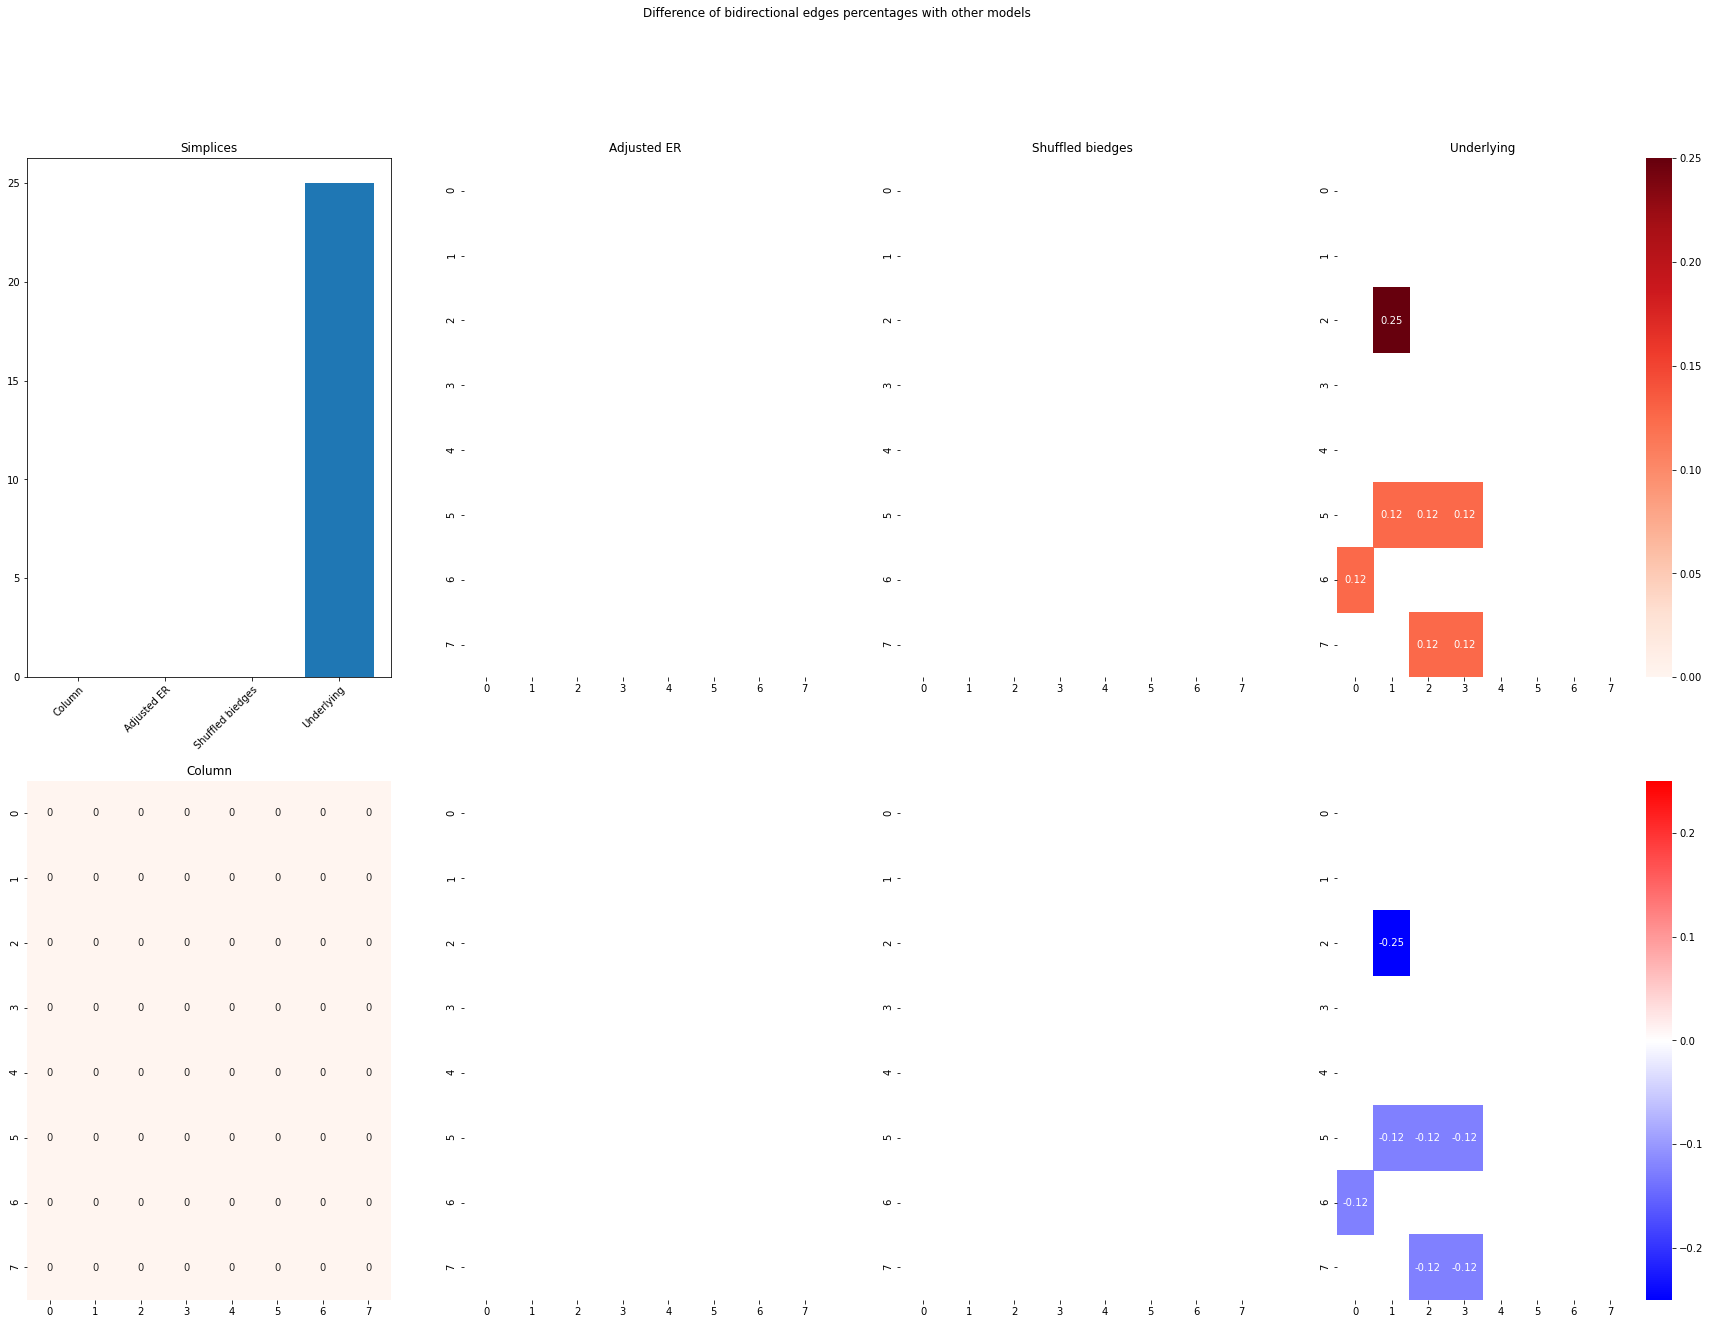

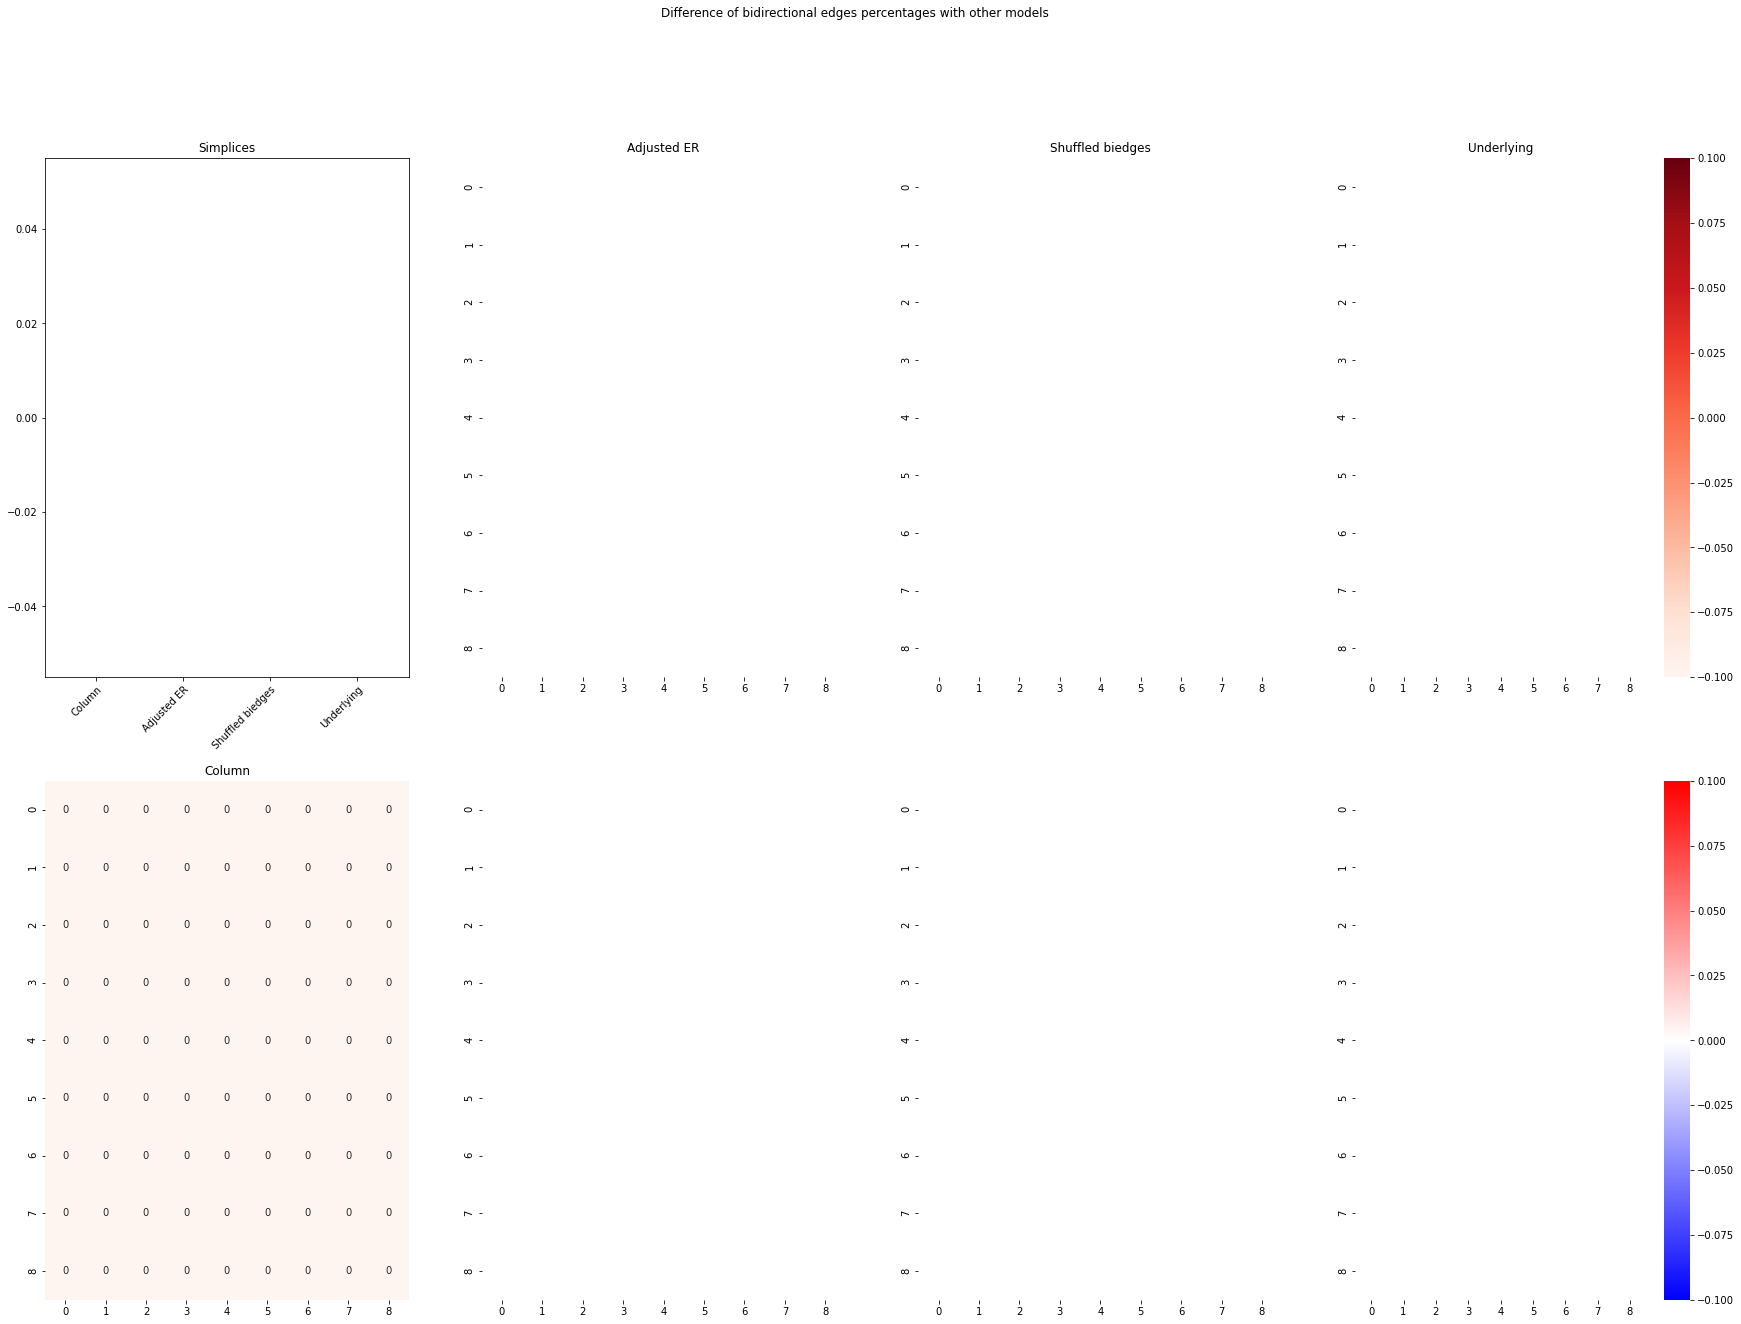

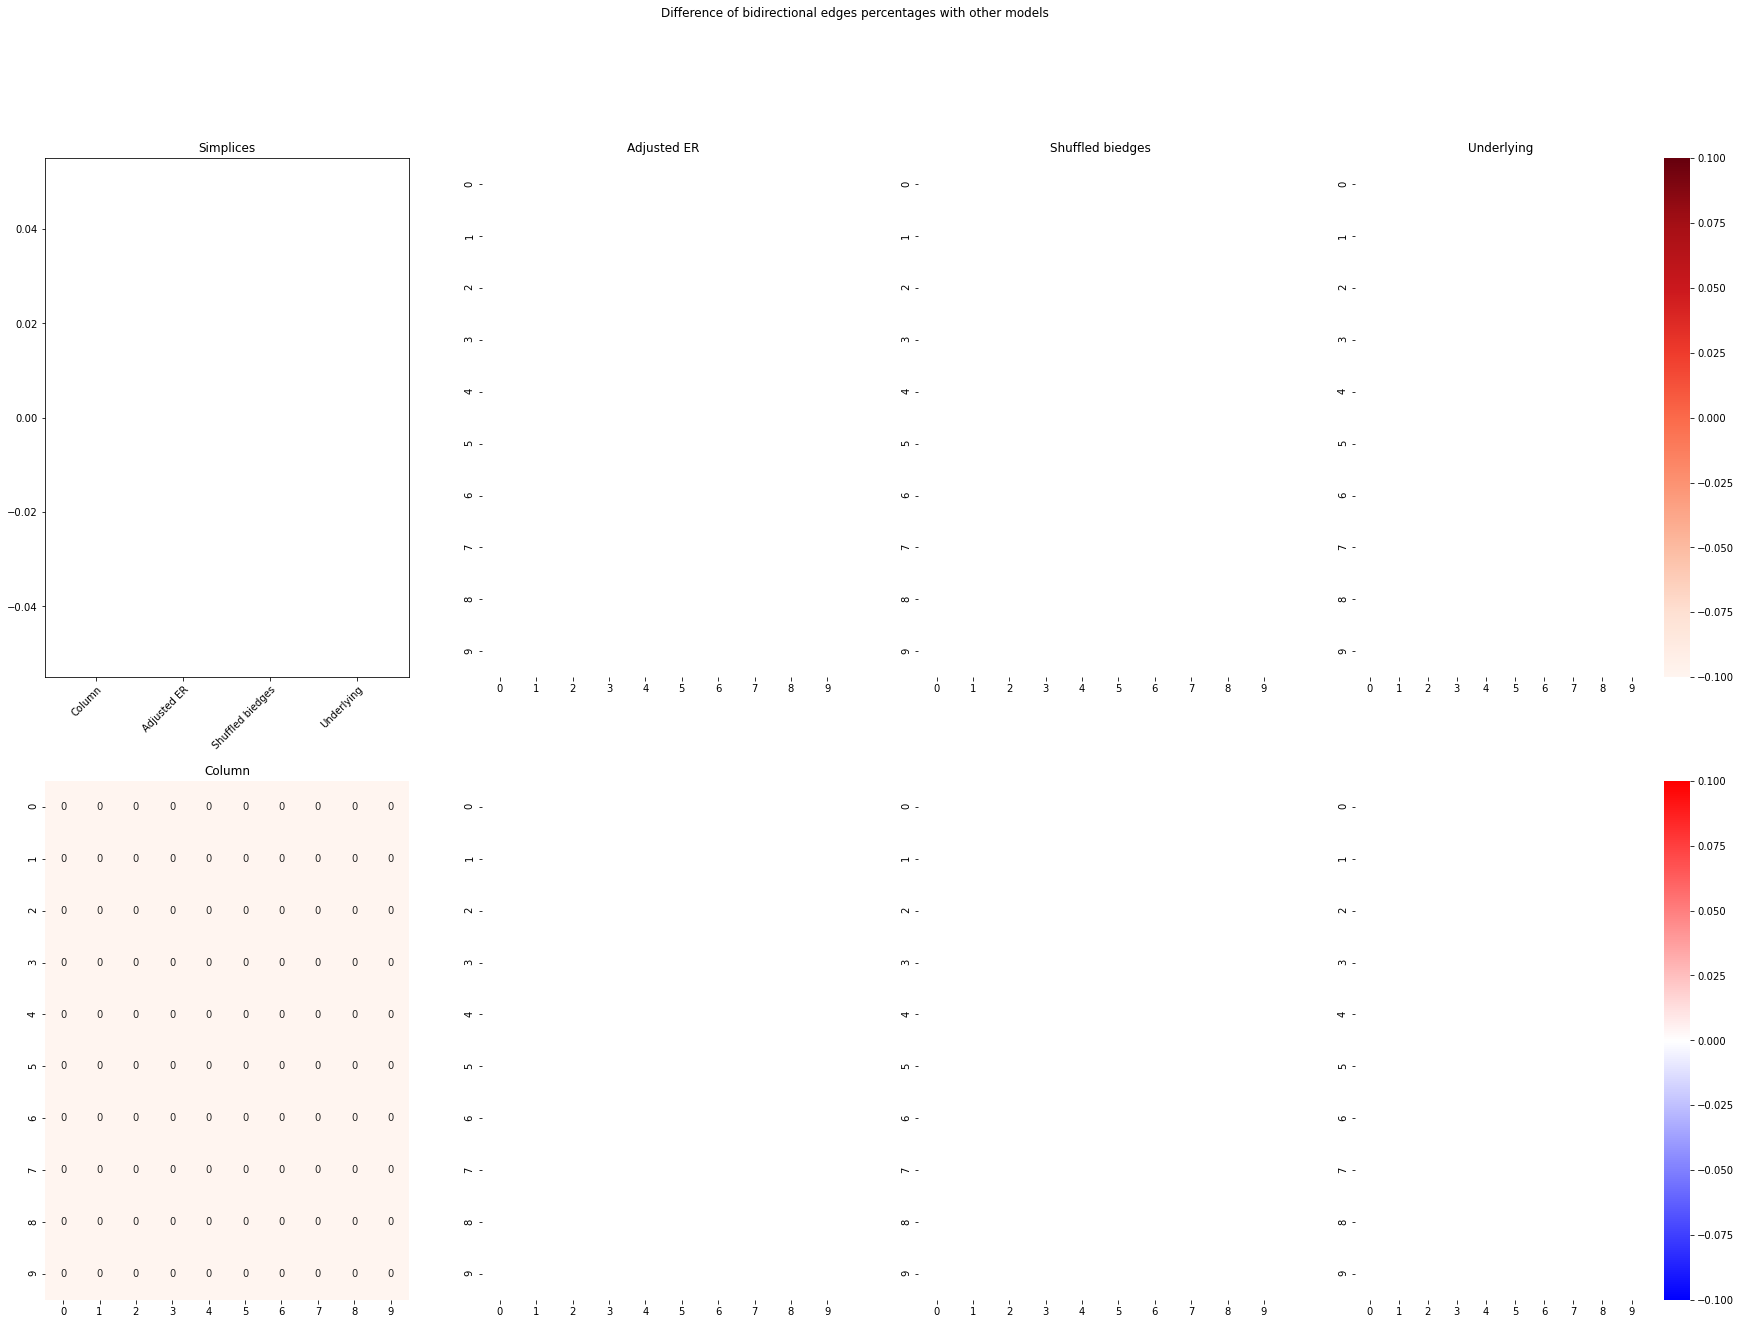

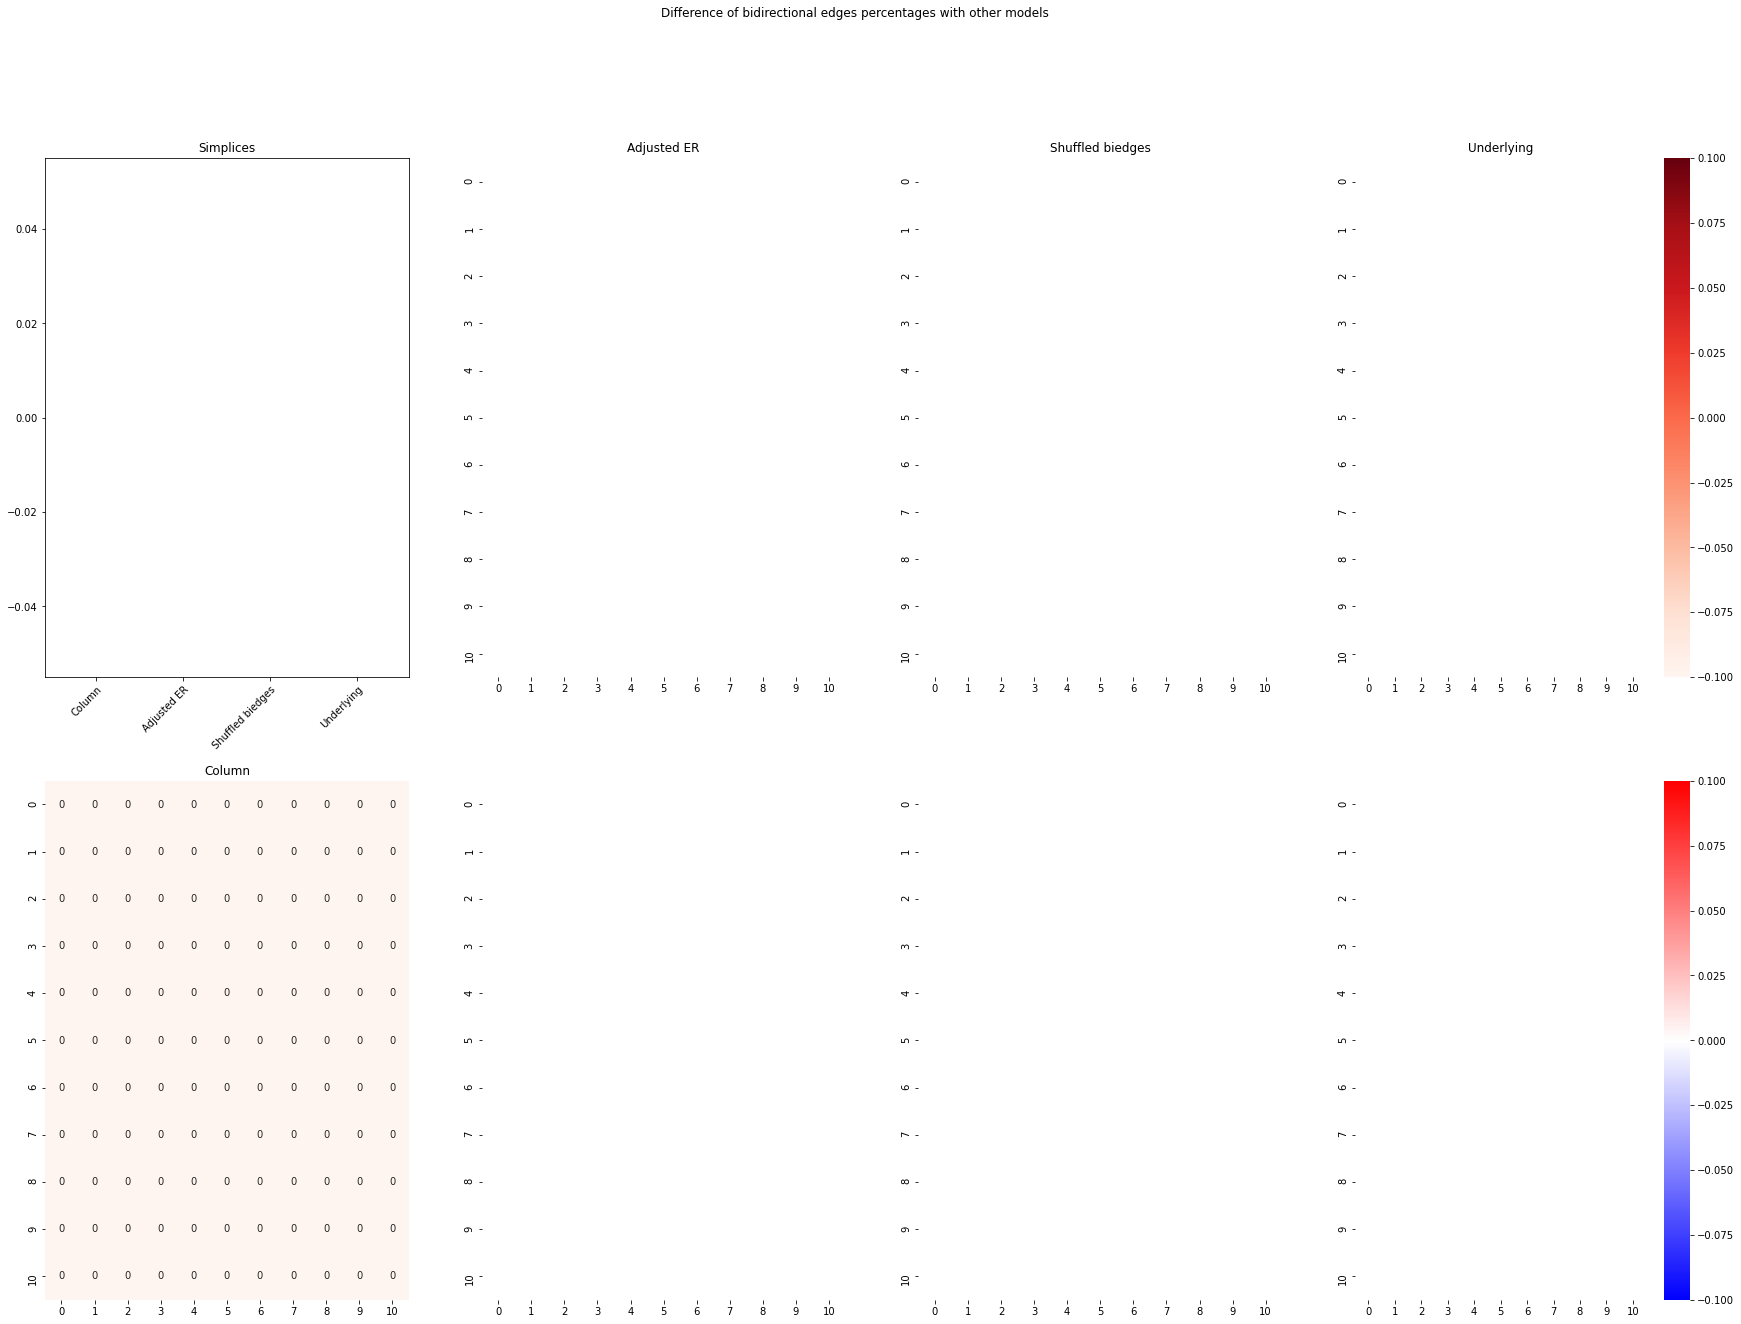

In [23]:
compare_graphs_diff_percent([amax,bmax,cmax,dmax], 1, "maximal_difference_percent")

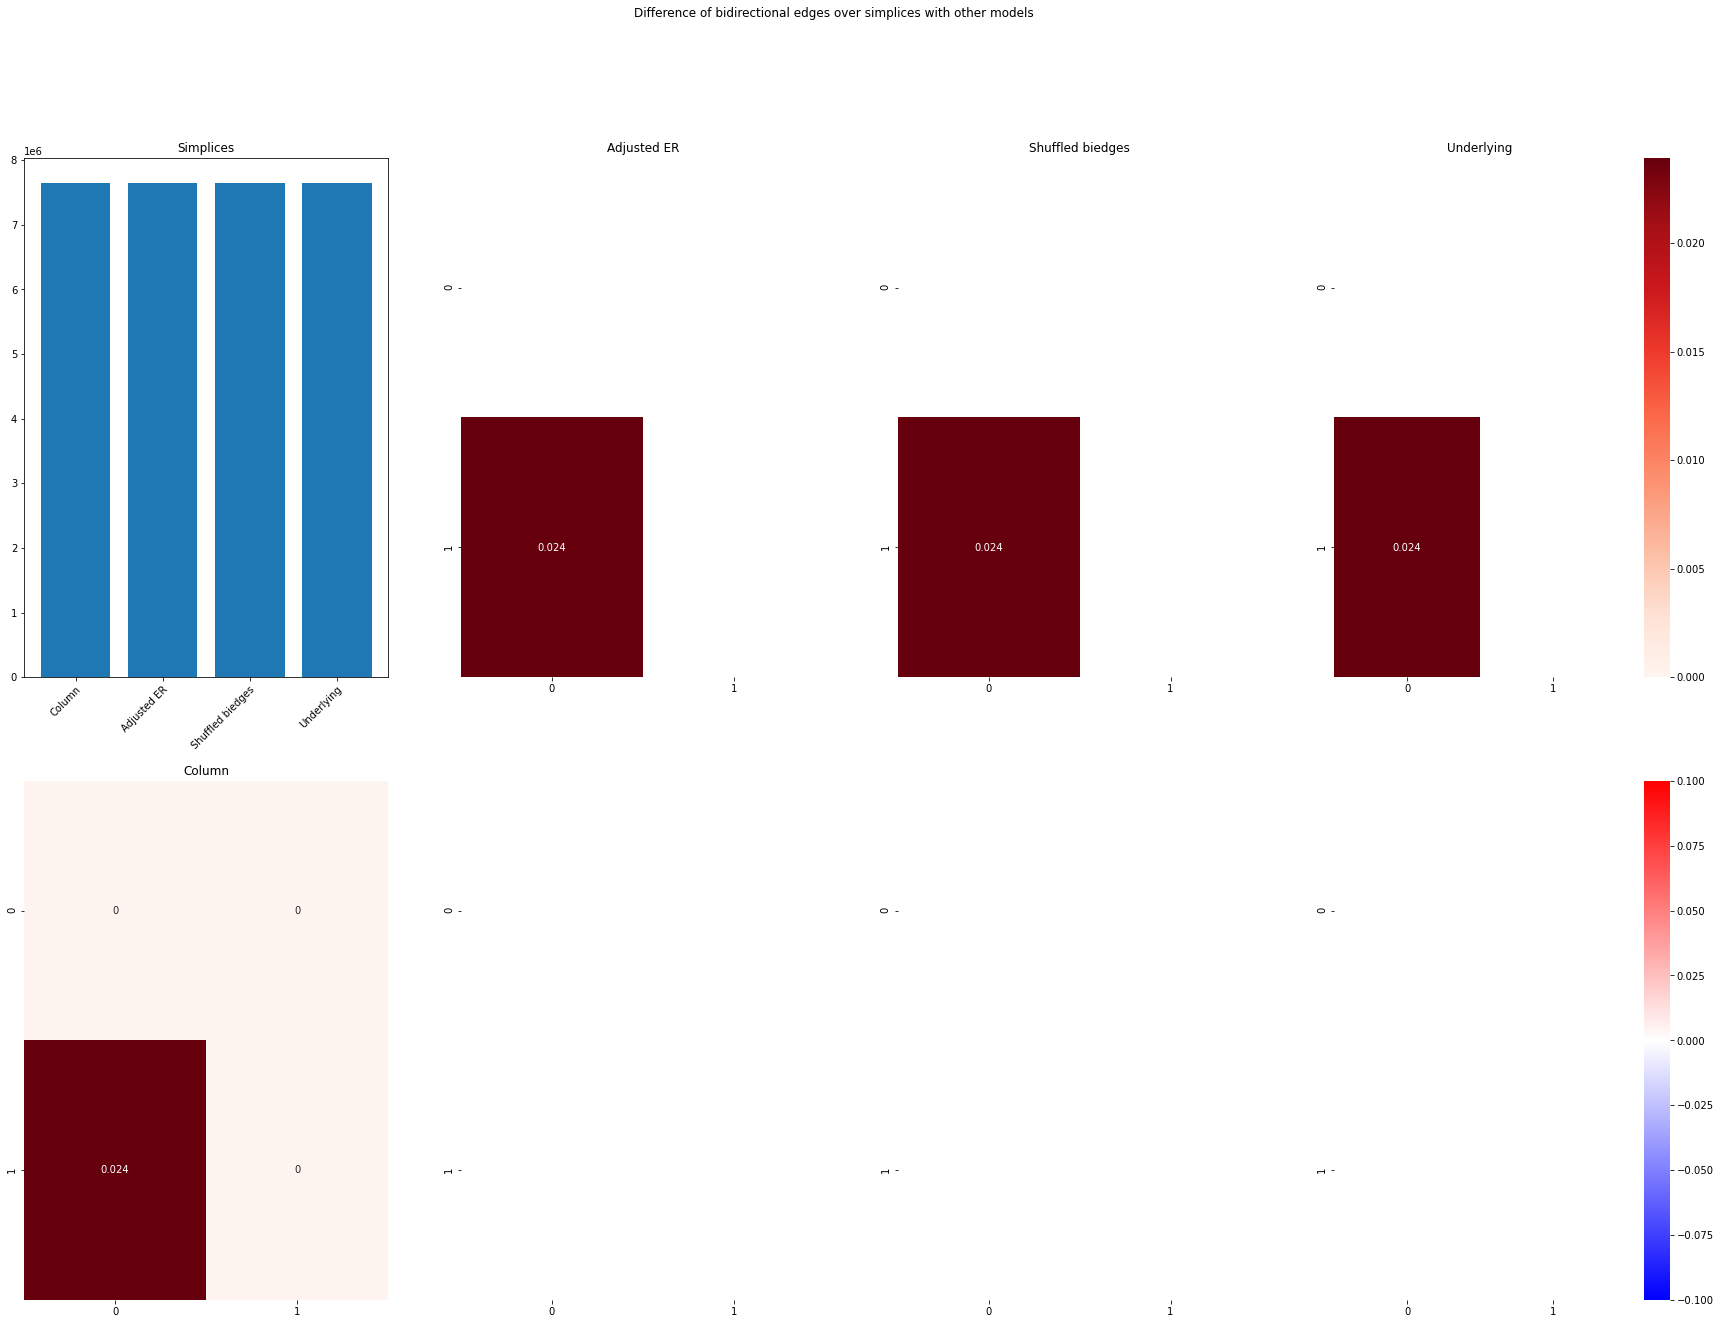

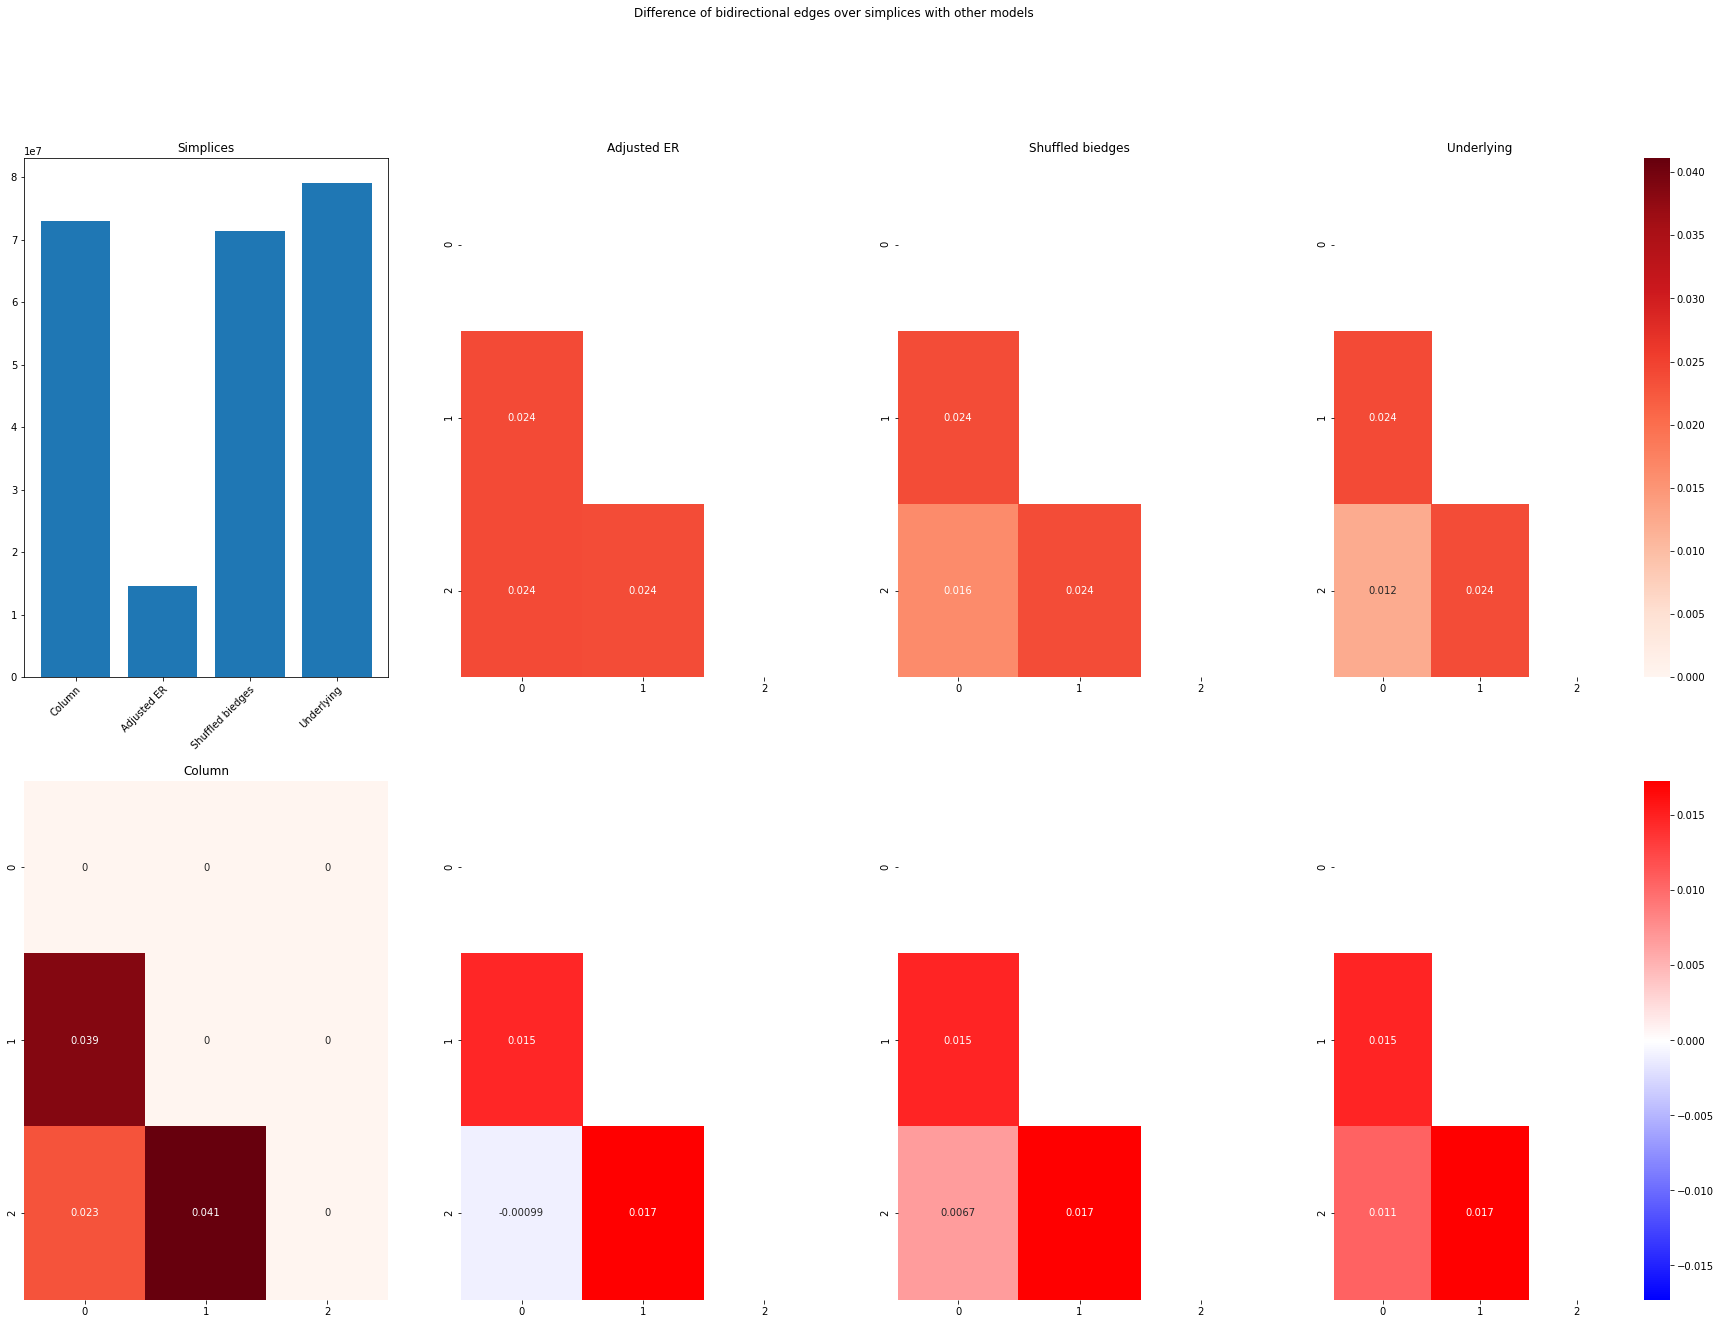

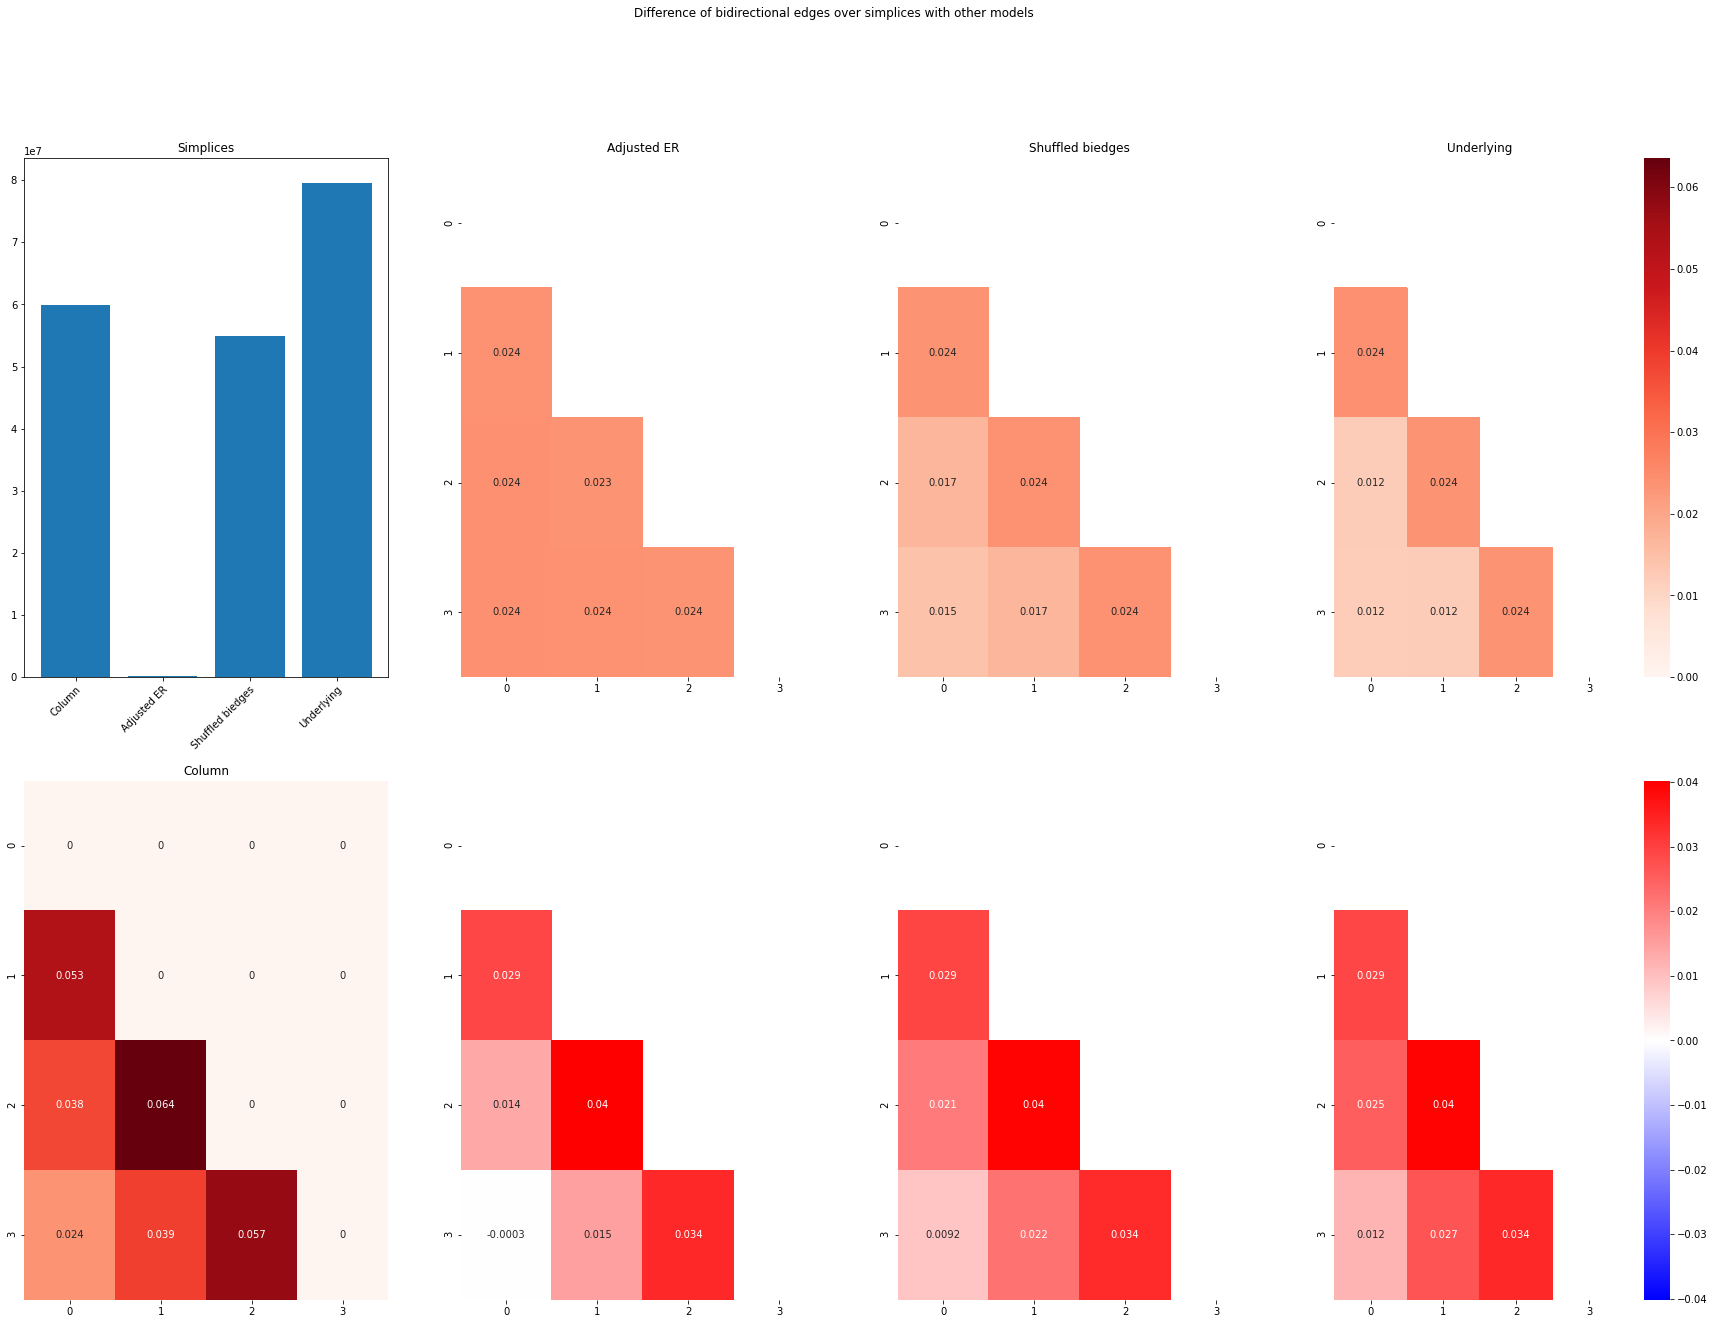

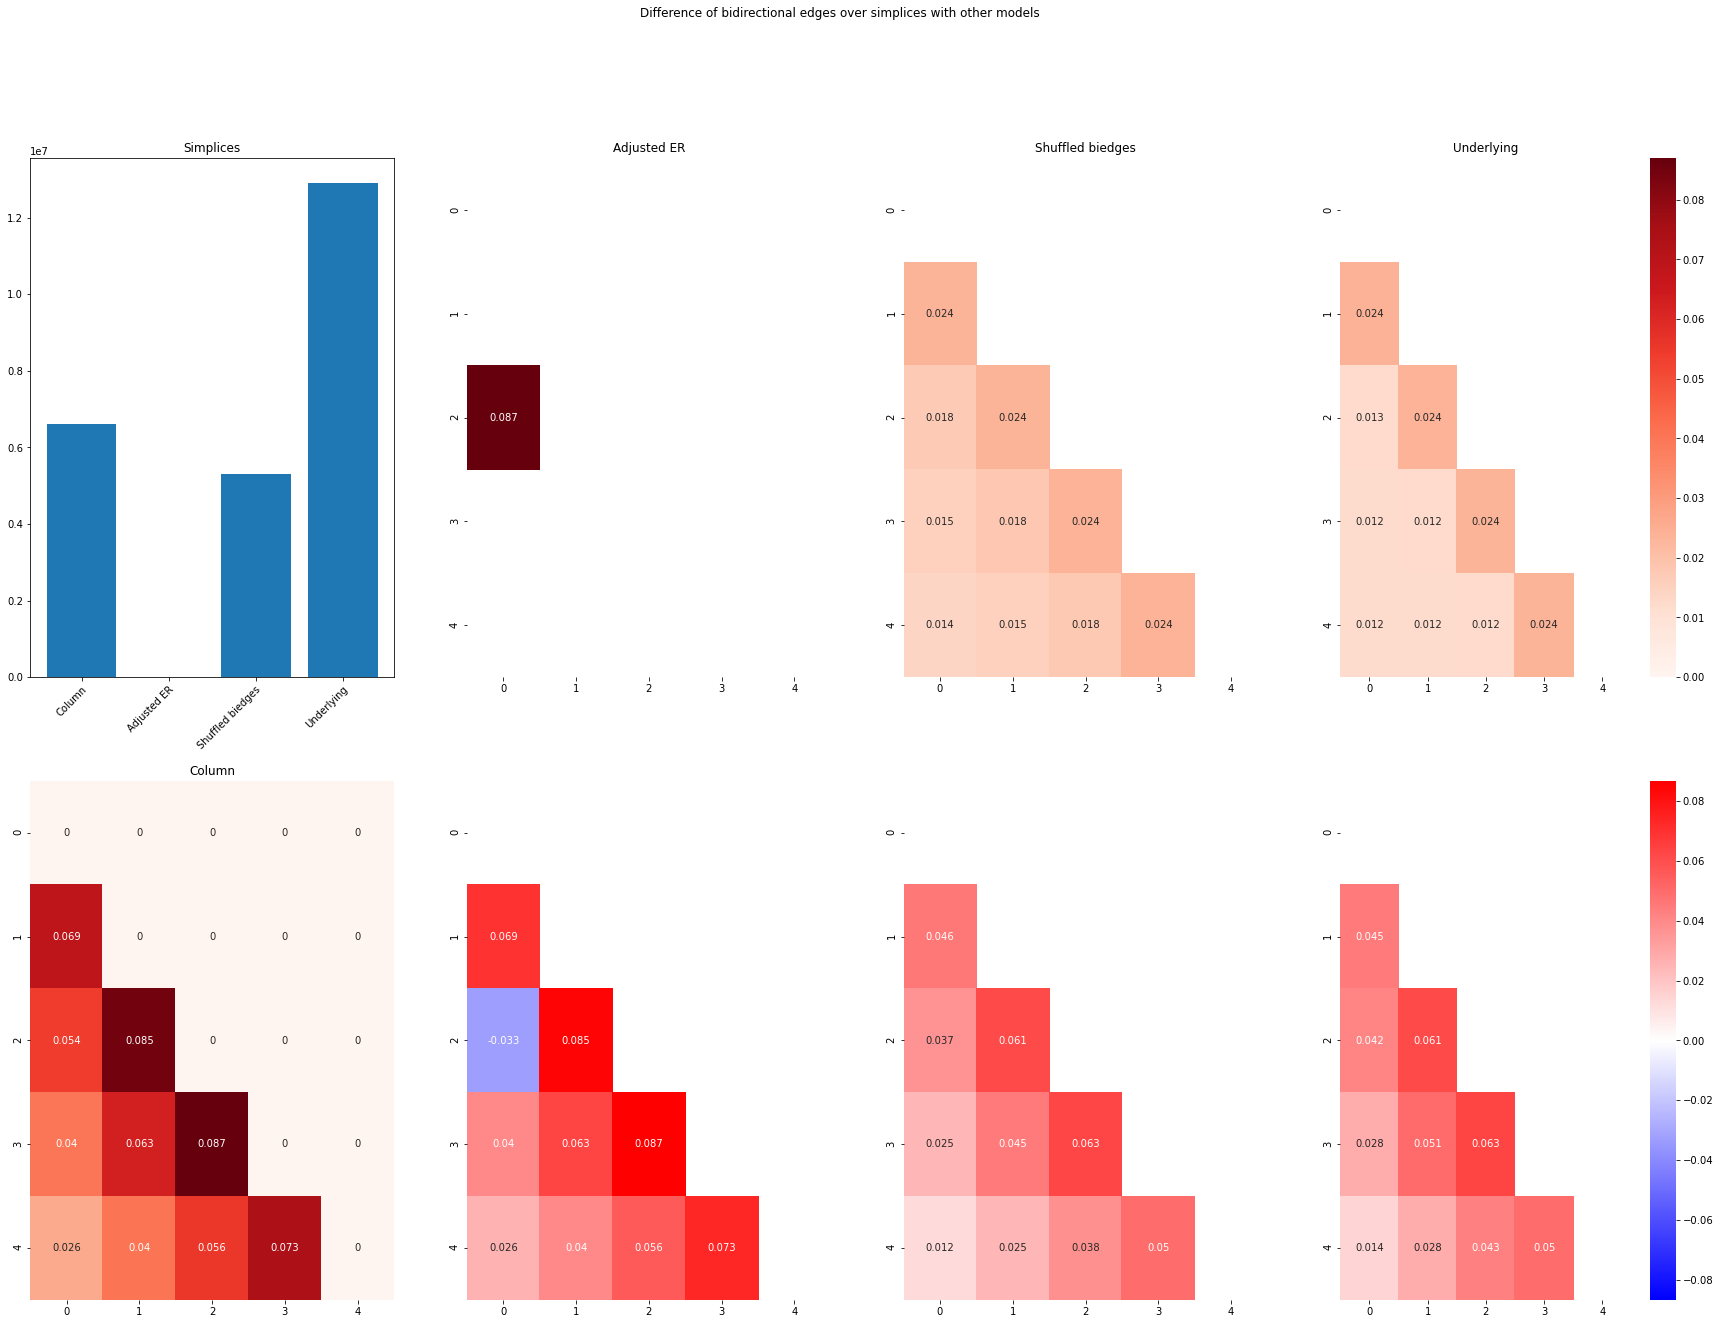

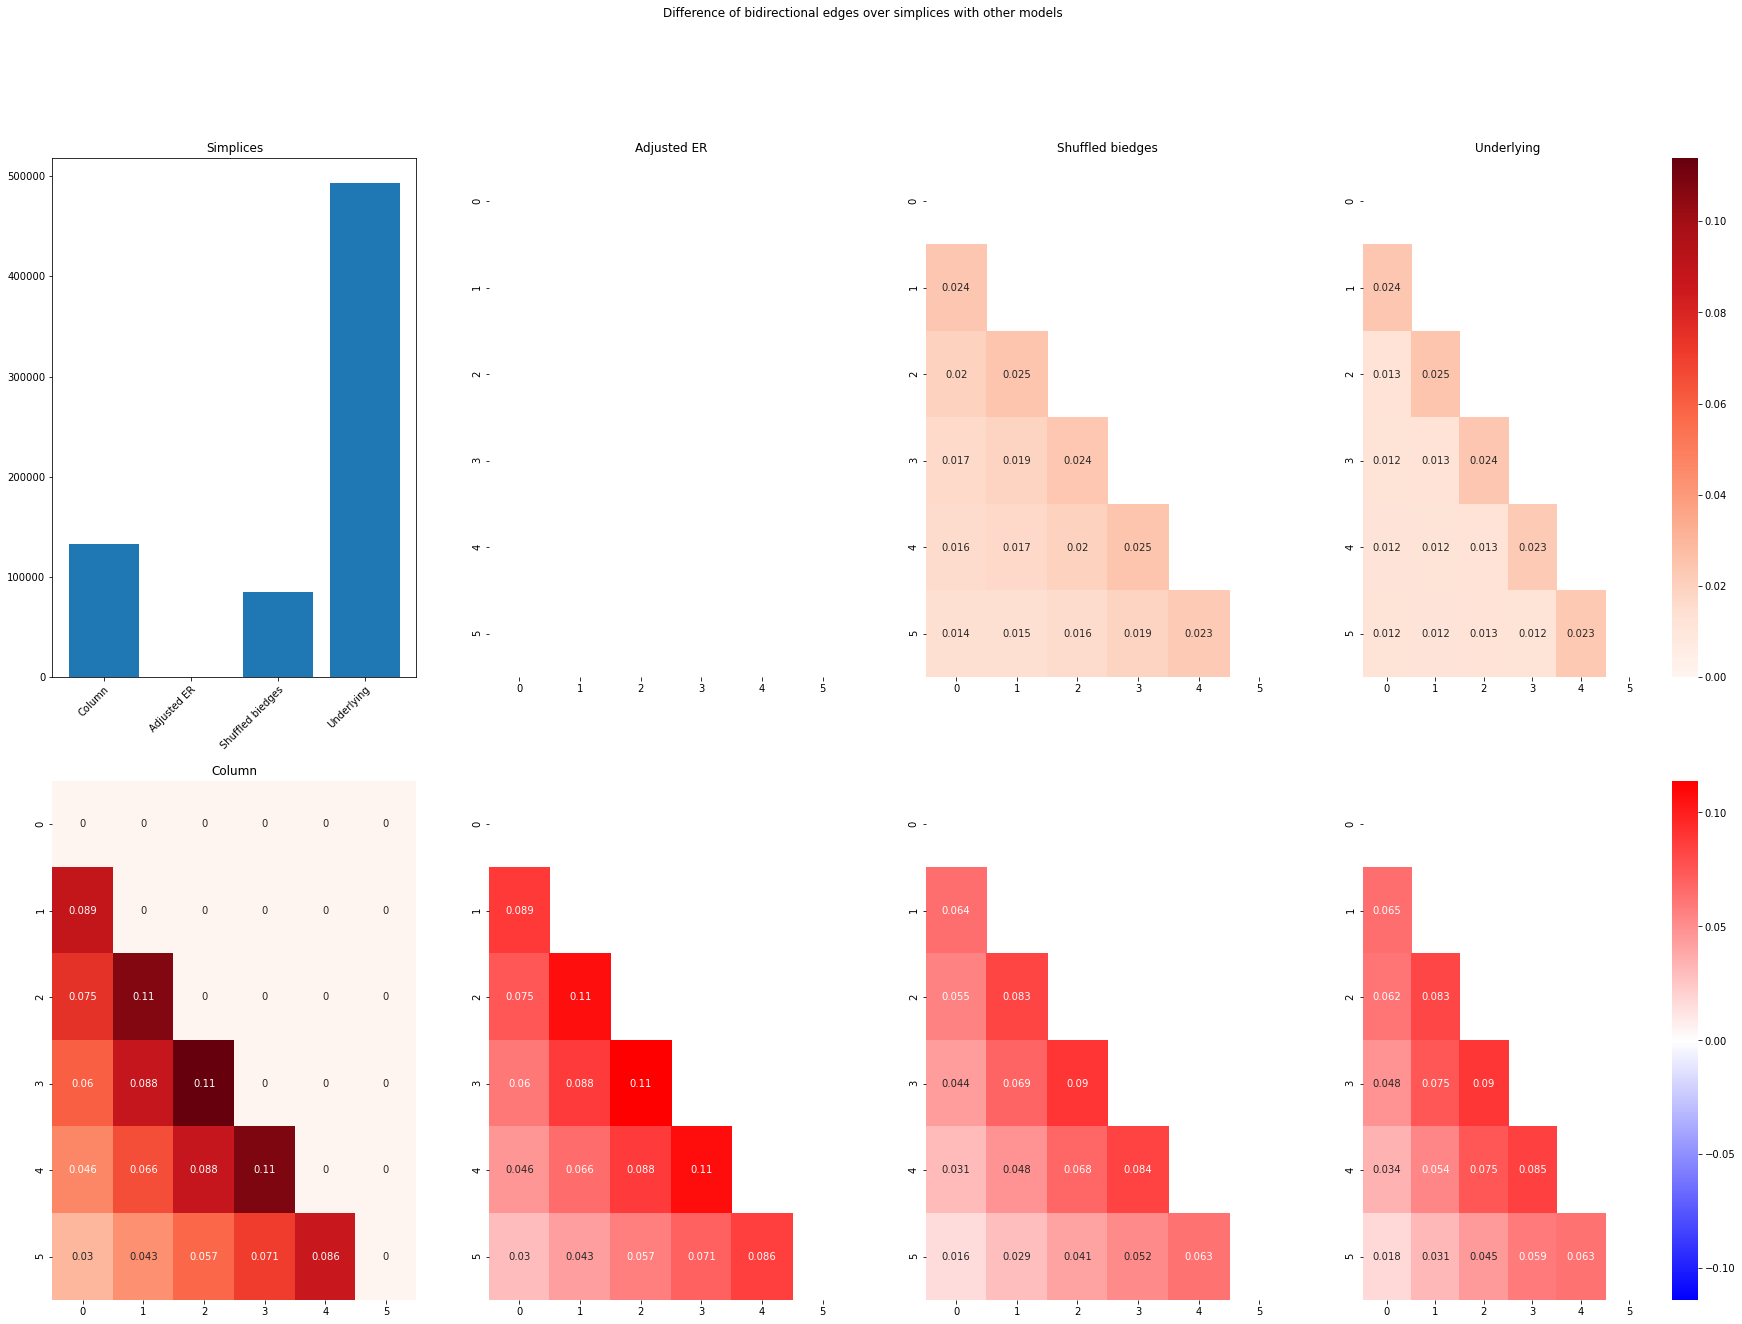

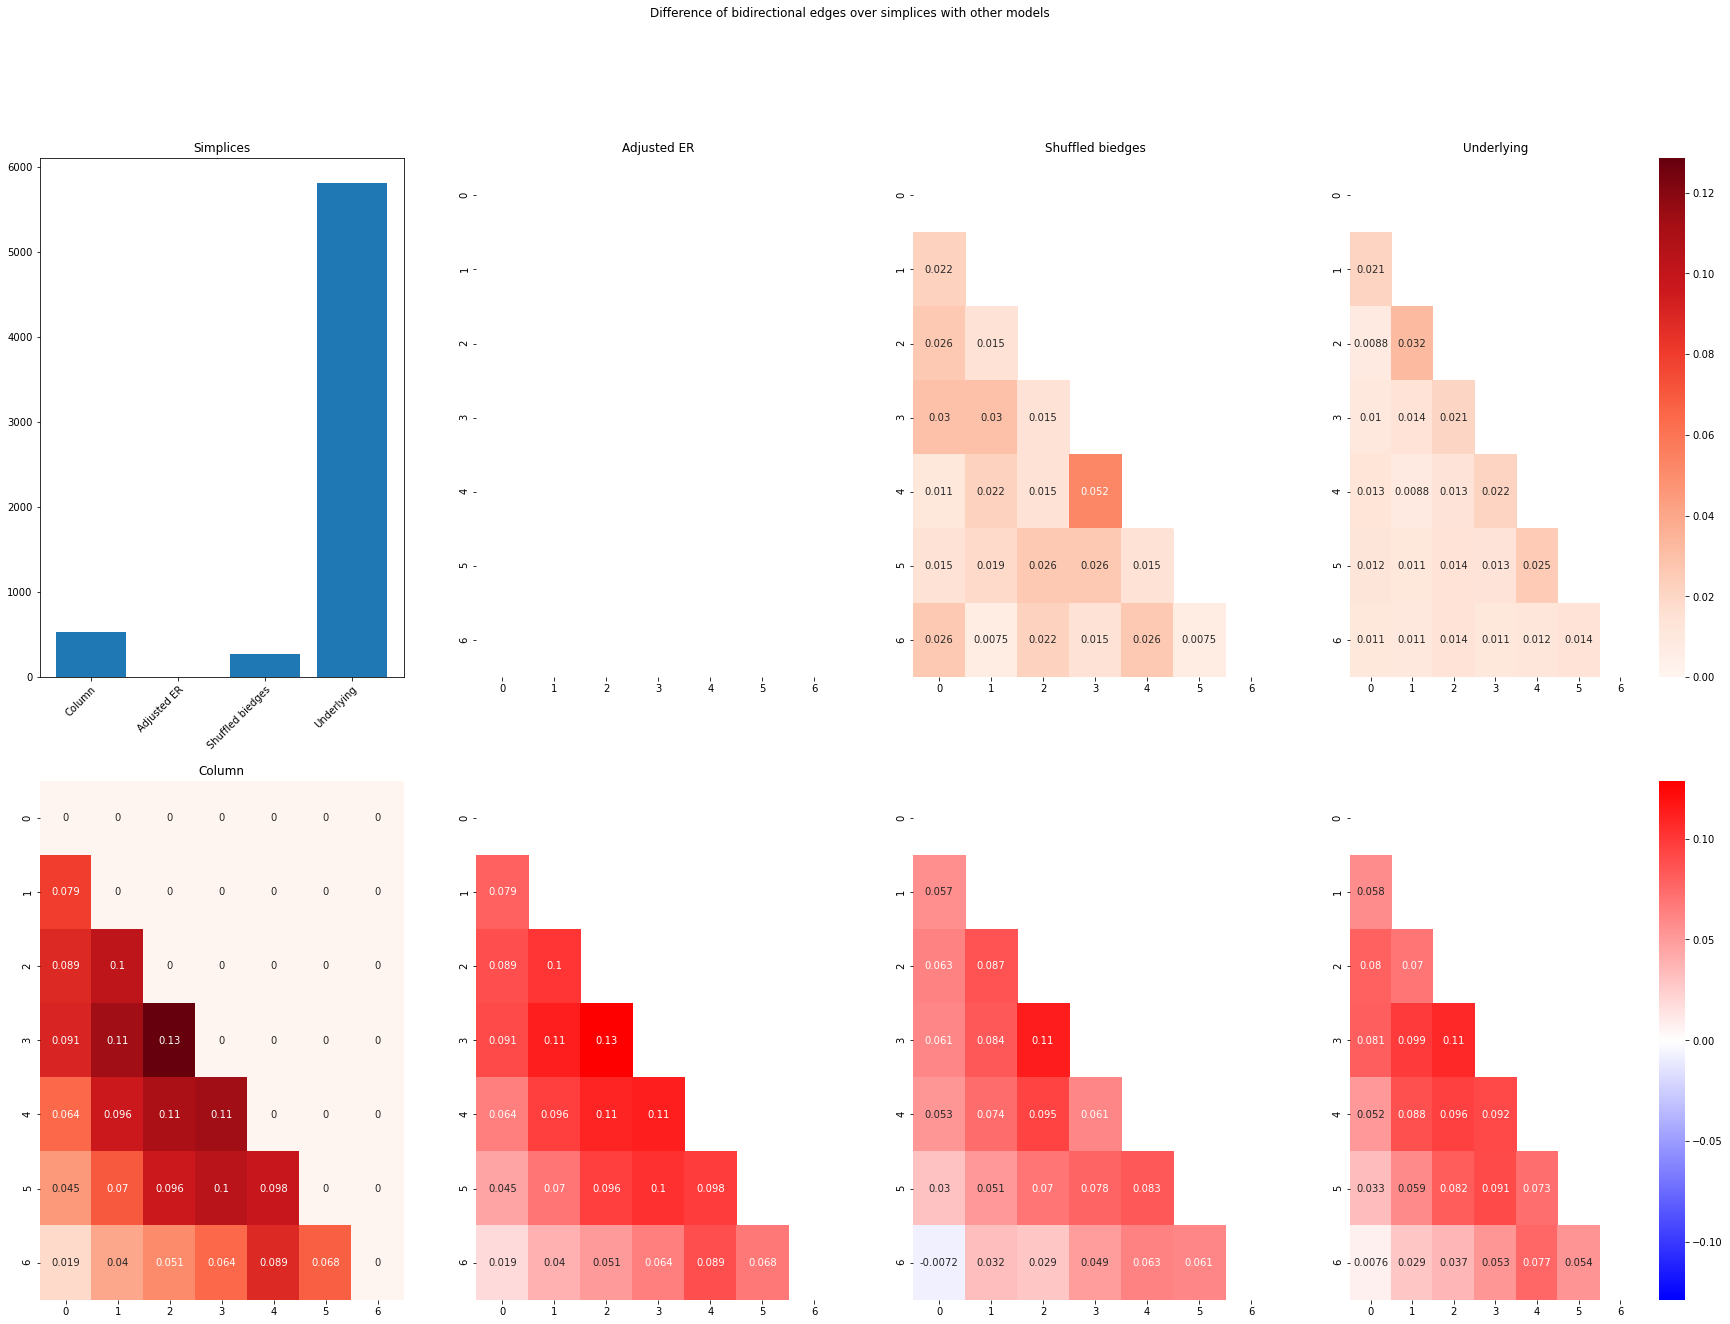

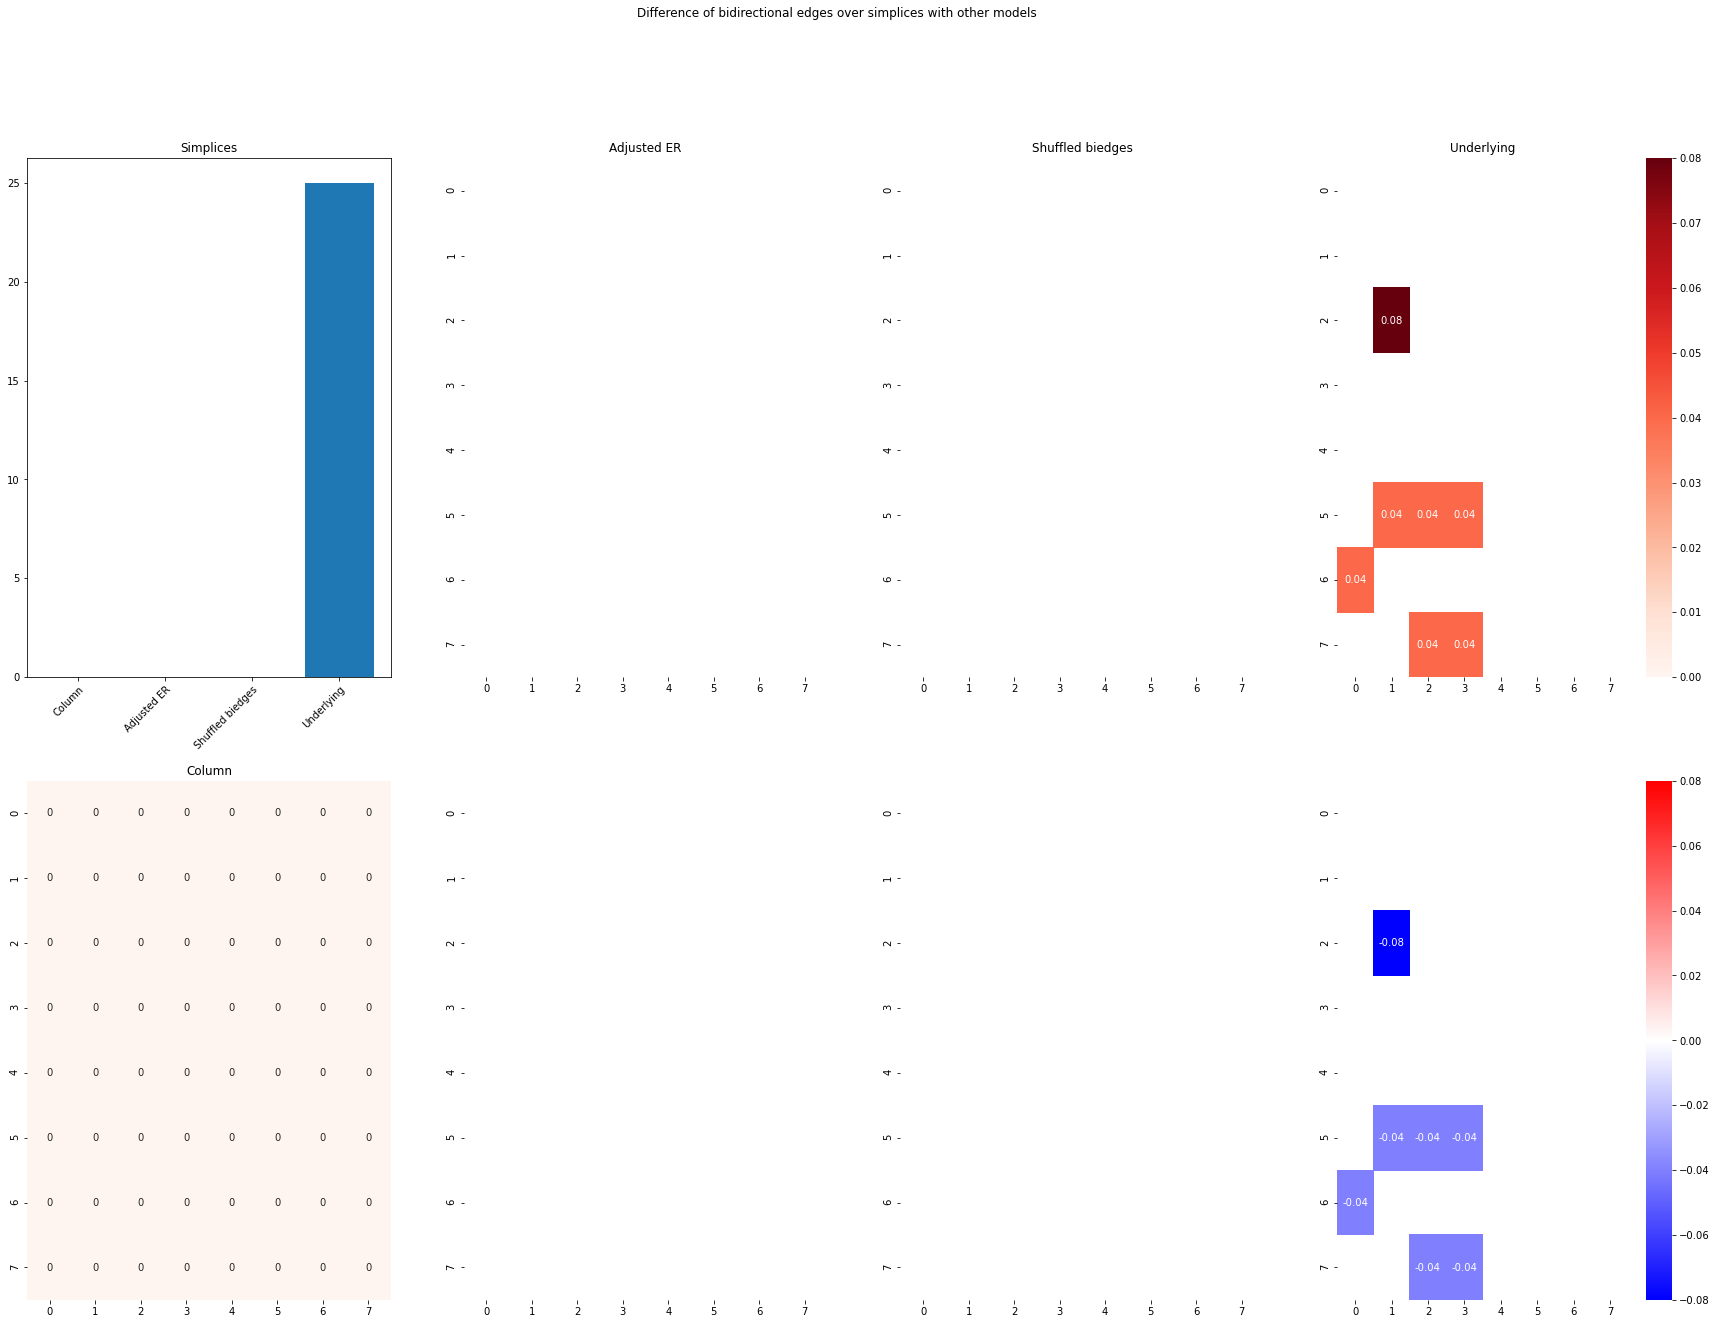

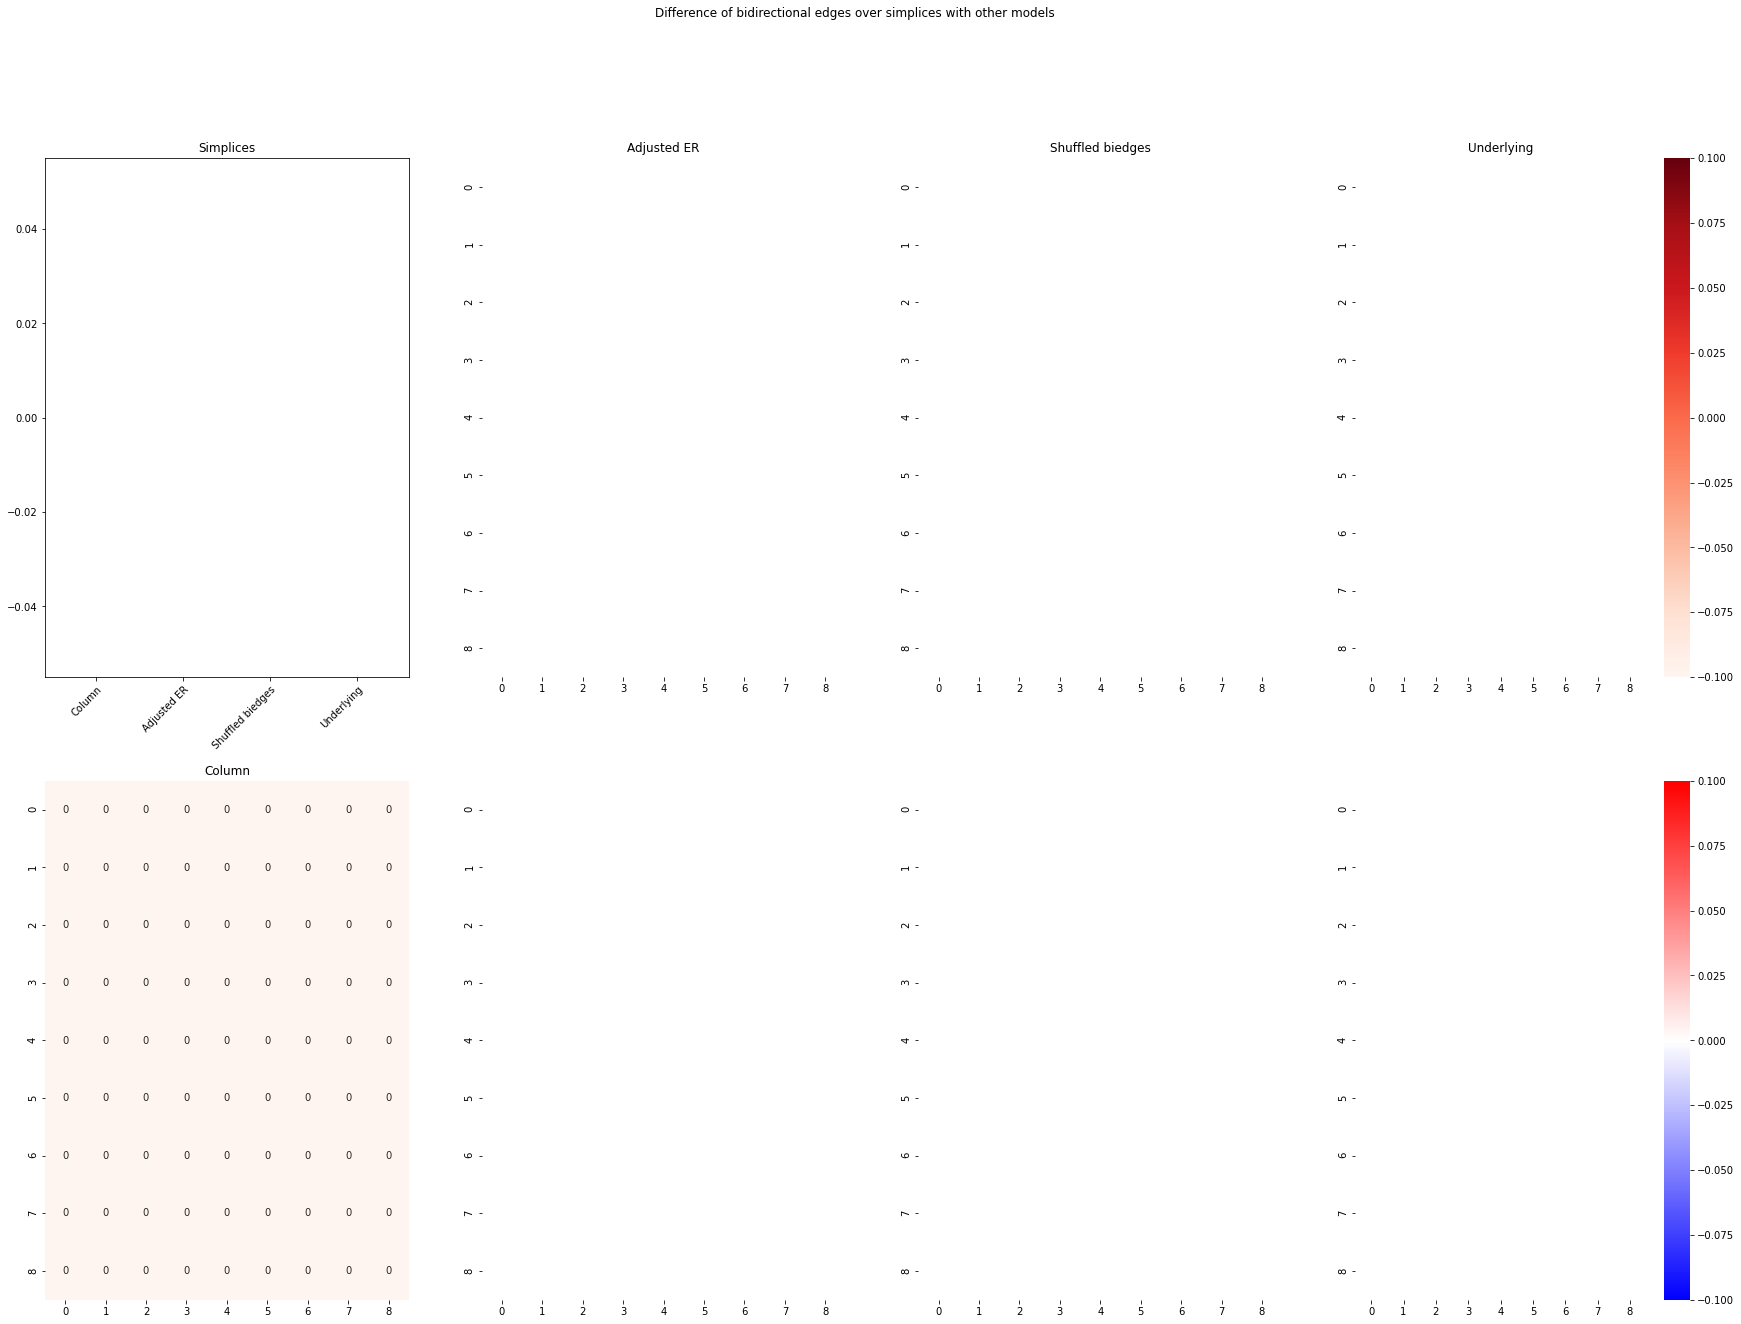

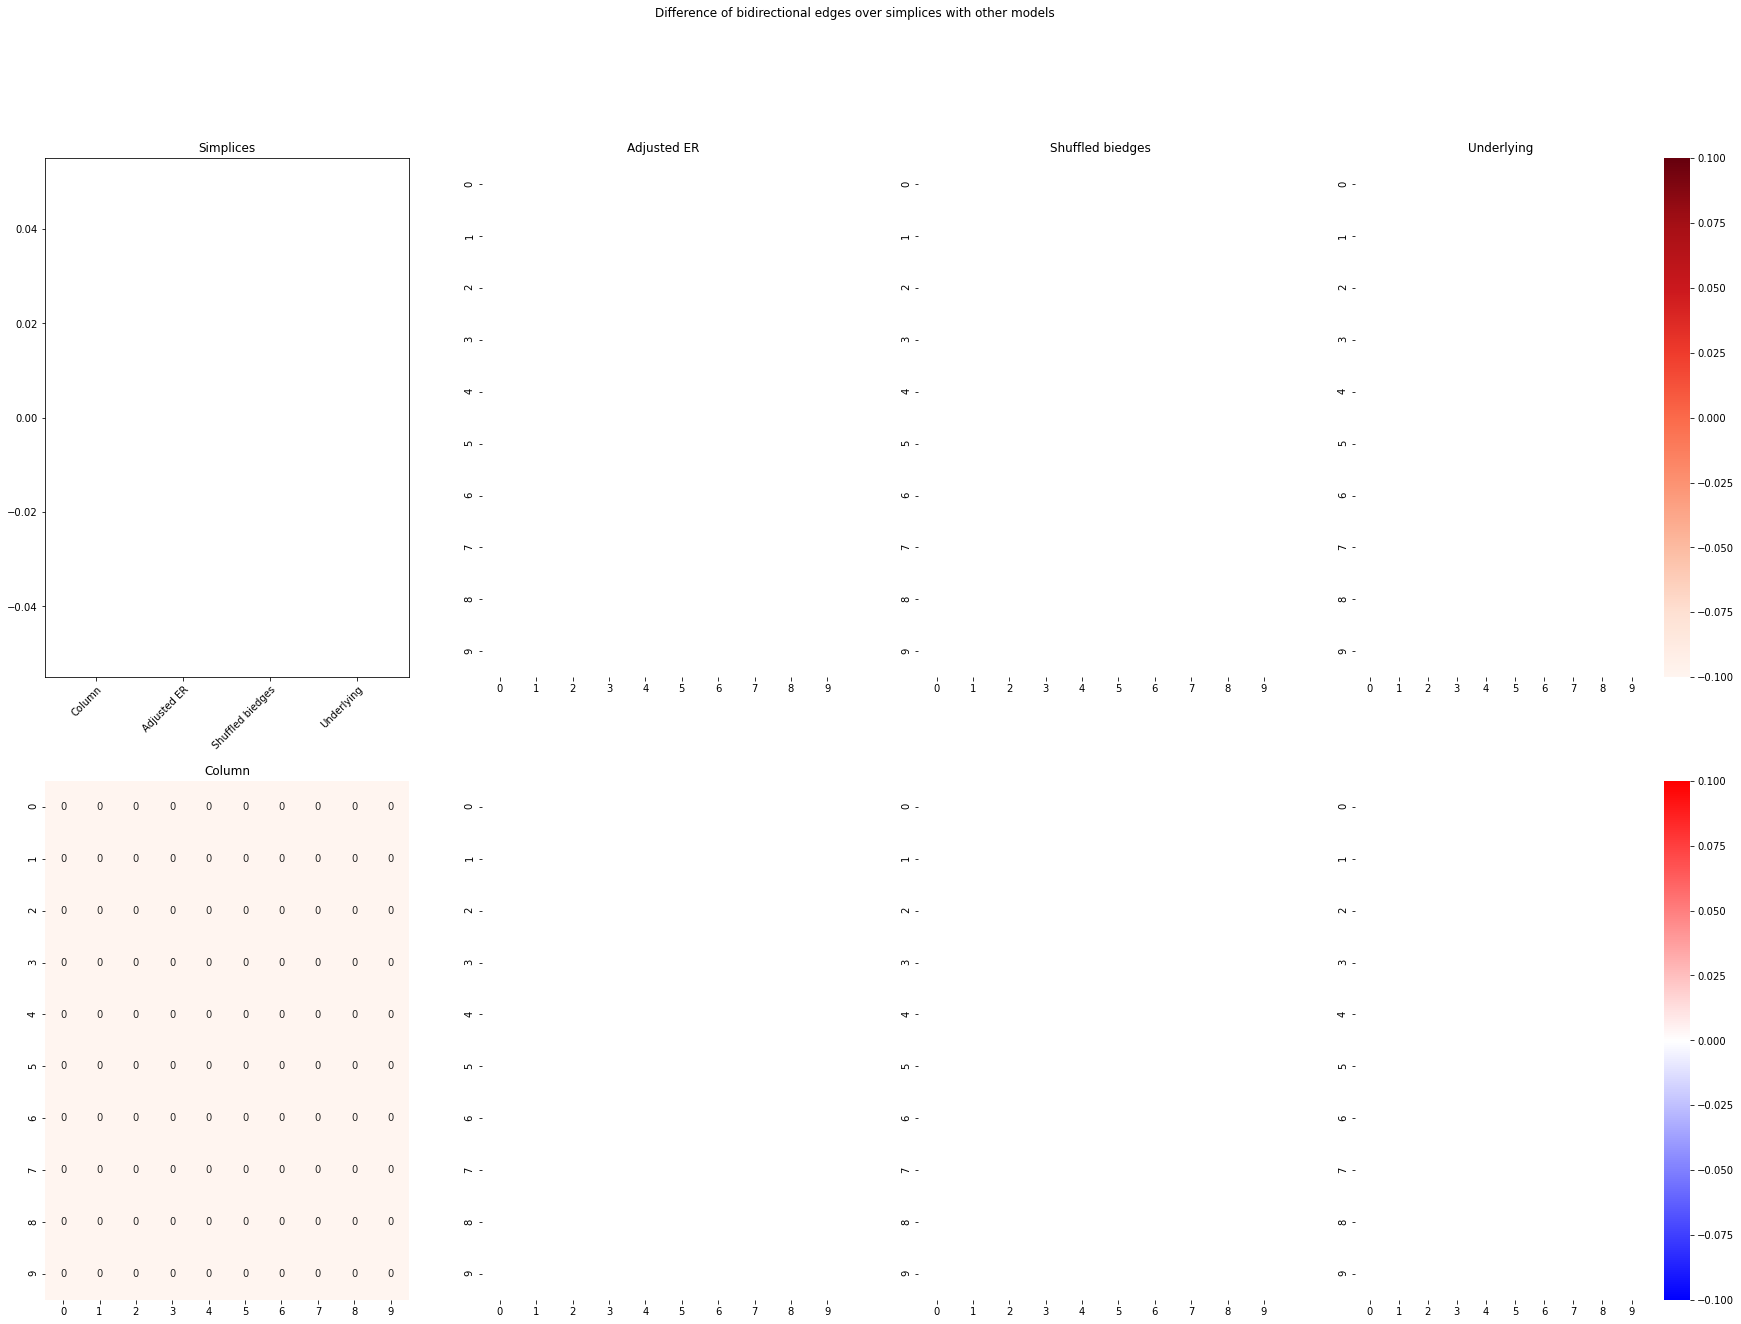

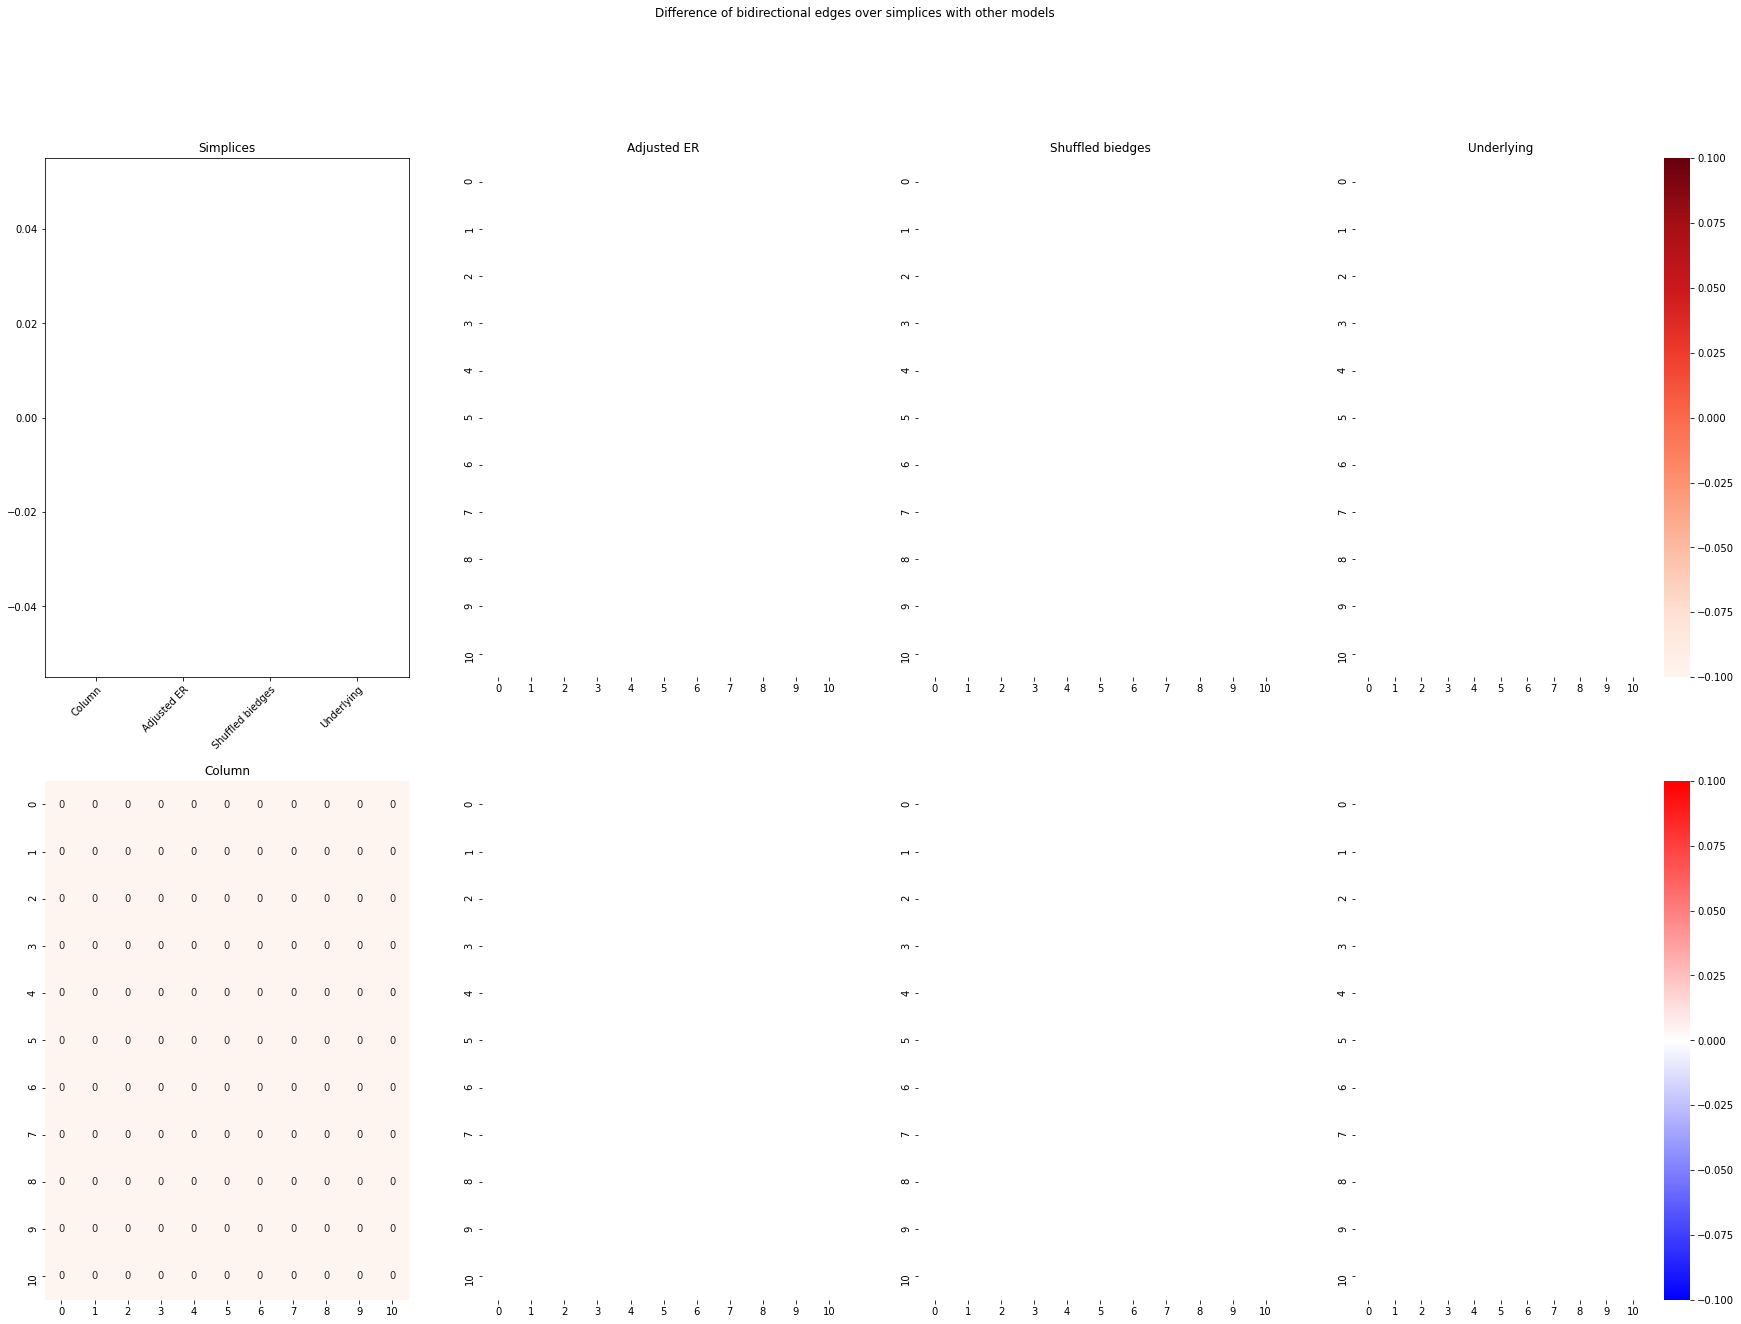

In [24]:
compare_graphs_diff_normalized([a,b0,c0,d0], 1, "difference_normalized")

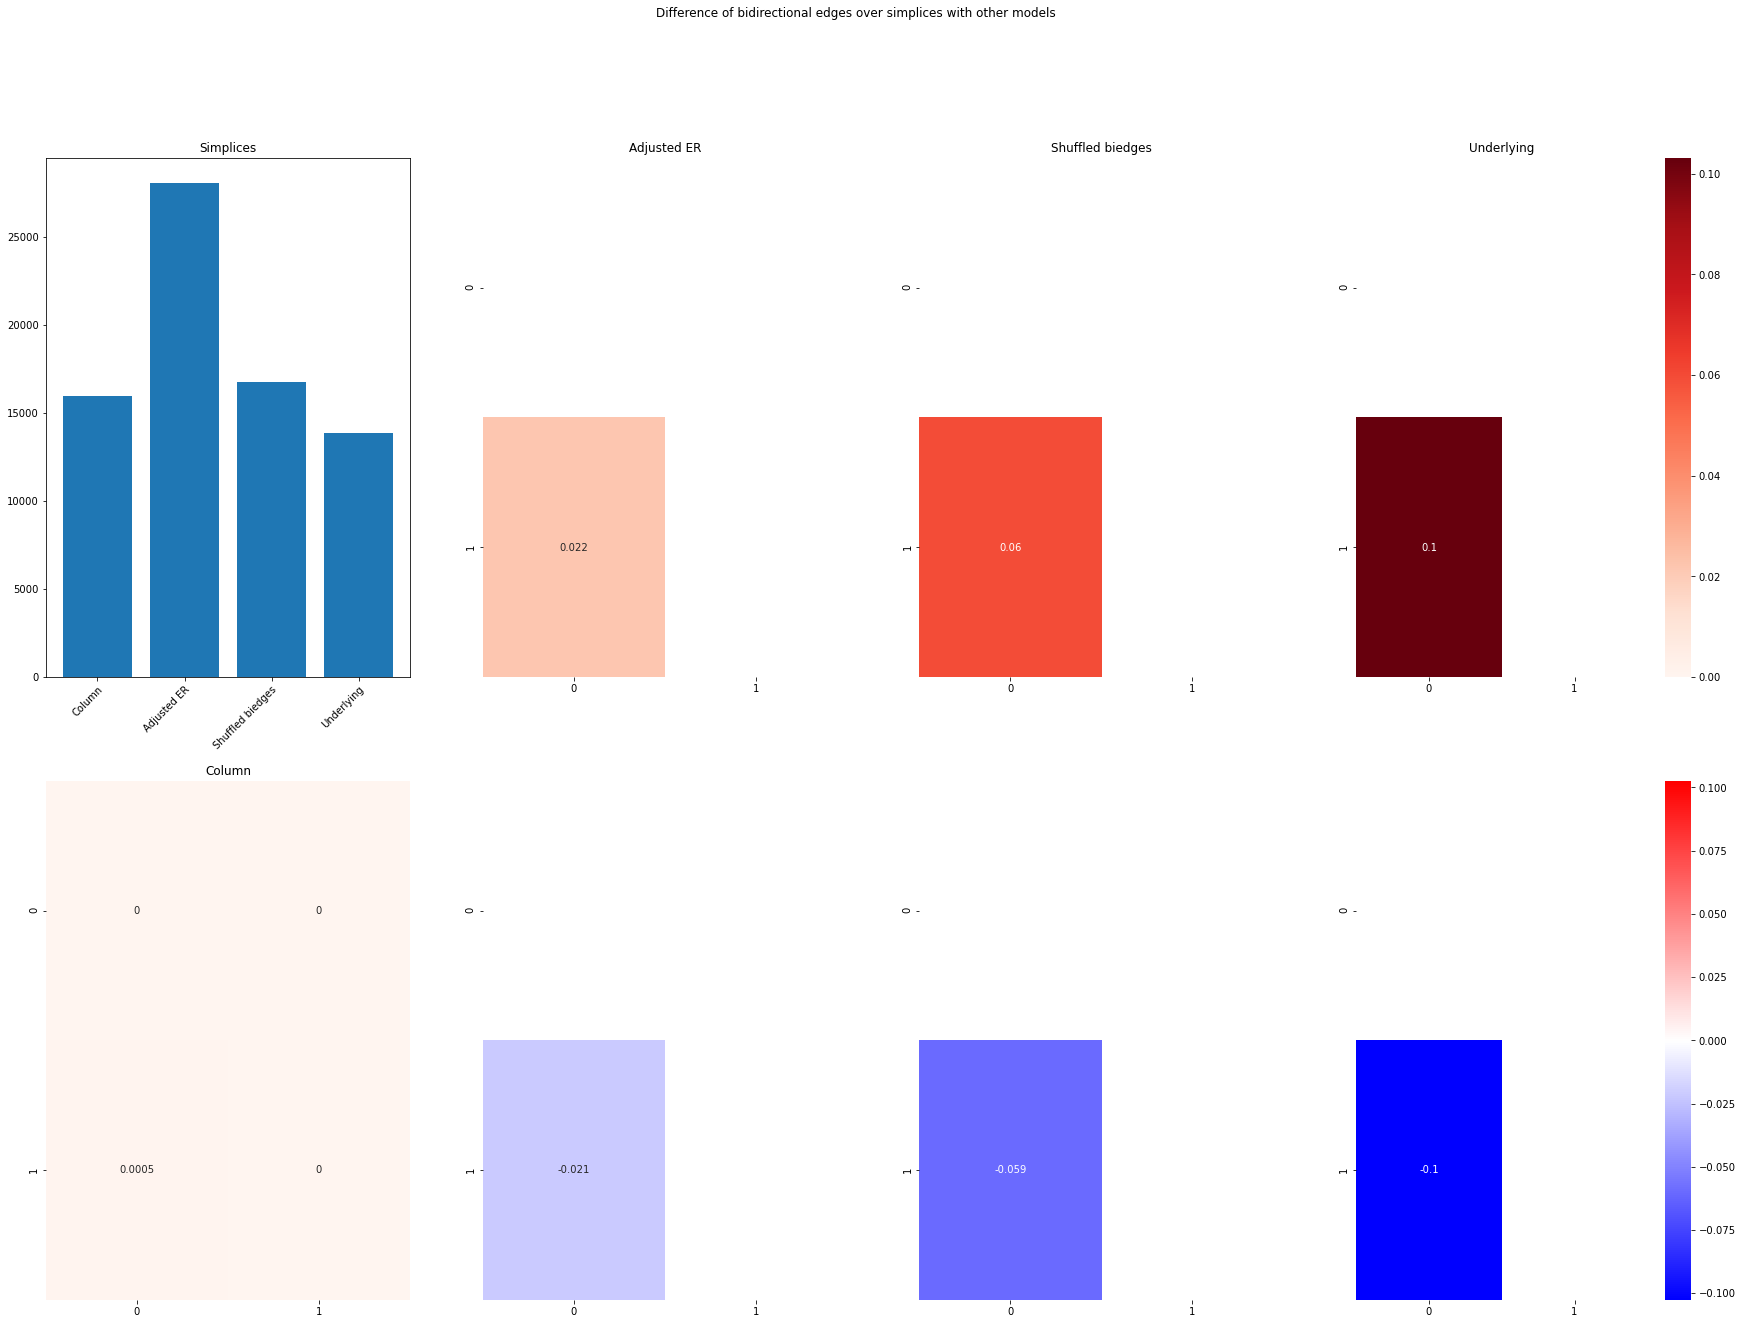

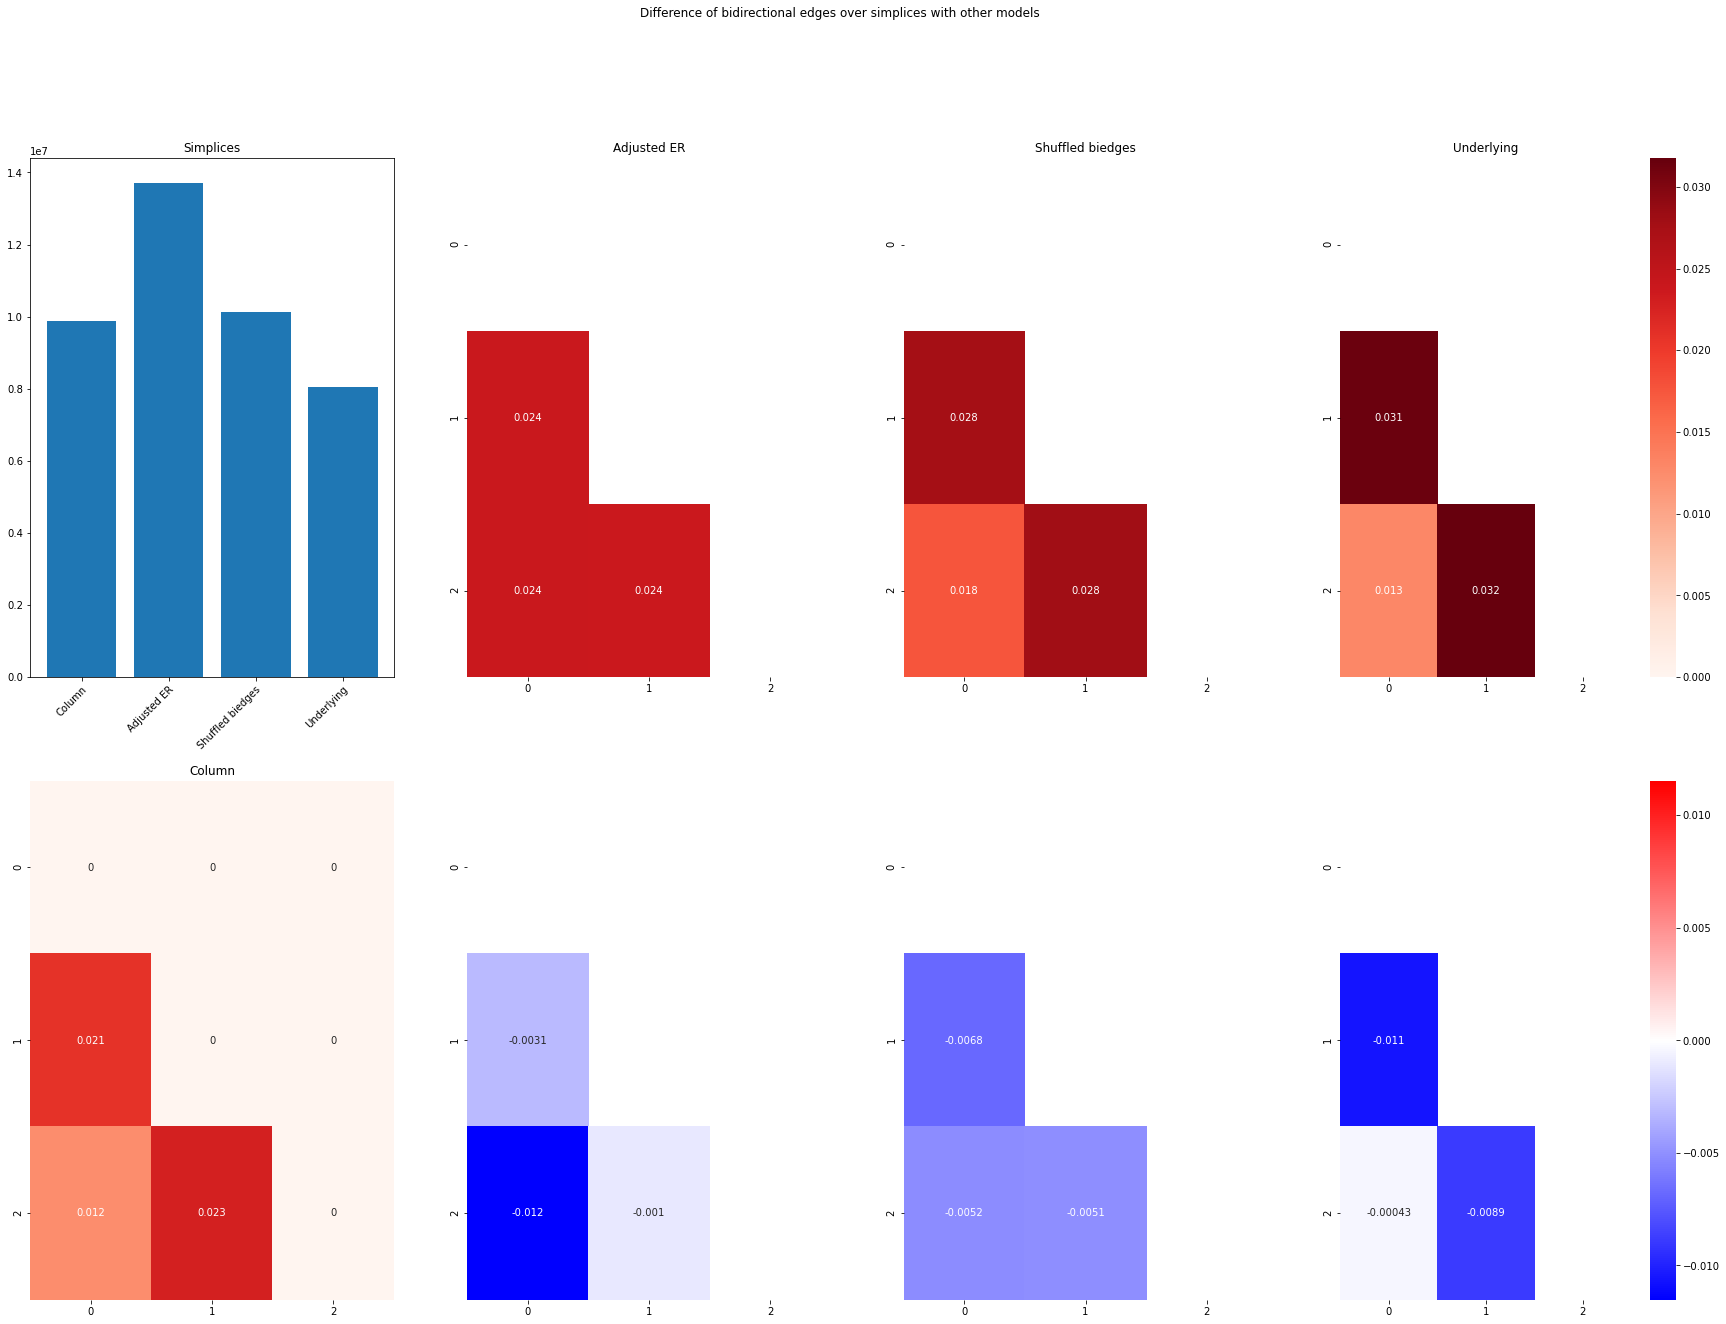

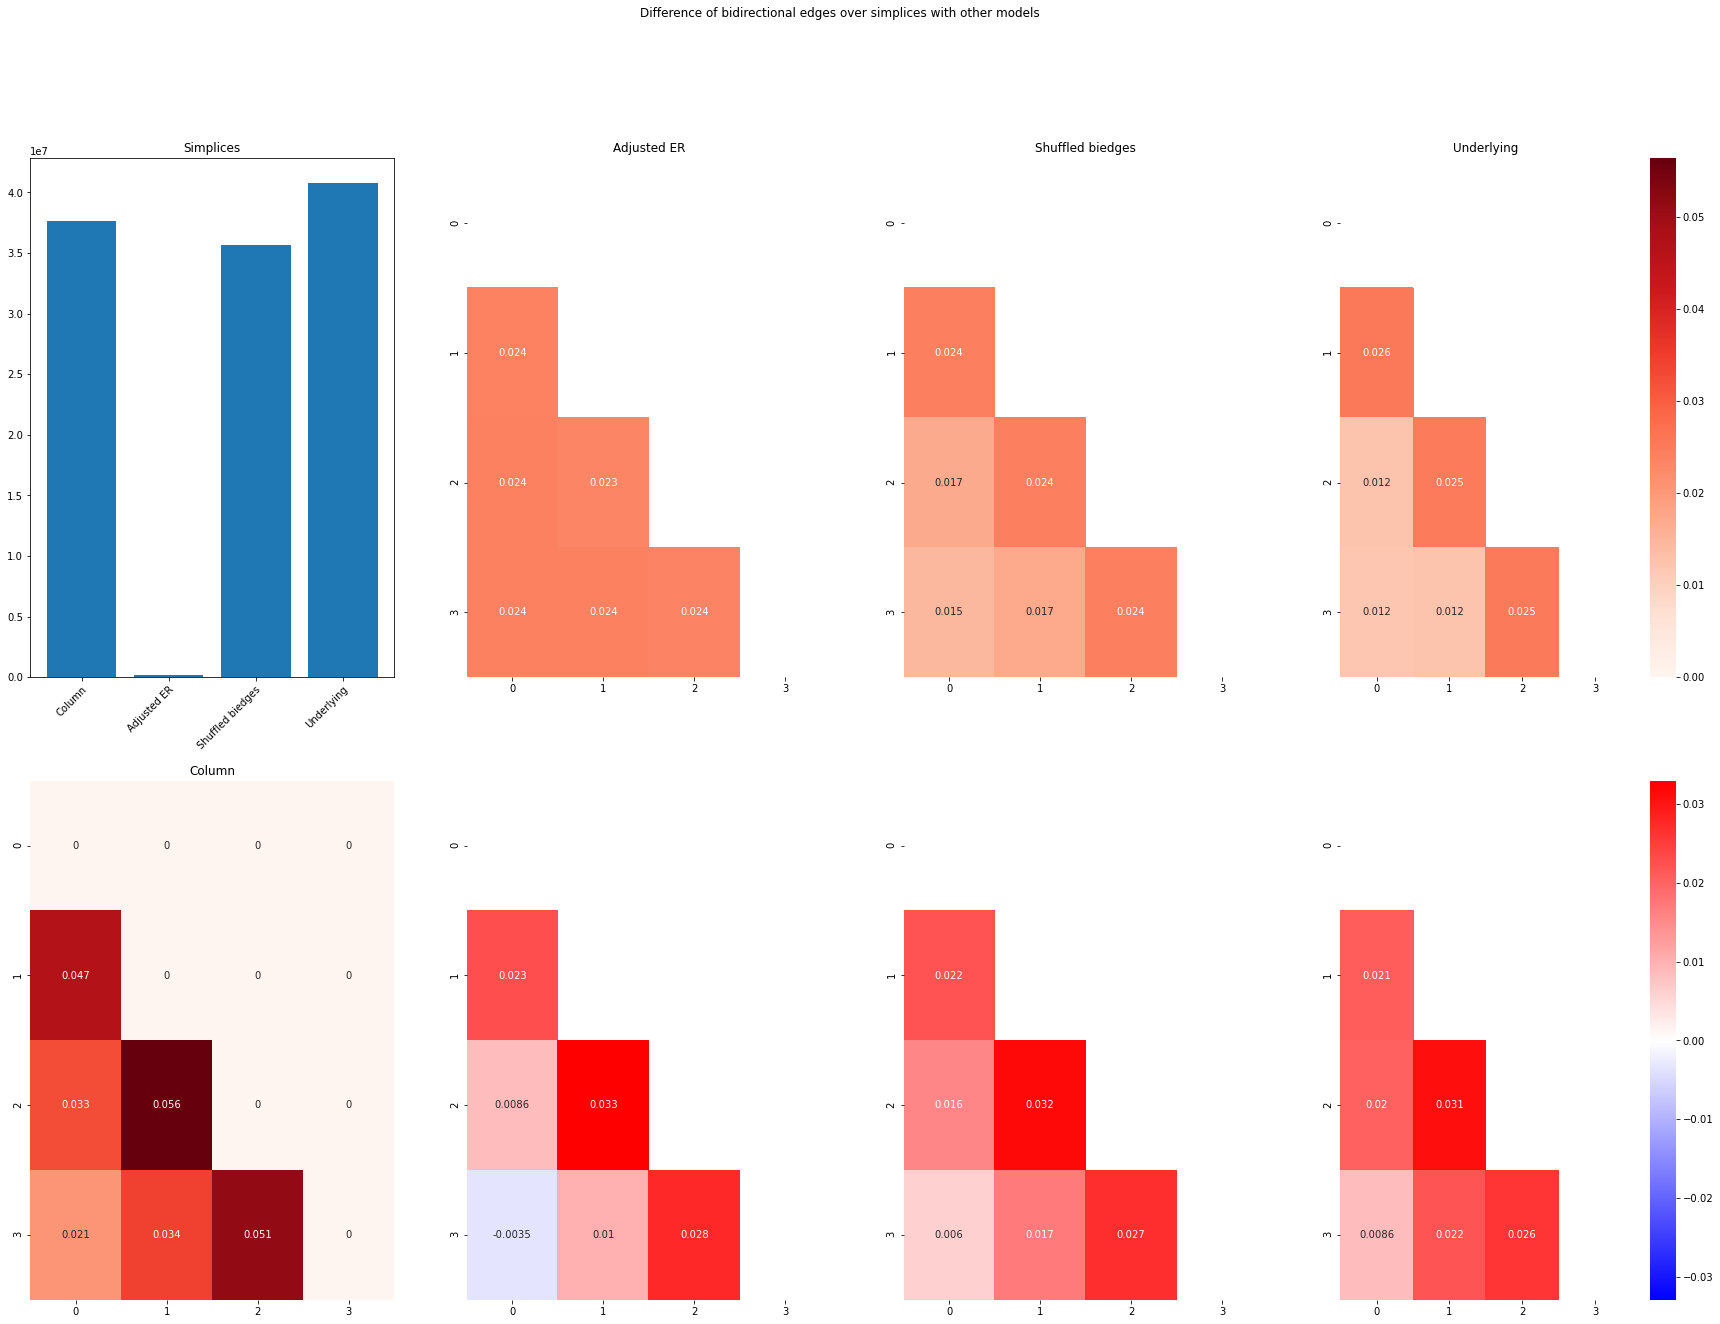

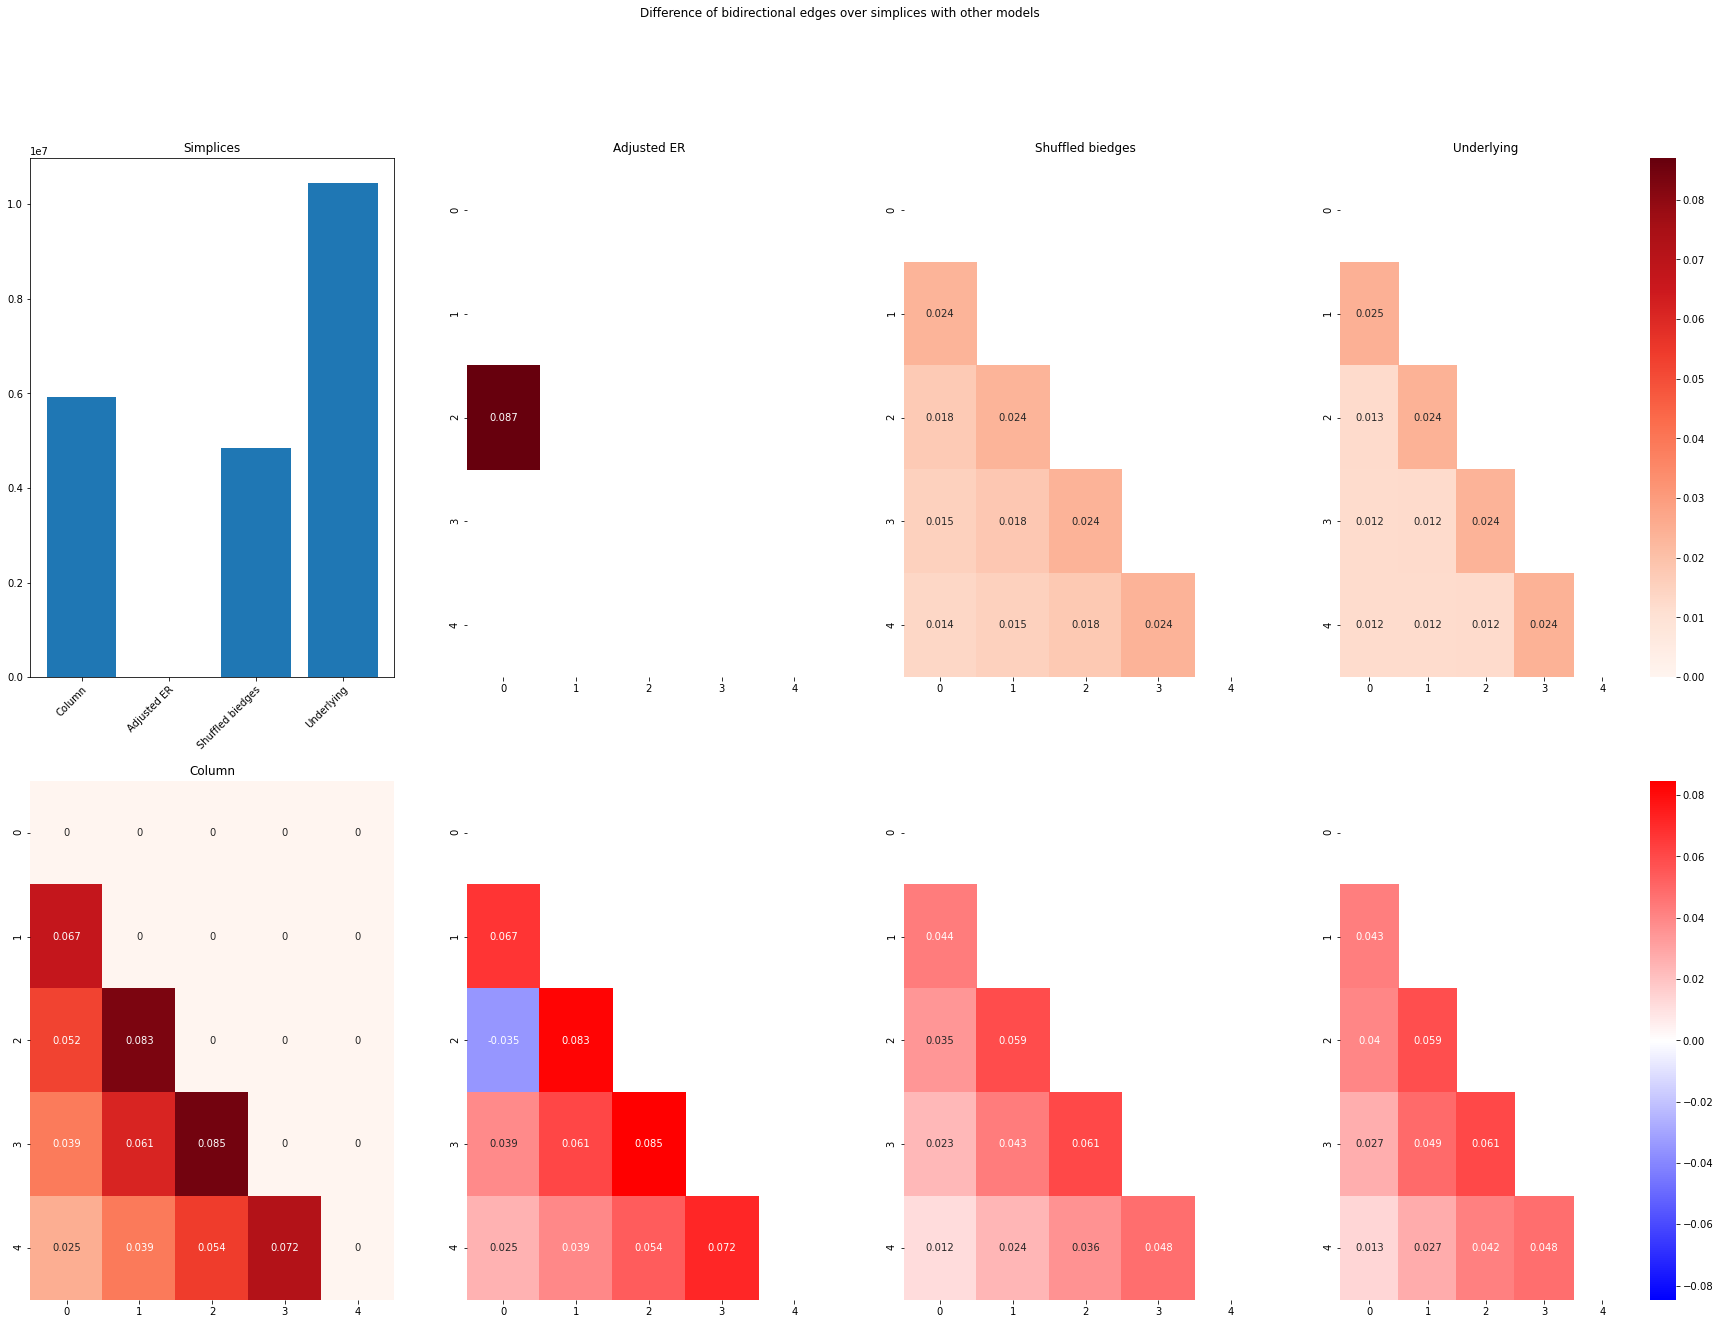

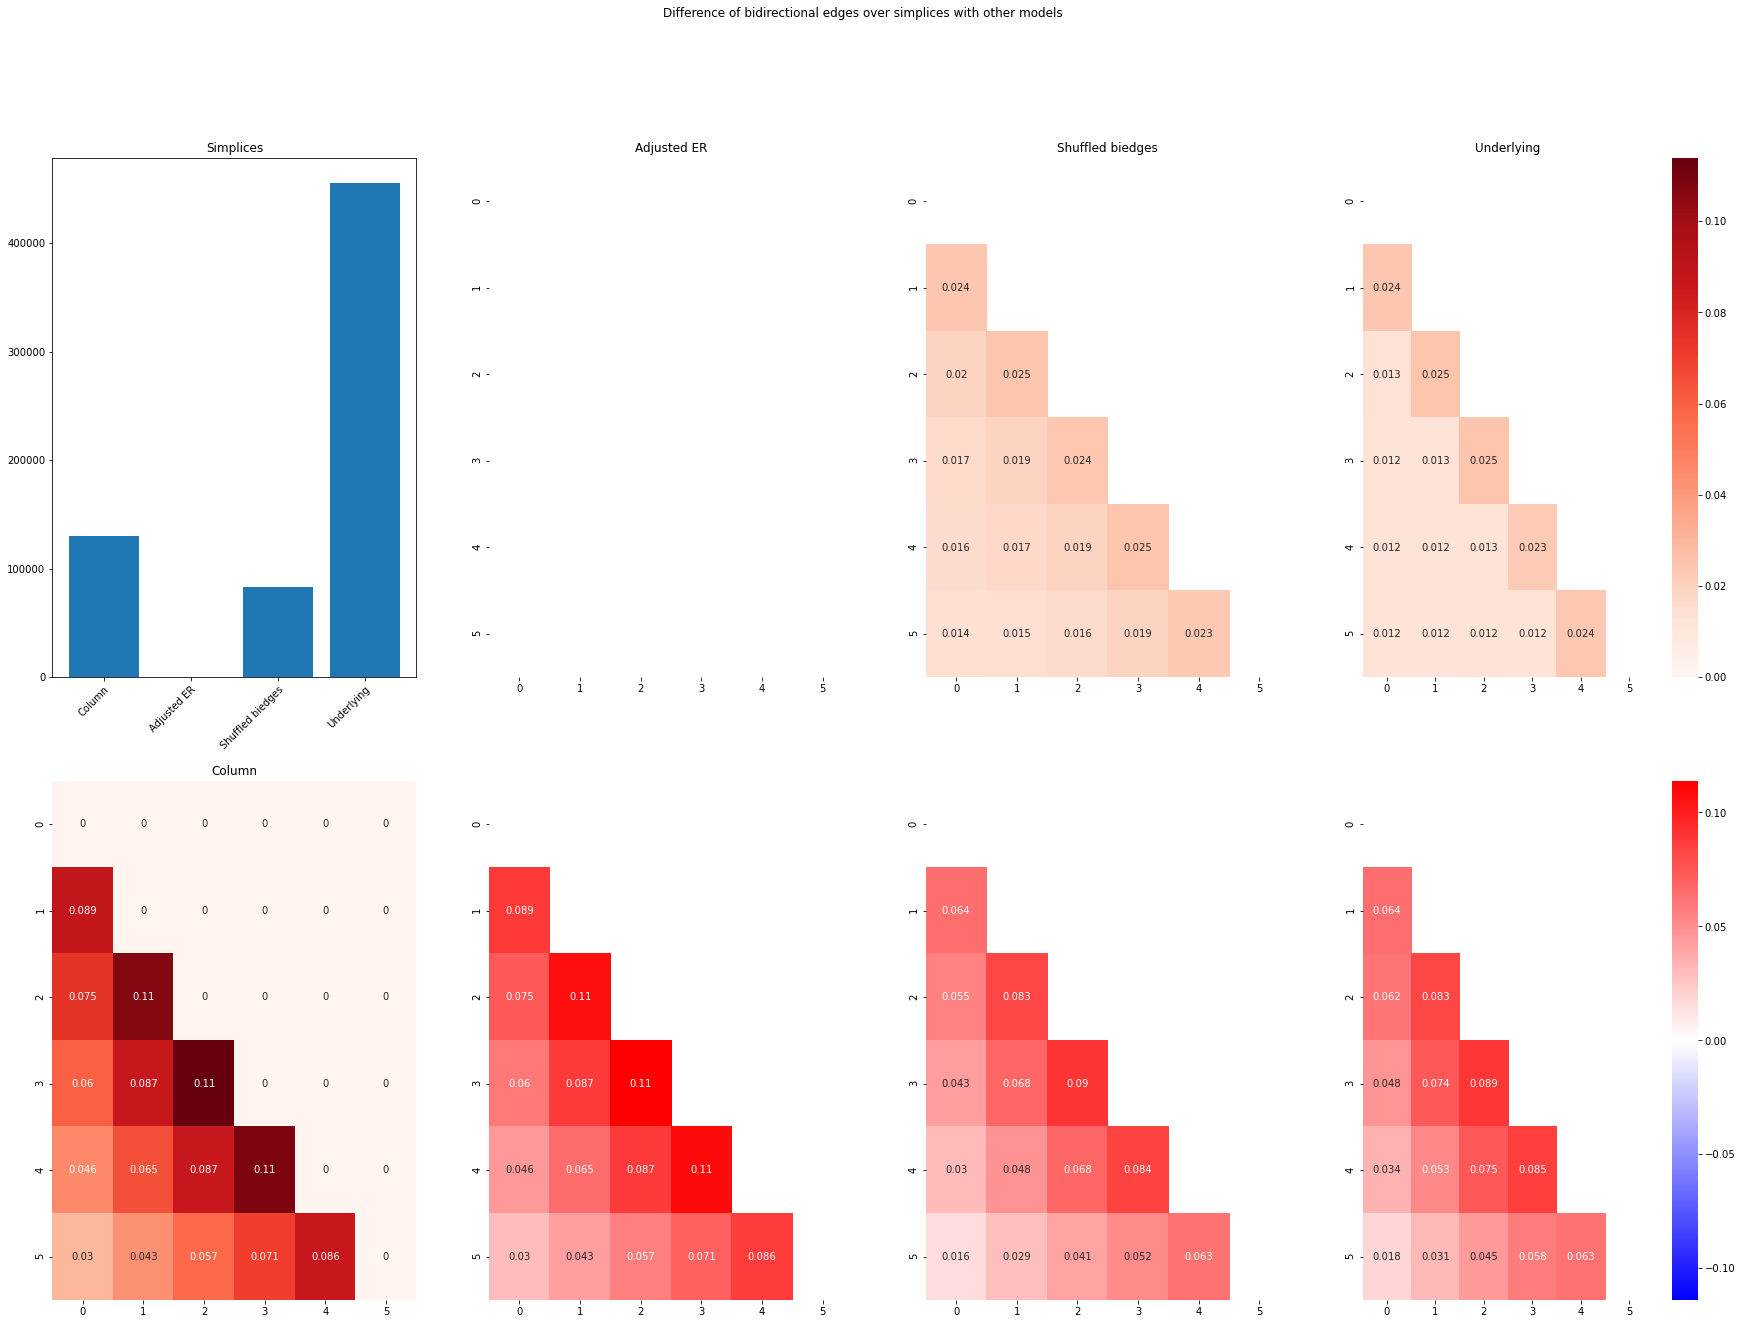

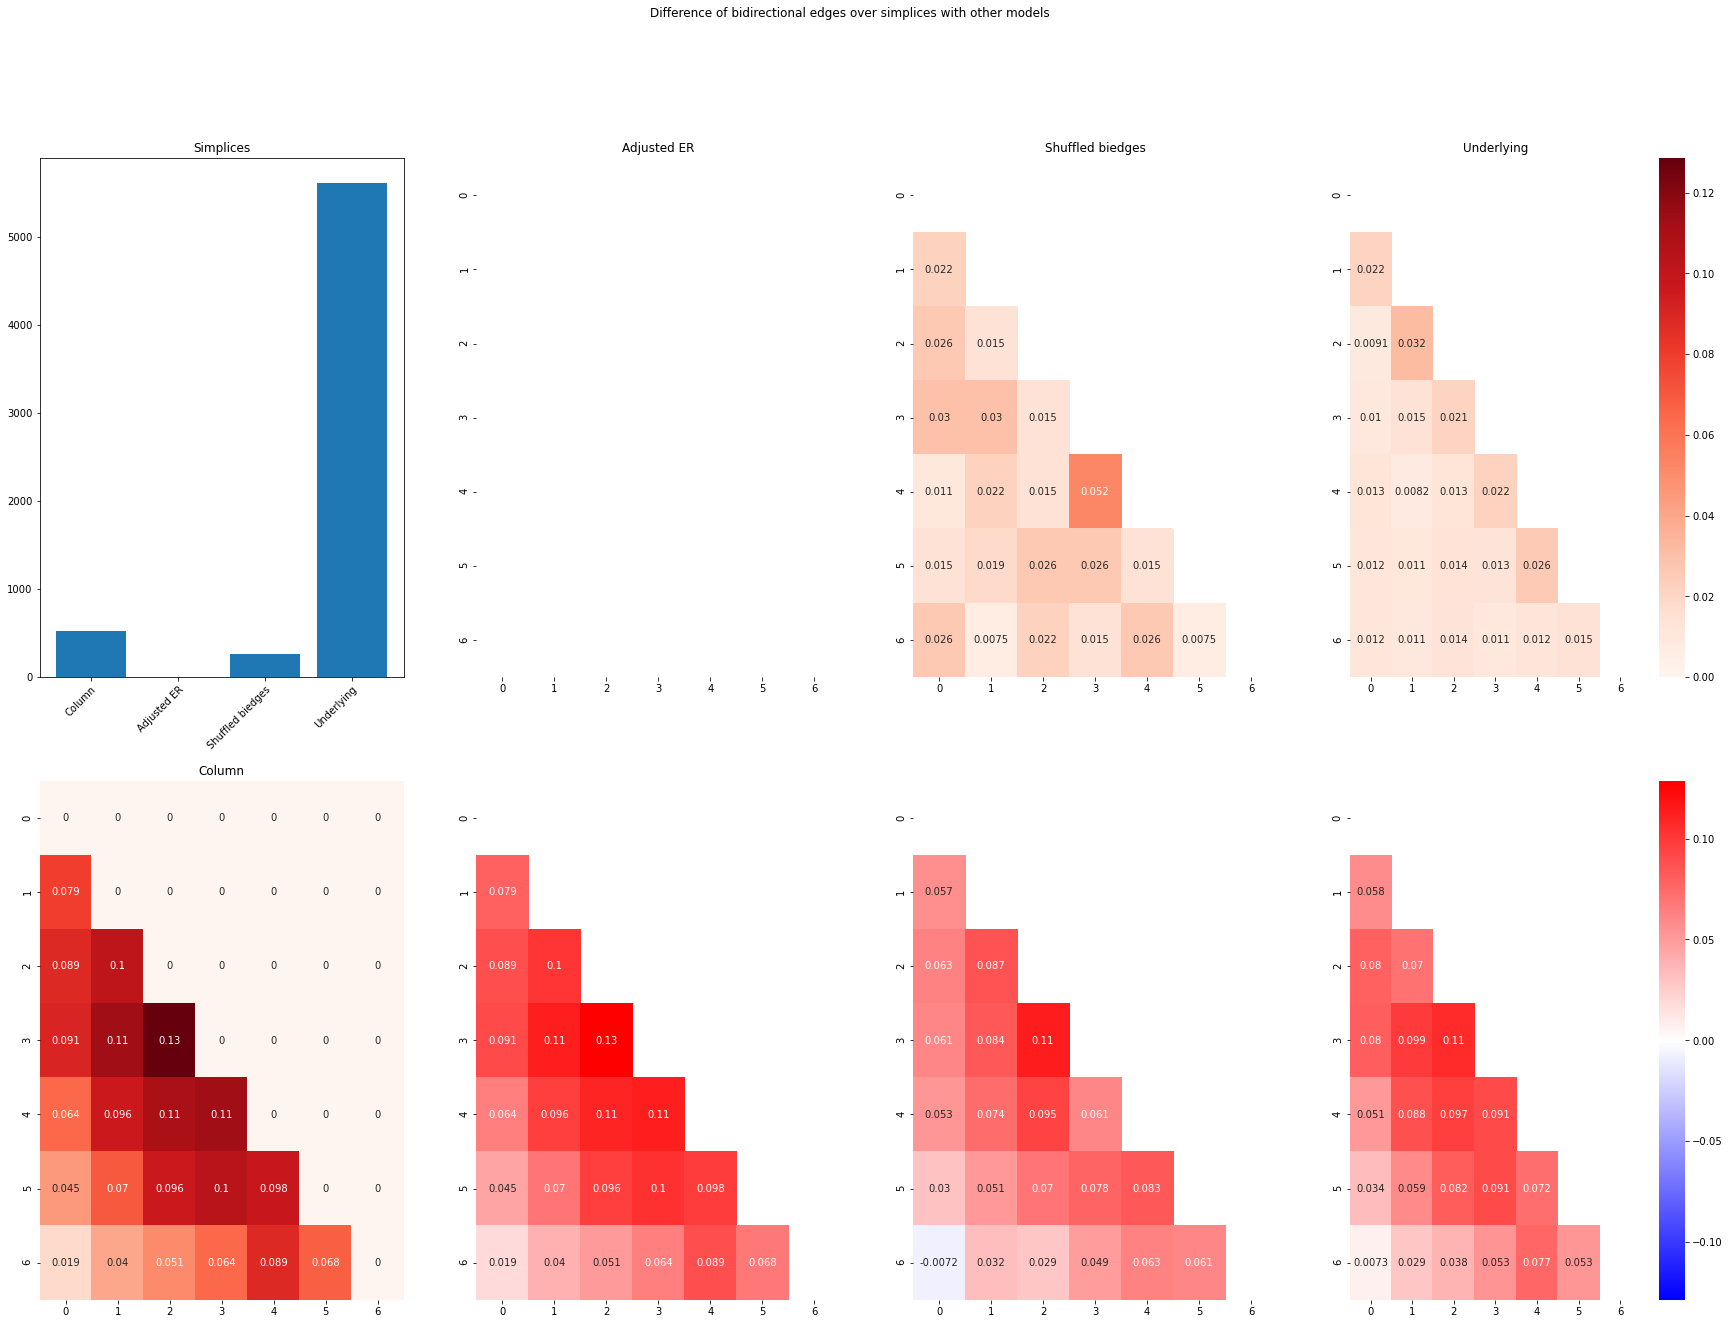

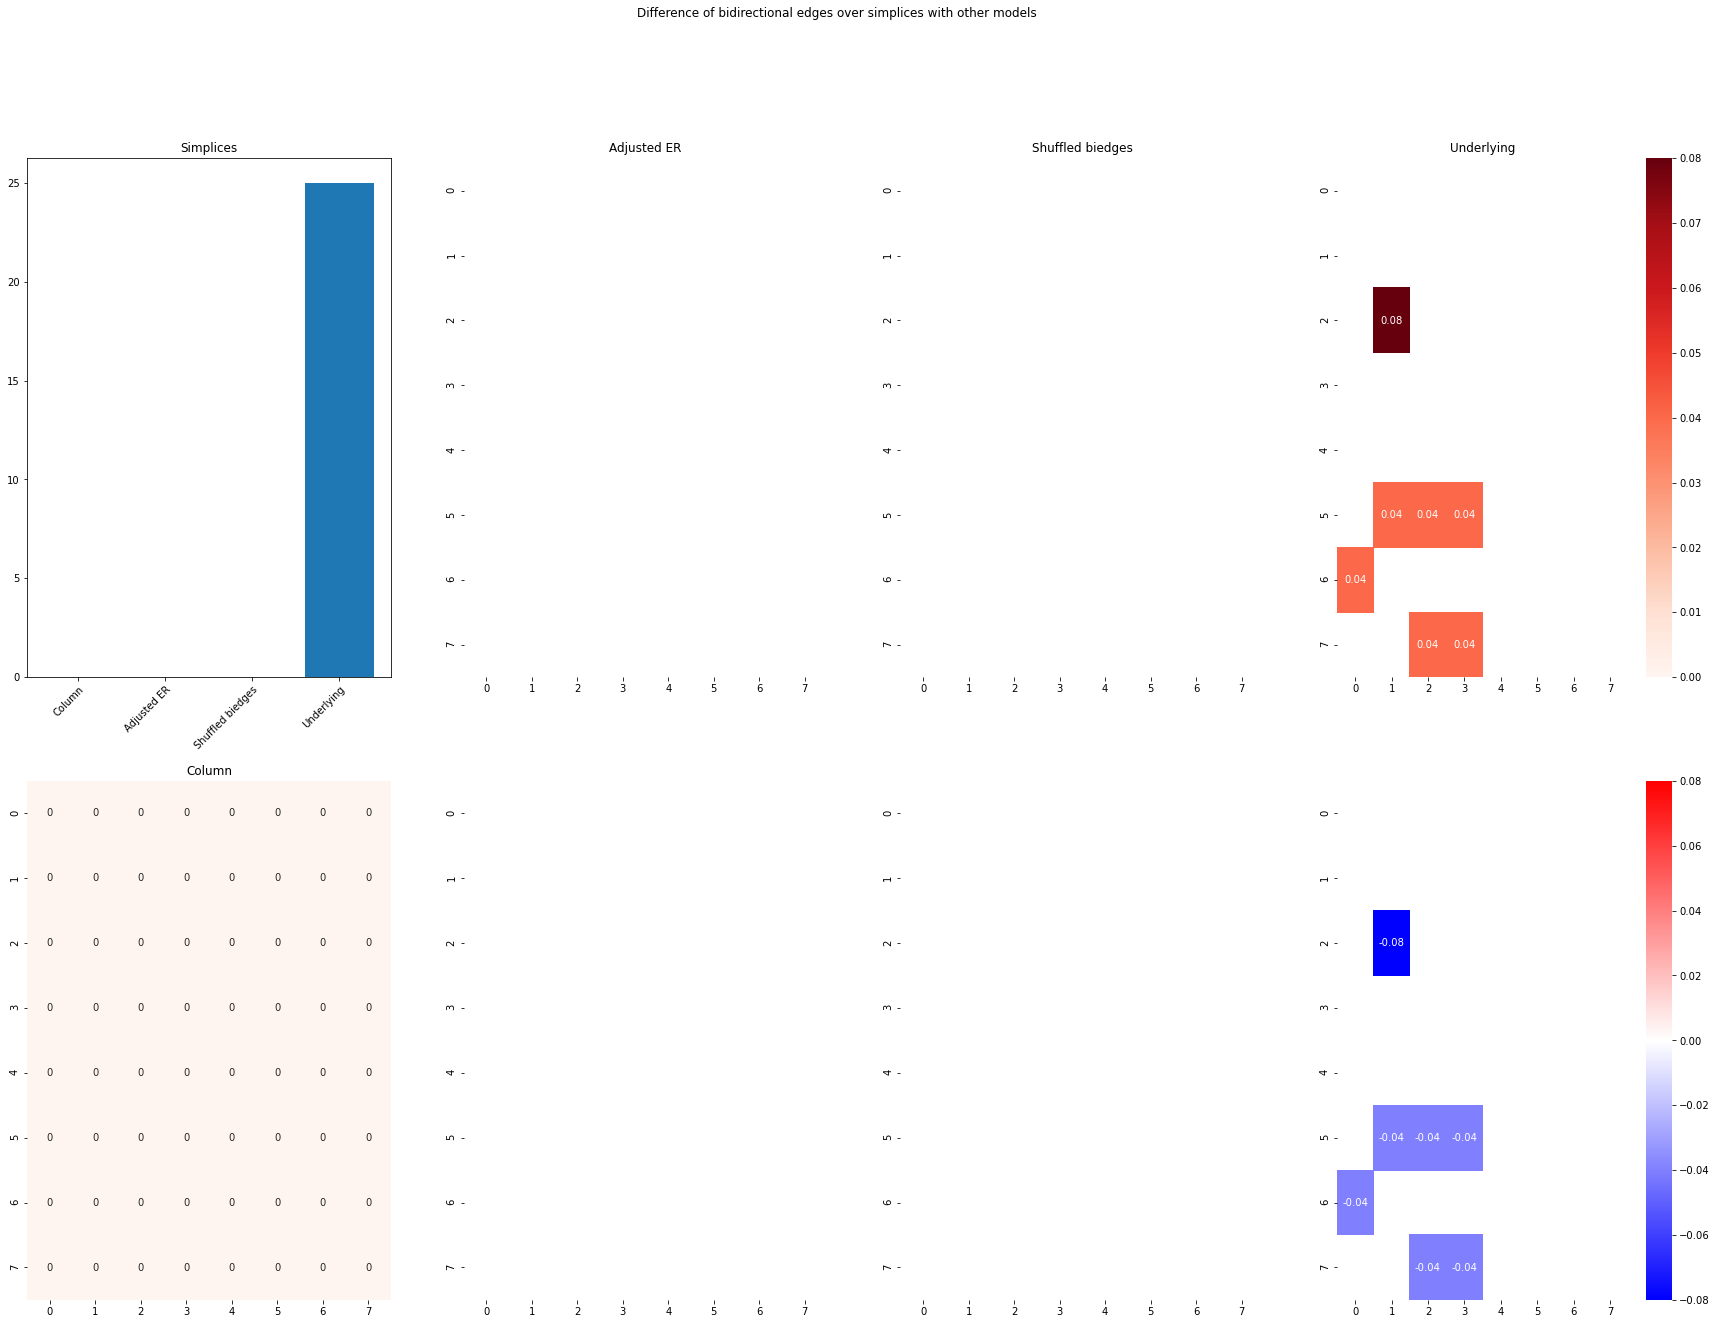

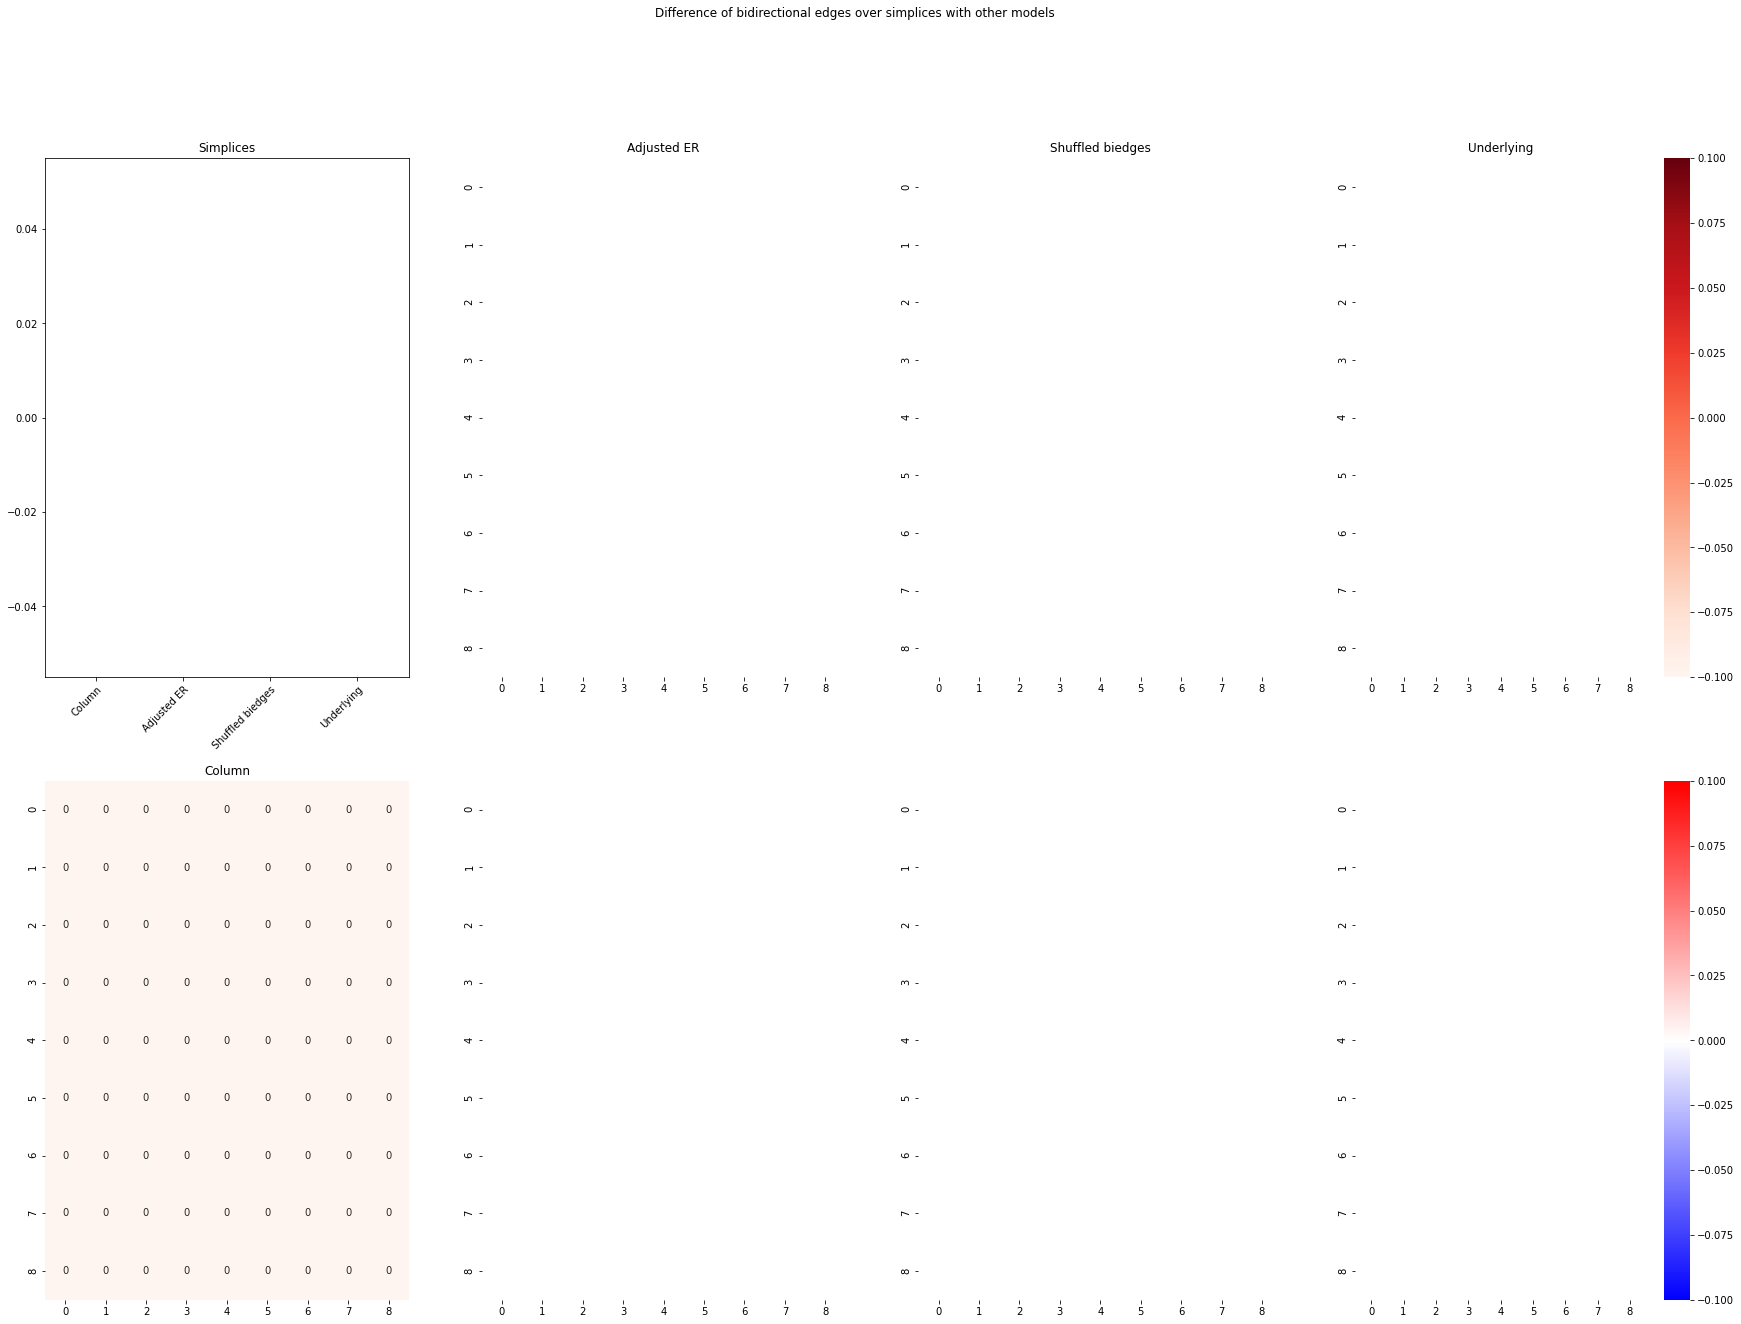

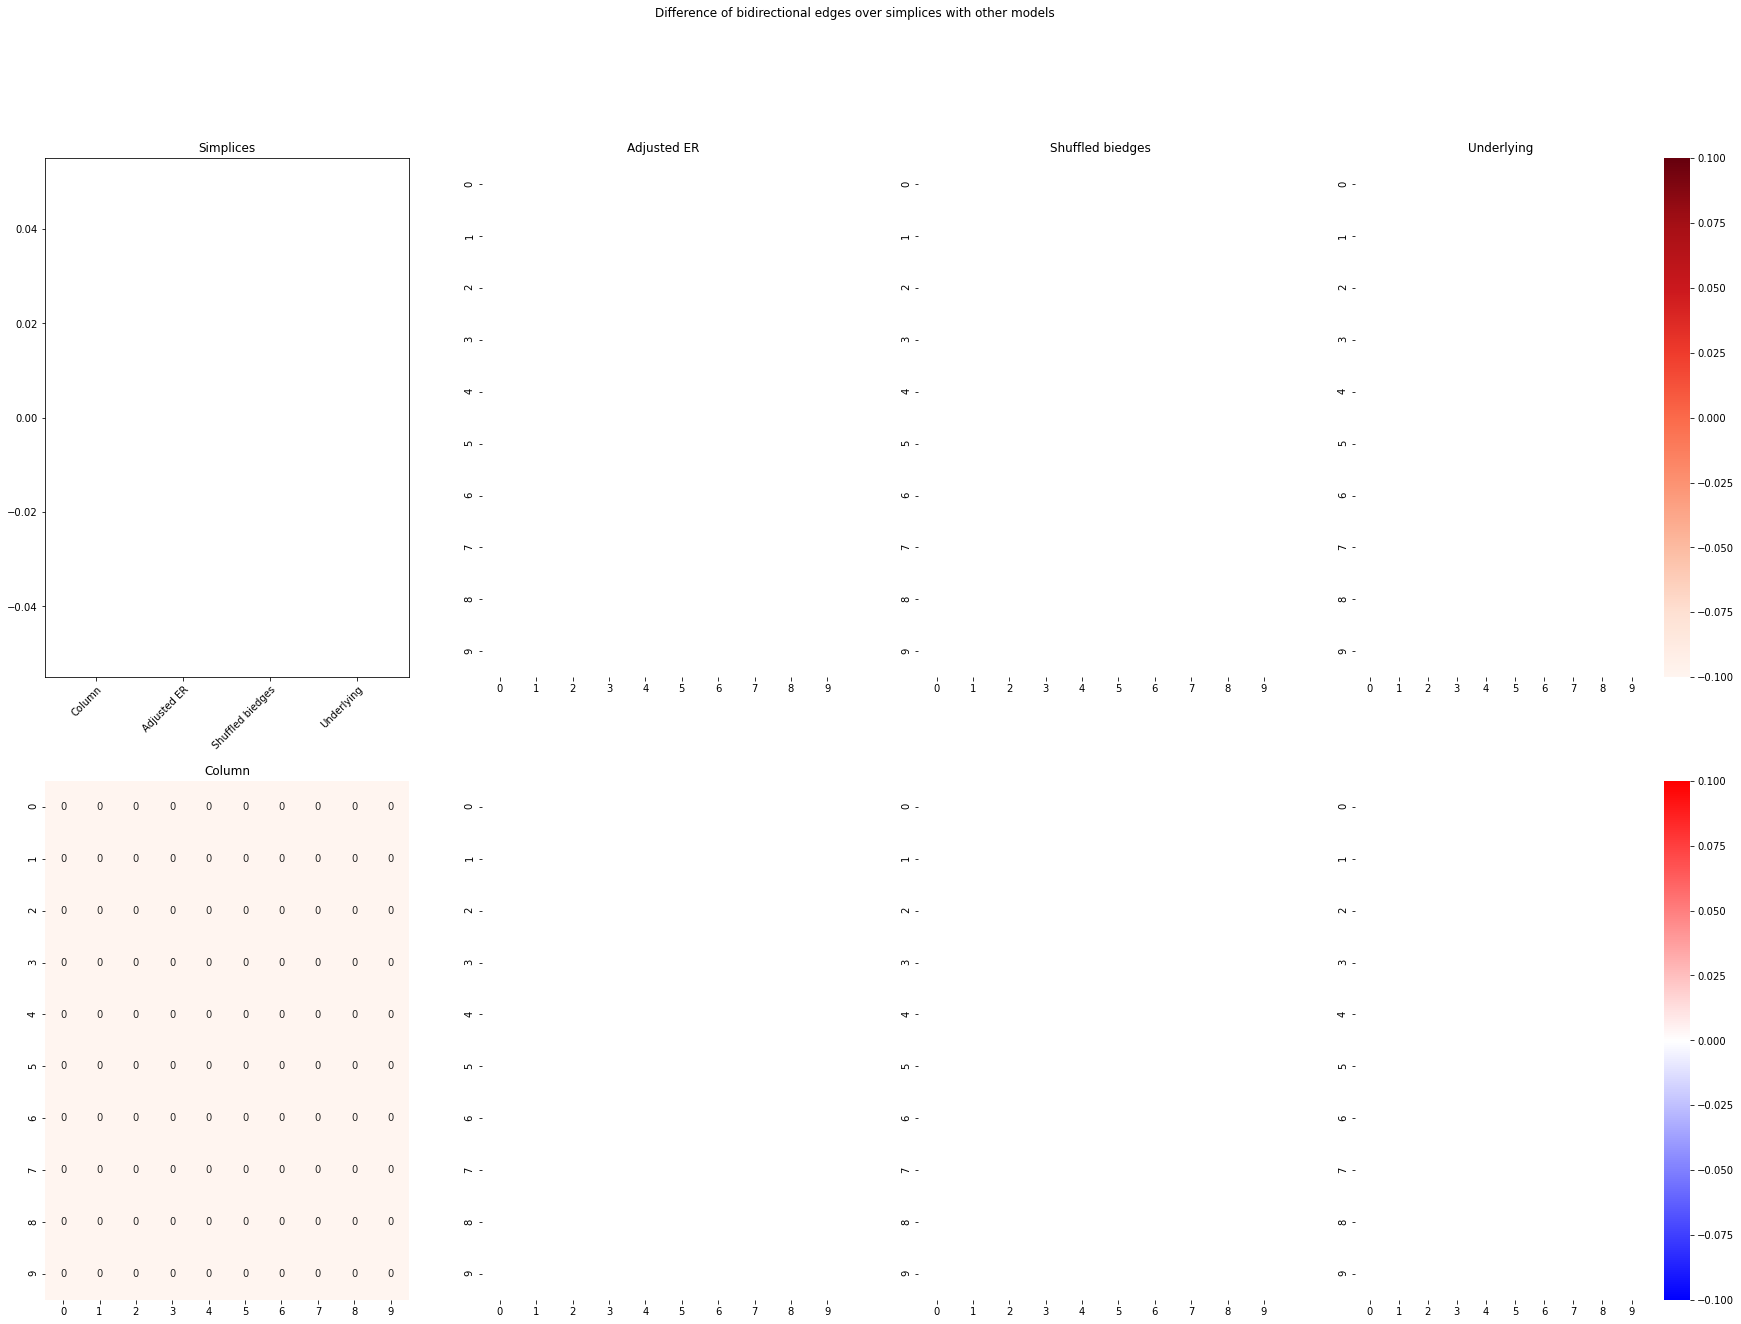

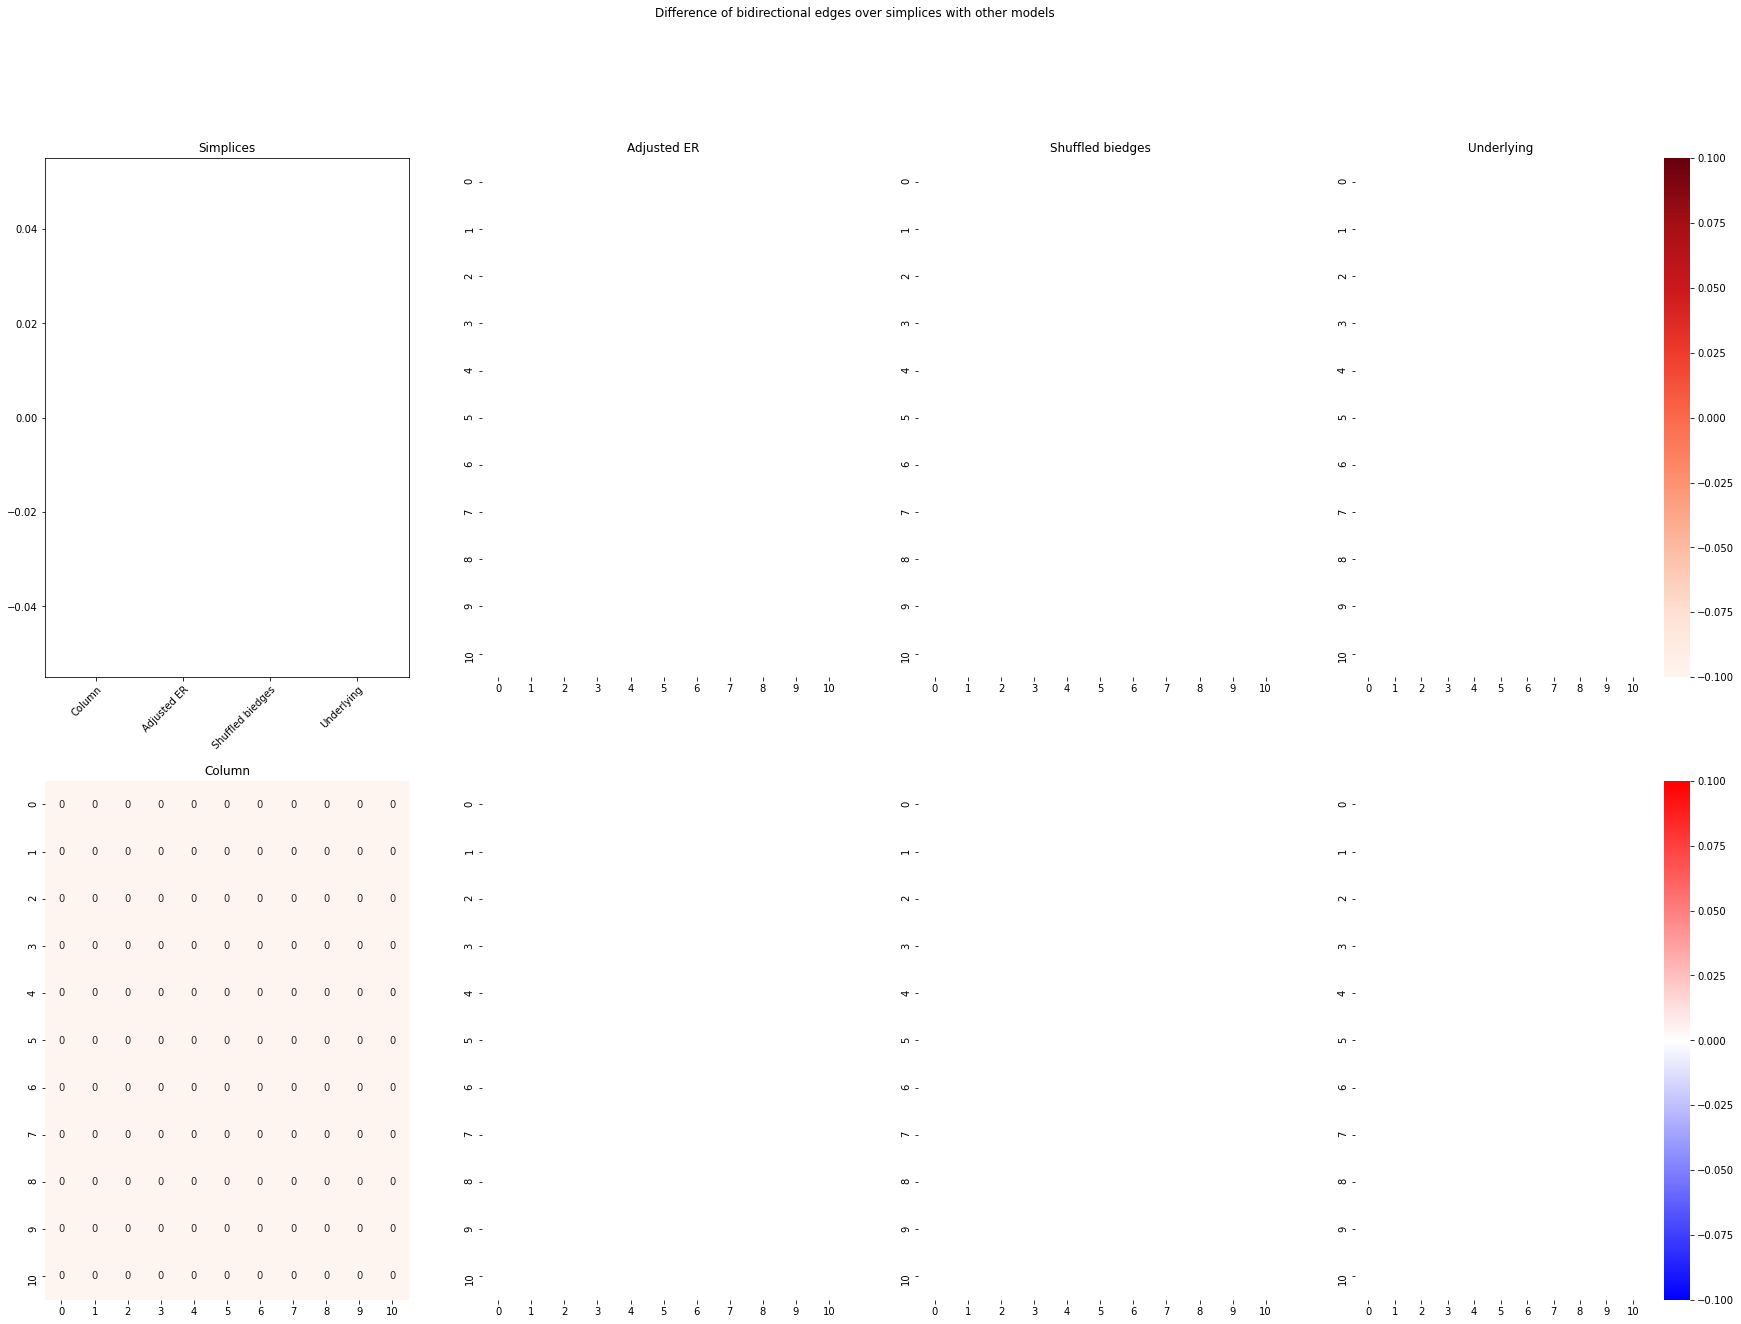

In [25]:
compare_graphs_diff_normalized([amax,bmax,cmax,dmax], 1, "maximal_difference_normalized")

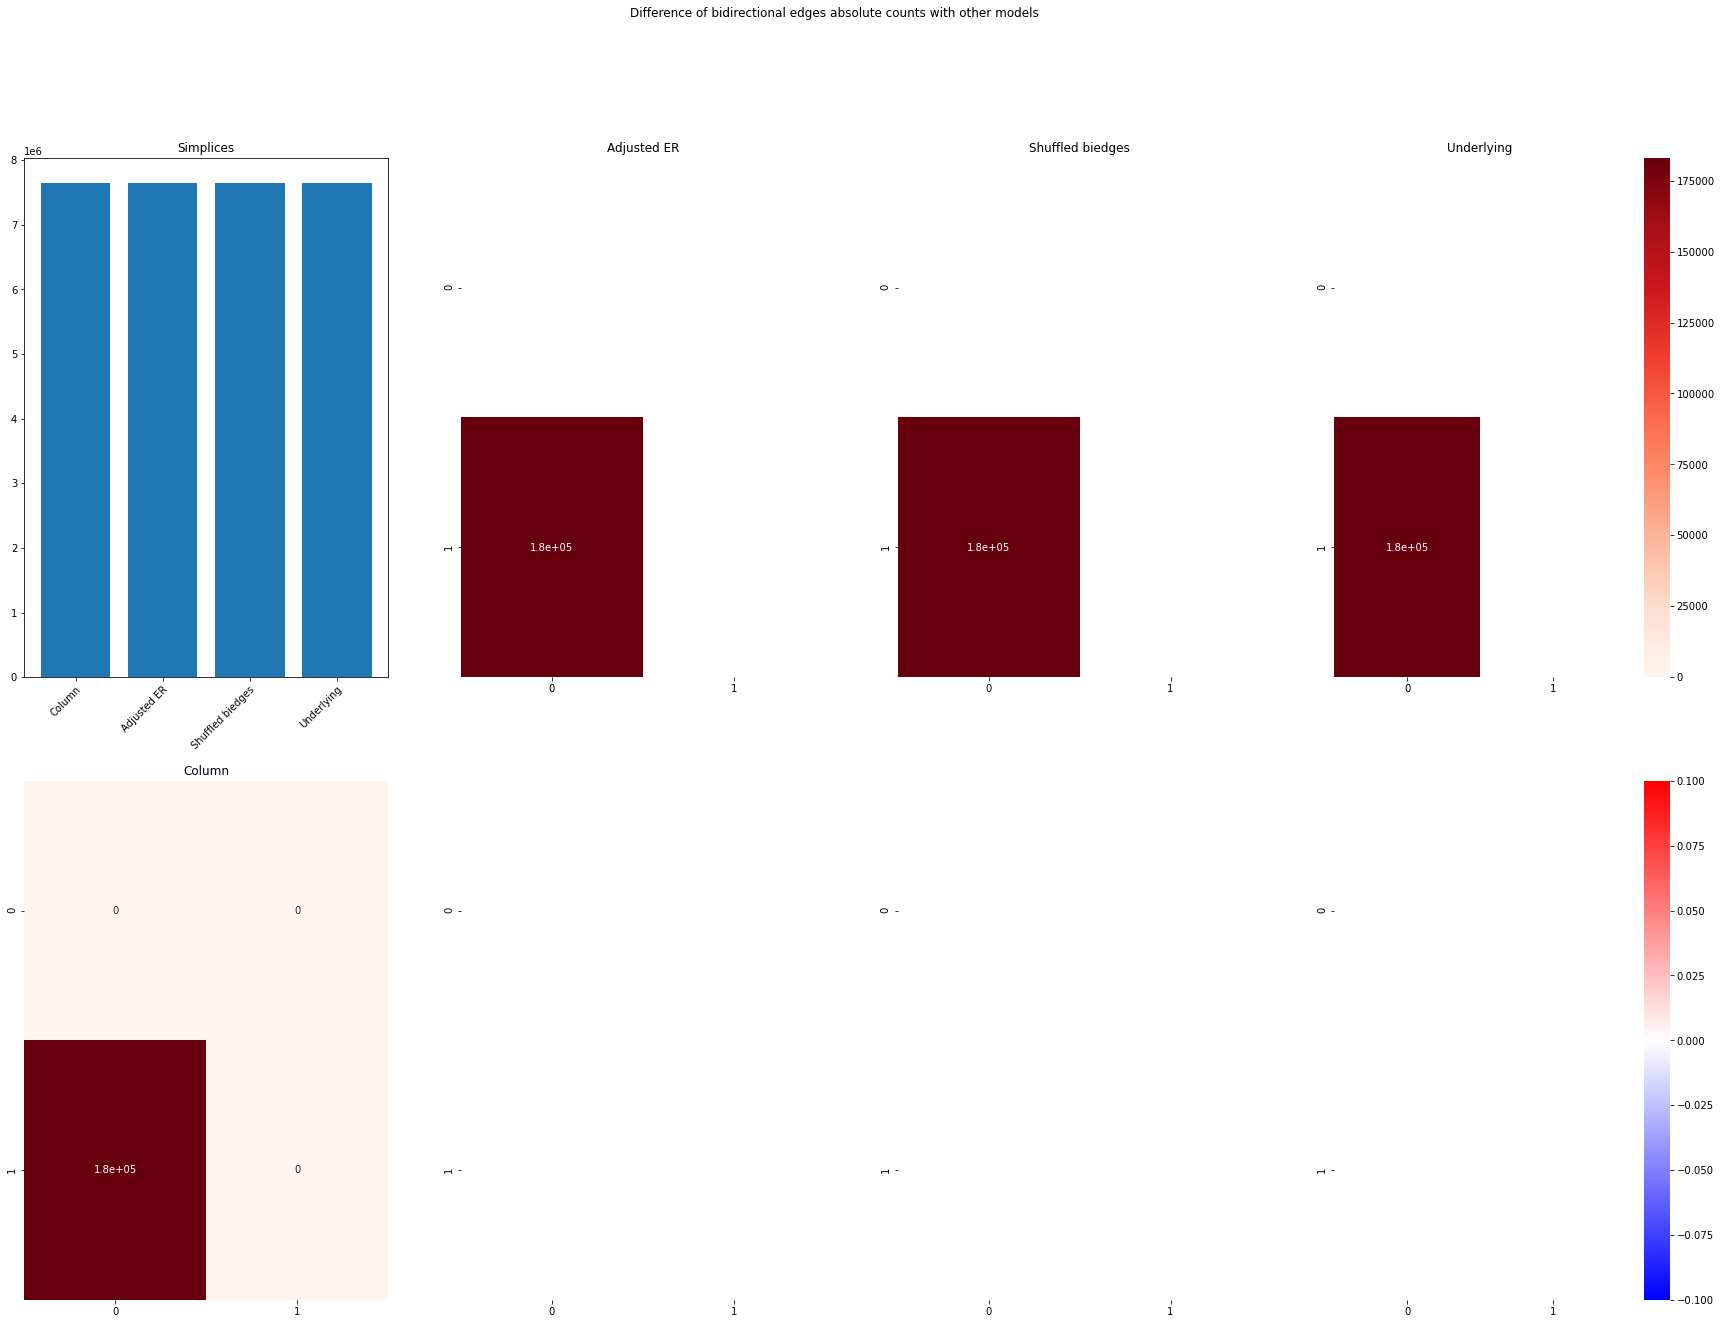

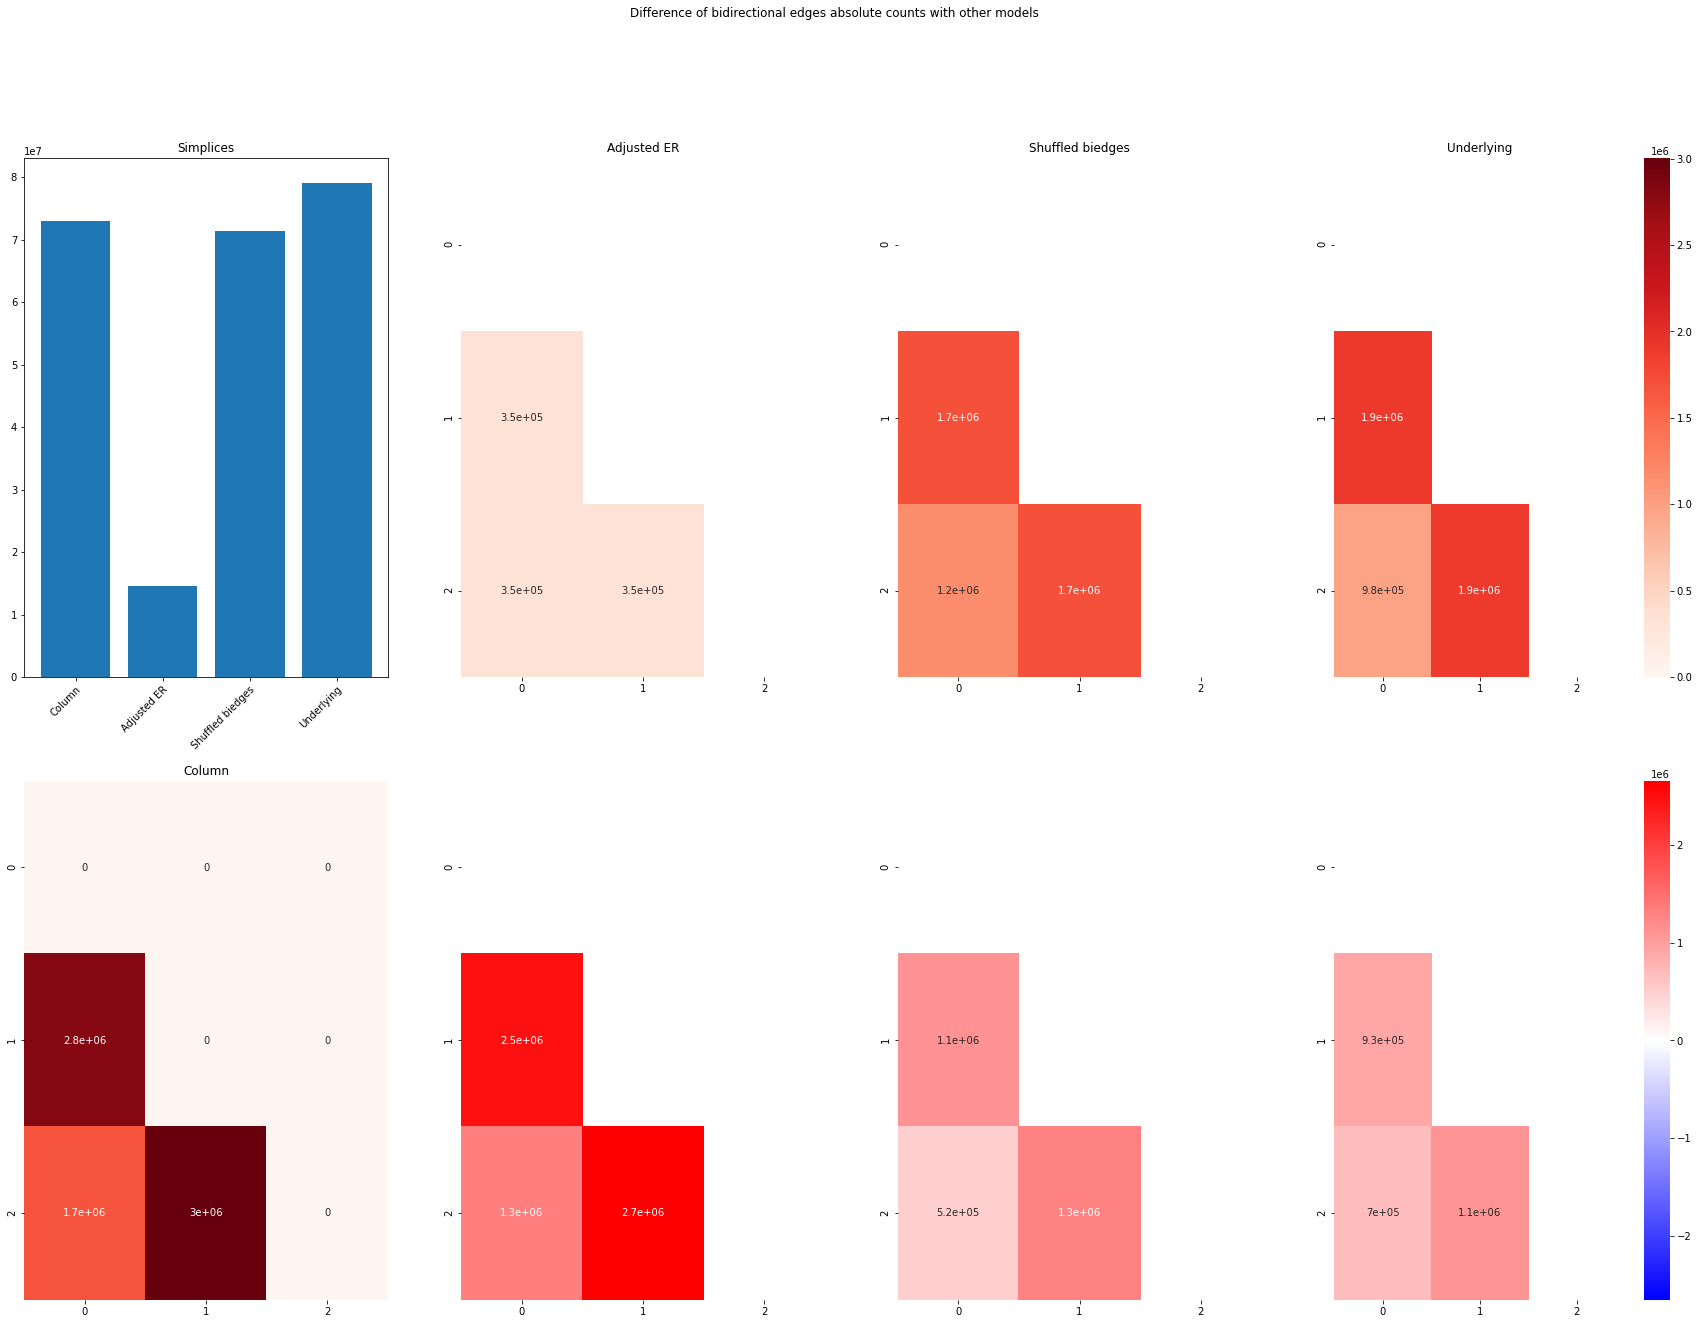

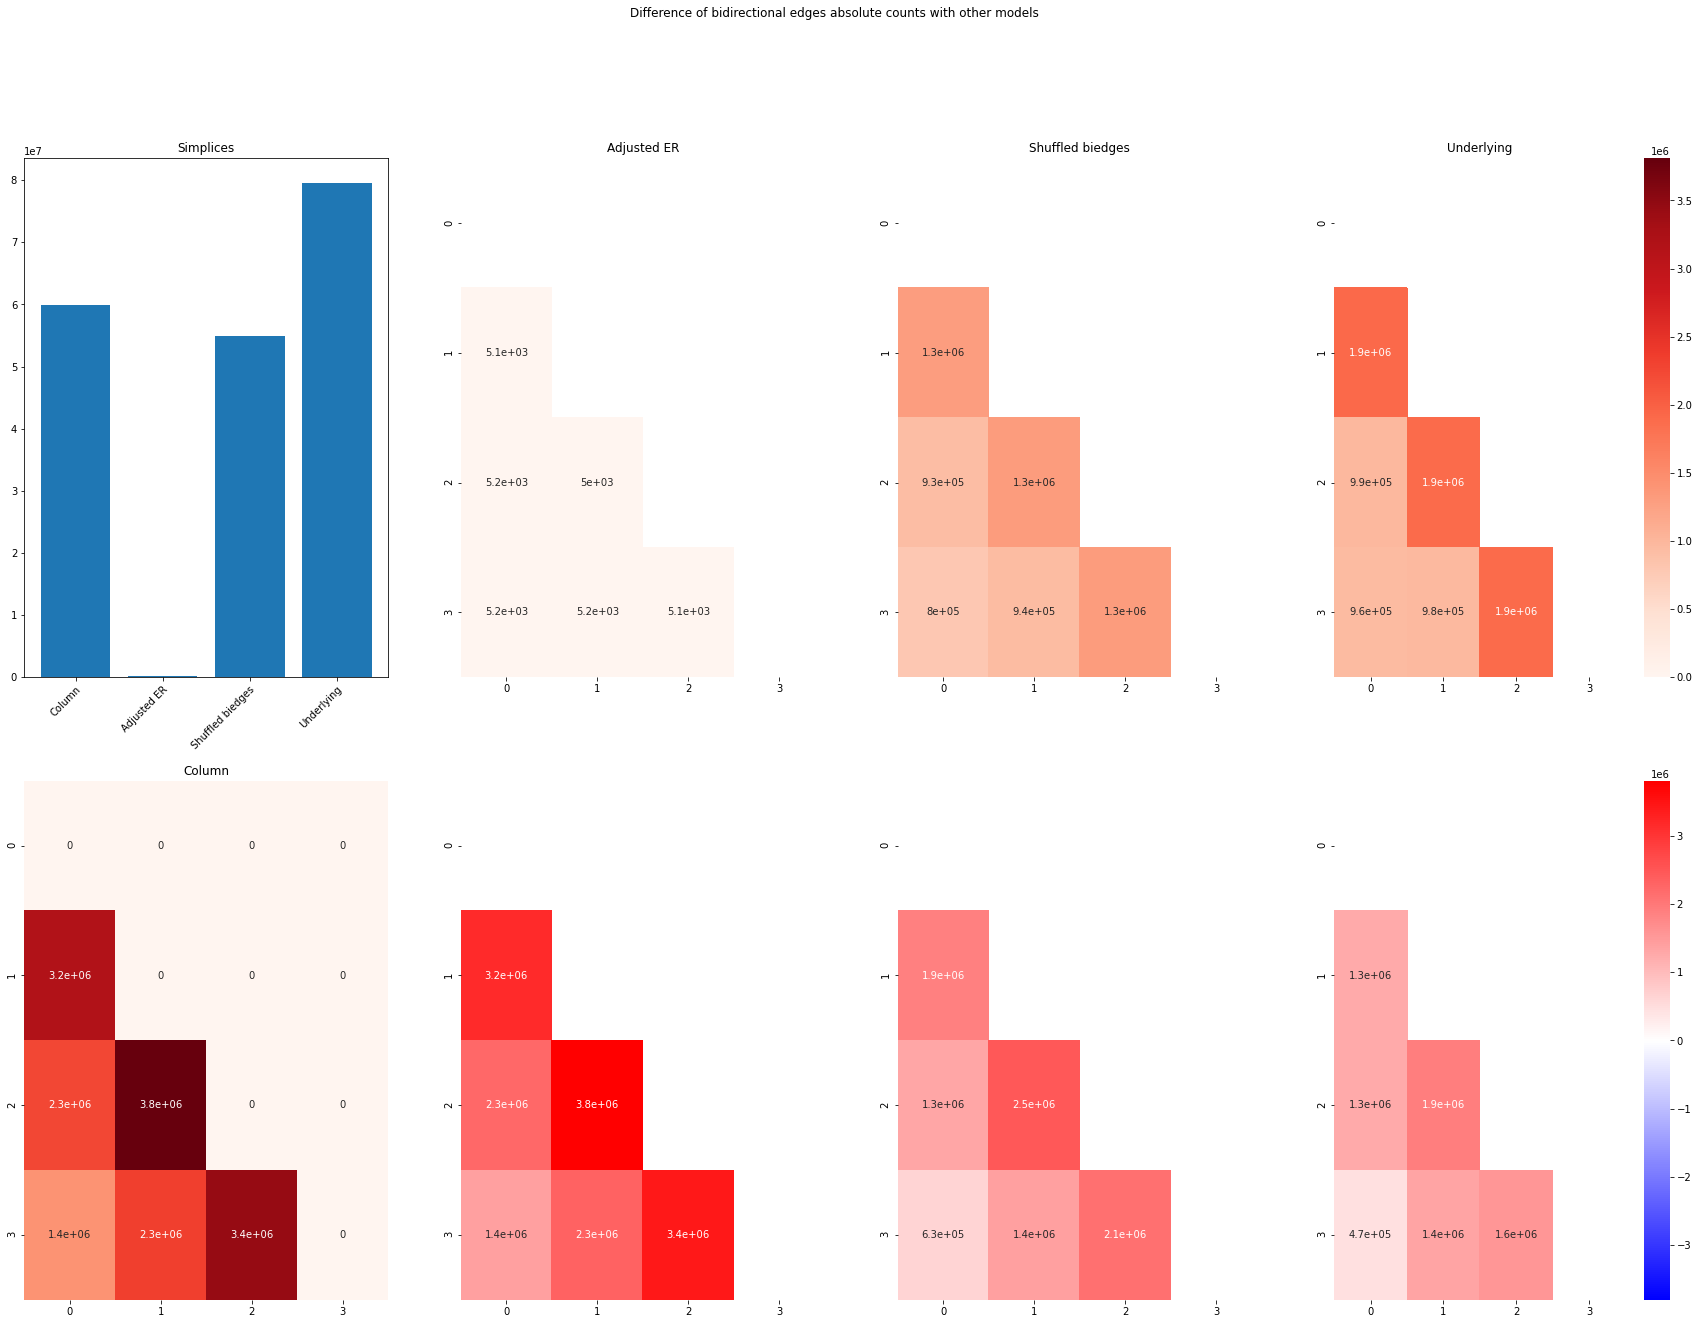

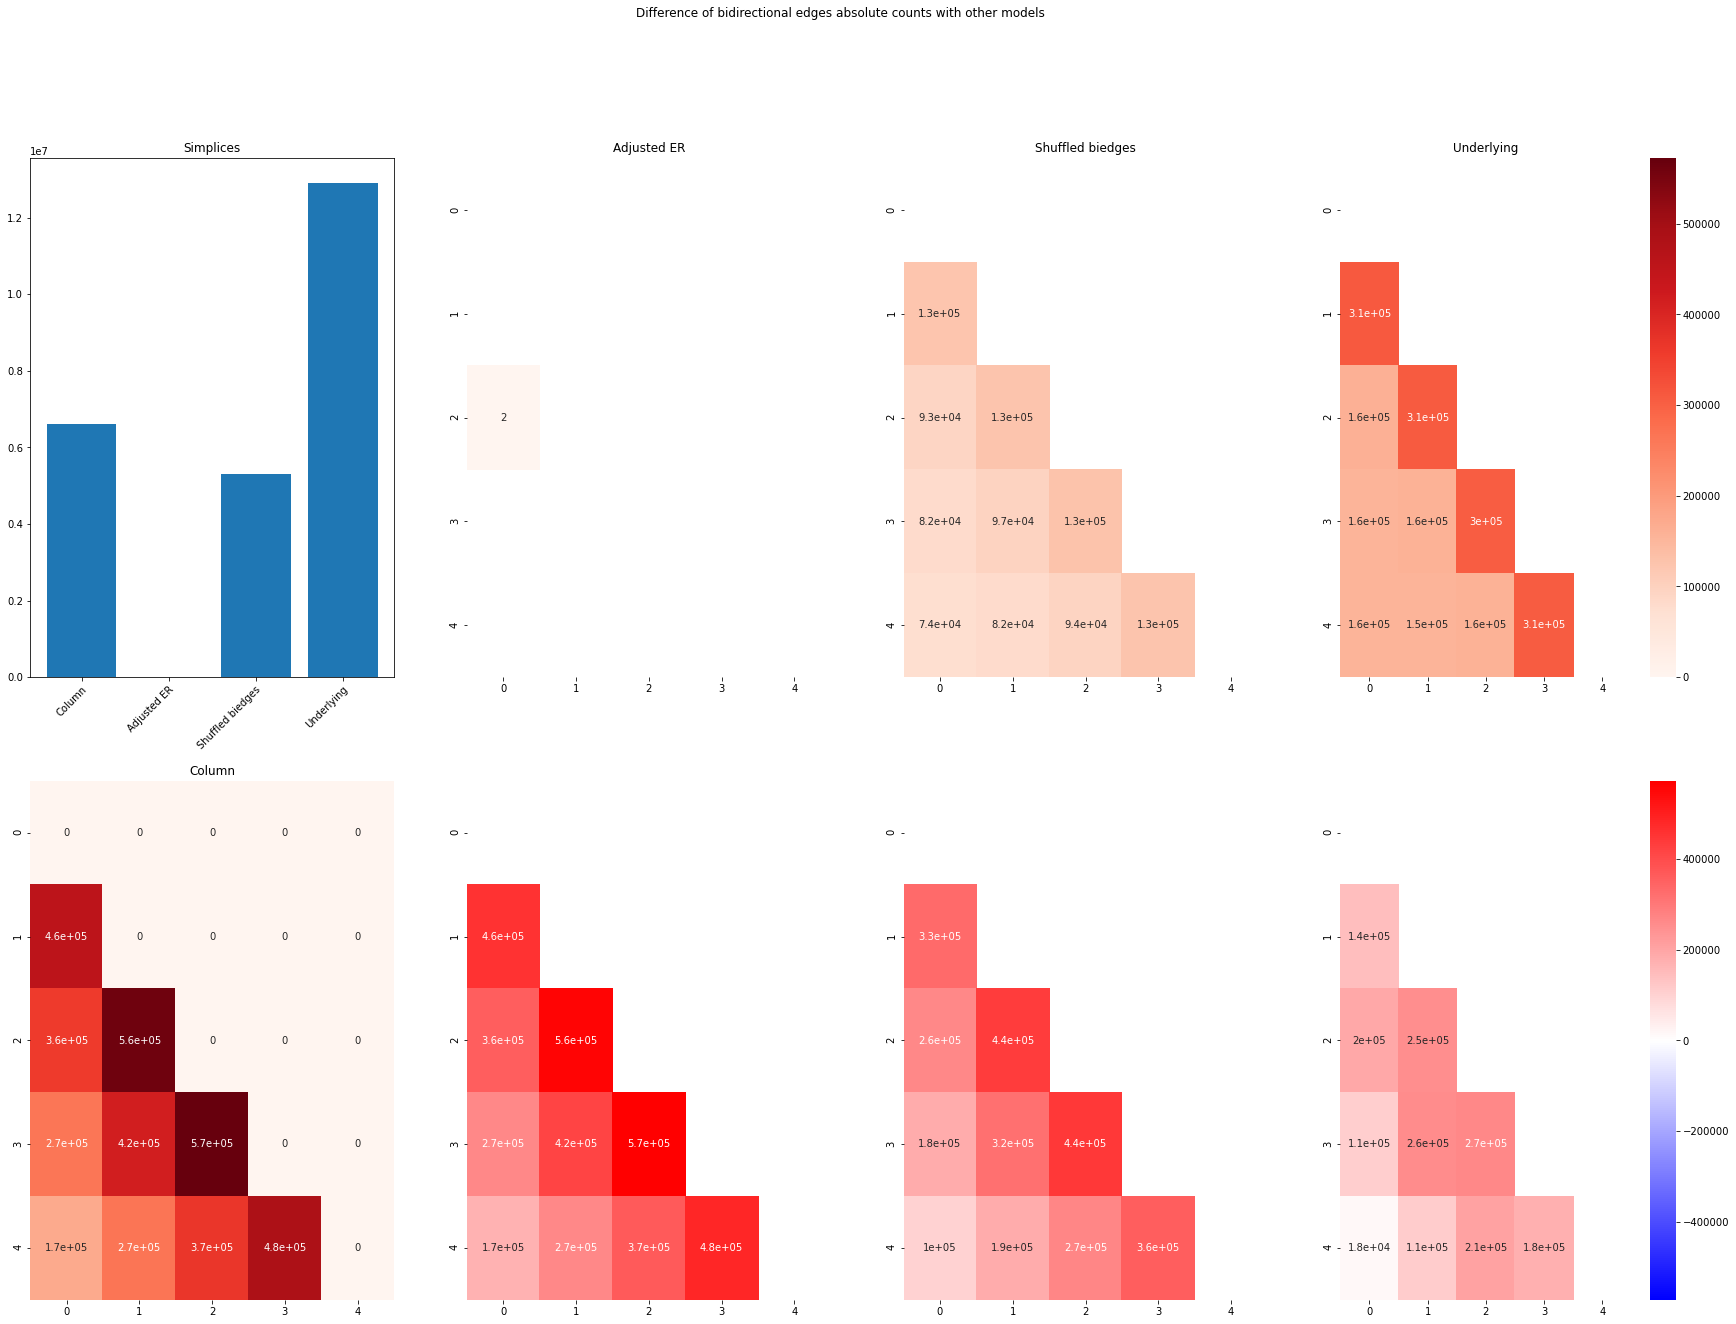

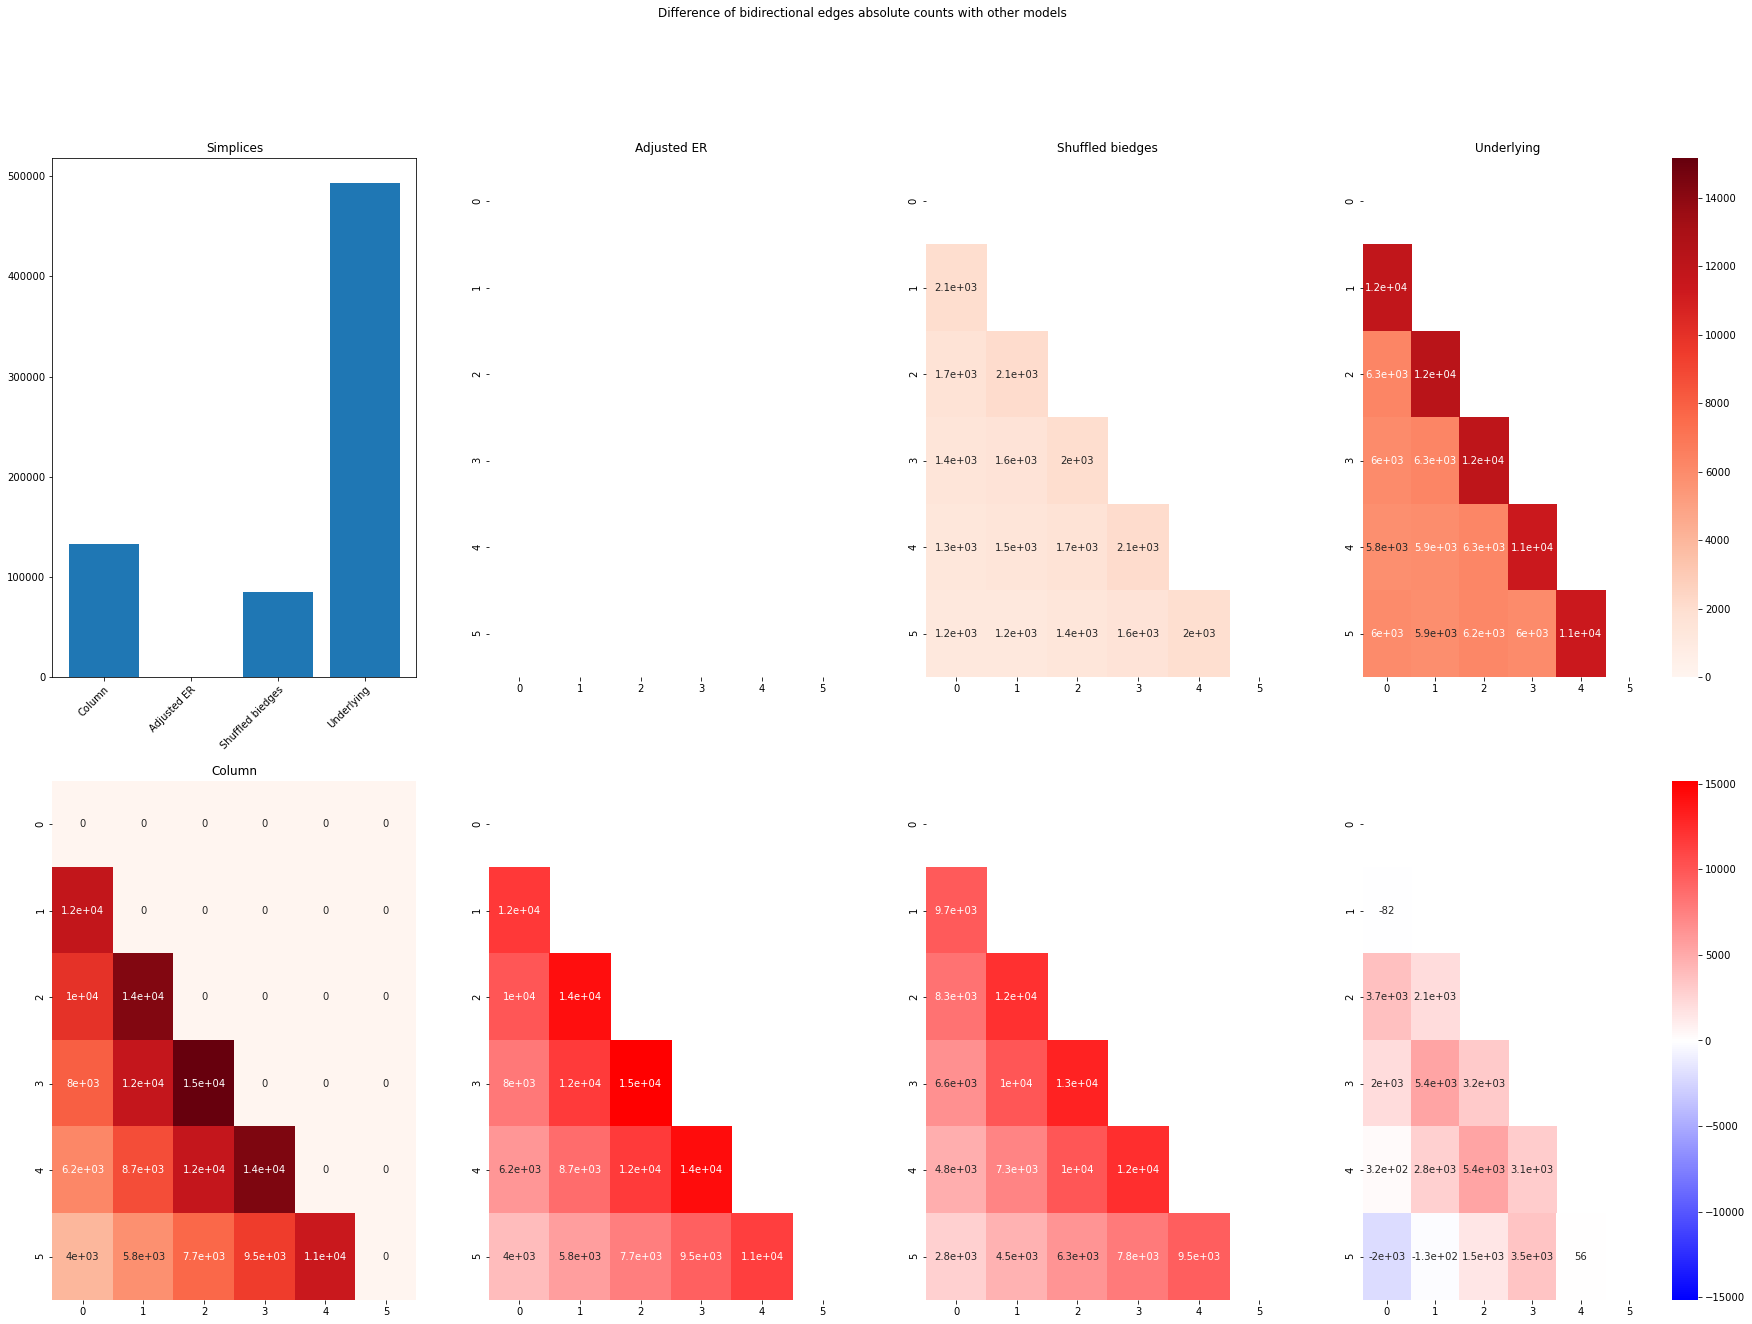

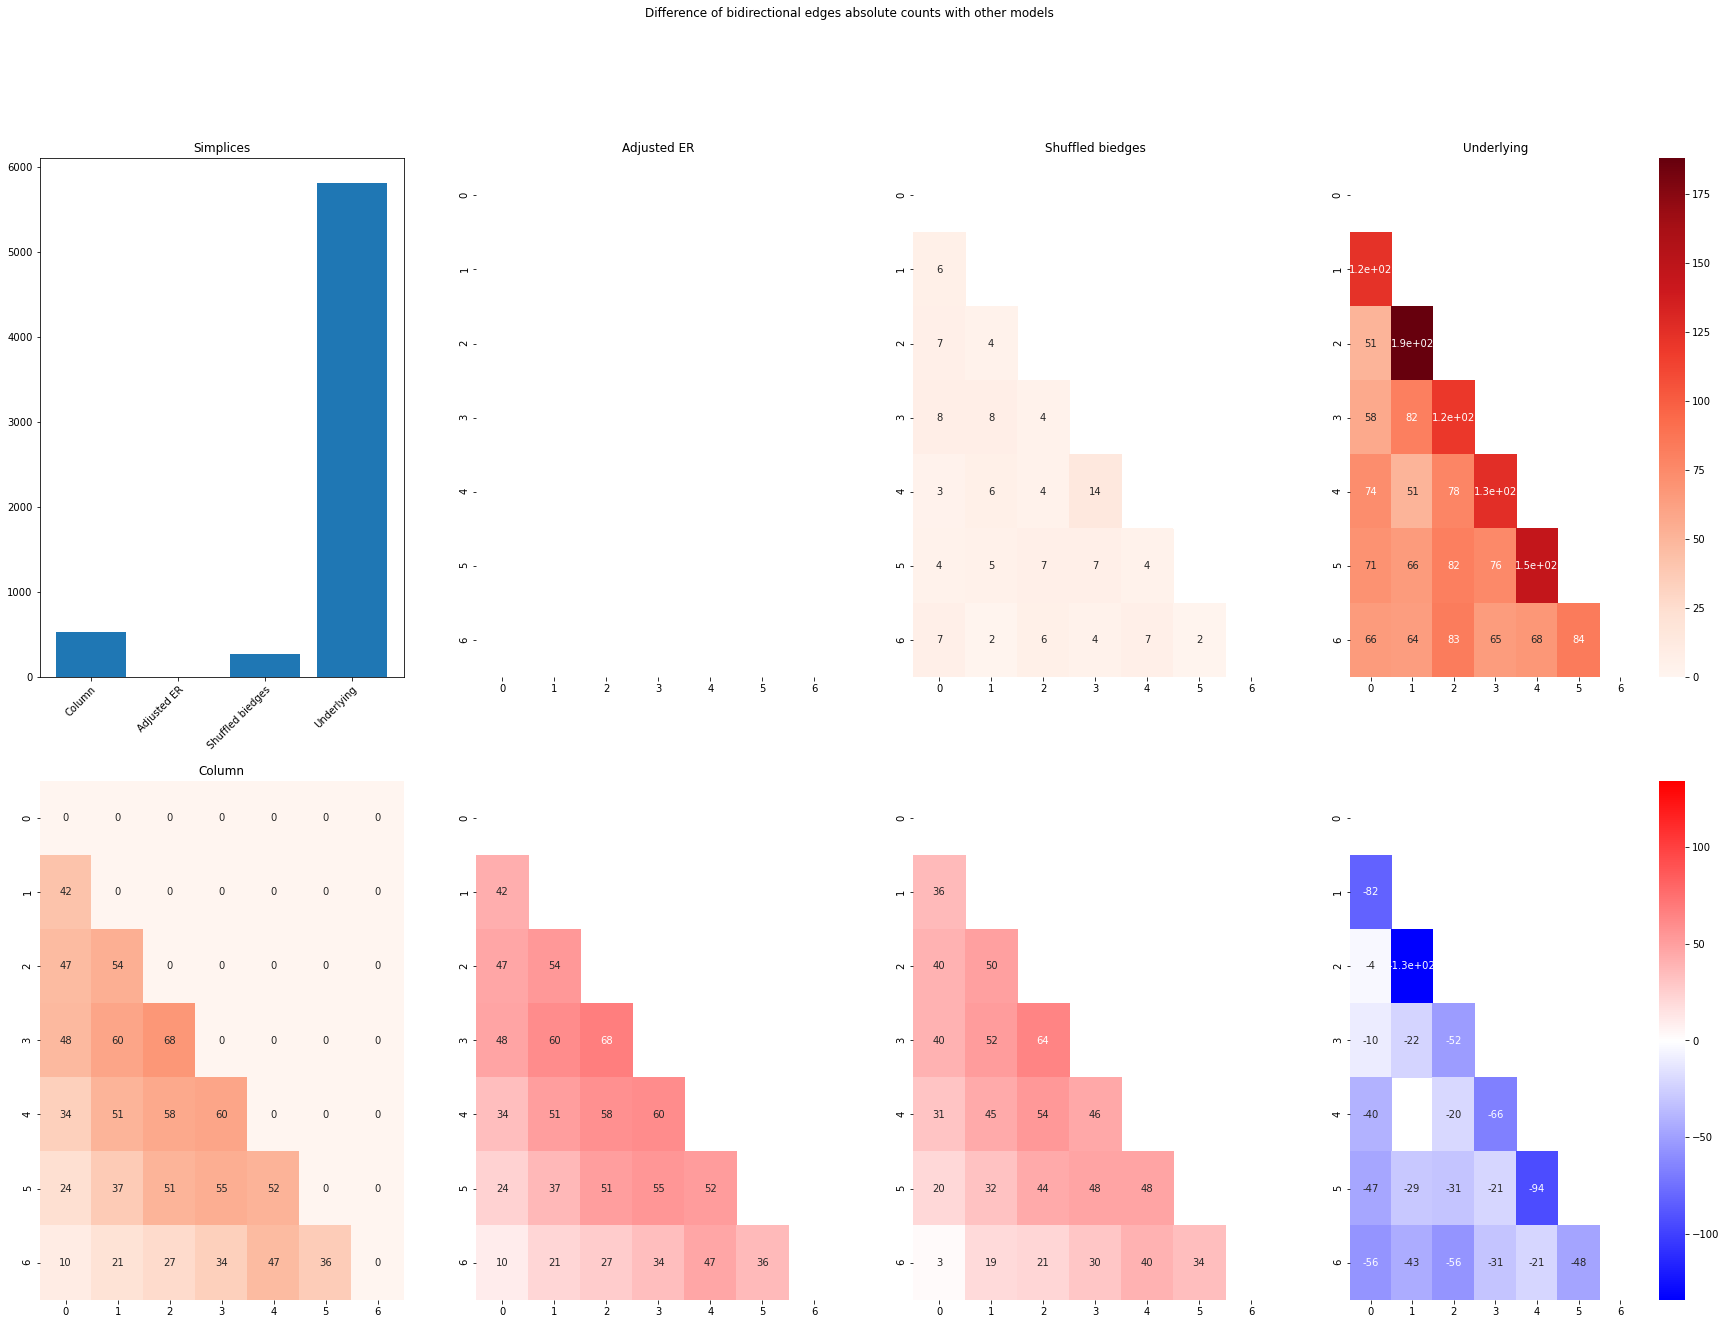

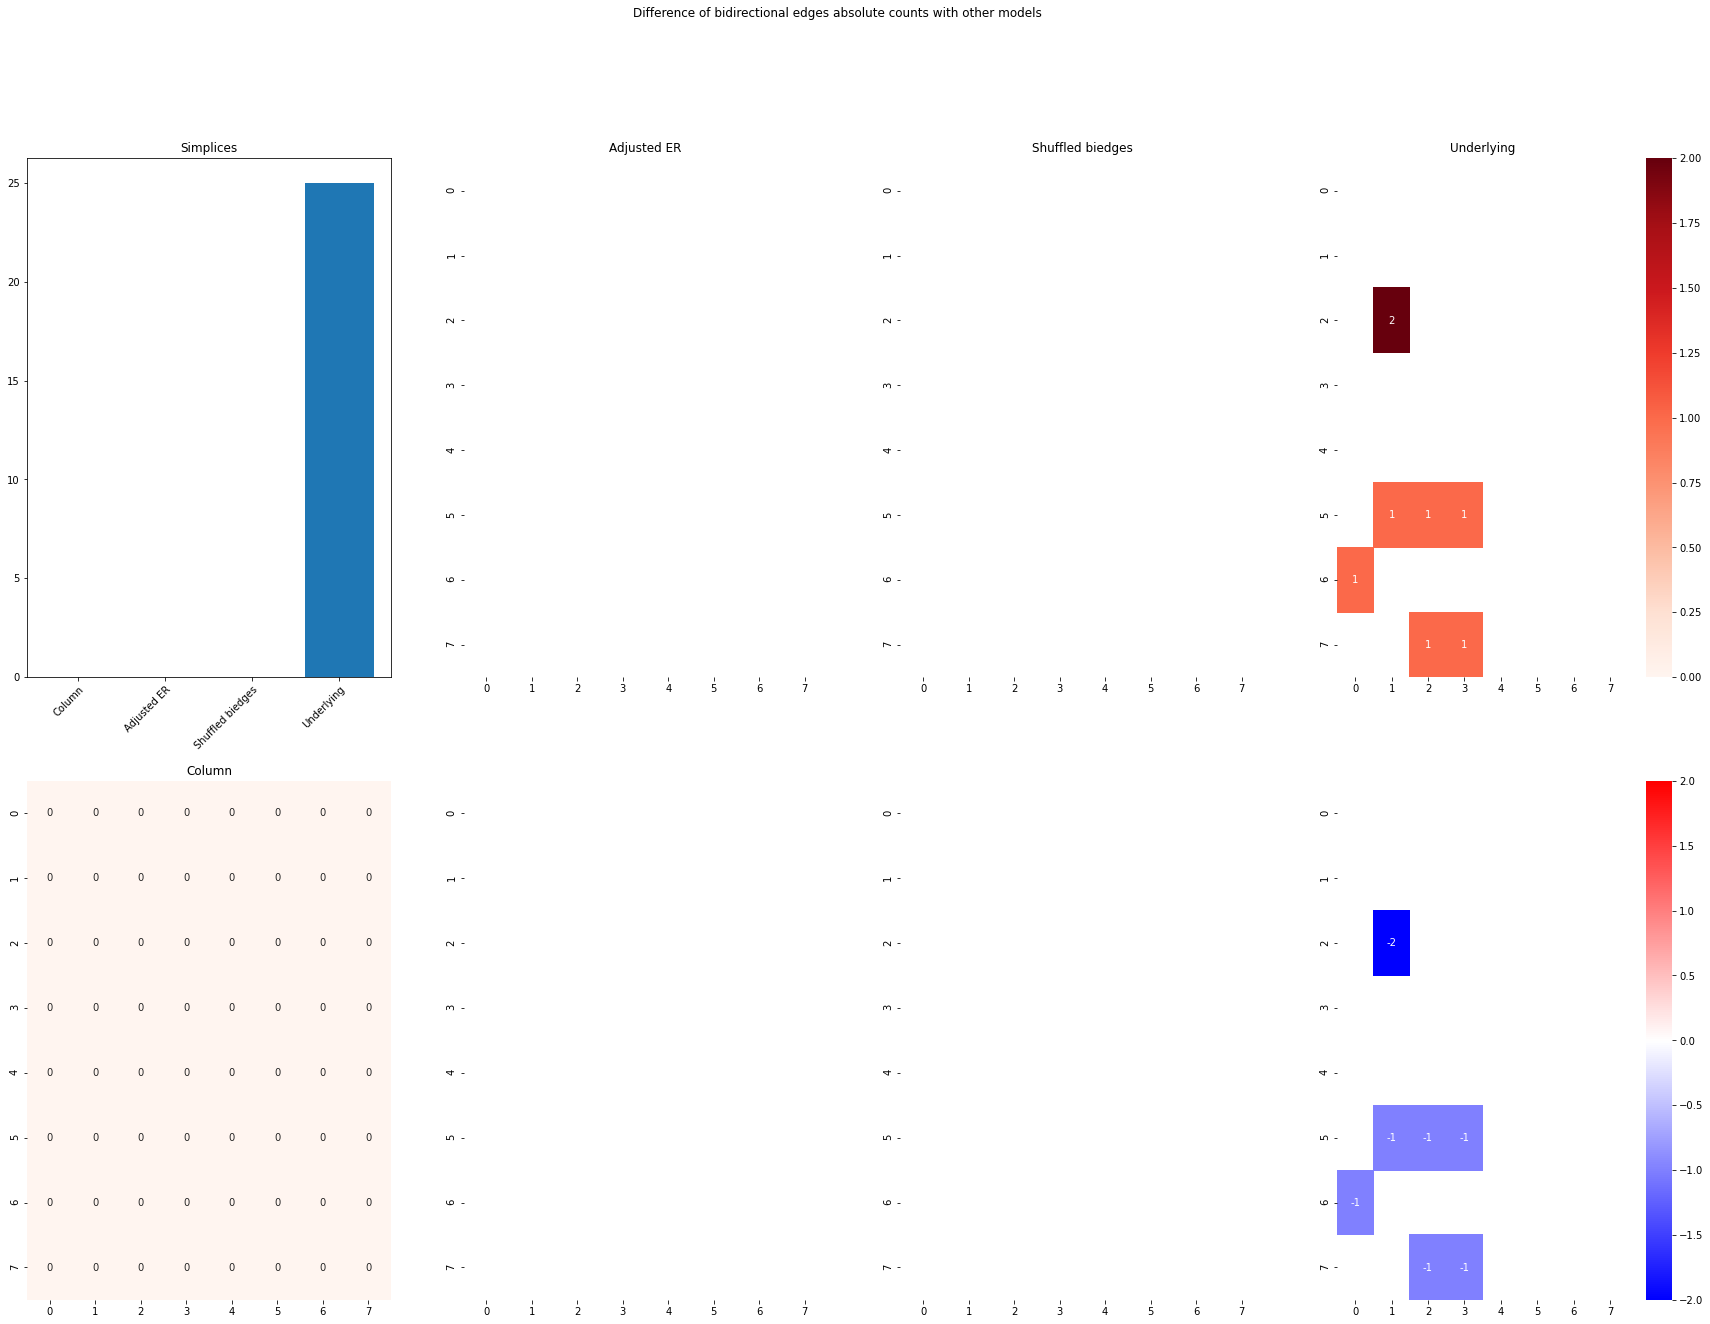

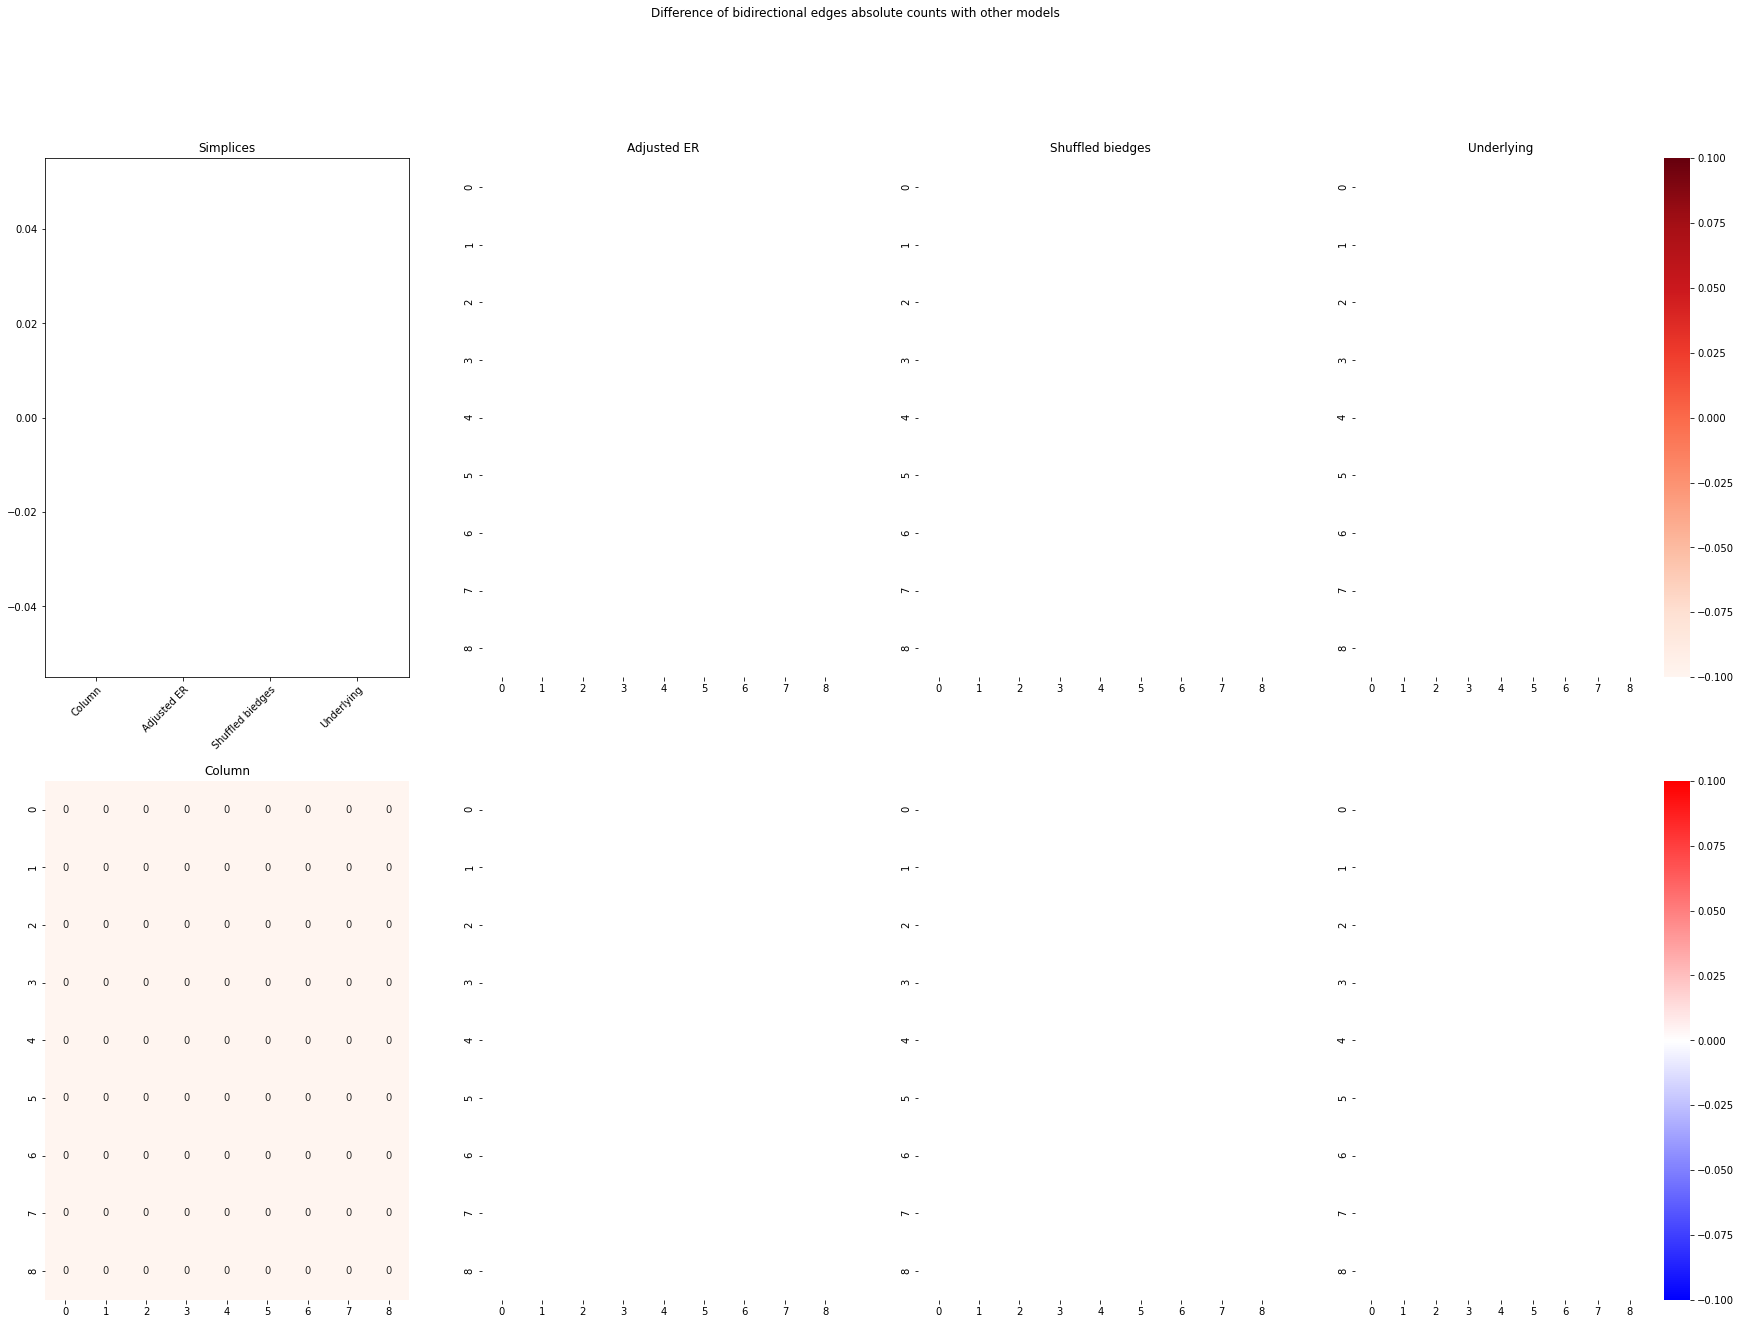

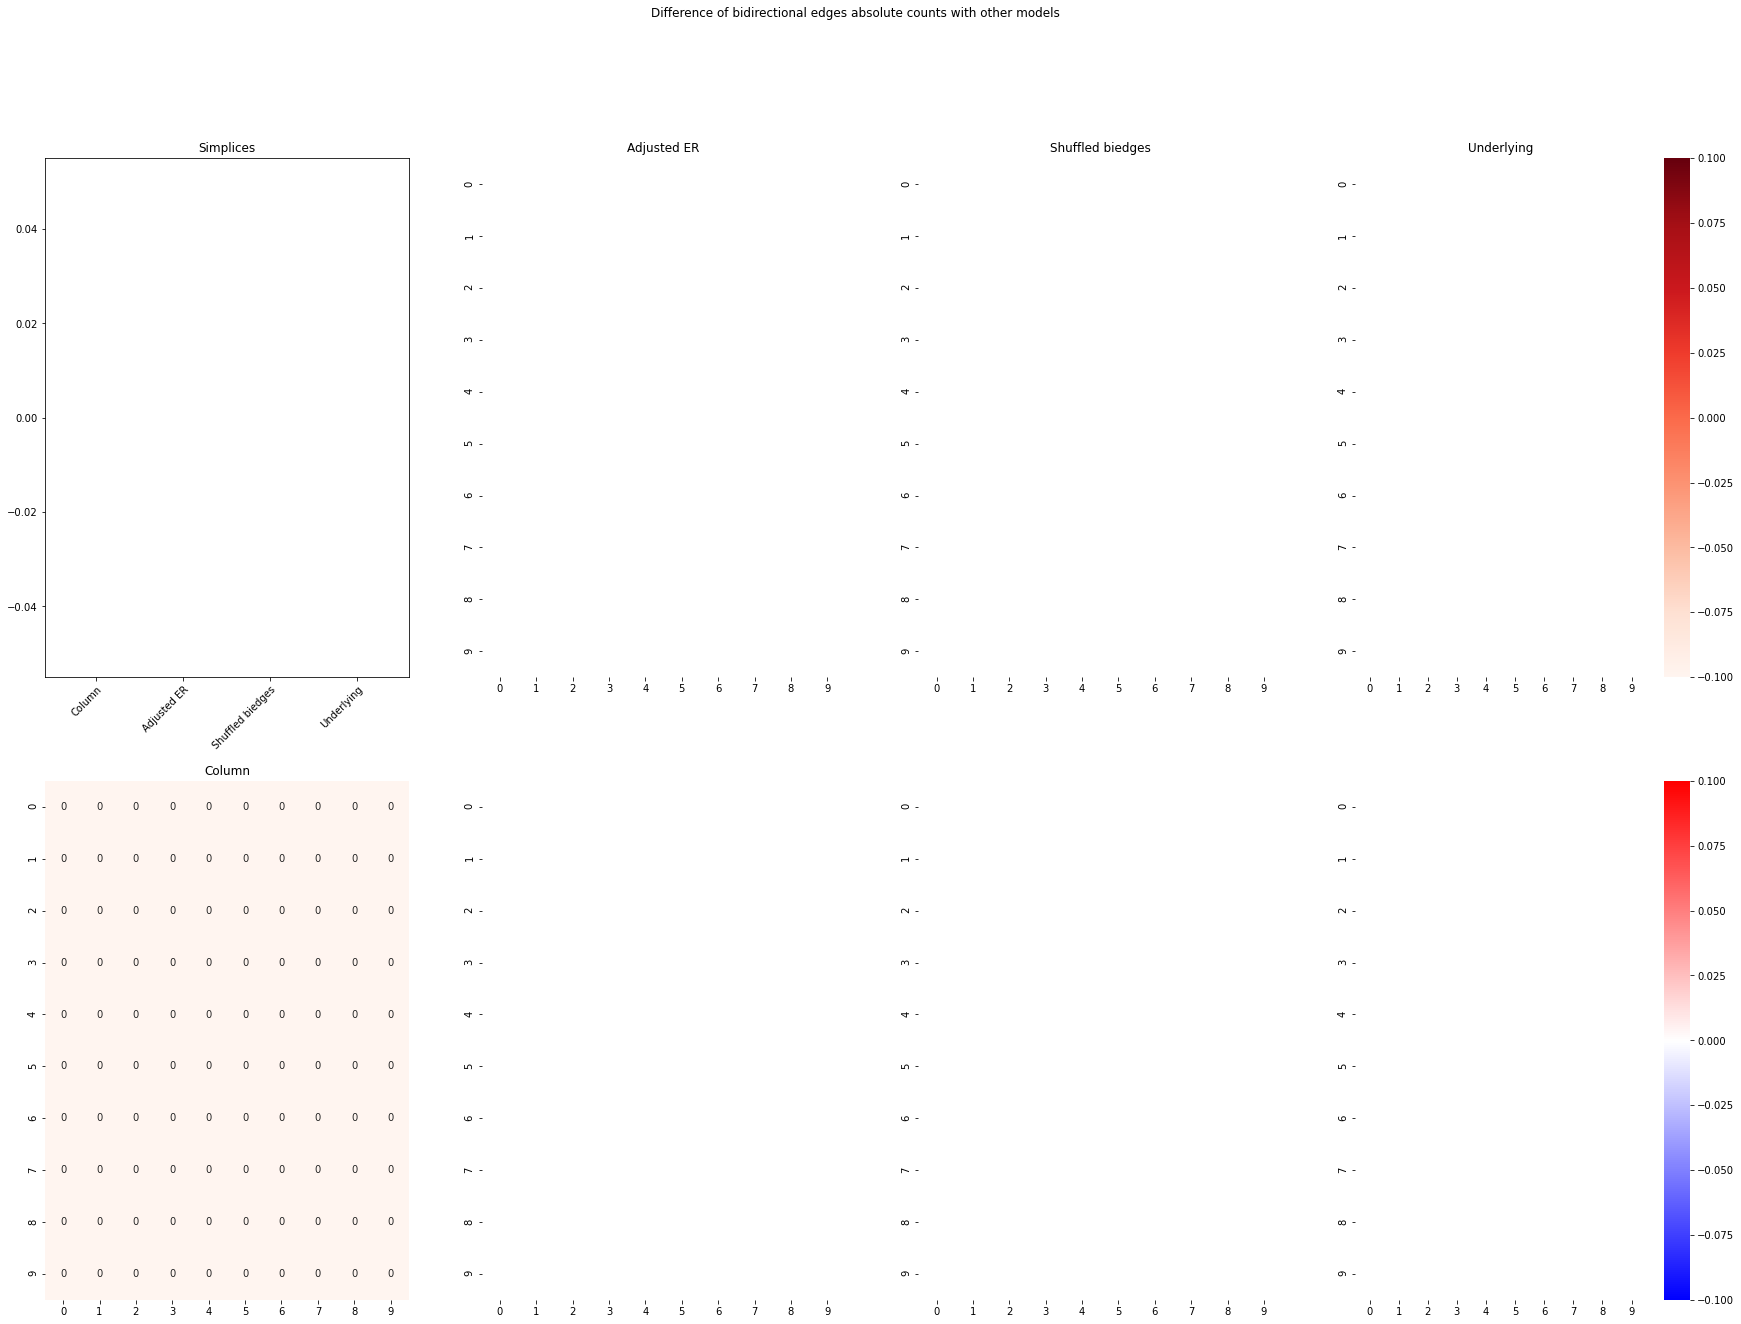

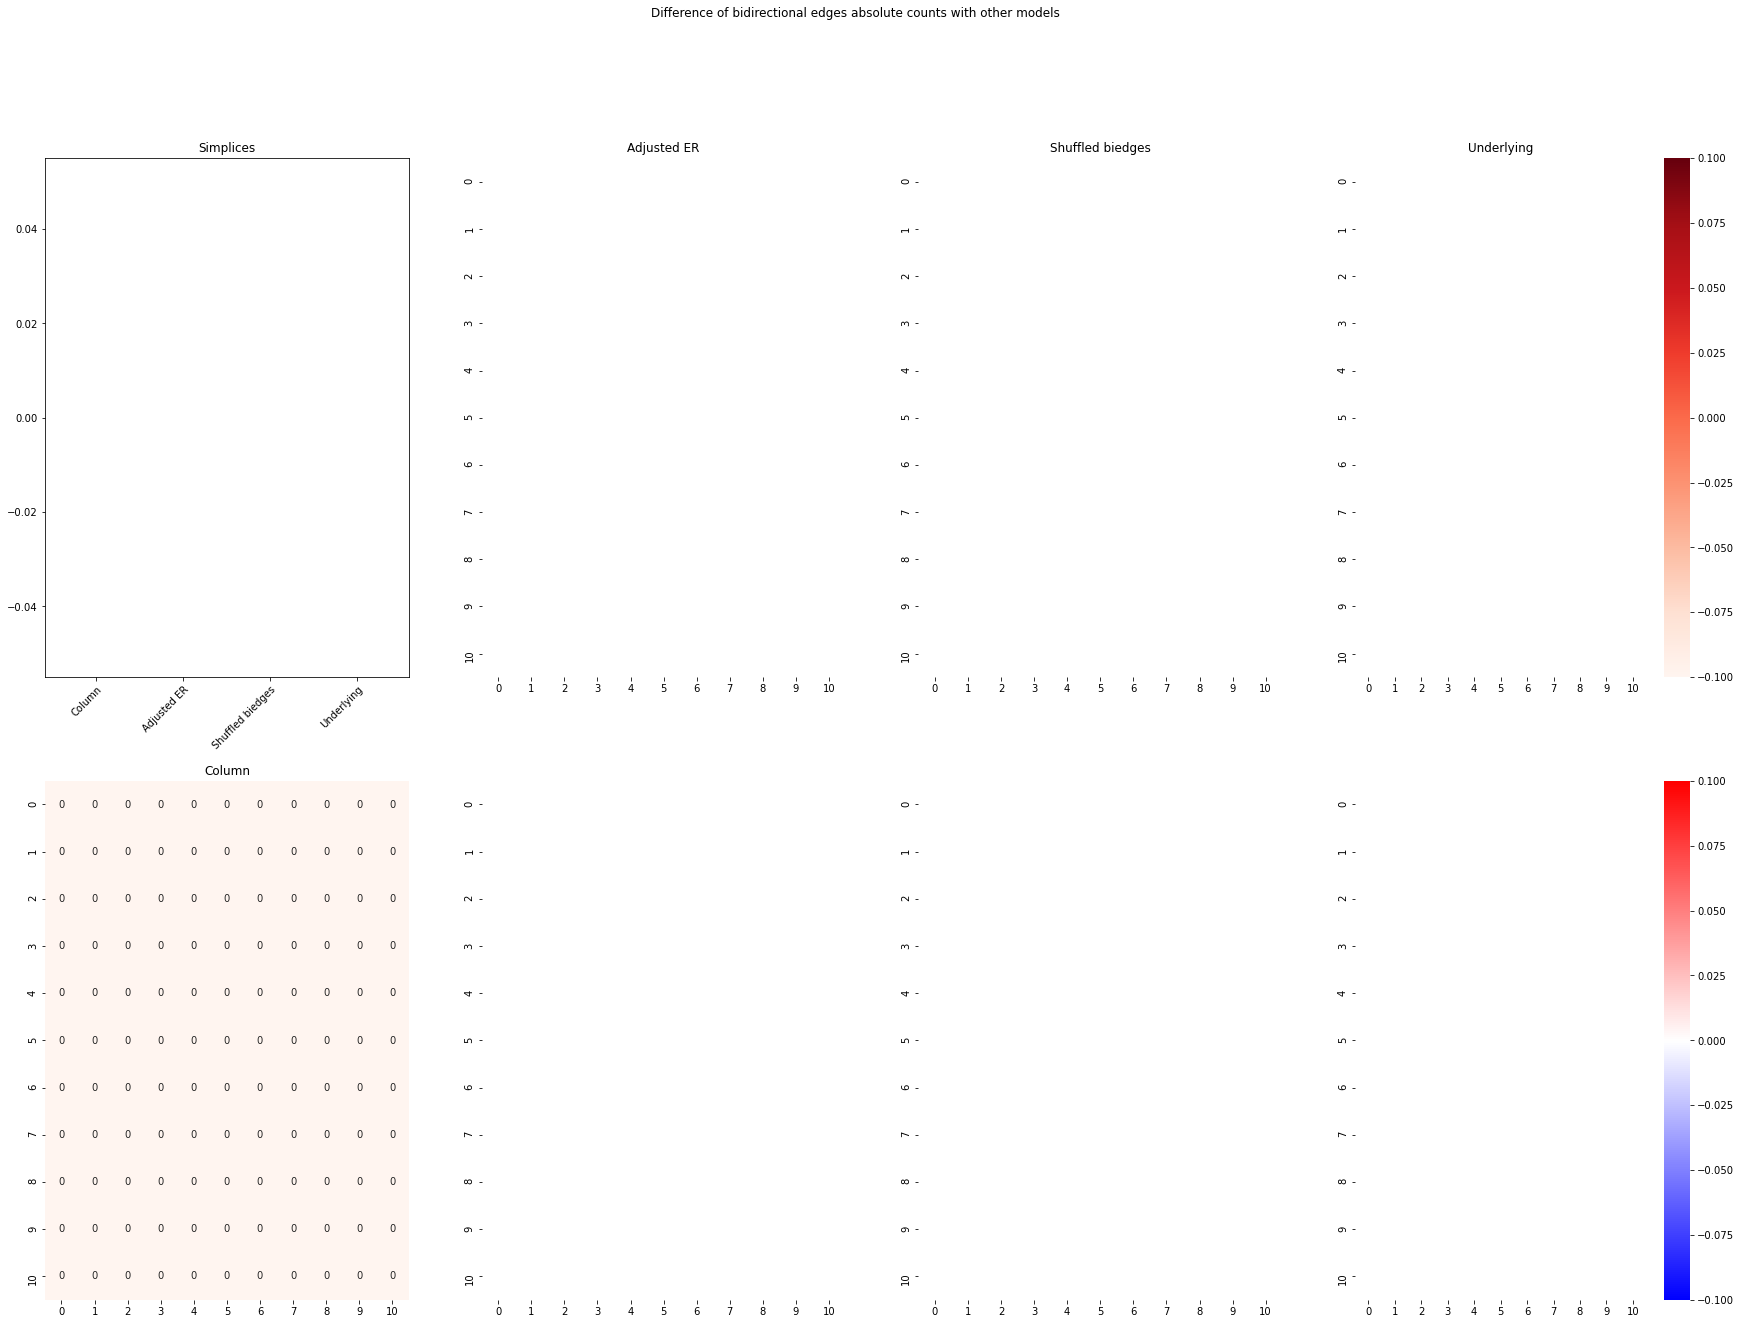

In [26]:
compare_graphs_diff([a,b0,c0,d0], 1, "difference")

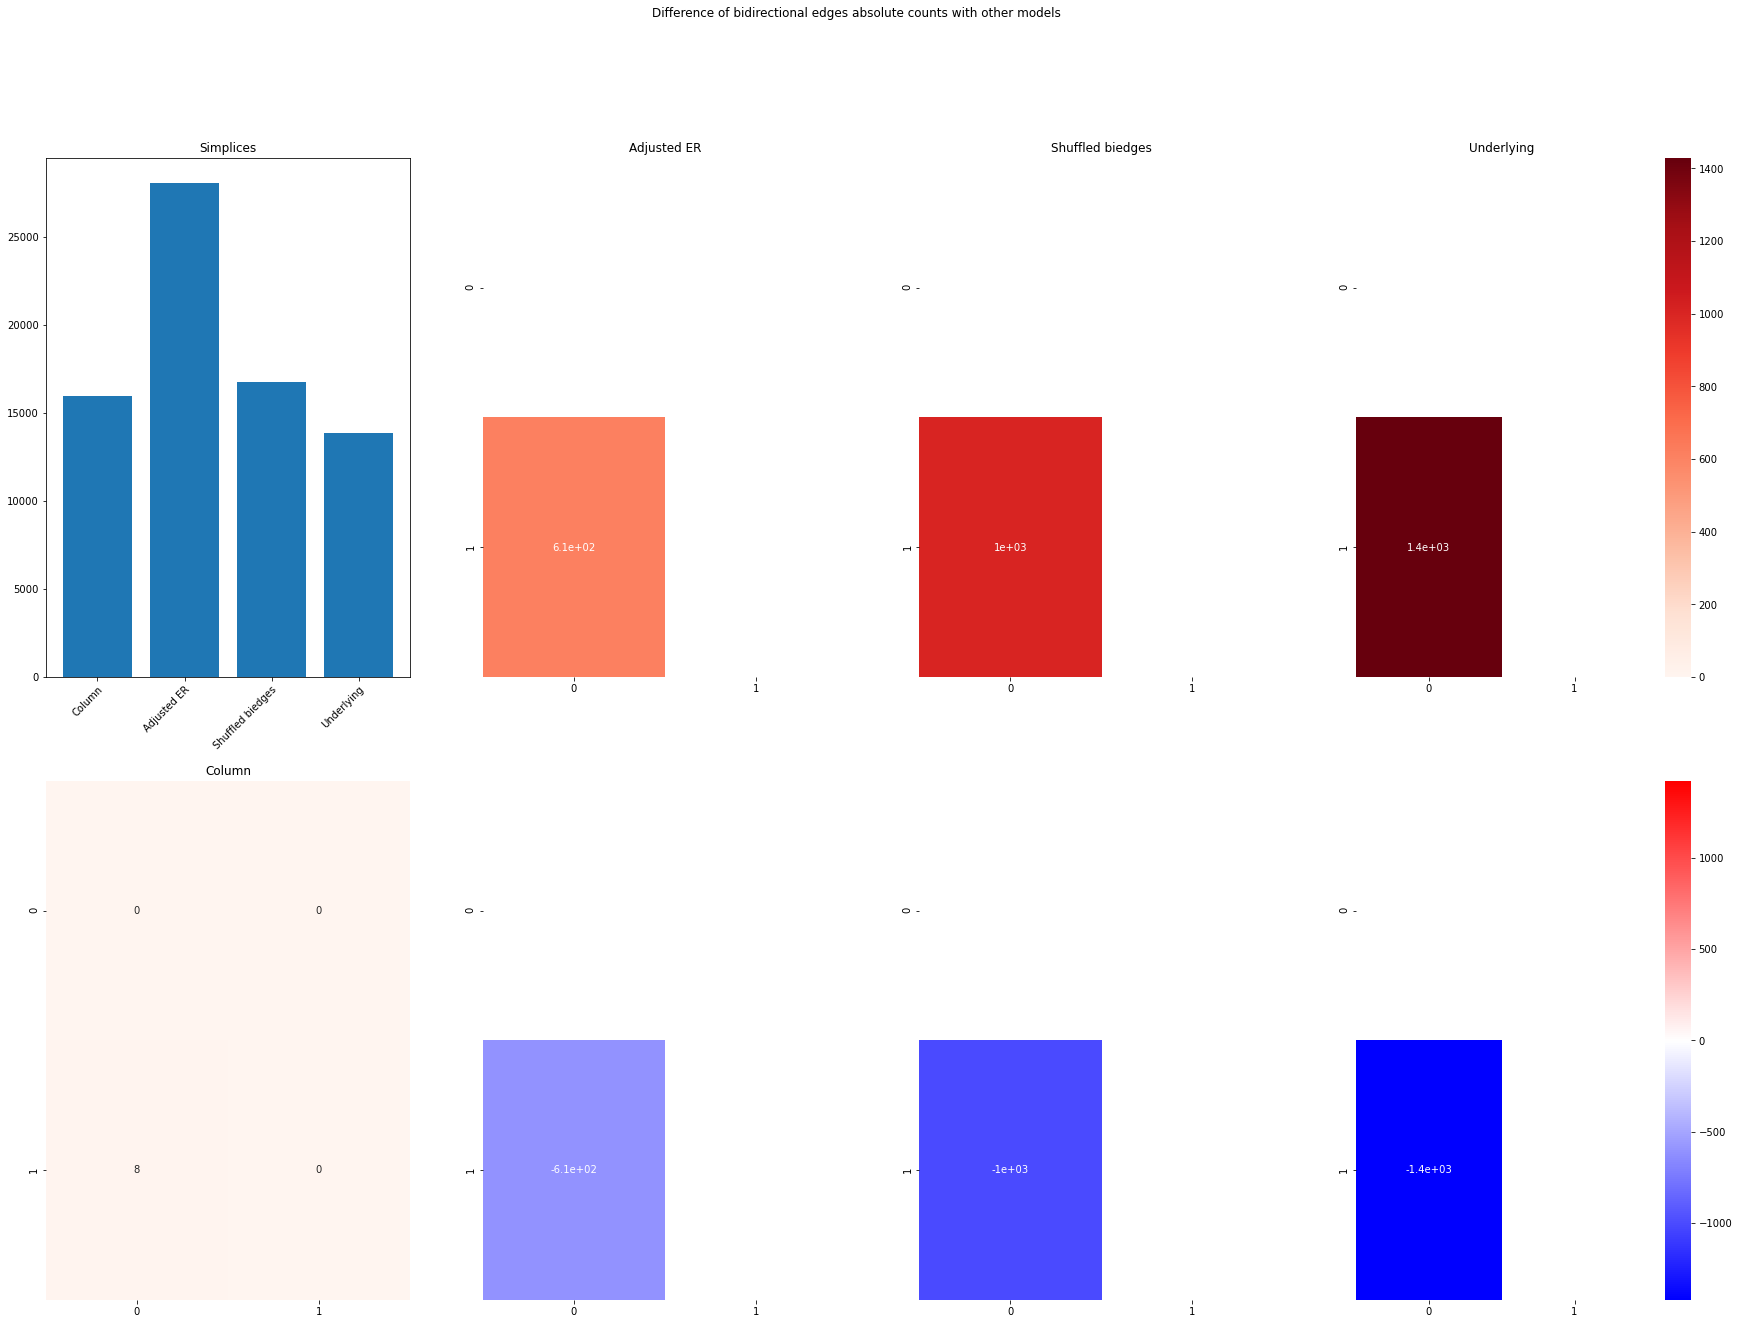

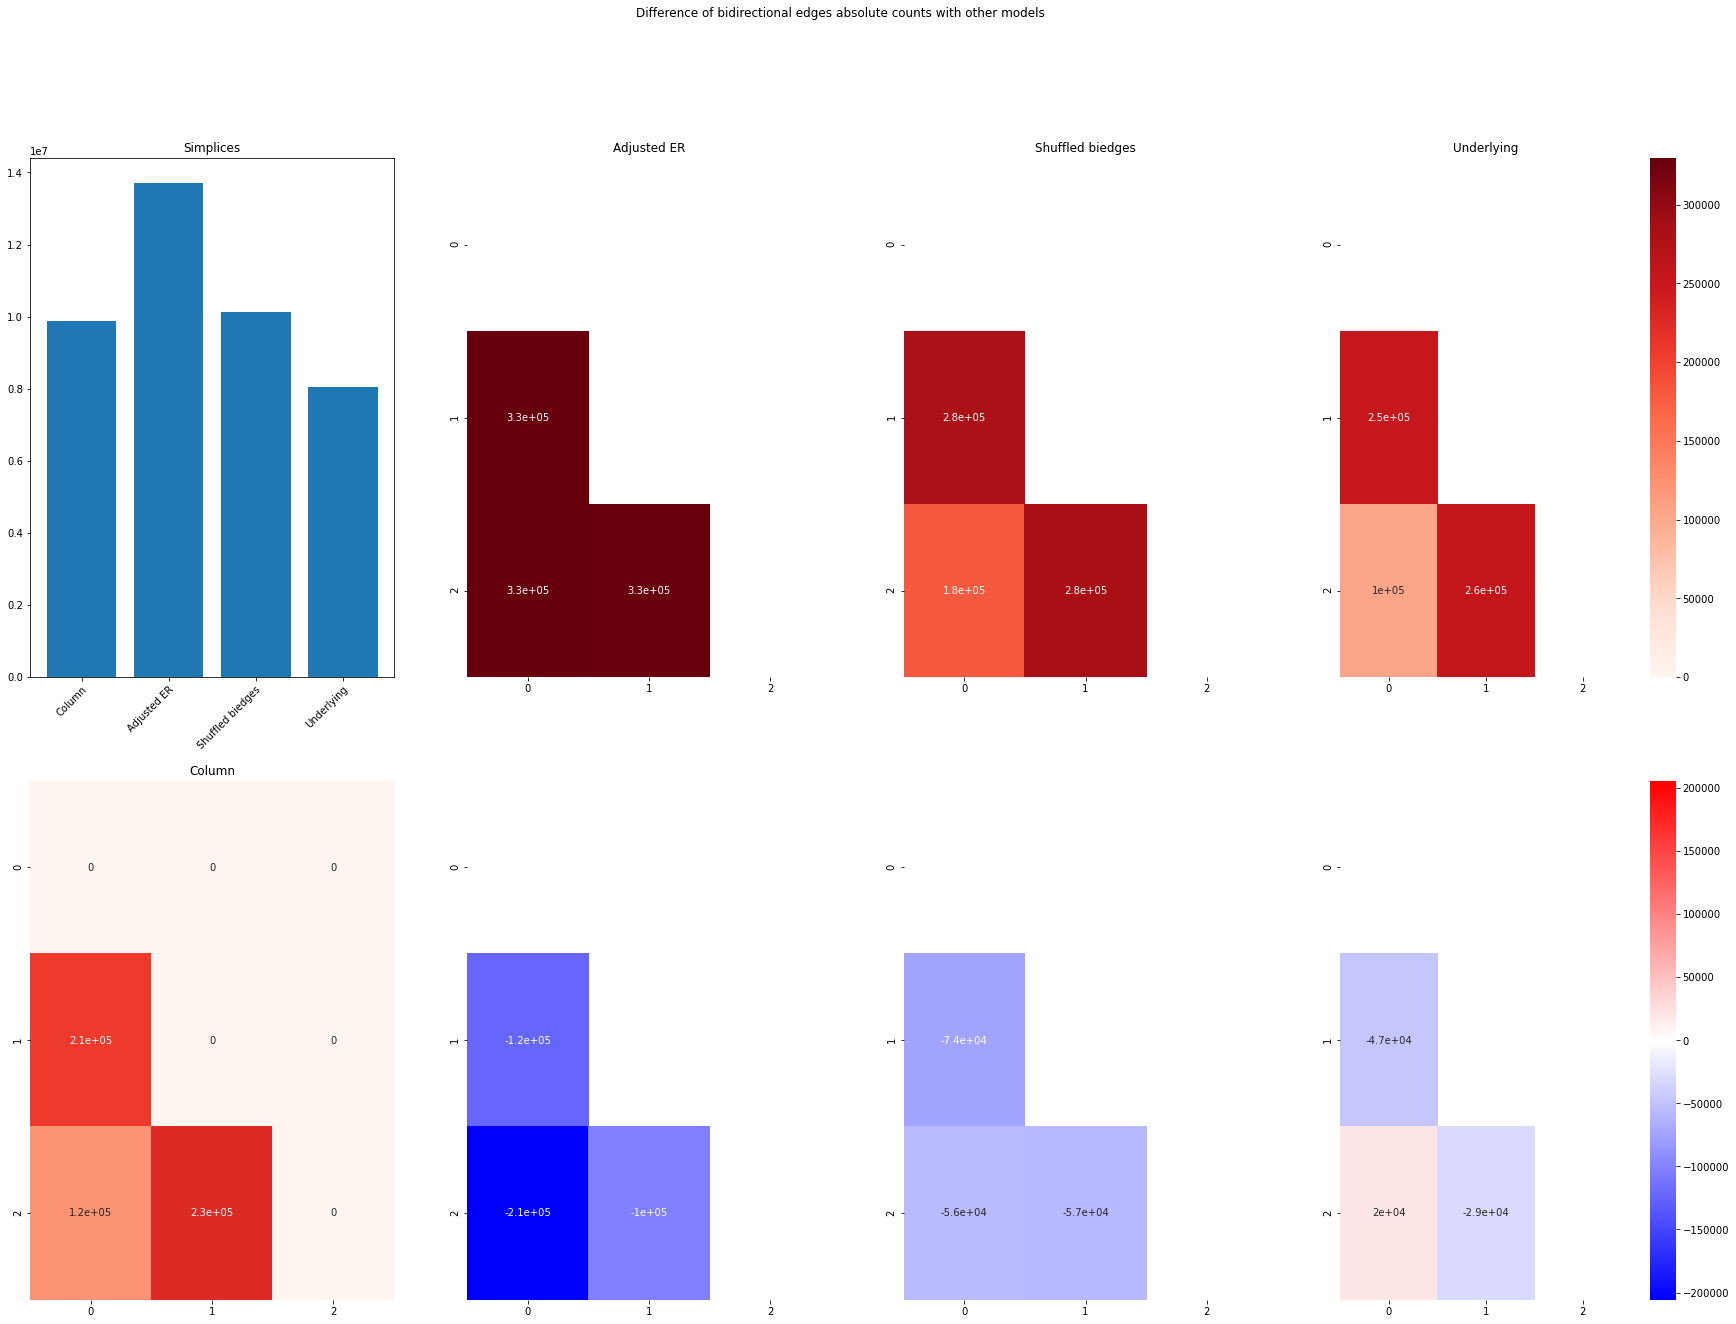

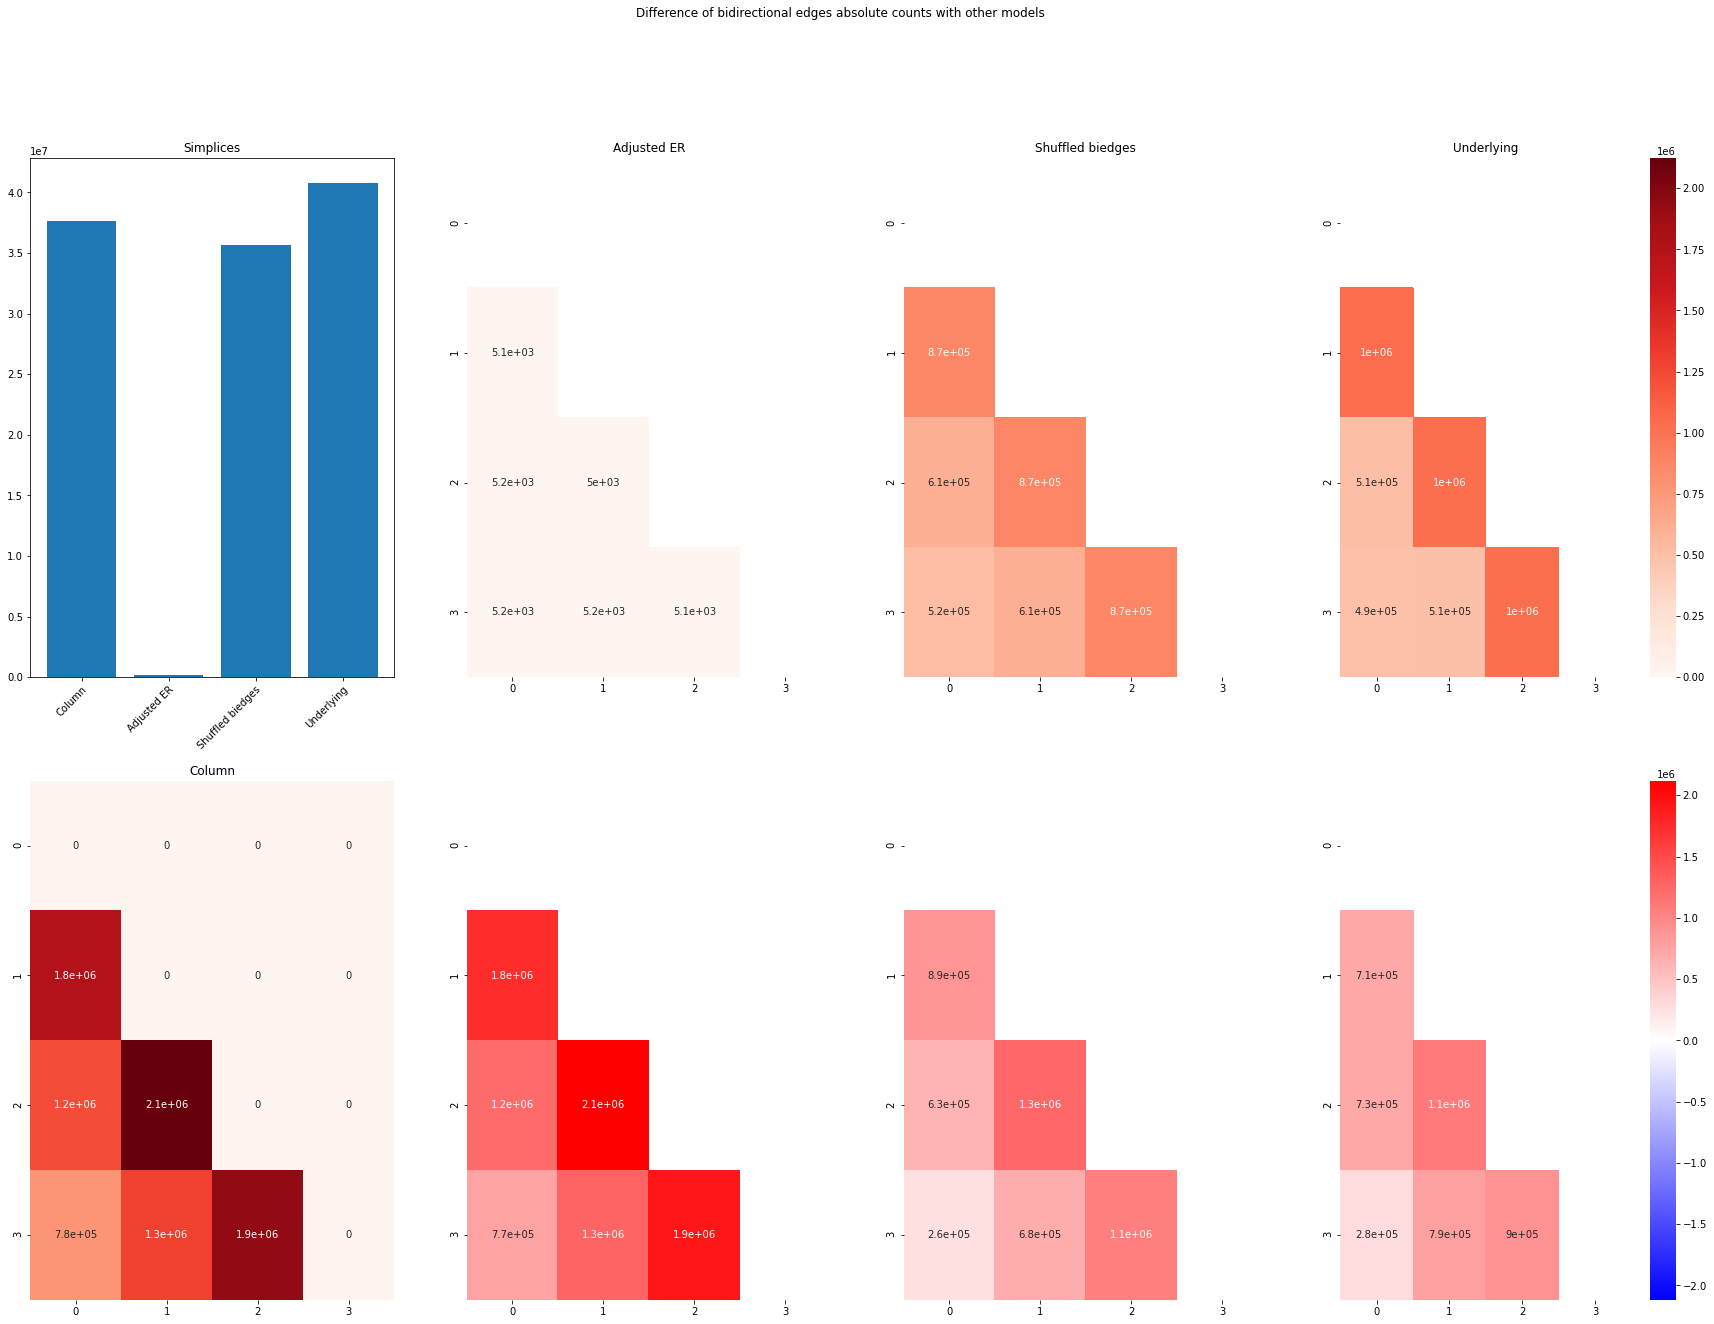

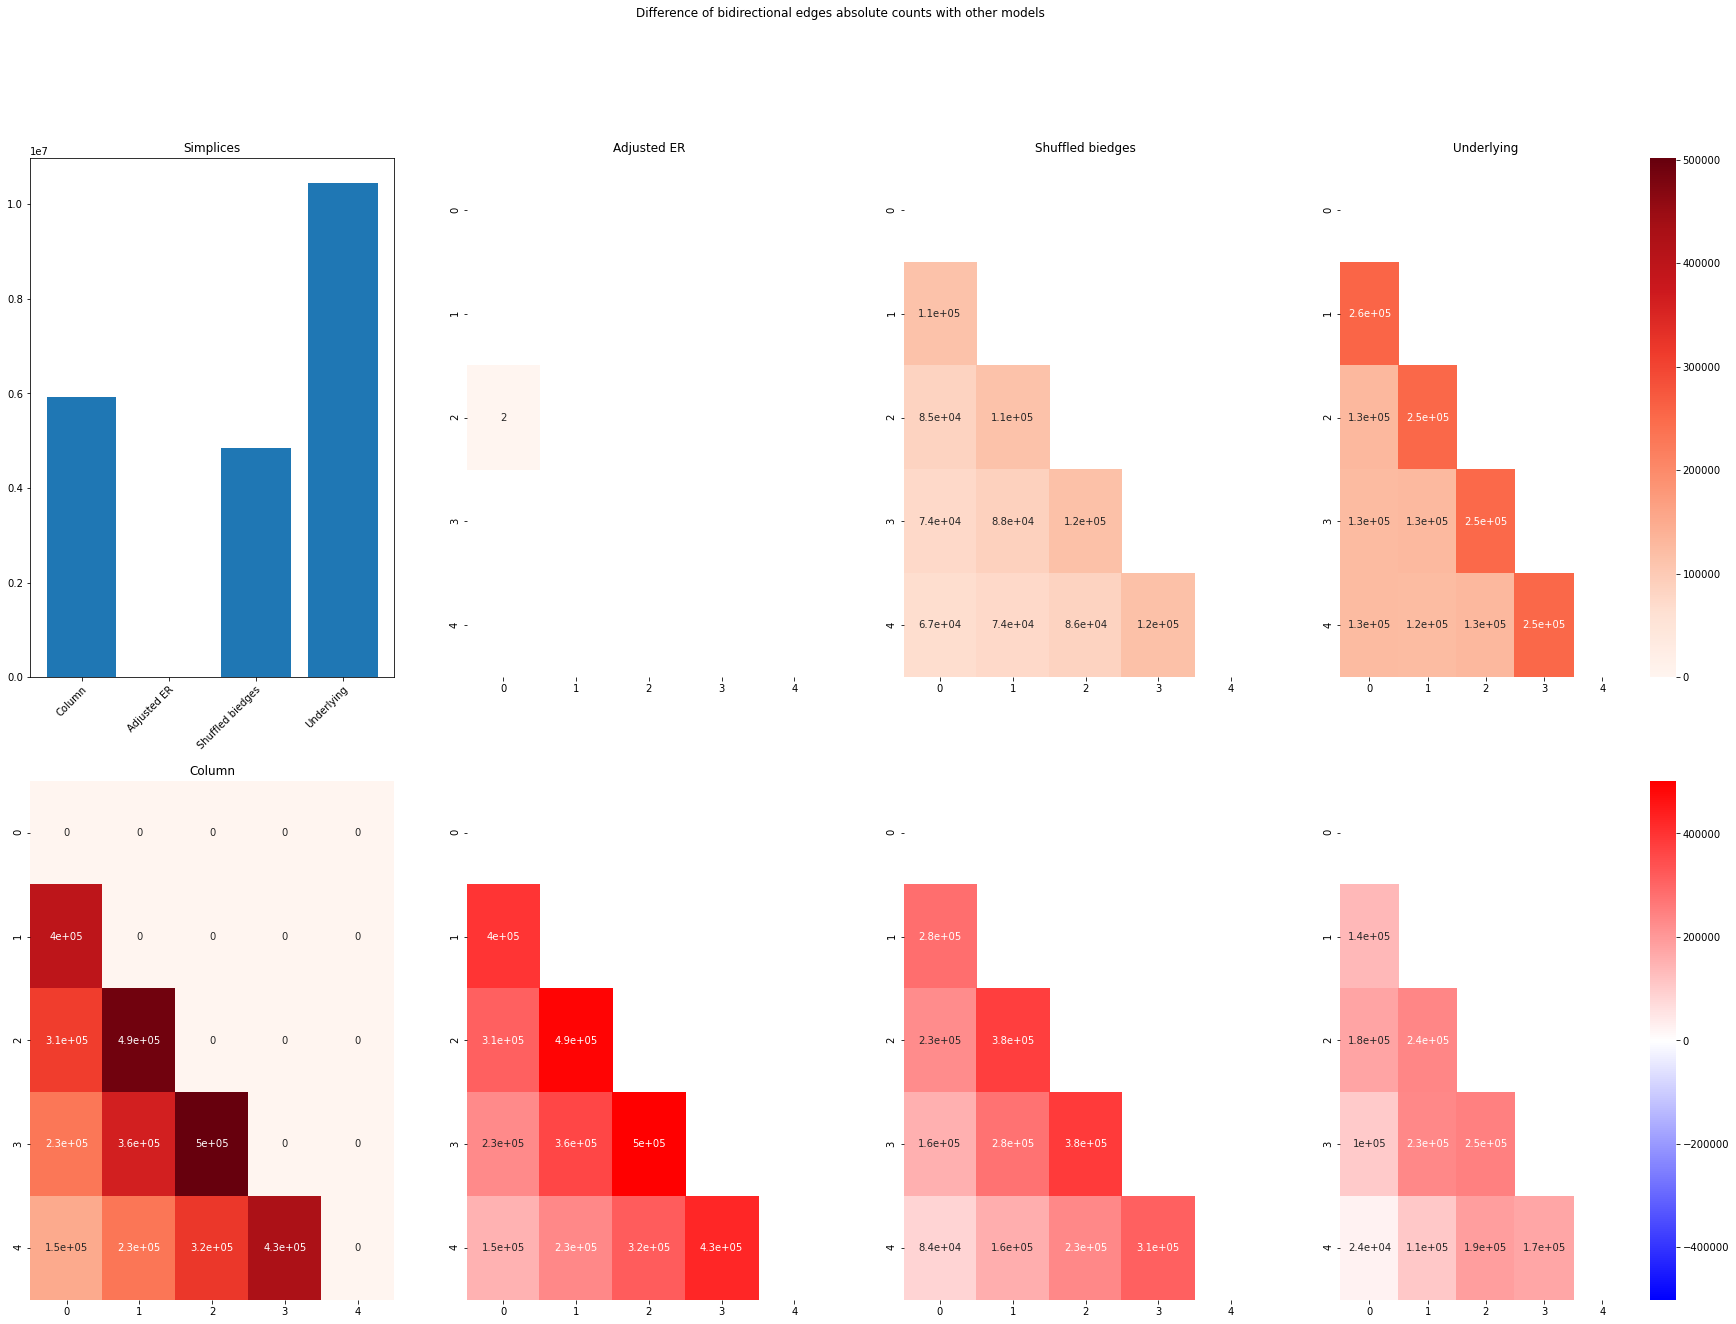

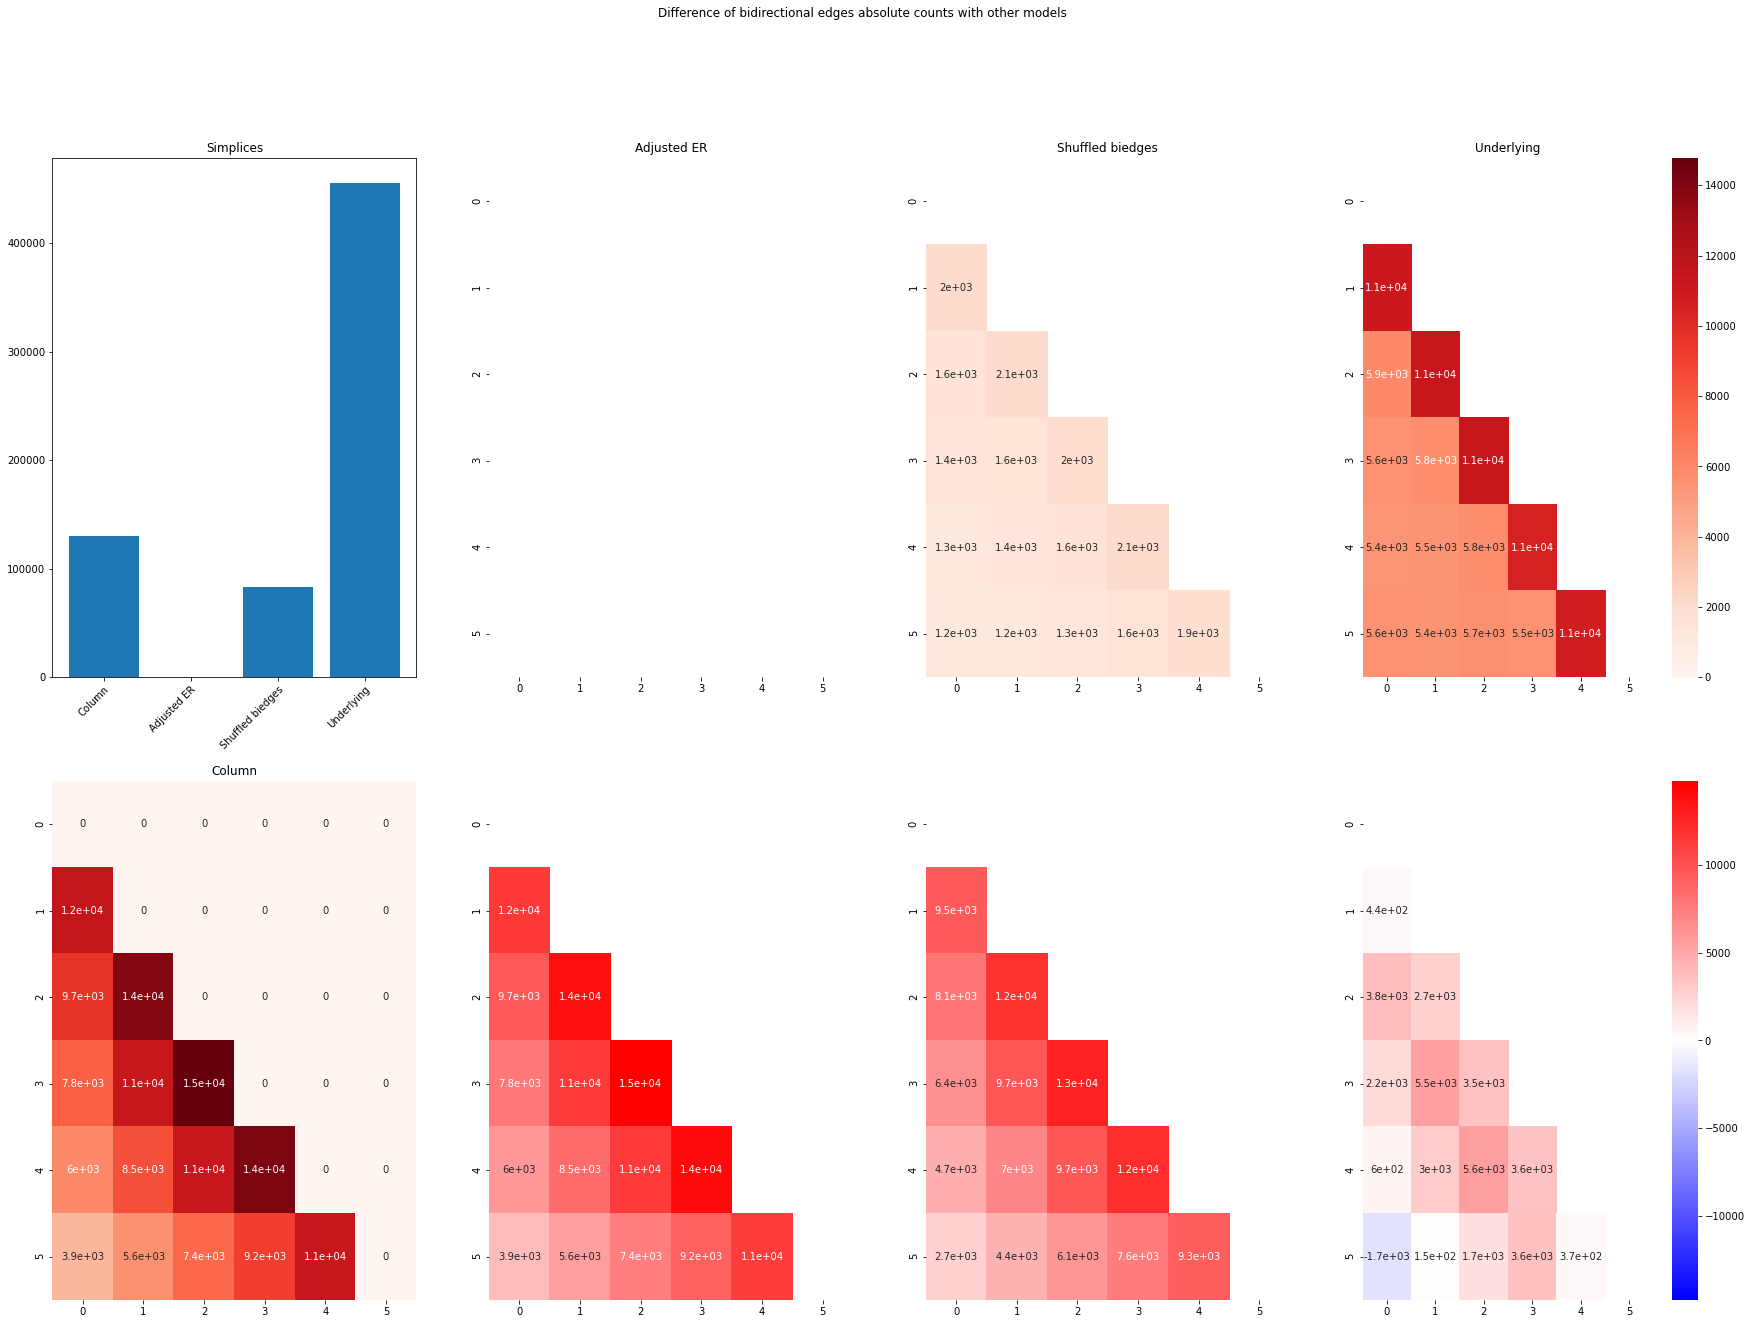

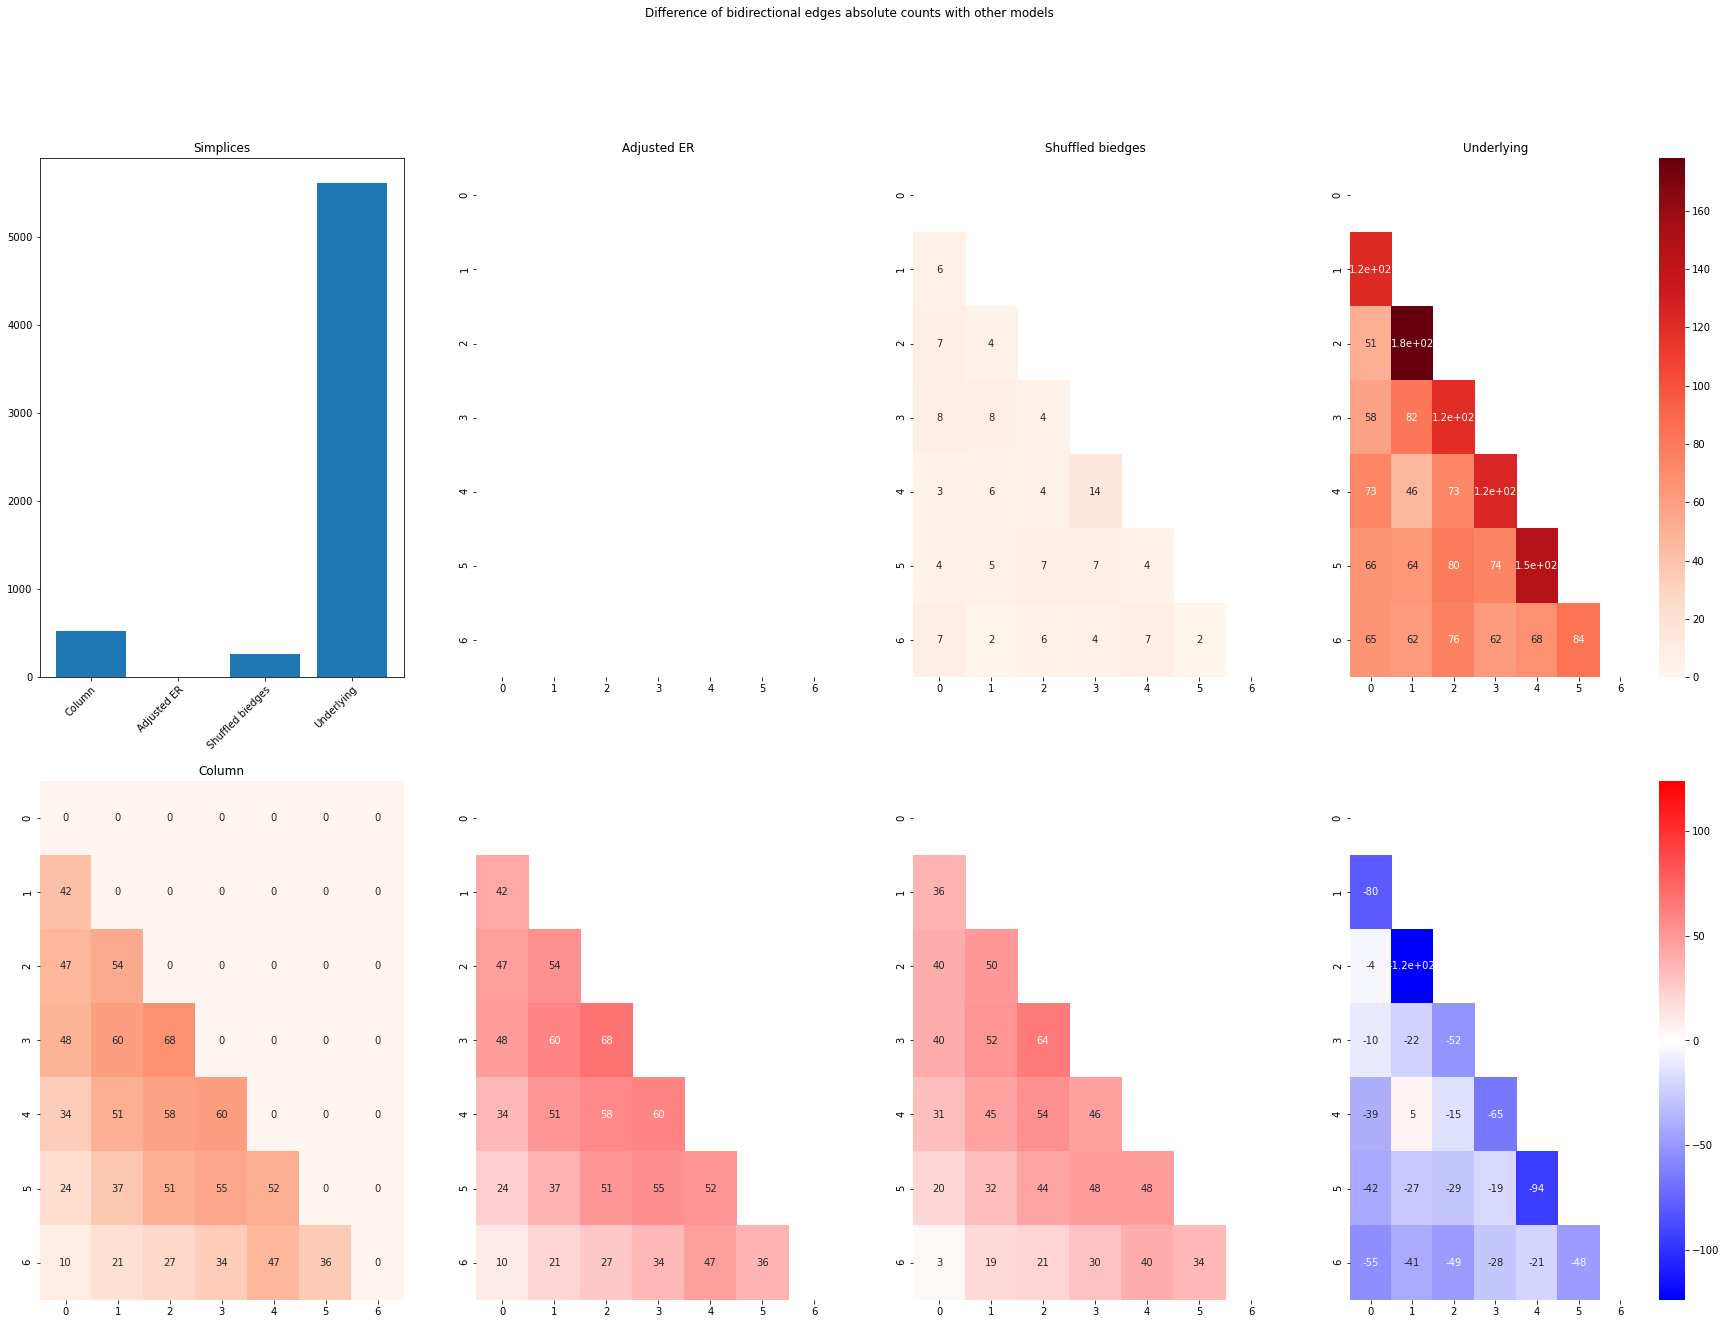

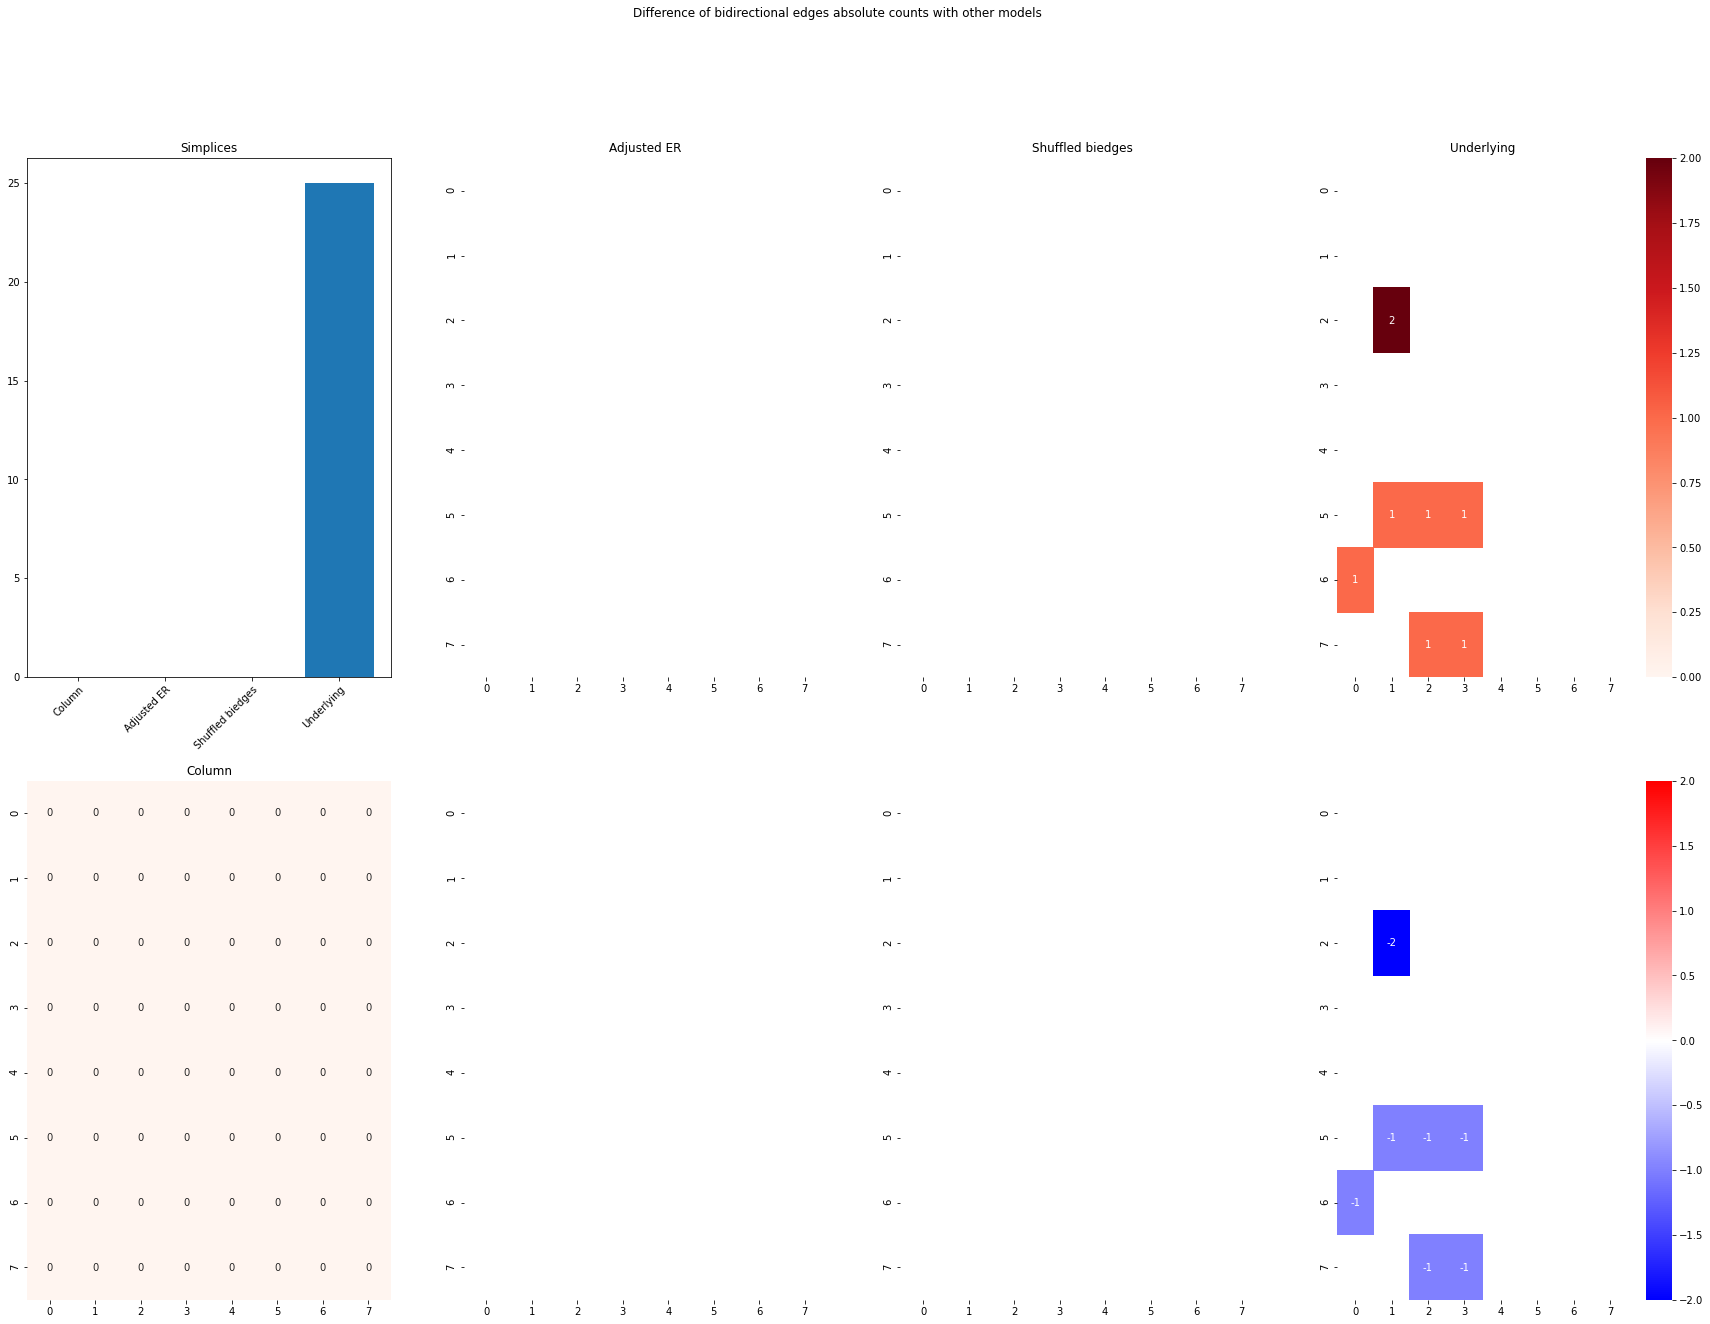

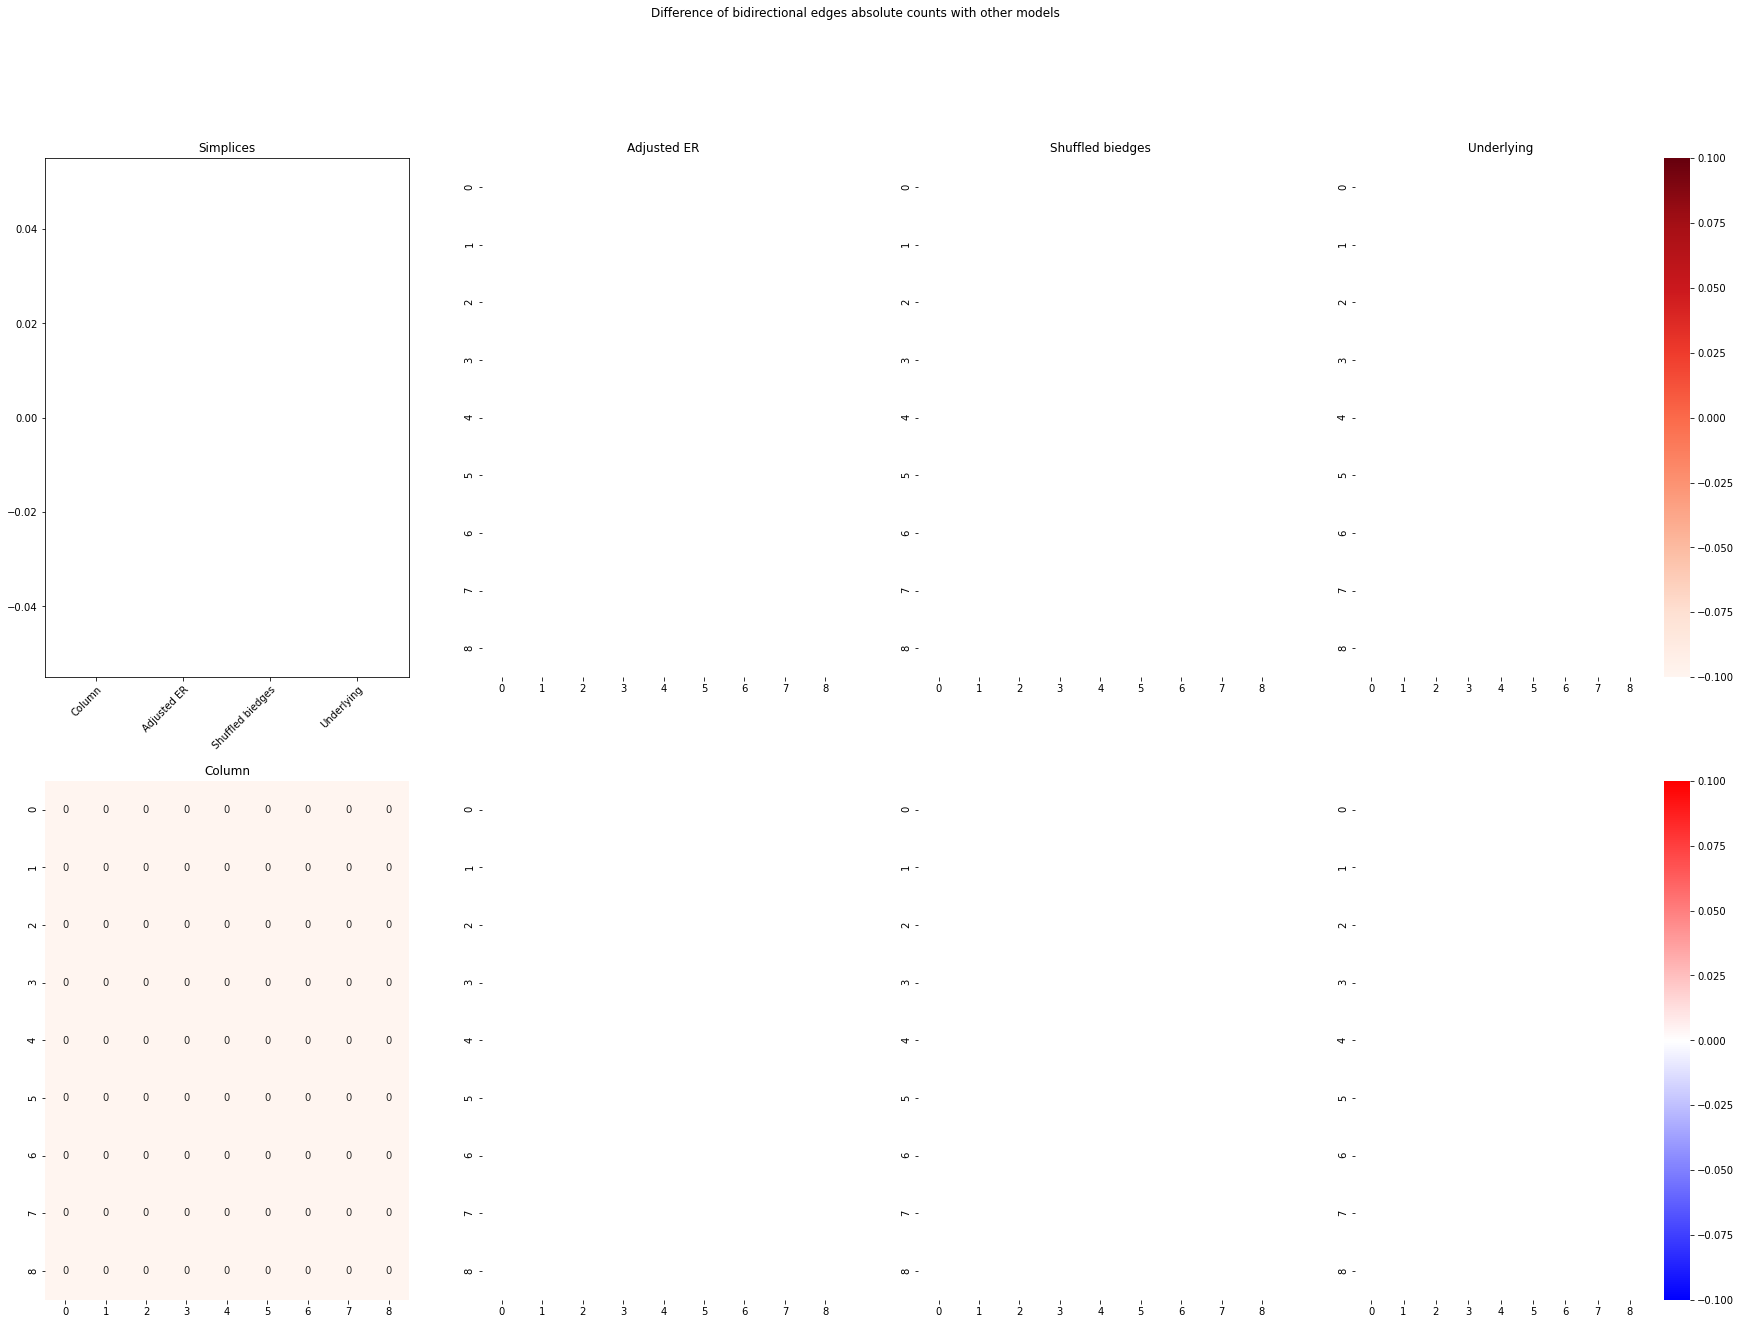

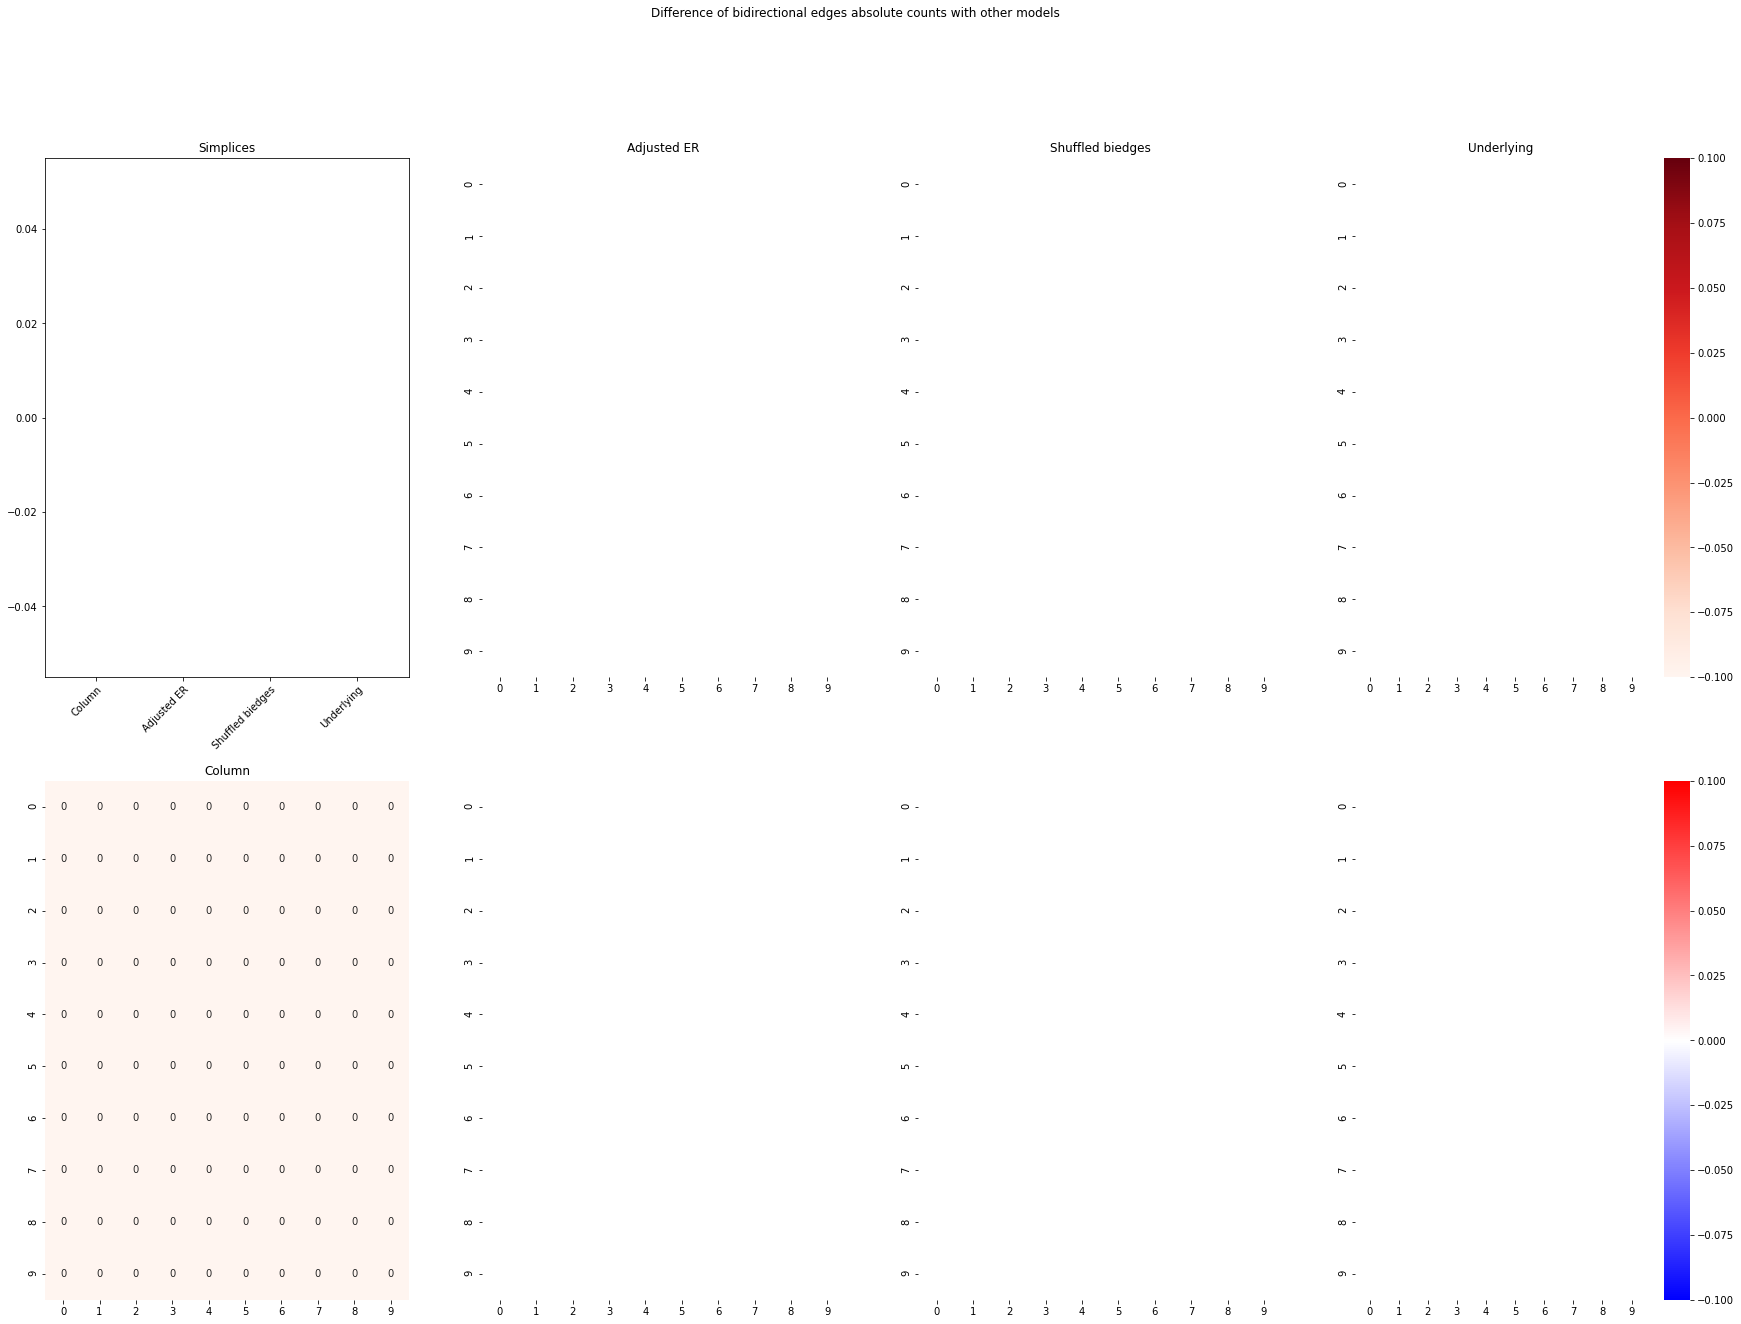

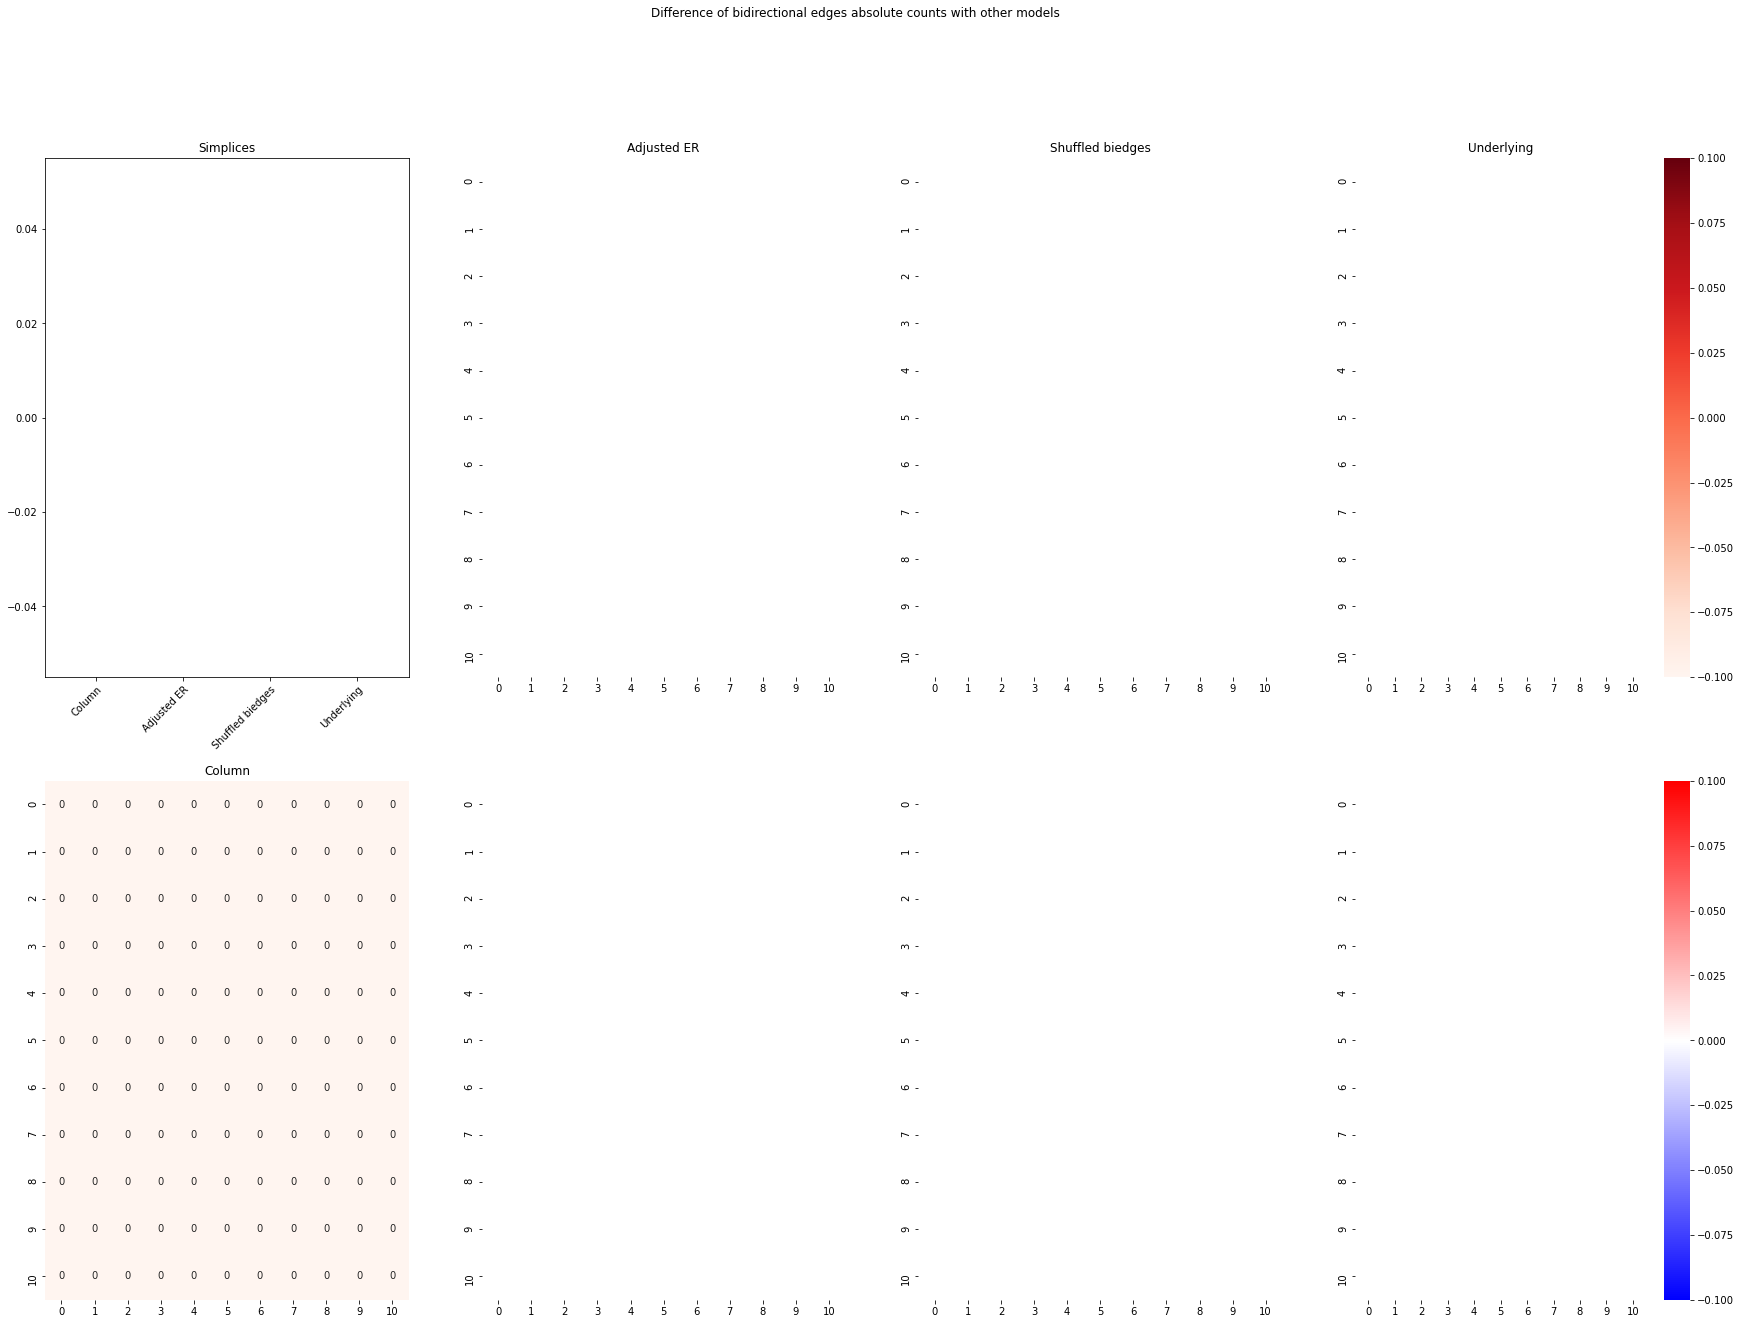

In [27]:
compare_graphs_diff([amax,bmax,cmax,dmax], 1, "maximal_difference")